In [1]:
# Import necessary libraries
import pandas as pd  # For data manipulation and analysis
import numpy as np   # For numerical operations
import seaborn as sns  # For statistical data visualization
import matplotlib.pyplot as plt  # For creating visualizations
from sklearn.metrics import (
    confusion_matrix,       # Computes the confusion matrix to evaluate classification performance
    roc_auc_score,          # Computes the area under the ROC curve for binary classification
    roc_curve,              # Generates points for plotting the ROC curve
    f1_score,               # Computes the F1 score, balancing precision and recall
    accuracy_score,         # Computes the accuracy of a classification model
    make_scorer,            # Converts a score function for use with scikit-learn's model selection tools
    precision_score,        # Computes precision, indicating the proportion of true positives among positive predictions
    precision_recall_curve,  # Generates points for plotting the precision-recall curve
    recall_score,           # Computes recall, indicating the proportion of true positives among actual positives
)

# Suppressing warnings in the code
import warnings
warnings.filterwarnings('ignore')

# Explanation:
# The code imports essential libraries for data manipulation, numerical operations, visualization, and machine learning metrics.


In [2]:
# Read the CSV file into a DataFrame
df = pd.read_csv("heart.csv")

# Explanation:
# This line reads a CSV file named "heart.csv" and stores its contents in a DataFrame called 'df'.
# The DataFrame is a tabular data structure that allows for easy manipulation and analysis of the data.
# Adjust the file path if "heart.csv" is not in the current working directory.


In [3]:
# Set Seaborn theme for customized visual appearance
sns.set_theme(
    context='notebook',    # Context: Notebook-style plots
    style='white',          # Style: White background overall appearance
    palette='deep',         # Palette: Deep color palette
    font='Lucida Calligraphy',  # Font: Lucida Calligraphy font for text elements
    font_scale=1.5,          # Font scale: Font scale factor
    color_codes=True,       # Color codes: Interpret color codes in seaborn palettes
    rc=None                 # RC: Additional parameters, set to None
)

# Set figure size to 14x8 inches
plt.rcParams['figure.figsize'] = (14, 8)

# Set figure face color to light sky blue
plt.rcParams['figure.facecolor'] = '#F0F8FF'

# Set title font size to medium
plt.rcParams['figure.titlesize'] = 'medium'

# Set figure DPI (dots per inch) to 100
plt.rcParams['figure.dpi'] = 100

# Set figure edge color to green
plt.rcParams['figure.edgecolor'] = 'green'

# Enable figure frame
plt.rcParams['figure.frameon'] = True

# Enable figure autolayout
plt.rcParams["figure.autolayout"] = True

# Set axes face color to beige
plt.rcParams['axes.facecolor'] = '#F5F5DC'

# Set axes title font size to 25
plt.rcParams['axes.titlesize'] = 25

# Set axes title weight to normal
plt.rcParams["axes.titleweight"] = 'normal'

# Set axes title color to Olive
plt.rcParams["axes.titlecolor"] = 'Olive'

# Additional parameters for axes appearance
# Set axes edge color to pink
plt.rcParams['axes.edgecolor'] = 'pink'

# Set axes line width to 2
plt.rcParams["axes.linewidth"] = 2

# Enable grid lines with color green, linestyle '--', linewidth 0.5, and alpha 0.3
plt.rcParams["axes.grid"] = True
plt.rcParams['grid.color'] = 'green'
plt.rcParams['grid.linestyle'] = '--'
plt.rcParams['grid.linewidth'] = .5
plt.rcParams['grid.alpha'] = .3

# Set legend location to 'best' with face color NavajoWhite, edge color pink, shadow, and font size 20
plt.rcParams['legend.loc'] = 'best'
plt.rcParams['legend.facecolor'] = 'NavajoWhite'
plt.rcParams['legend.edgecolor'] = 'pink'
plt.rcParams['legend.shadow'] = True
plt.rcParams['legend.fontsize'] = 20

# Set font family to sans-serif and font size to 14
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.size'] = 14

# Set figure DPI to 200 and figure edge color to blue
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.edgecolor'] = 'Blue'


In [4]:
# Set Pandas display options
import pandas as pd

pd.set_option('display.max_columns', None)  # Display all columns in DataFrames
pd.set_option('display.max_rows', None)     # Display all rows in DataFrames
pd.set_option("display.precision", 2)       # Set precision for displaying floating-point values to 2 decimal places


In [5]:
# Style the DataFrame for display with background color, text color, and border color
df.head().style.set_properties(
    **{
        'background-color': '#3498db',   # Set background color to a shade of blue
        'color': 'white',                # Set text color to white
        'border-color': '#2c3e50'        # Set border color to a dark gray shade
    }
)



In [6]:
# Display the shape of the DataFrame
print(f"DataFrame Shape: {df.shape}")

# Display the size (total number of elements) of the DataFrame
print(f"DataFrame Size: {df.size}")

# Explanation:
# The 'shape' of the DataFrame represents the number of rows and columns.
# The 'size' of the DataFrame represents the total number of elements (cells) in the DataFrame.



DataFrame Shape: (918, 12)
DataFrame Size: 11016


In [7]:
# Display information about the DataFrame
df.info()

# Explanation:
# The 'info' method provides a concise summary of the DataFrame's structure and content.
# It includes information about the data types, non-null values, and memory usage.


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Gender          918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [8]:
# Display statistical summary of the DataFrame
df.describe()

# Explanation:
# The 'describe' method generates descriptive statistics of the DataFrame's numerical columns.
# It includes count, mean, standard deviation, minimum, 25th percentile, median, 75th percentile, and maximum values.


Age  RestingBP  Cholesterol  FastingBS   MaxHR  Oldpeak  \
count  918.00     918.00       918.00     918.00  918.00   918.00   
mean    53.51     132.40       198.80       0.23  136.81     0.89   
std      9.43      18.51       109.38       0.42   25.46     1.07   
min     28.00       0.00         0.00       0.00   60.00    -2.60   
25%     47.00     120.00       173.25       0.00  120.00     0.00   
50%     54.00     130.00       223.00       0.00  138.00     0.60   
75%     60.00     140.00       267.00       0.00  156.00     1.50   
max     77.00     200.00       603.00       1.00  202.00     6.20   

       HeartDisease  
count        918.00  
mean           0.55  
std            0.50  
min            0.00  
25%            0.00  
50%            1.00  
75%            1.00  
max            1.00

In [9]:
# Check for null values in the DataFrame
df.isna().sum()

# Explanation:
# The 'isna().sum()' method is used to check for null values in each column of the DataFrame.
# The result shows the count of null values for each column.


Age               0
Gender            0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
# Handle duplicates in the DataFrame
duplicate_rows_data = df[df.duplicated()]
print("Number of duplicate rows: ", duplicate_rows_data.shape)

# Explanation:
# The code identifies and prints the number of duplicate rows in the DataFrame.
# If there are no duplicate rows, it indicates that the dataset has unique records.


Number of duplicate rows:  (0, 12)


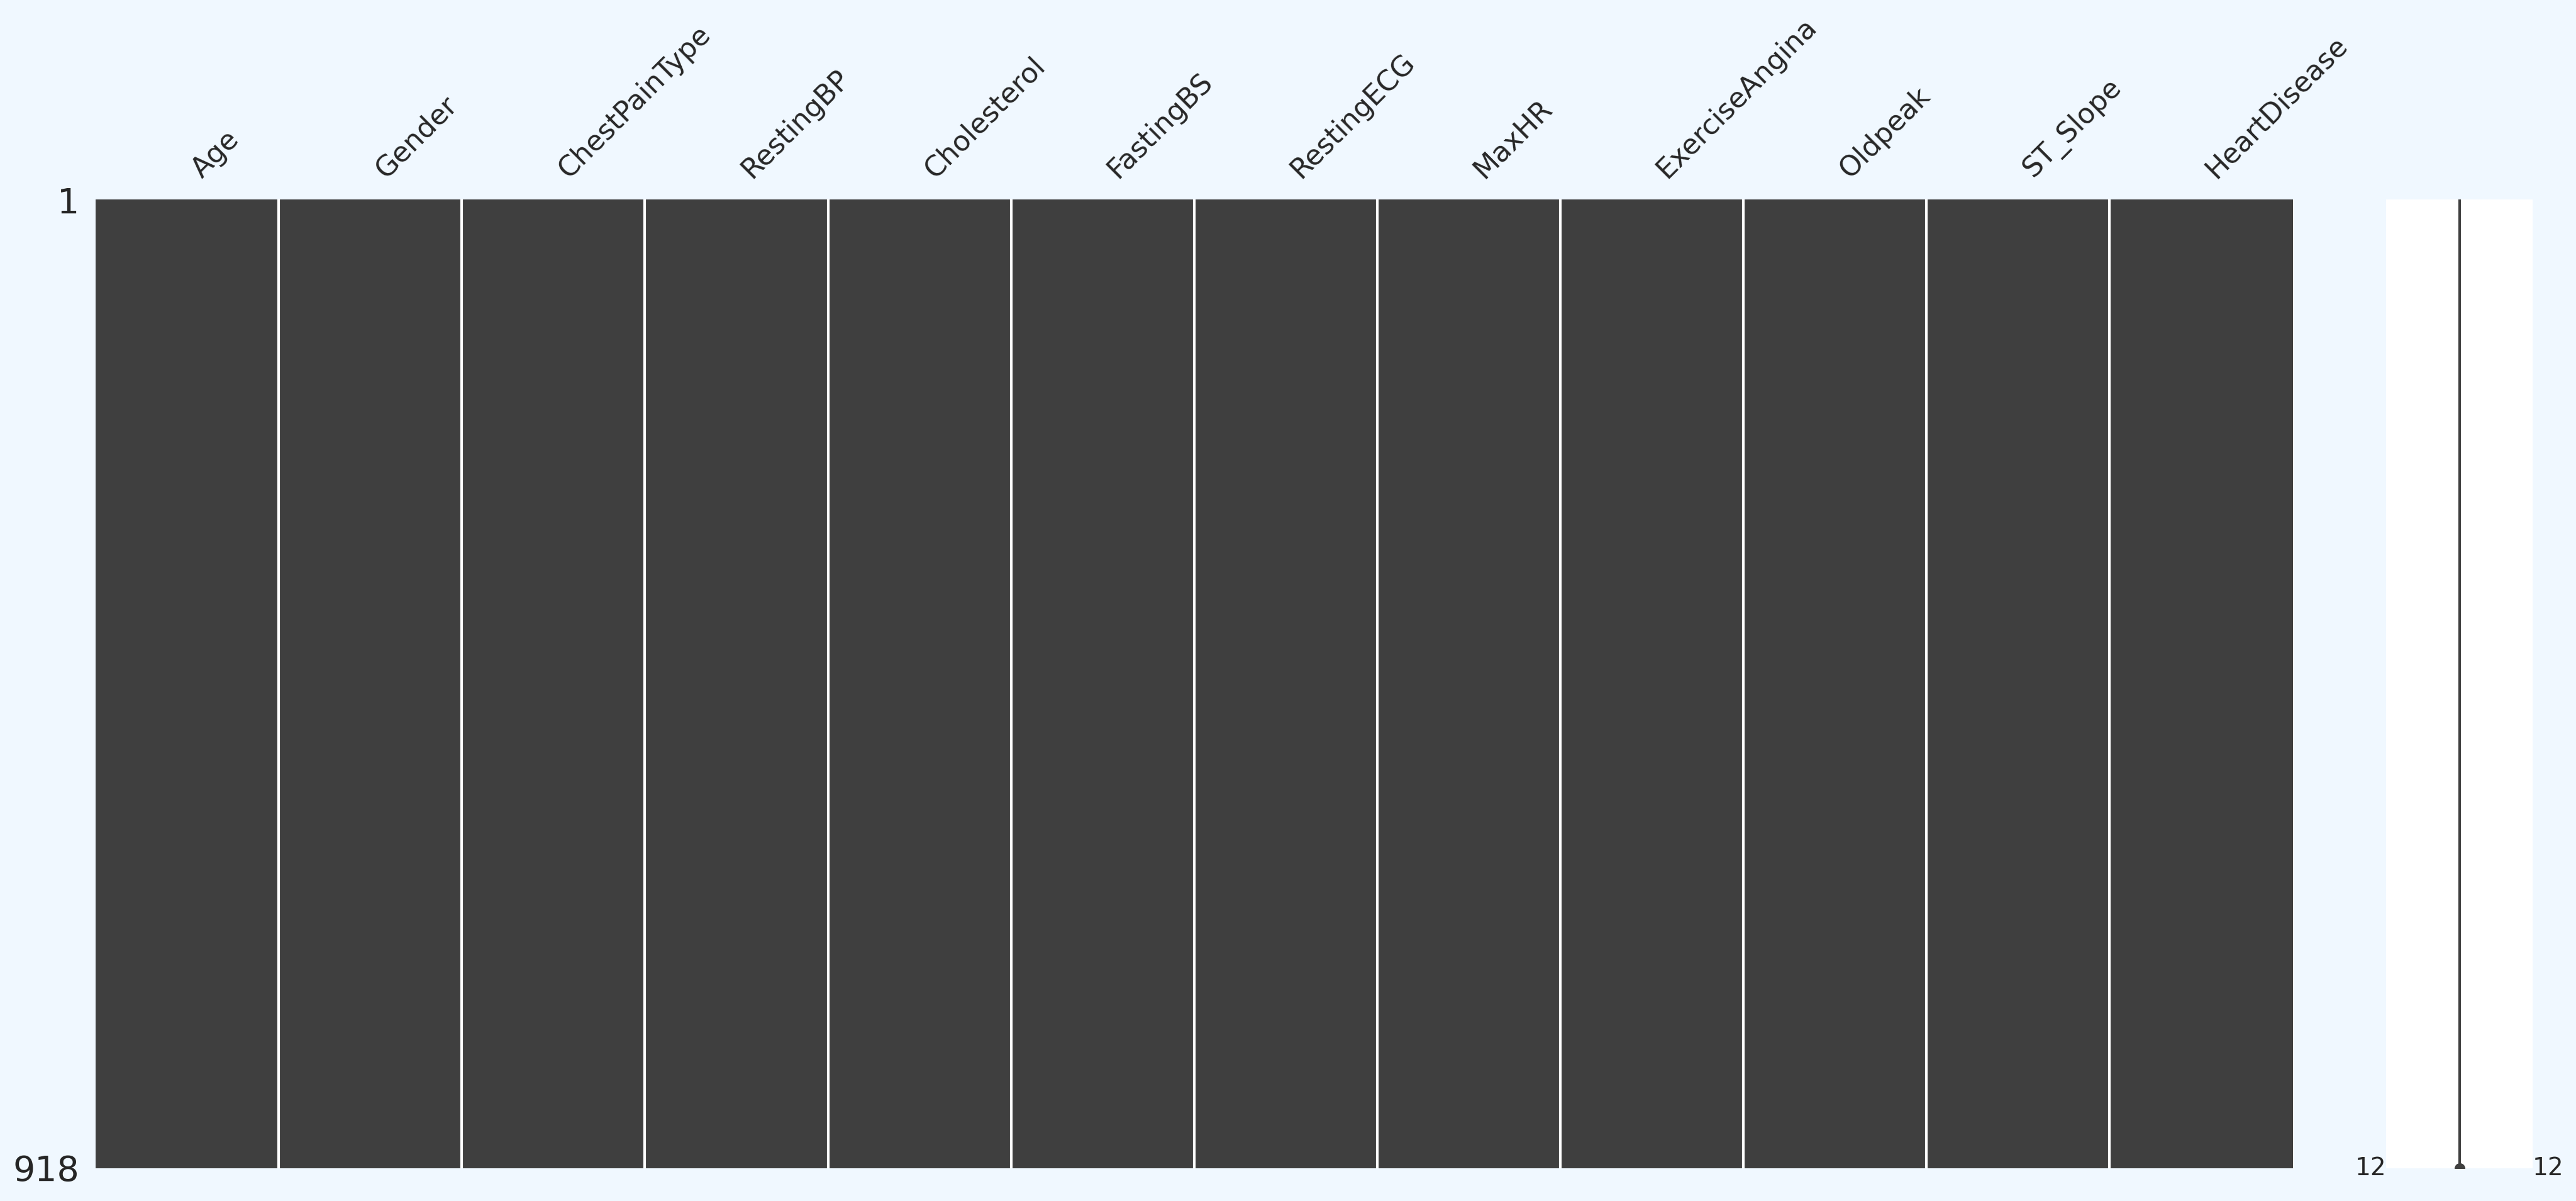

In [11]:
# Import missingno library and plot the matrix for visualizing missing values
import missingno as msno
msno.matrix(df)
plt.show()

# Explanation:
# The code uses the missingno library to visualize the distribution of missing values in the DataFrame.
# The matrix plot provides a visual representation of missing values, making it easier to identify patterns and gaps in the data.



In [12]:
# Calculate the percentage of women with the probability of HeartDisease
Women = df.loc[df['Gender'] == 'F']["HeartDisease"]
rate_women = (Women.sum() / len(Women)).round(2) * 100
print("Percentage of Women with probability of HeartDisease:", rate_women, "%")

# Calculate the percentage of men with the probability of HeartDisease
Men = df.loc[df['Gender'] == 'M']["HeartDisease"]
rate_men = (Men.sum() / len(Men)).round(2) * 100
print("Percentage of Men with probability of HeartDisease:", rate_men, "%")


Percentage of Women with probability of HeartDisease: 26.0 %
Percentage of Men with probability of HeartDisease: 63.0 %


In [13]:
# Print the number of instances, features, and output variable in the DataFrame
print(f"We have {df.shape[0]} instances with {df.shape[1] - 1} features and 1 output variable.")


We have 918 instances with 11 features and 1 output variable.


In [14]:
# Create a DataFrame showing the absolute correlation values with the 'HeartDisease' variable
correlation_df = pd.DataFrame(abs(df.corr()['HeartDisease']))

# Explanation:
# The 'corr()' method calculates the correlation matrix for all numerical variables in the DataFrame.
# The correlation values are then extracted for the 'HeartDisease' variable, and absolute values are taken.
# The result is displayed in a new DataFrame, providing insights into the strength and direction of correlations.
print(correlation_df)


              HeartDisease
Age                   0.28
RestingBP             0.11
Cholesterol           0.23
FastingBS             0.27
MaxHR                 0.40
Oldpeak               0.40
HeartDisease          1.00


In [15]:
# Aggregate statistics for selected columns in the DataFrame
aggregated_stats = df.agg(
    {
        "Age": ["min", "max", "median", "mean", "skew", "std"],
        "RestingBP": ["min", "max", "median", "mean", "skew", "std"],
        "Cholesterol": ["min", "max", "median", "mean", "skew", "std"],
        "Oldpeak": ["min", "max", "median", "mean", "skew", "std"],
        "MaxHR": ["min", "max", "median", "mean", "skew", "std"],
    }
)

# Explanation:
# The 'agg' method is used to aggregate statistics for specific columns in the DataFrame.
# For each selected column, the code calculates minimum, maximum, median, mean, skewness, and standard deviation.
# The resulting DataFrame, 'aggregated_stats', provides a summary of descriptive statistics for the specified columns.
print(aggregated_stats)



          Age  RestingBP  Cholesterol  Oldpeak   MaxHR
min     28.00       0.00         0.00    -2.60   60.00
max     77.00     200.00       603.00     6.20  202.00
median  54.00     130.00       223.00     0.60  138.00
mean    53.51     132.40       198.80     0.89  136.81
skew    -0.20       0.18        -0.61     1.02   -0.14
std      9.43      18.51       109.38     1.07   25.46


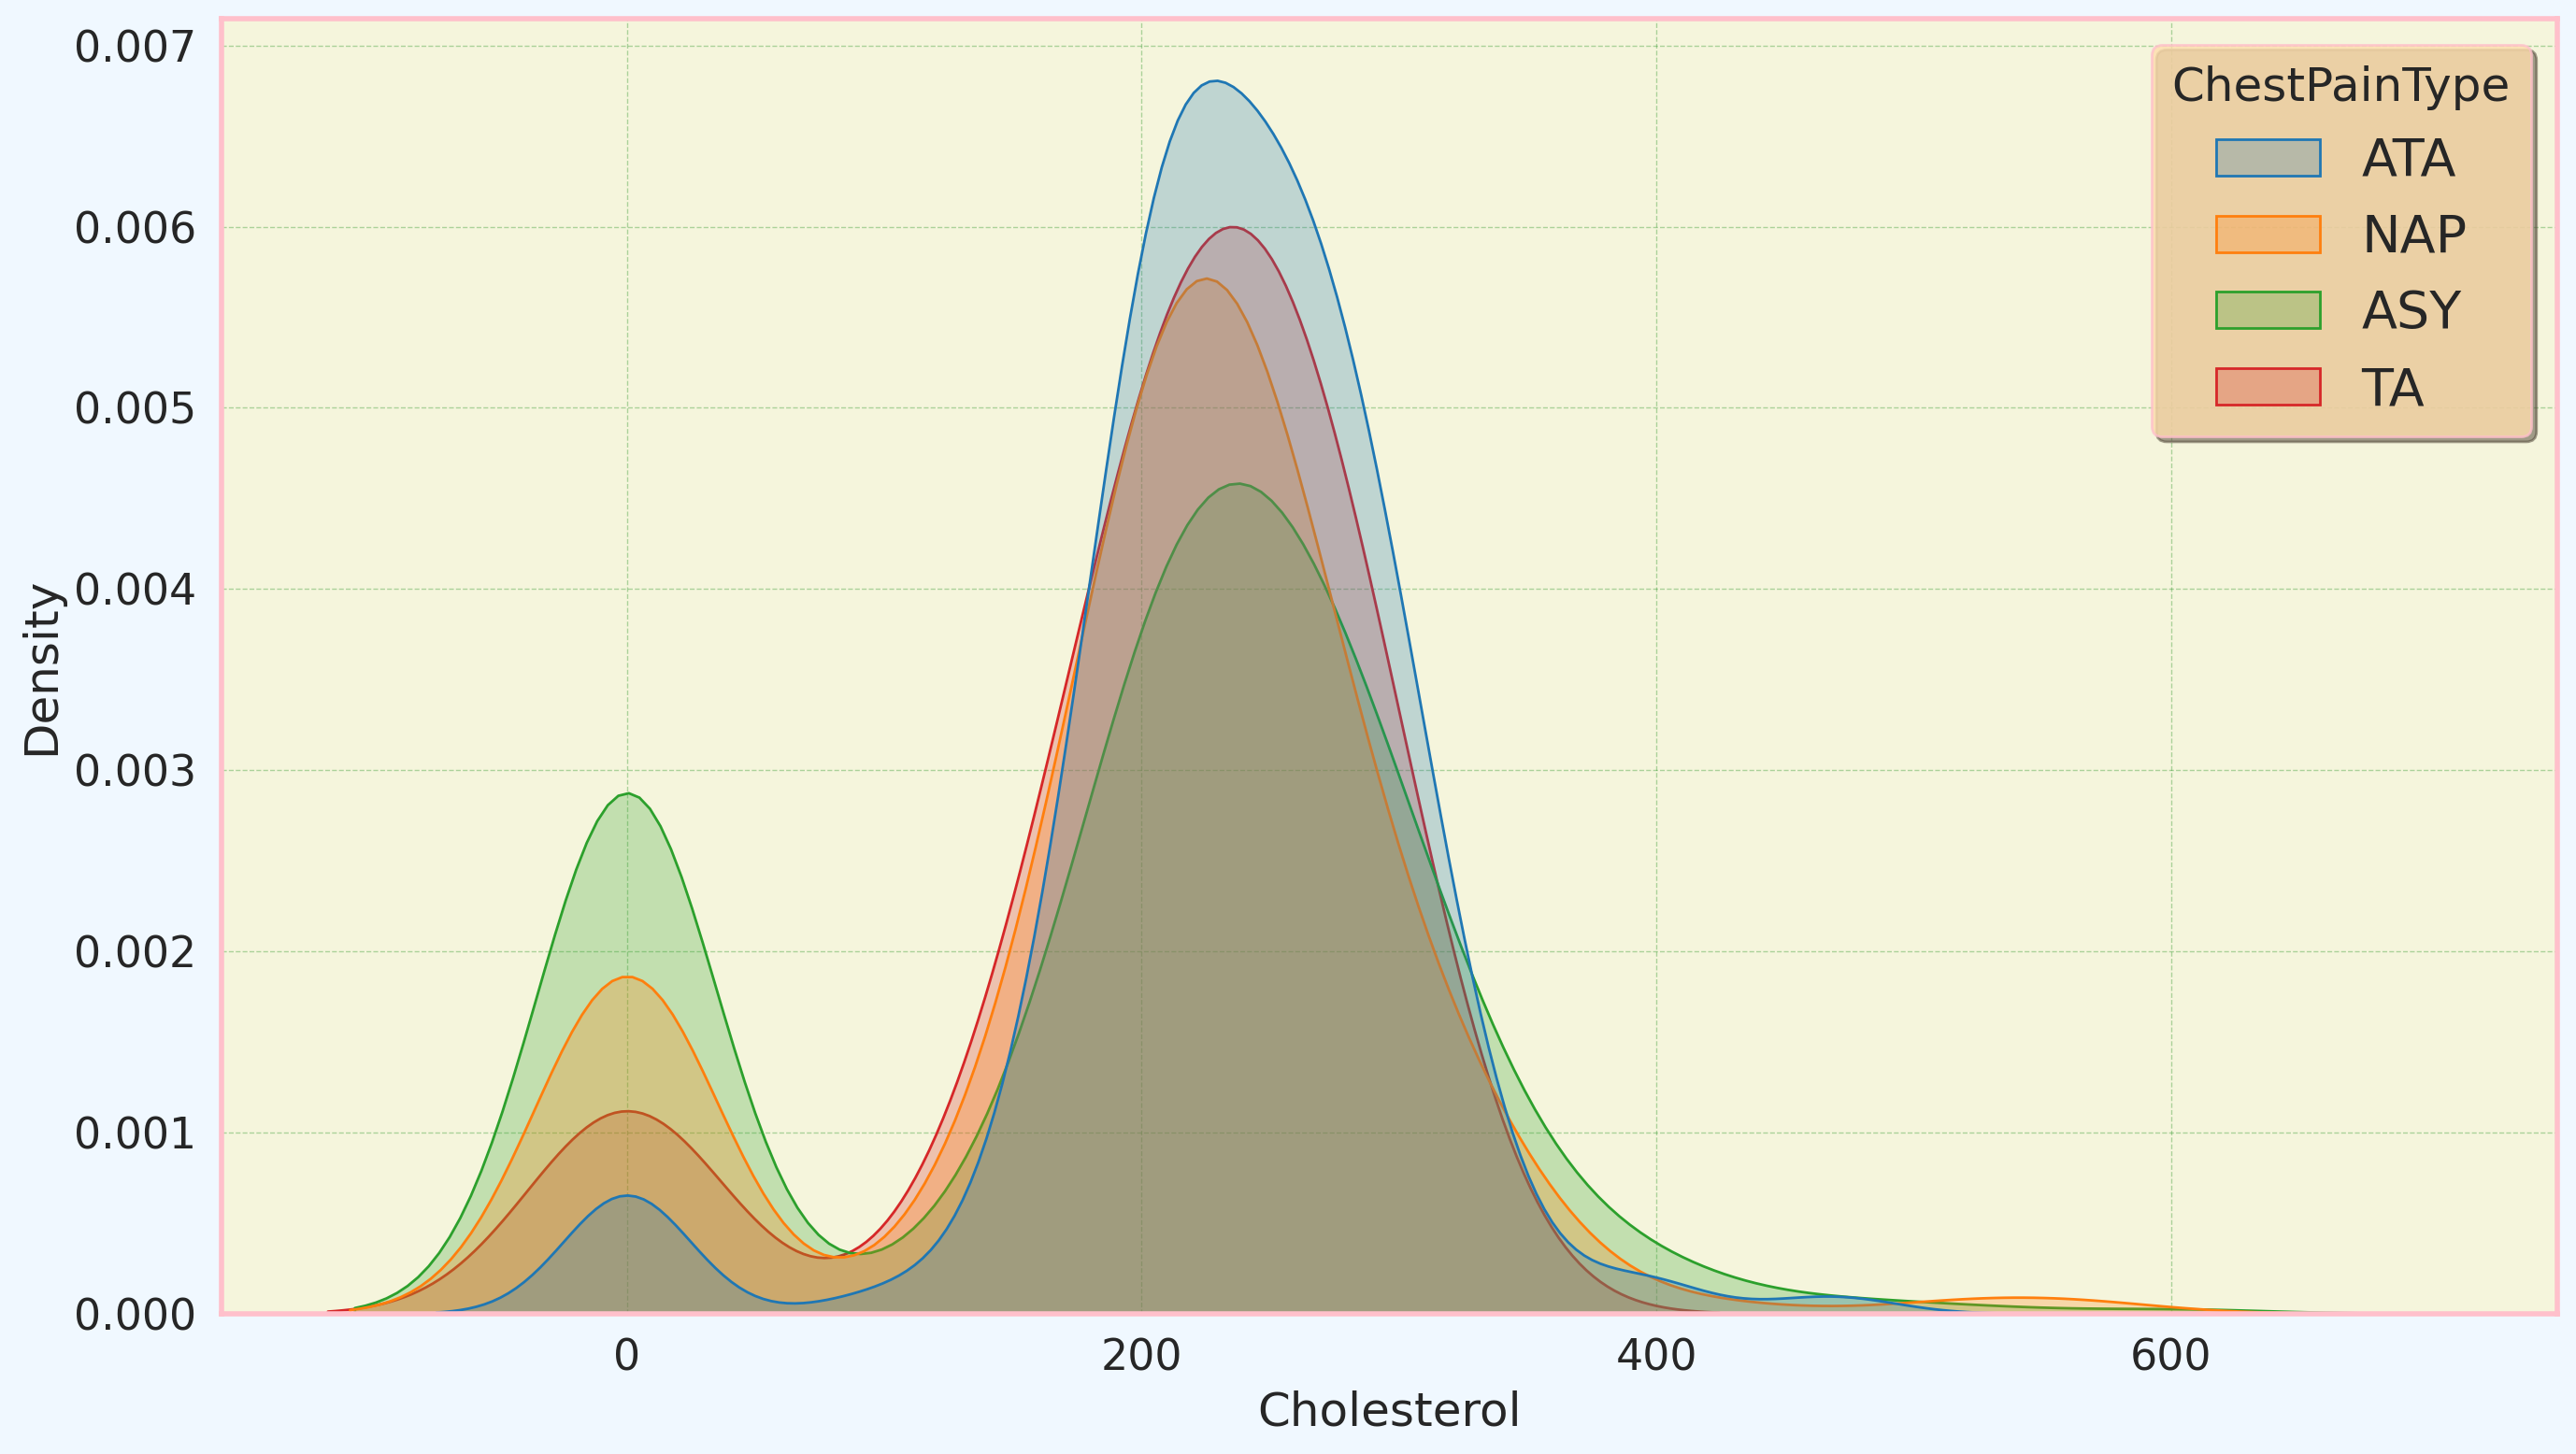

In [16]:
# Plot KDE (Kernel Density Estimate) for 'Cholesterol' with 'ChestPainType' as hue
import seaborn as sns
import matplotlib.pyplot as plt

sns.kdeplot(data=df, x="Cholesterol", hue="ChestPainType", fill=True, common_norm=False, palette="tab10")
plt.show()

# Explanation:
# The code uses seaborn's kdeplot to visualize the distribution of 'Cholesterol' with different hues based on 'ChestPainType'.
# The fill parameter is set to True to fill the area under the curve, and the common_norm parameter is set to False to normalize each hue independently.
# The 'tab10' palette is used for coloring different 'ChestPainType' categories.
# The resulting plot provides insights into how the distribution of 'Cholesterol' varies across different 'ChestPainType'.


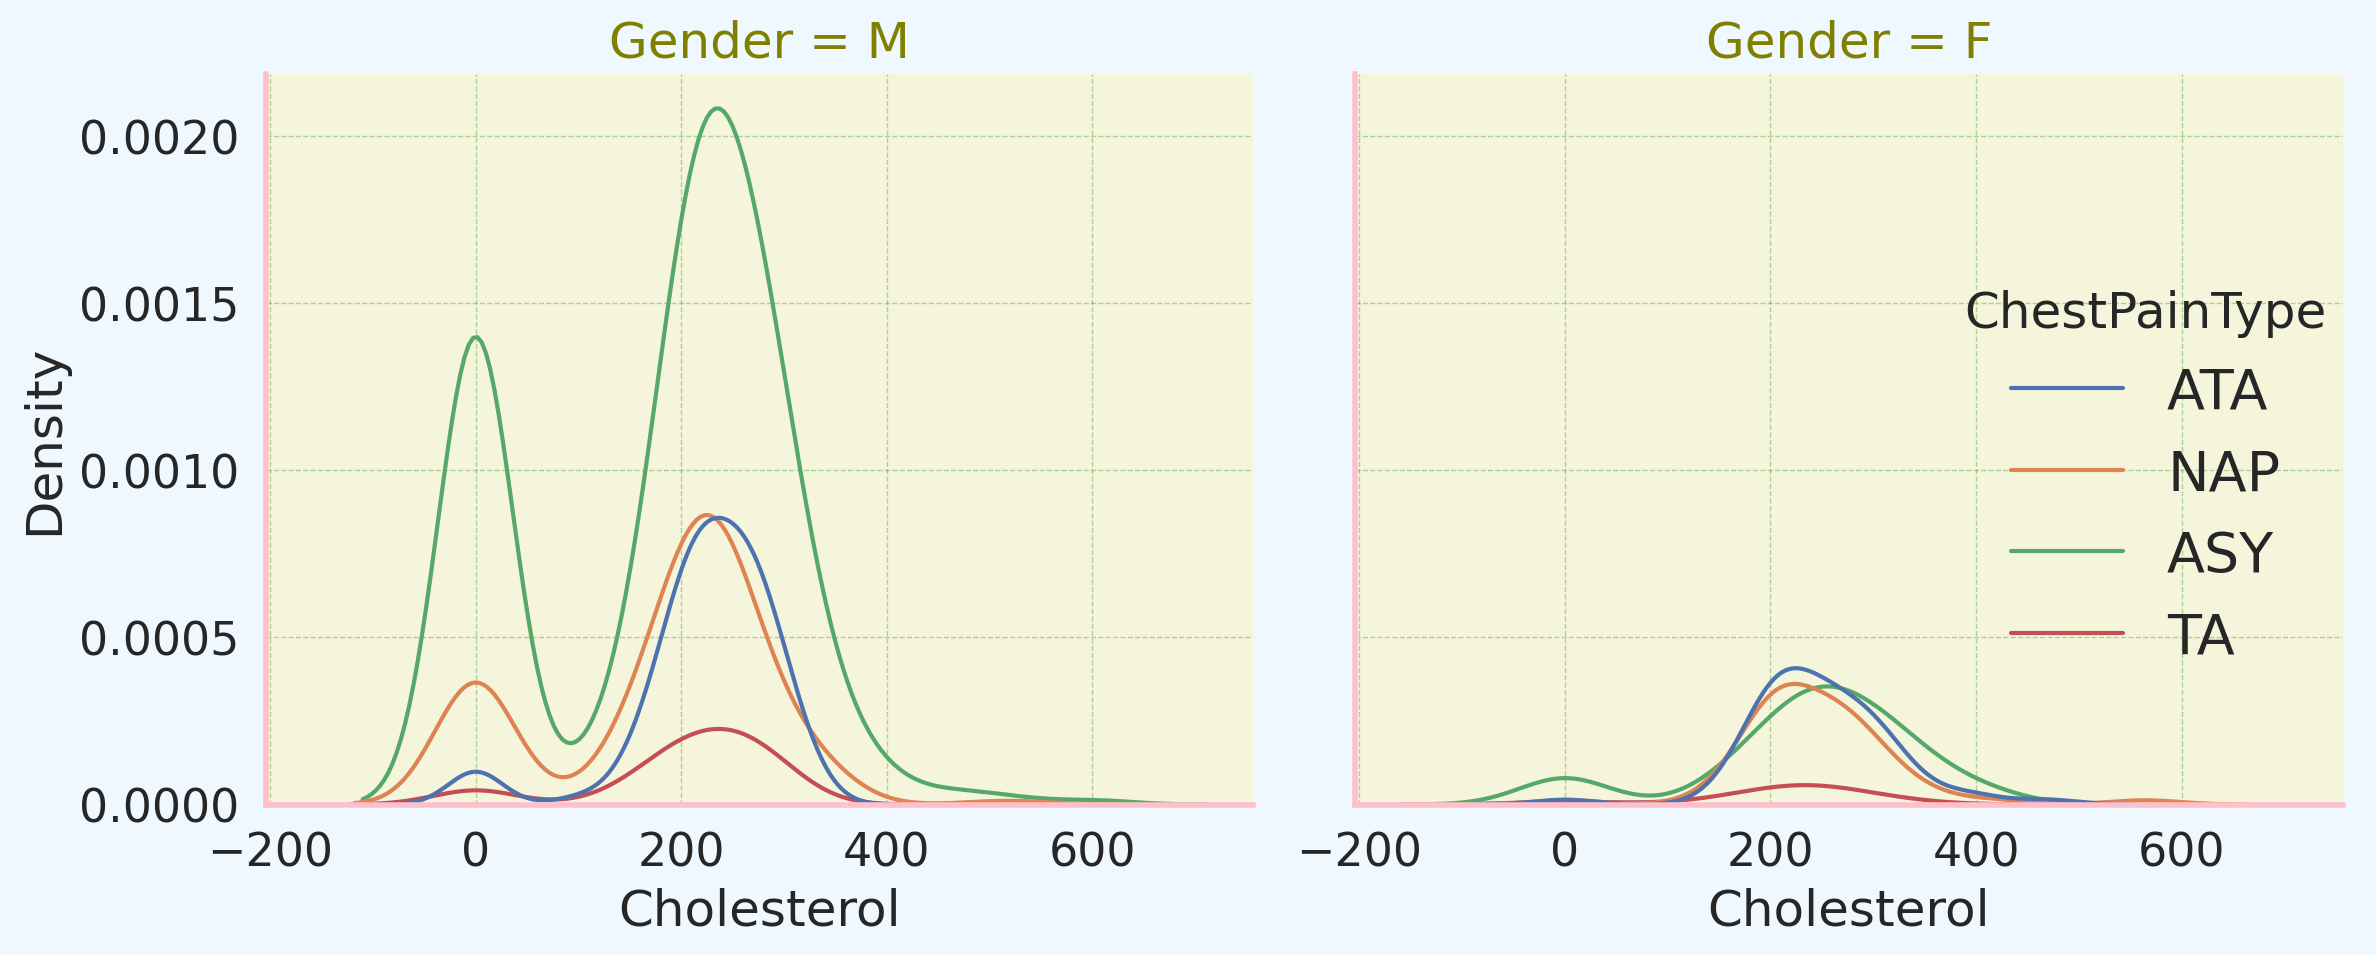

In [17]:
# Plot KDE (Kernel Density Estimate) for 'Cholesterol' with 'ChestPainType' as hue, differentiated by 'Gender'
import seaborn as sns
import matplotlib.pyplot as plt

sns.displot(data=df, x="Cholesterol", hue="ChestPainType", col="Gender", kind="kde")
plt.show()

# Explanation:
# The code uses seaborn's displot to create a grid of KDE plots for 'Cholesterol' with 'ChestPainType' as hue.
# The plots are separated into columns based on the 'Gender' variable.
# This visualization allows you to observe the distribution of 'Cholesterol' across different 'ChestPainType' categories for each gender.


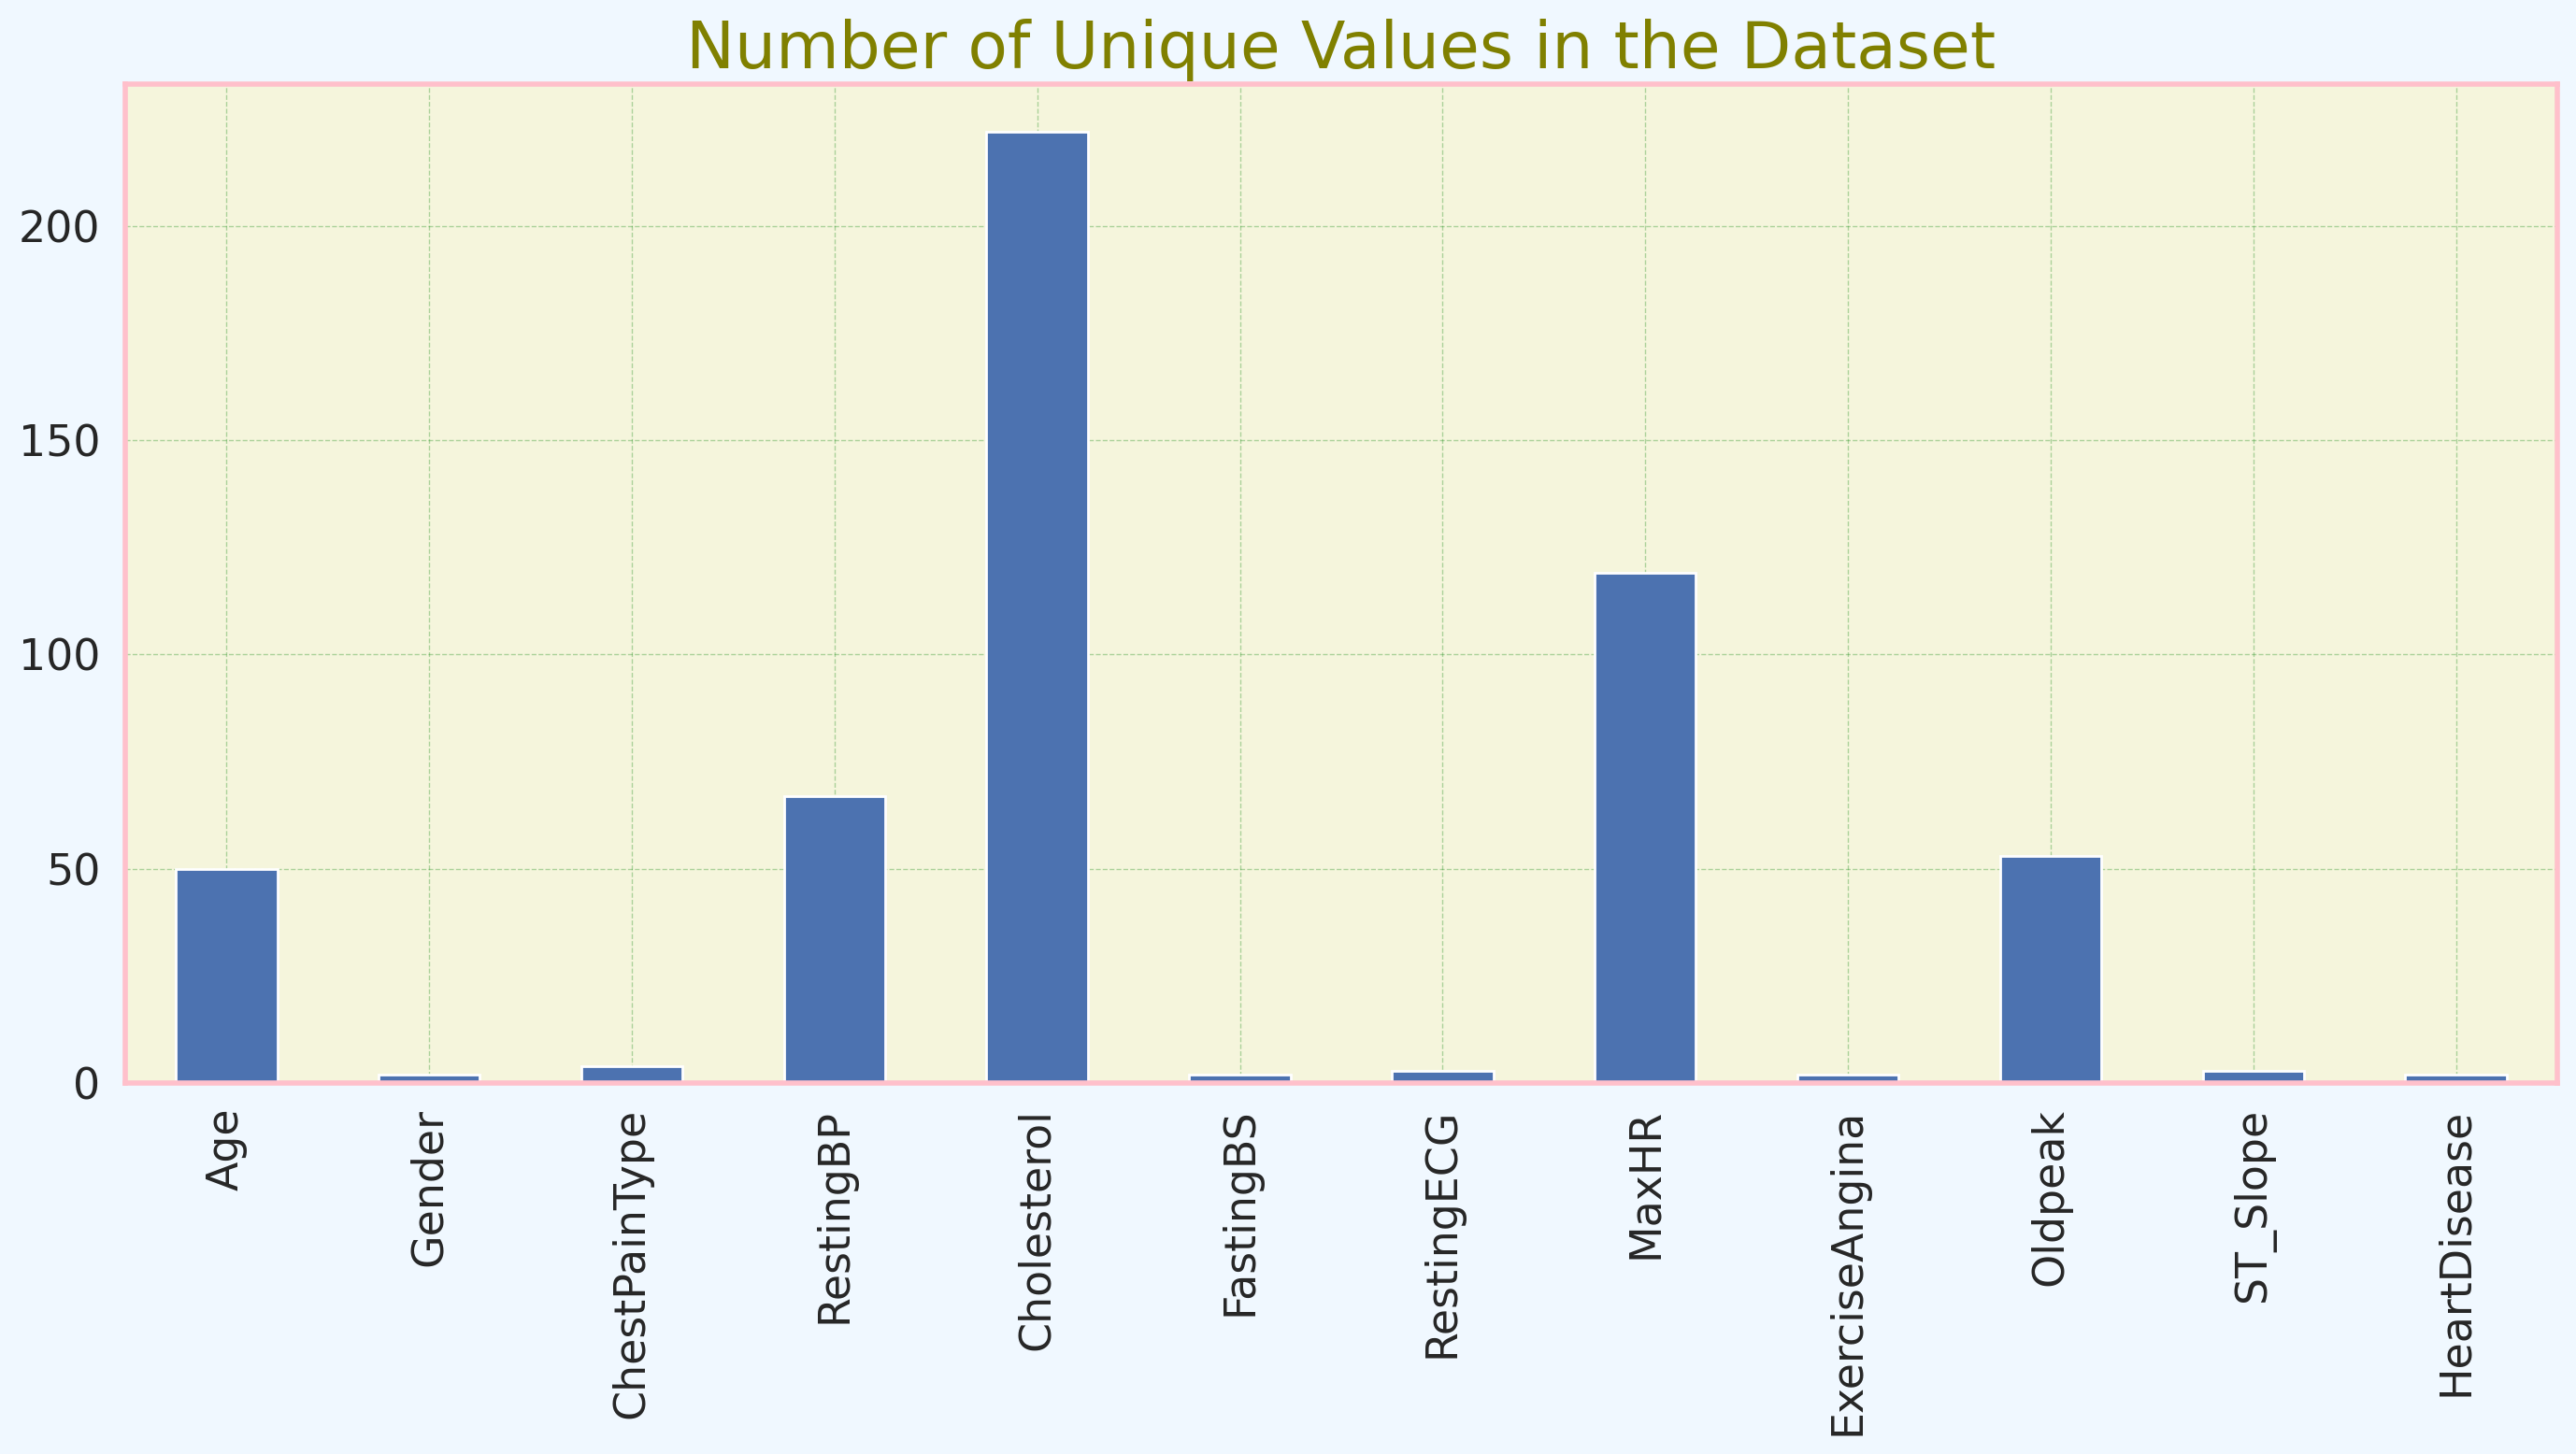

In [18]:
# Plot the number of unique values in each column using a bar chart
import matplotlib.pyplot as plt

df.nunique().plot(kind='bar')
plt.title('Number of Unique Values in the Dataset')
plt.show()

# Explanation:
# The code uses a bar chart to visualize the number of unique values in each column of the DataFrame.
# This plot provides an overview of the diversity of values within each variable, helping to identify potential categorical or highly varied features.


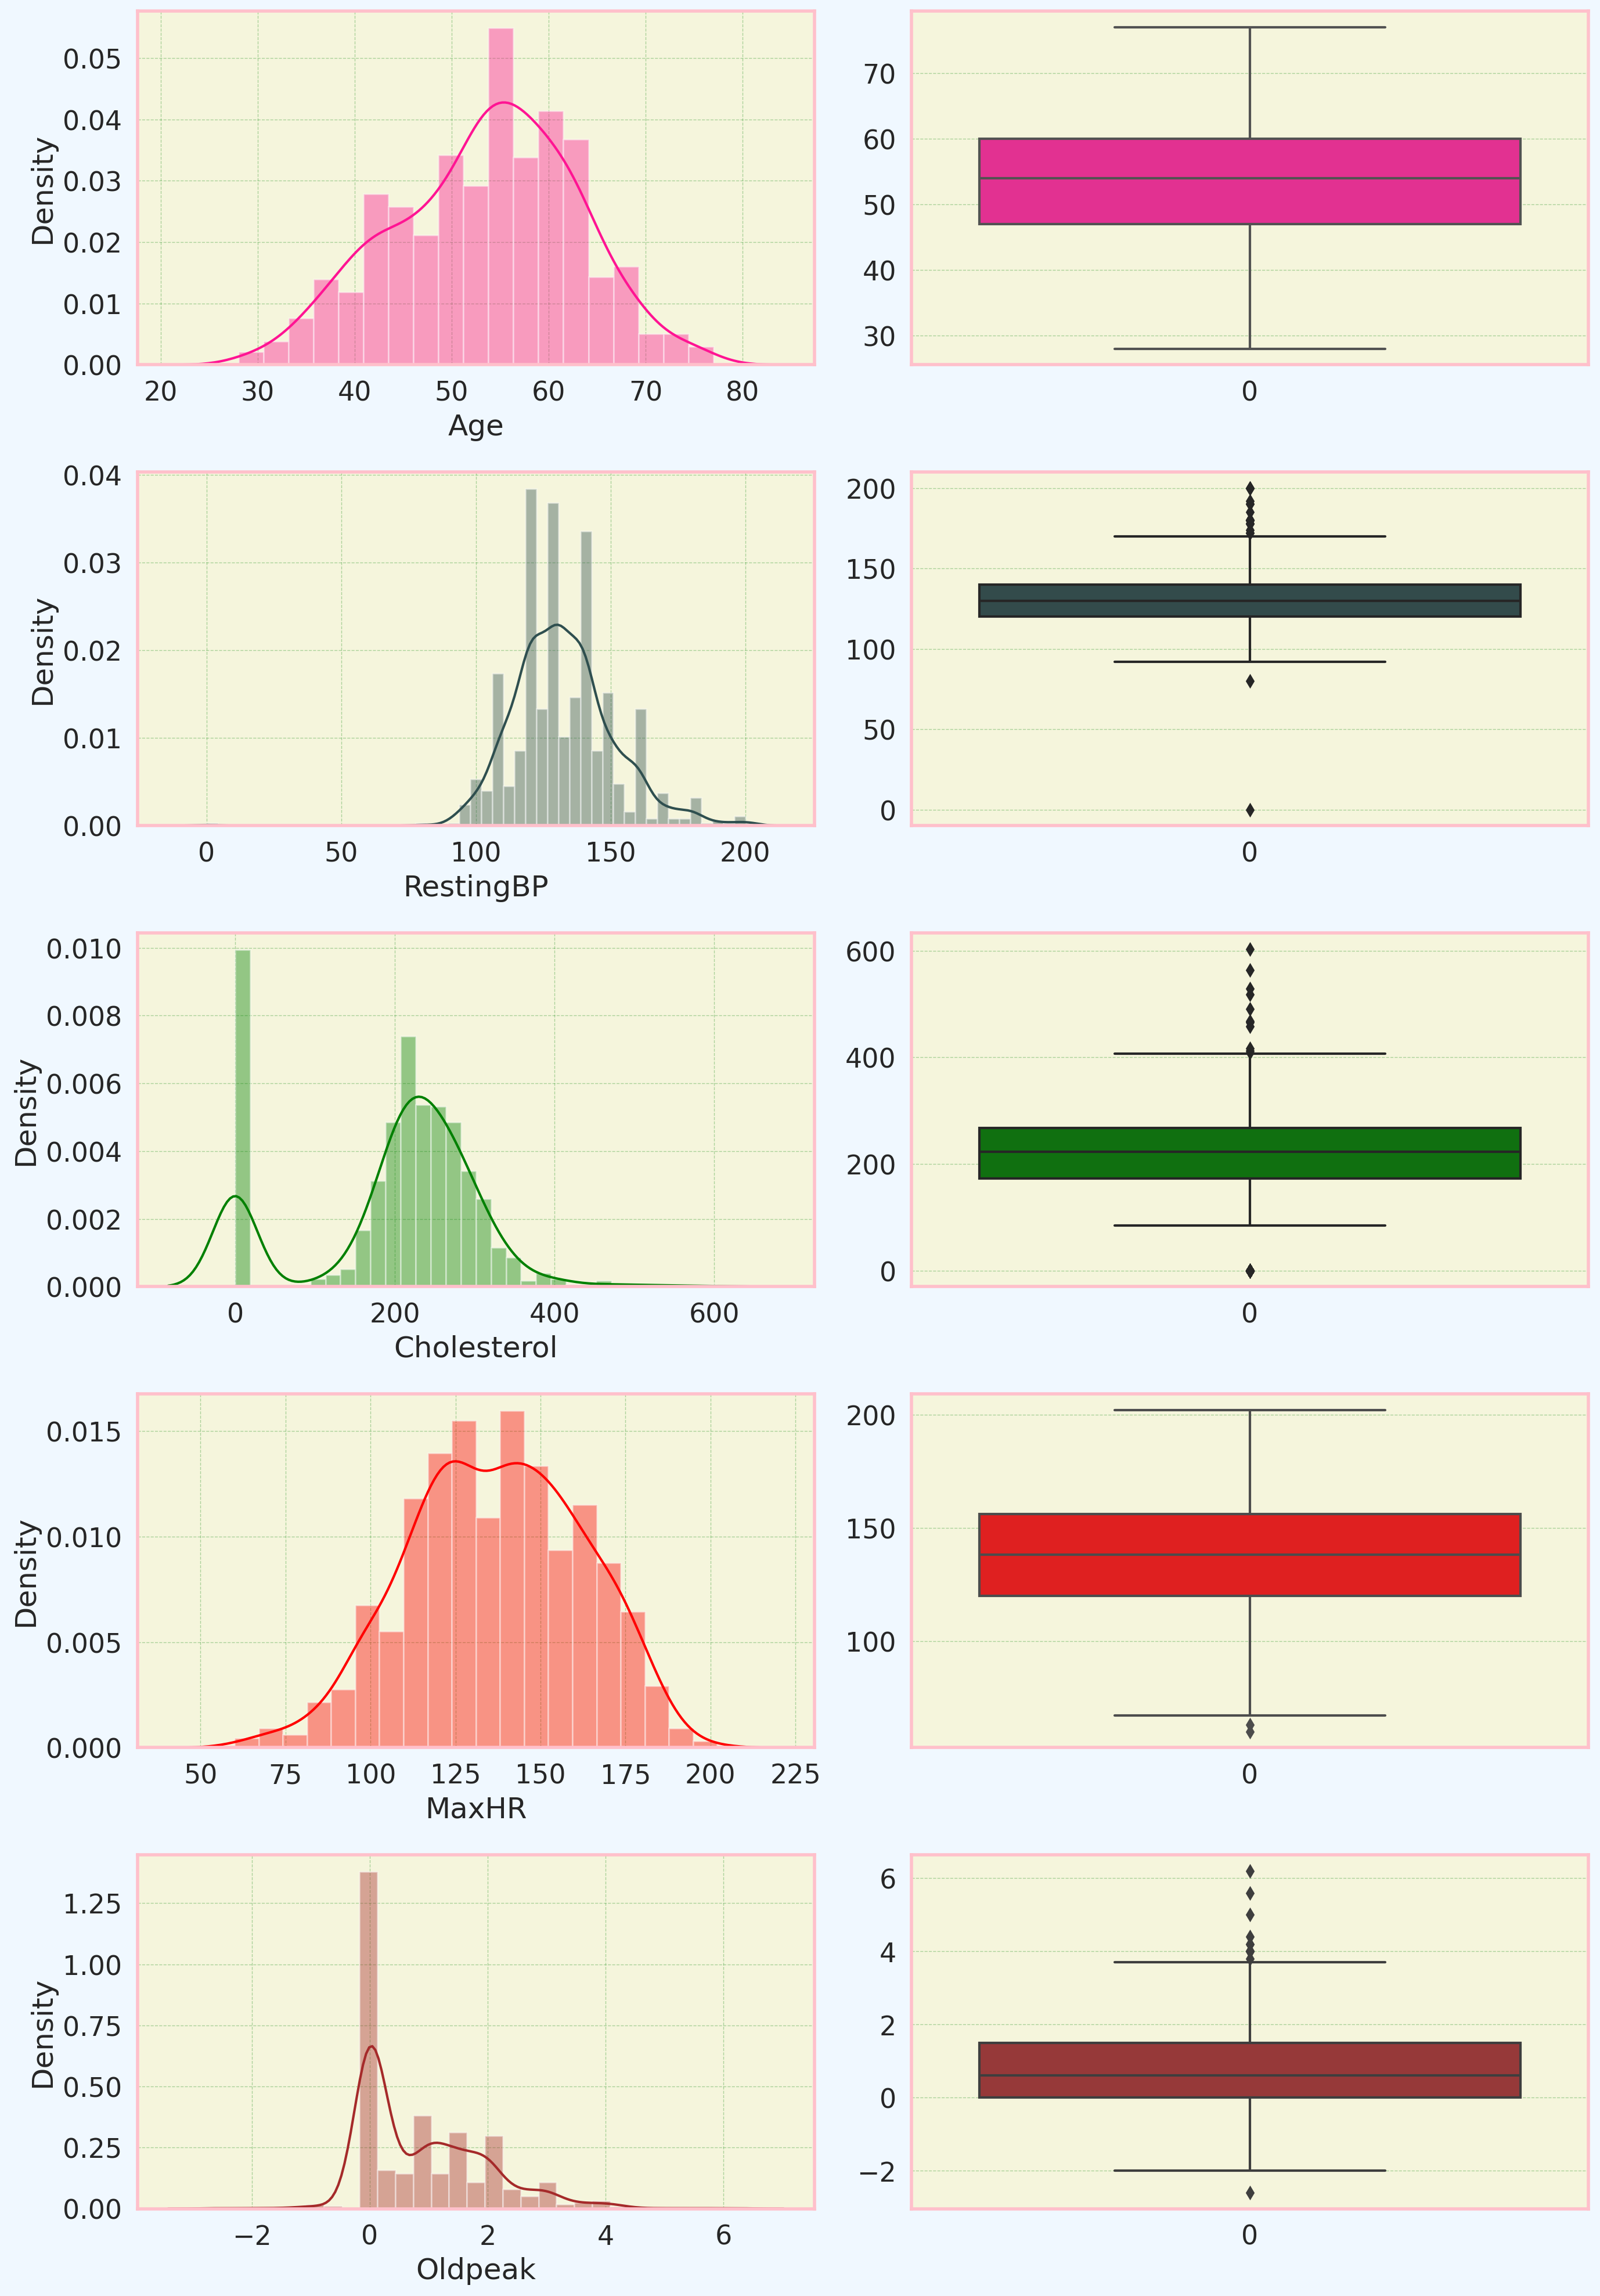

In [19]:
# Create subplots to visualize distribution and boxplots for selected columns
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14, 20))

# Plot 1 - Age distribution
plt.subplot(5, 2, 1)
sns.distplot(df['Age'], color='DeepPink')

# Plot 2 - Age boxplot
plt.subplot(5, 2, 2)
sns.boxplot(df['Age'], color='DeepPink')

# Plot 3 - RestingBP distribution
plt.subplot(5, 2, 3)
sns.distplot(df['RestingBP'], color='DarkSlateGray')

# Plot 4 - RestingBP boxplot
plt.subplot(5, 2, 4)
sns.boxplot(df['RestingBP'], color='DarkSlateGray')

# Plot 5 - Cholesterol distribution
plt.subplot(5, 2, 5)
sns.distplot(df['Cholesterol'], color='Green')

# Plot 6 - Cholesterol boxplot
plt.subplot(5, 2, 6)
sns.boxplot(df['Cholesterol'], color='Green')

# Plot 7 - MaxHR distribution
plt.subplot(5, 2, 7)
sns.distplot(df['MaxHR'], color='Red')

# Plot 8 - MaxHR boxplot
plt.subplot(5, 2, 8)
sns.boxplot(df['MaxHR'], color='Red')

# Plot 9 - Oldpeak distribution
plt.subplot(5, 2, 9)
sns.distplot(df['Oldpeak'], color='Brown')

# Plot 10 - Oldpeak boxplot
plt.subplot(5, 2, 10)
sns.boxplot(df['Oldpeak'], color='Brown')

# Adjust layout for better visualization
plt.tight_layout()
plt.show()

# Explanation:
# The code creates subplots to visualize the distribution (using distplot) and boxplots for selected columns ('Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak').
# This arrangement allows for a quick comparison of the data distribution and identification of potential outliers or patterns.


In [20]:
# Calculate the 5th and 95th percentiles
Q1 = df.quantile(0.05)
Q3 = df.quantile(0.95)

# Calculate the Interquartile Range (IQR)
IQR = Q3 - Q1

# Sort the IQR values in descending order
IQR_sorted = IQR.sort_values(ascending=False)


In [21]:
# Filter out rows with outliers based on IQR
heart = df[~((df < (Q1 - 1.5 * IQR)) | (df > (Q3 + 1.5 * IQR))).any(axis=1)]


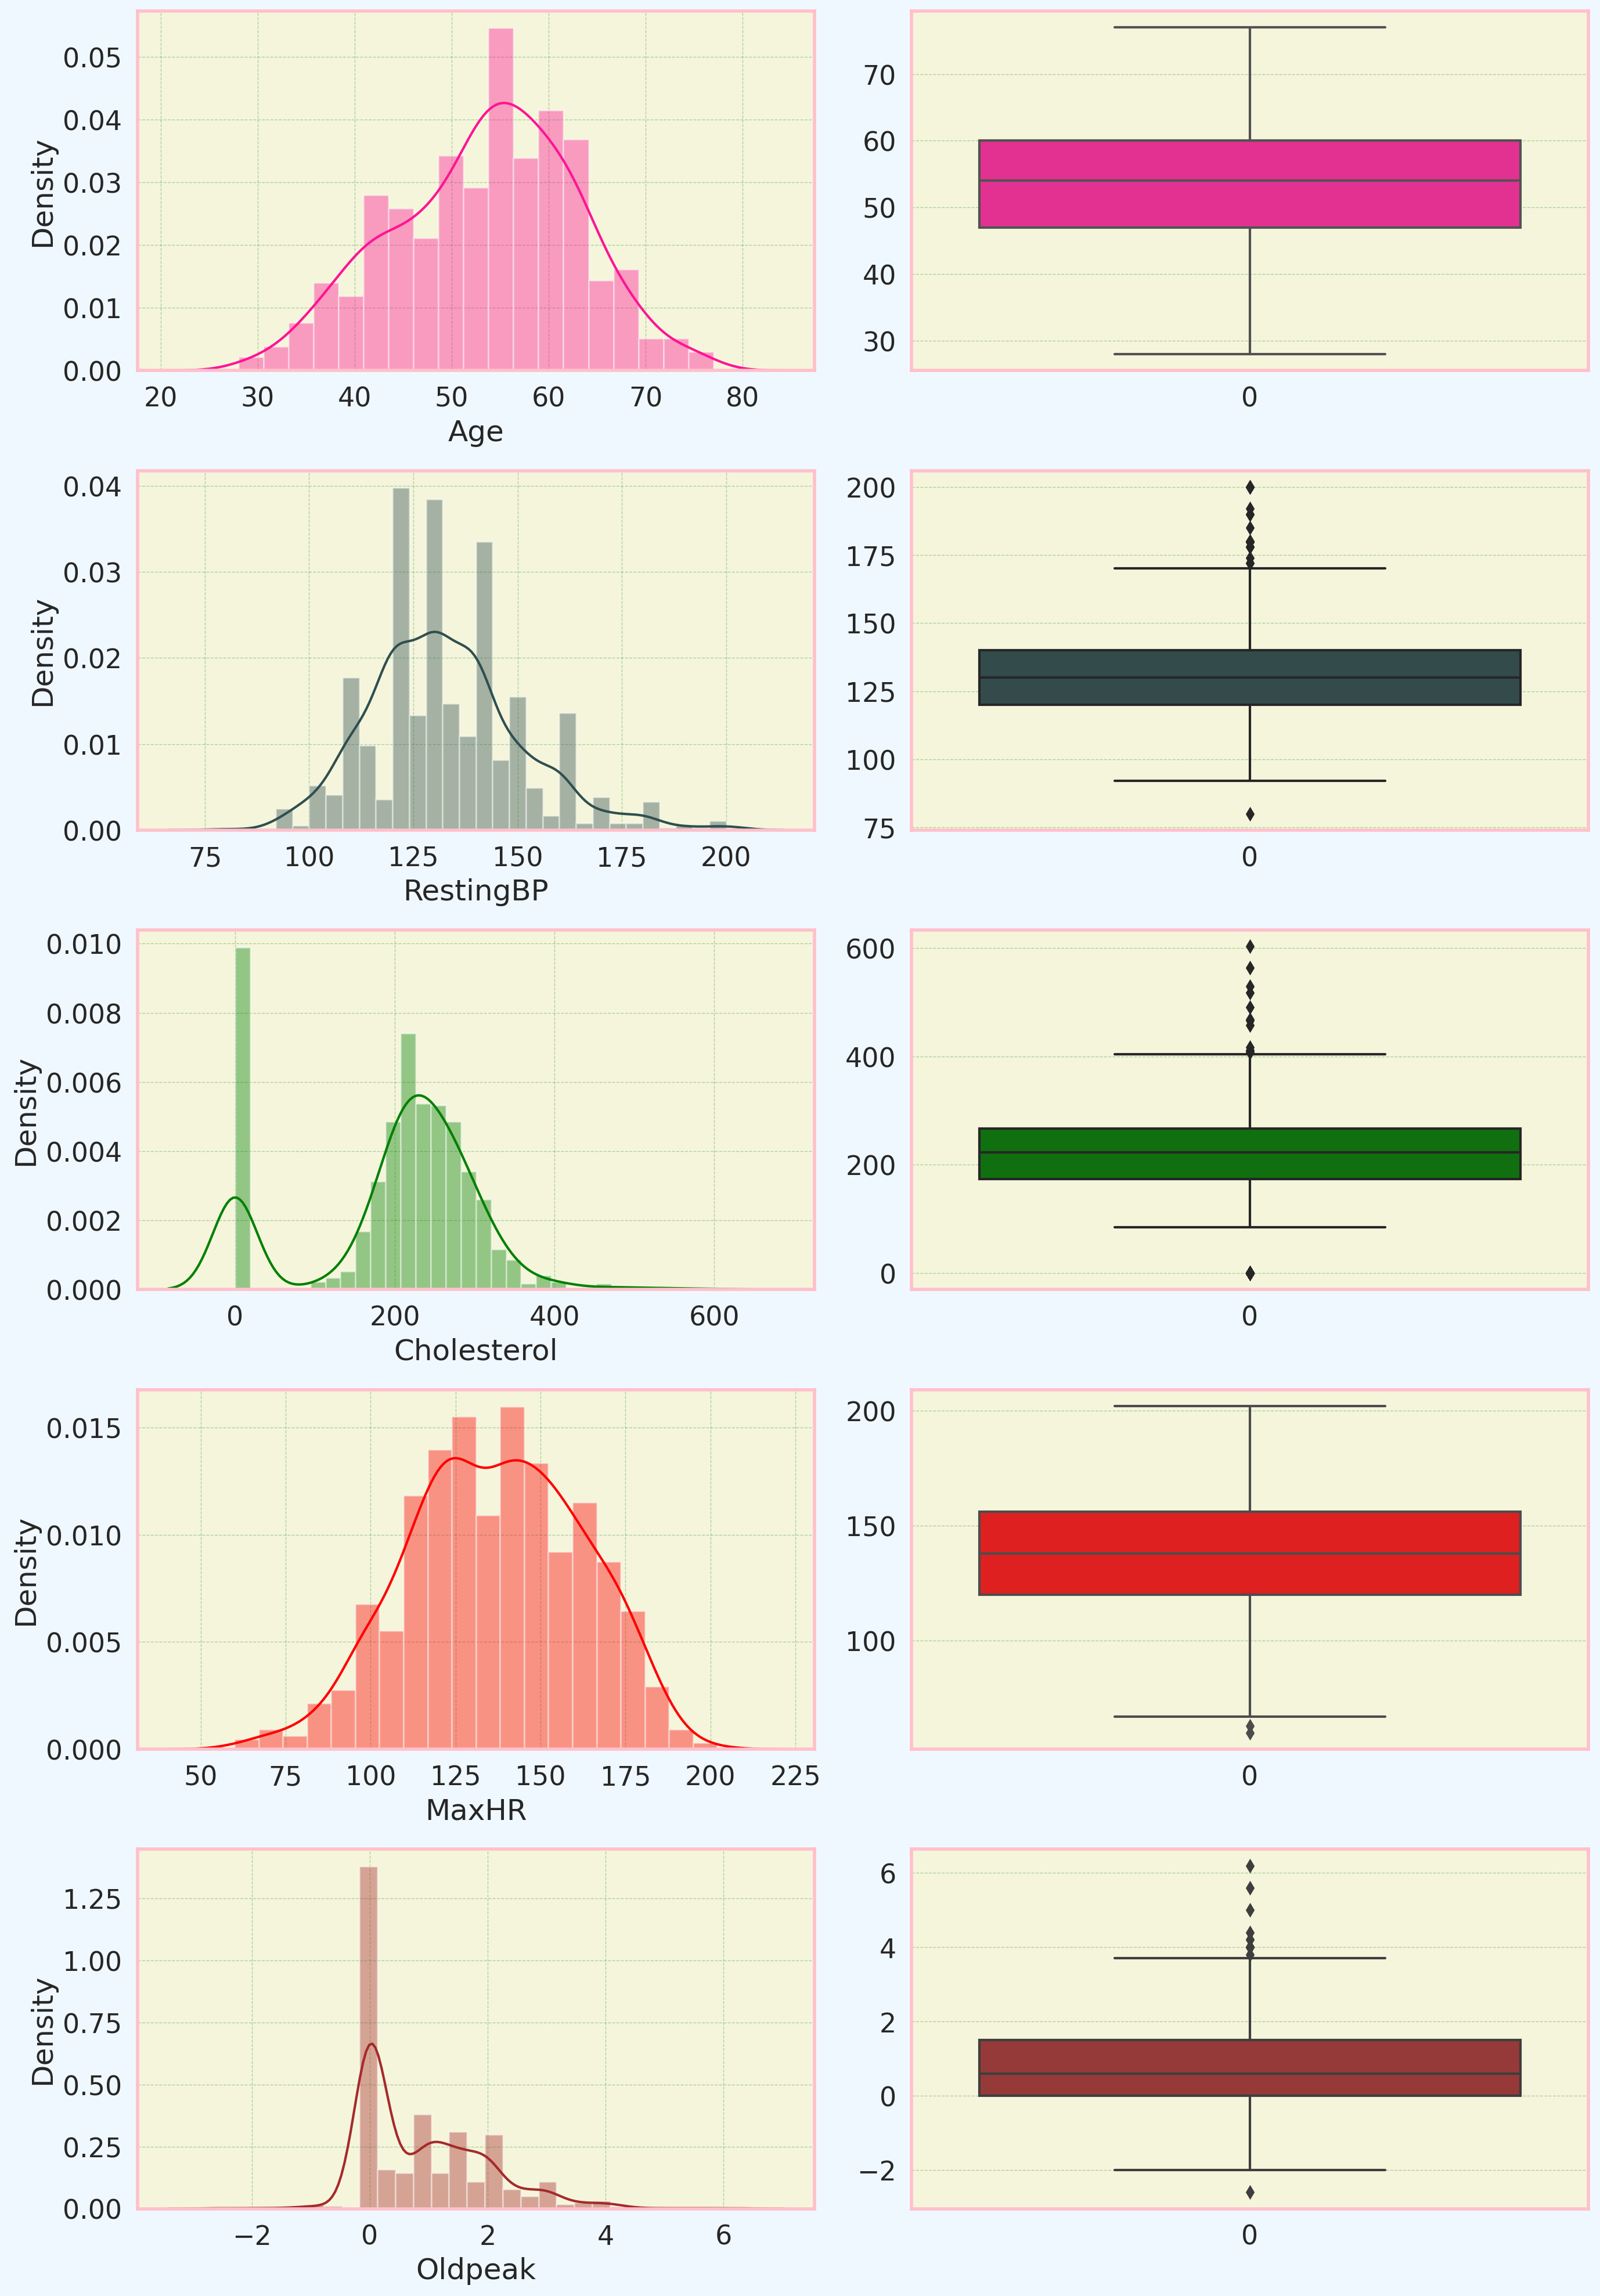

In [22]:
plt.figure(figsize=(14, 20))

# Plotting Age distribution and boxplot
plt.subplot(5, 2, 1)
sns.distplot(heart['Age'], color='DeepPink')
plt.subplot(5, 2, 2)
sns.boxplot(heart['Age'], color='DeepPink')

# Plotting RestingBP distribution and boxplot
plt.subplot(5, 2, 3)
sns.distplot(heart['RestingBP'], color='DarkSlateGray')
plt.subplot(5, 2, 4)
sns.boxplot(heart['RestingBP'], color='DarkSlateGray')

# Plotting Cholesterol distribution and boxplot
plt.subplot(5, 2, 5)
sns.distplot(heart['Cholesterol'], color='Green')
plt.subplot(5, 2, 6)
sns.boxplot(heart['Cholesterol'], color='Green')

# Plotting MaxHR distribution and boxplot
plt.subplot(5, 2, 7)
sns.distplot(heart['MaxHR'], color='Red')
plt.subplot(5, 2, 8)
sns.boxplot(heart['MaxHR'], color='Red')

# Plotting Oldpeak distribution and boxplot
plt.subplot(5, 2, 9)
sns.distplot(heart['Oldpeak'], color='Brown')
plt.subplot(5, 2, 10)
sns.boxplot(heart['Oldpeak'], color='Brown')

plt.tight_layout()
plt.show()

# Explanation:
# The code generates a composite plot with subplots for Age, RestingBP, Cholesterol, MaxHR, and Oldpeak.
# Each subplot includes both a distribution plot and a boxplot for the respective feature.
# This visual representation helps in understanding the distribution and central tendency of these key features in the 'heart' DataFrame.


In [23]:
# Checking the number of Zeros(0) present in the Cholesterol
Cholesterol = heart[heart['Cholesterol'] == 0]

# Displaying the shape (number of occurrences) of rows where Cholesterol is 0
print("Number of occurrences where Cholesterol is 0:")
display(Cholesterol.shape)

# Explanation:
# This code checks and displays the number of occurrences where the 'Cholesterol' column has a value of 0 in the 'heart' DataFrame.
# The shape function is used to get the number of rows and columns in the resulting DataFrame, indicating the count of occurrences.


Number of occurrences where Cholesterol is 0:


(171, 12)

In [24]:
# Converting Zero Value of Cholesterol to NaN Value
heart.loc[heart['Cholesterol'] == 0, 'Cholesterol'] = np.nan

# Explanation:
# This code replaces the zero values in the 'Cholesterol' column of the 'heart' DataFrame with NaN (Not a Number).


In [25]:
# Checking for NaN values in the DataFrame after replacing zero values with NaN in the 'Cholesterol' column
nan_check = heart.isna().sum()

# Displaying the count of NaN values in each column
print("Count of NaN values after replacing zero values in 'Cholesterol' with NaN:")
display(nan_check)

# Purpose of the code:
# This code checks for the presence of NaN values in the 'heart' DataFrame after replacing zero values with NaN in the 'Cholesterol' column.
# It displays the count of NaN values in each column to ensure the successful replacement.


Count of NaN values after replacing zero values in 'Cholesterol' with NaN:


Age                 0
Gender              0
ChestPainType       0
RestingBP           0
Cholesterol       171
FastingBS           0
RestingECG          0
MaxHR               0
ExerciseAngina      0
Oldpeak             0
ST_Slope            0
HeartDisease        0
dtype: int64

In [26]:
# Filling NaN values in the 'Cholesterol' column with the median value
heart["Cholesterol"] = heart["Cholesterol"].fillna(heart["Cholesterol"].median())

# Explanation:
# This code fills the NaN (Not a Number) values in the 'Cholesterol' column of the 'heart' DataFrame with the median value of the column.
# Filling NaN values with the median is a common practice to handle missing or undefined data in a numerical column.


In [27]:
# Checking the presence of zeros in the 'RestingBP' column
RestingBP = heart[heart['RestingBP'] == 0]
RestingBP

# Explanation:
# This code identifies and displays rows where the 'RestingBP' column has a value of 0 in the 'heart' DataFrame.



Empty DataFrame
Columns: [Age, Gender, ChestPainType, RestingBP, Cholesterol, FastingBS, RestingECG, MaxHR, ExerciseAngina, Oldpeak, ST_Slope, HeartDisease]
Index: []

In [28]:
# Removing rows where 'RestingBP' is zero
heart = heart.drop(heart[heart['RestingBP'] == 0].index)

# Explanation:
# This code removes rows from the 'heart' DataFrame where the 'RestingBP' column has a value of 0.


In [29]:
# Selecting rows with systolic RestingBP (greater than or equal to 100)
Systolic_RestingBP = heart[heart['RestingBP'] >= 100]

# Displaying the count of individuals with systolic RestingBP
print(f"Number of individuals with systolic Resting Blood Pressure (RestingBP >= 100): {Systolic_RestingBP.shape[0]}")

# Explanation:
# This code identifies and prints the count of individuals in the 'heart' DataFrame who have systolic RestingBP (greater than or equal to 100).



Number of individuals with systolic Resting Blood Pressure (RestingBP >= 100): 905


In [30]:
# Selecting rows with diastolic RestingBP (less than or equal to 100)
Diastolic_RestingBP = heart[heart['RestingBP'] <= 100]

# Displaying the count of individuals with diastolic RestingBP
print(f"Number of individuals with diastolic Resting Blood Pressure (RestingBP <= 100): {Diastolic_RestingBP.shape[0]}")

# Explanation:
# This code identifies and prints the count of individuals in the 'heart' DataFrame who have diastolic RestingBP (less than or equal to 100).


Number of individuals with diastolic Resting Blood Pressure (RestingBP <= 100): 27


In [31]:
# Creating a new column 'Diastolic_RestingBP' based on the condition
heart['Diastolic_RestingBP'] = np.where(heart['RestingBP'] <= 100, 1, 0)

# Displaying a random sample of 5 rows from the modified DataFrame
heart.sample(5)

# Explanation:
# This code creates a new binary column 'Diastolic_RestingBP' in the 'heart' DataFrame based on the condition that if 'RestingBP' is less than or equal to 100, the value is 1; otherwise, it is 0. The sample() function is then used to display a random sample of 5 rows from the modified DataFrame.


Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
416   63      M           ASY        140        260.0          0         ST   
5     39      M           NAP        120        339.0          0     Normal   
370   60      M           ASY        135        237.0          0     Normal   
168   58      M           ASY        135        222.0          0     Normal   
858   62      F           ASY        140        268.0          0        LVH   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Diastolic_RestingBP  
416    112              Y      3.0     Flat             1                    0  
5      170              N      0.0       Up             0                    0  
370     63              Y      0.5       Up             1                    0  
168    100              N      0.0       Up             0                    0  
858    160              N      3.6     Down             1                    0

In [32]:
# Displaying the minimum value of the 'RestingBP' column
heart['RestingBP'].min()

# Explanation:
# This code calculates and displays the minimum value present in the 'RestingBP' column of the 'heart' DataFrame.

80

In [33]:
# Displaying the maximum value of the 'RestingBP' column
heart["RestingBP"].max()

# Explanation:
# This code calculates and displays the maximum value present in the 'RestingBP' column of the 'heart' DataFrame.

200

In [34]:
# Creating a categorical feature 'RestingBP_Category' based on specified bins
heart["RestingBP_Category"] = pd.cut(heart["RestingBP"], bins=[0, 120, 129, 139, 200], labels=["Normal_BP", "Mild_High_BP", "Moderate_High_BP", "Severe_High_BP"])

# Displaying the value counts of the 'RestingBP_Category' feature
print("Value Counts:\n\n", heart['RestingBP_Category'].value_counts())

# Displaying a random sample of 5 rows from the modified DataFrame
heart.sample(5)

# Explanation:
# This code creates a new categorical feature 'RestingBP_Category' based on specified bins for the 'RestingBP' column.
# It then displays the value counts of the created feature and a random sample of 5 rows from the modified DataFrame.



Value Counts:

 Severe_High_BP      327
Normal_BP           292
Moderate_High_BP    216
Mild_High_BP         82
Name: RestingBP_Category, dtype: int64


Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
762   40      M           ASY        110        167.0          0        LVH   
825   59      M            TA        170        288.0          0        LVH   
853   47      M           NAP        138        257.0          0        LVH   
420   66      M           NAP        110        213.0          1        LVH   
628   61      M            TA        134        234.0          0     Normal   

     MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  \
762    114              Y      2.0     Flat             1   
825    159              N      0.2     Flat             1   
853    156              N      0.0       Up             0   
420     99              Y      1.3     Flat             0   
628    145              N      2.6     Flat             1   

     Diastolic_RestingBP RestingBP_Category  
762                    0          Normal_BP  
825                    0     Severe_High_BP  
853                    0   Moderate_High_BP  
420                    0          Normal_BP  
628                    0   Moderate_High_BP

In [35]:
# Converting the 'RestingBP_Category' feature from categorical to object type
heart['RestingBP_Category'] = heart['RestingBP_Category'].astype(object)


In [36]:
# Displaying the minimum value in the 'Age' column of the 'heart' DataFrame
print("Minimum Age:", heart['Age'].min())

Minimum Age: 28


In [37]:
# Creating a new categorical variable 'Cholesterol_Category' based on the 'Cholesterol' values
heart["Cholesterol_Category"] = pd.cut(heart["Cholesterol"], bins=[0, 200, 230, 500], labels=["Normal", "Borderline", "High"])

# Displaying the value counts of the new 'Cholesterol_Category' variable
print("Value Counts:\n\n", heart['Cholesterol_Category'].value_counts())

# Displaying the first few rows of the modified 'heart' DataFrame
heart.head()



Value Counts:

 High          576
Borderline    187
Normal        150
Name: Cholesterol_Category, dtype: int64


Age Gender ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  \
0   40      M           ATA        140        289.0          0     Normal   
1   49      F           NAP        160        180.0          0     Normal   
2   37      M           ATA        130        283.0          0         ST   
3   48      F           ASY        138        214.0          0     Normal   
4   54      M           NAP        150        195.0          0     Normal   

   MaxHR ExerciseAngina  Oldpeak ST_Slope  HeartDisease  Diastolic_RestingBP  \
0    172              N      0.0       Up             0                    0   
1    156              N      1.0     Flat             1                    0   
2     98              N      0.0       Up             0                    0   
3    108              Y      1.5     Flat             1                    0   
4    122              N      0.0       Up             0                    0   

  RestingBP_Category Cholesterol_Category  
0     Severe_High_BP                 High  
1     Severe_High_BP               Normal  
2   Moderate_High_BP                 High  
3   Moderate_High_BP           Borderline  
4     Severe_High_BP               Normal

In [38]:
# Displaying the data types of each column in the 'heart' DataFrame
heart.dtypes

Age                        int64
Gender                    object
ChestPainType             object
RestingBP                  int64
Cholesterol              float64
FastingBS                  int64
RestingECG                object
MaxHR                      int64
ExerciseAngina            object
Oldpeak                  float64
ST_Slope                  object
HeartDisease               int64
Diastolic_RestingBP        int64
RestingBP_Category        object
Cholesterol_Category    category
dtype: object

In [39]:
# Converting the 'Cholesterol_Category' variable to object type
heart['Cholesterol_Category'] = heart['Cholesterol_Category'].astype(object)

In [40]:
# Displaying the data types of each column in the 'heart' DataFrame
heart.dtypes

Age                       int64
Gender                   object
ChestPainType            object
RestingBP                 int64
Cholesterol             float64
FastingBS                 int64
RestingECG               object
MaxHR                     int64
ExerciseAngina           object
Oldpeak                 float64
ST_Slope                 object
HeartDisease              int64
Diastolic_RestingBP       int64
RestingBP_Category       object
Cholesterol_Category     object
dtype: object

In [41]:
# Displaying the value counts of the 'Cholesterol_Category' variable
heart['Cholesterol_Category'].value_counts()

# Explanation:
# This code snippet displays the value counts of the 'Cholesterol_Category' variable, showing the distribution of data across different categories within this categorical variable.
# It provides insights into how many instances fall into each category, giving a sense of the distribution of cholesterol levels in the dataset.



High          576
Borderline    187
Normal        150
Name: Cholesterol_Category, dtype: int64

In [42]:
# Displaying numerical and categorical columns
numerical = heart.select_dtypes(include=['number']).columns
categorical = heart.select_dtypes(include=['object']).columns

print('Numerical columns:', numerical)
print("**********" * 10)  # Separator for better visibility
print('Categorical columns:', categorical)

# Explanation:
# This code snippet identifies and displays the columns that are considered numerical and categorical in the 'heart' DataFrame.
# Numerical columns typically contain quantitative data, while categorical columns contain qualitative data.
# Understanding the data types of columns is crucial for performing appropriate analysis and visualization.


Numerical columns: Index(['Age', 'RestingBP', 'Cholesterol', 'FastingBS', 'MaxHR', 'Oldpeak',
       'HeartDisease', 'Diastolic_RestingBP'],
      dtype='object')
****************************************************************************************************
Categorical columns: Index(['Gender', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope',
       'RestingBP_Category', 'Cholesterol_Category'],
      dtype='object')


In [43]:
# Displaying value counts for categorical columns
for col in heart[categorical]:
    print(heart[col].value_counts())
    print("****" * 7)  # Separator for better visibility

# Explanation:
# This code snippet iterates through each categorical column in the 'heart' DataFrame.
# For each categorical column, it prints the value counts of unique categories.
# The separator (asterisks) enhances the readability of output for different columns.


M    724
F    193
Name: Gender, dtype: int64
****************************
ASY    496
NAP    202
ATA    173
TA      46
Name: ChestPainType, dtype: int64
****************************
Normal    551
LVH       188
ST        178
Name: RestingECG, dtype: int64
****************************
N    546
Y    371
Name: ExerciseAngina, dtype: int64
****************************
Flat    459
Up      395
Down     63
Name: ST_Slope, dtype: int64
****************************
Severe_High_BP      327
Normal_BP           292
Moderate_High_BP    216
Mild_High_BP         82
Name: RestingBP_Category, dtype: int64
****************************
High          576
Borderline    187
Normal        150
Name: Cholesterol_Category, dtype: int64
****************************


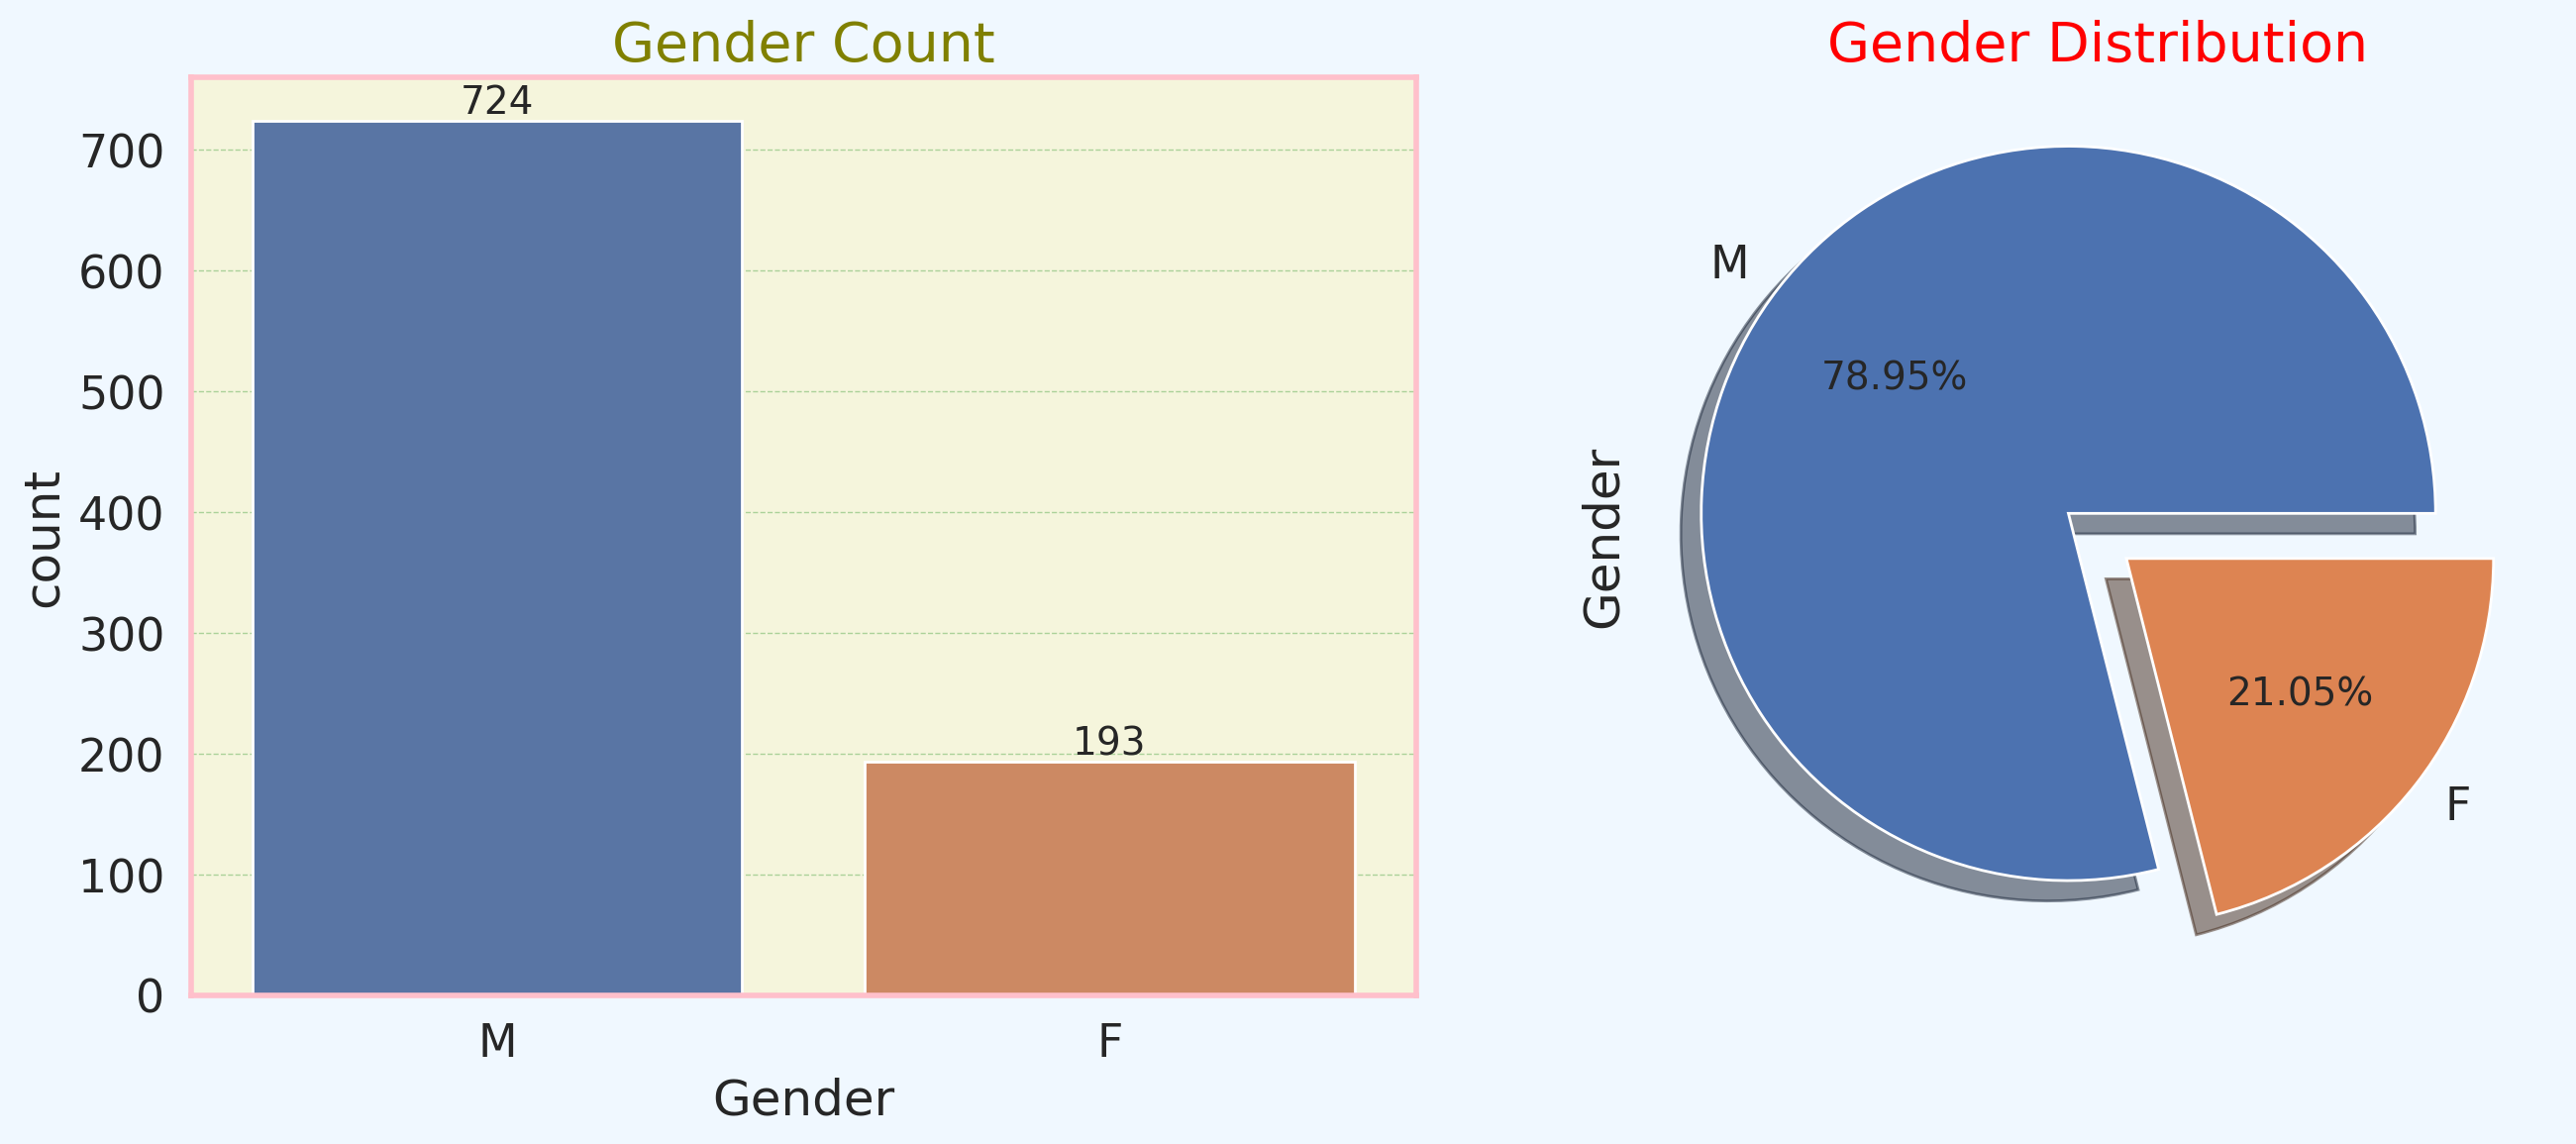

In [44]:
# Plotting count and pie chart for 'Gender'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Gender', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("Gender Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['Gender'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="Gender Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'Gender' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each gender category.
# The pie chart represents the distribution of gender categories with percentage labels, explosion, and shadow effects.


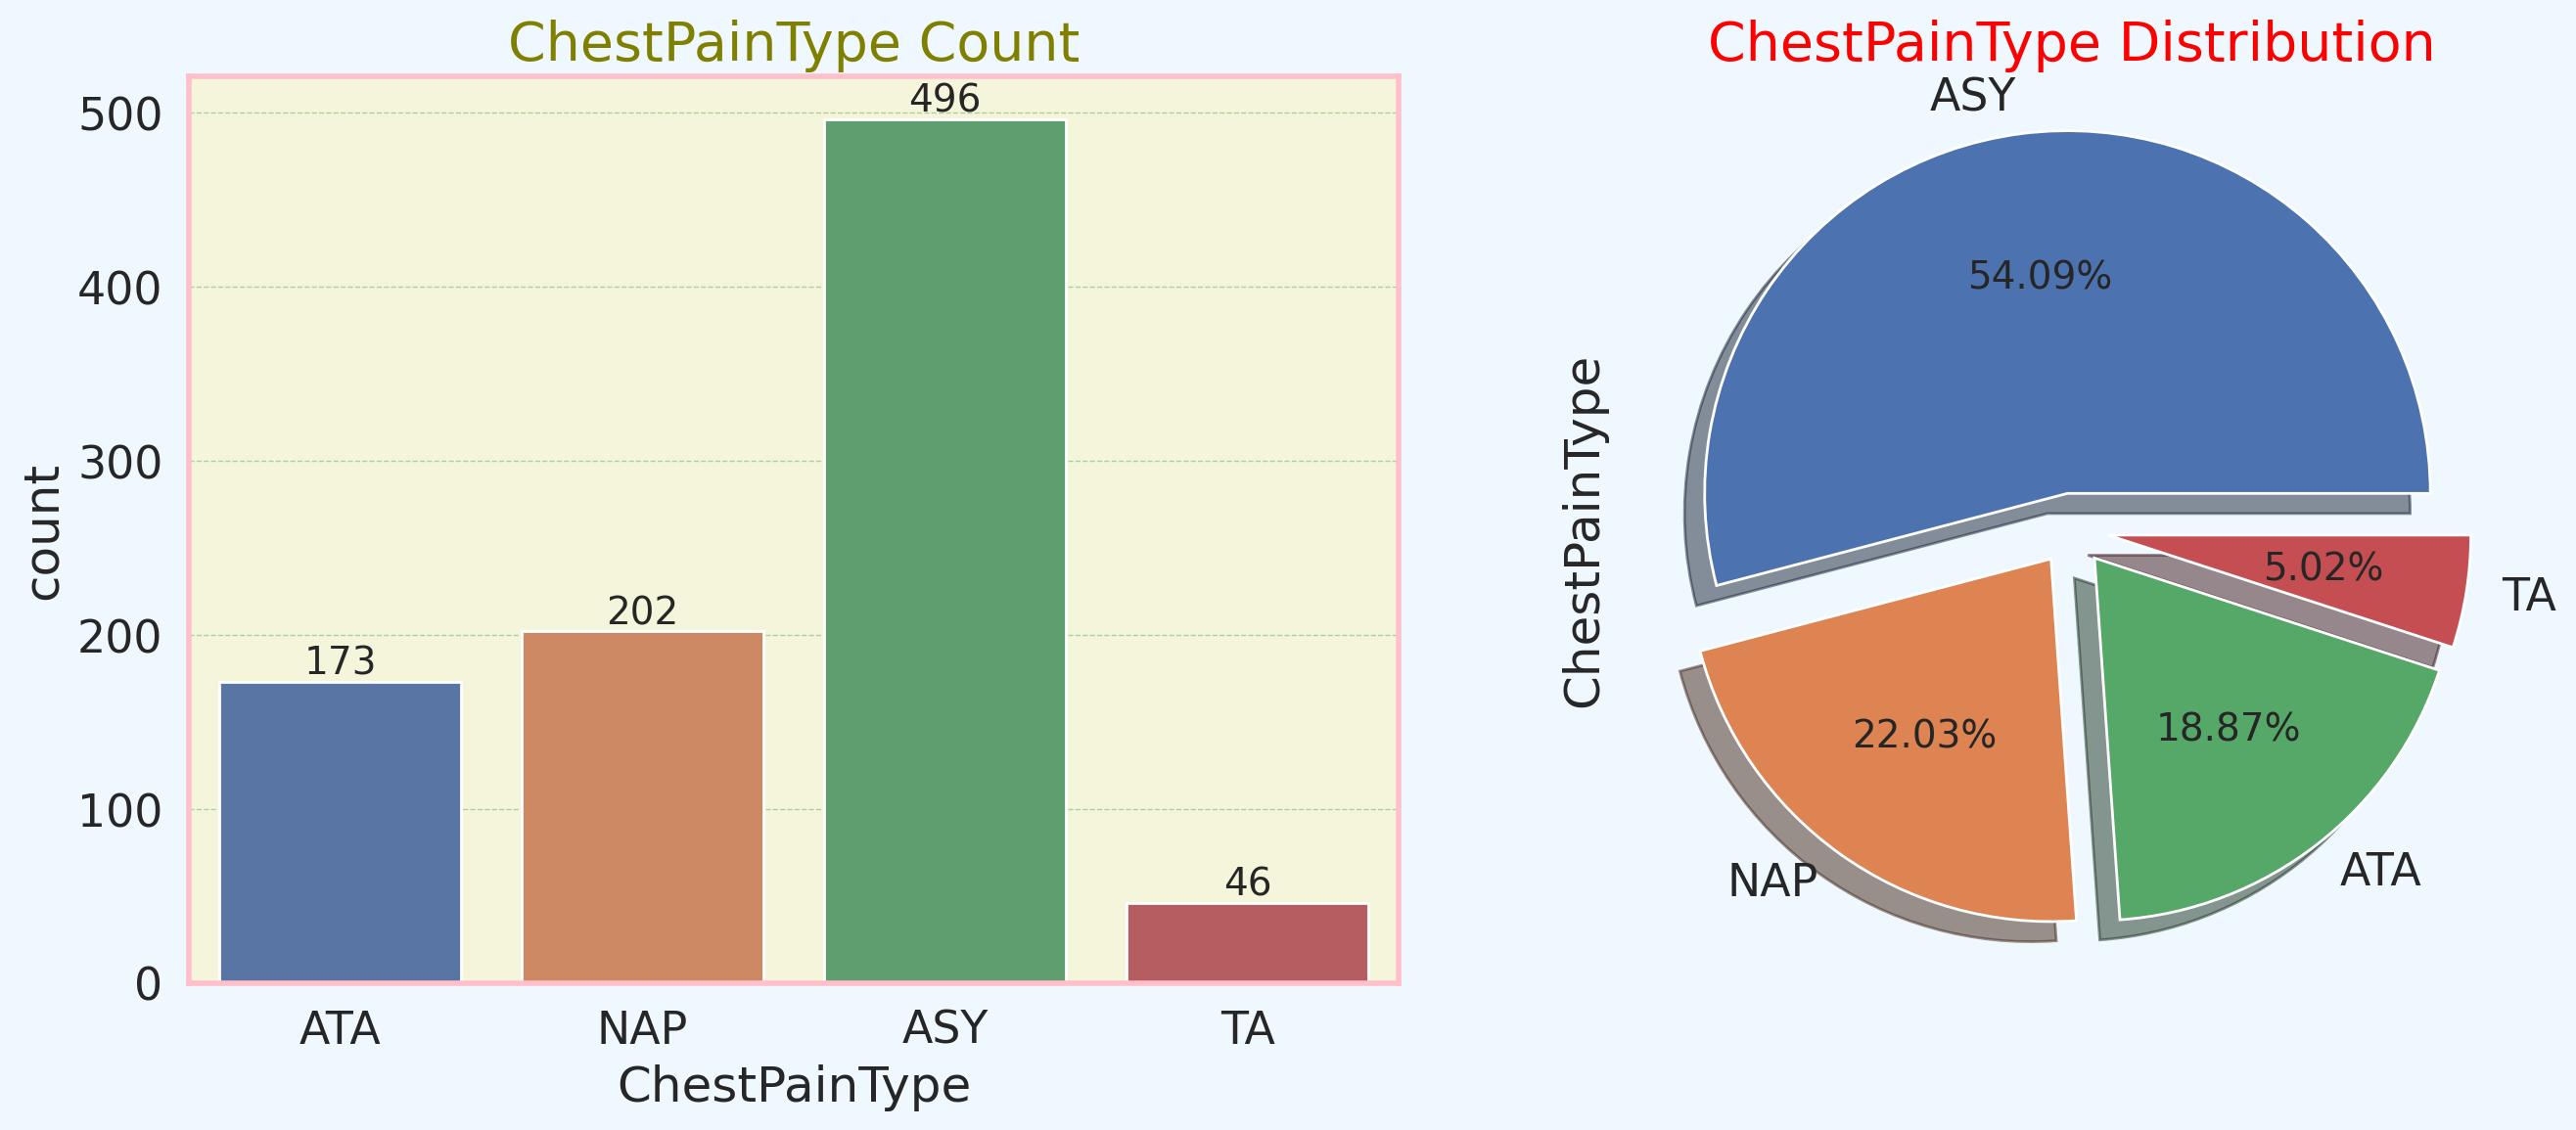

In [45]:
# Plotting count and pie chart for 'ChestPainType'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='ChestPainType', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("ChestPainType Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['ChestPainType'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="ChestPainType Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'ChestPainType' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each chest pain type category.
# The pie chart represents the distribution of chest pain types with percentage labels, explosion, and shadow effects.


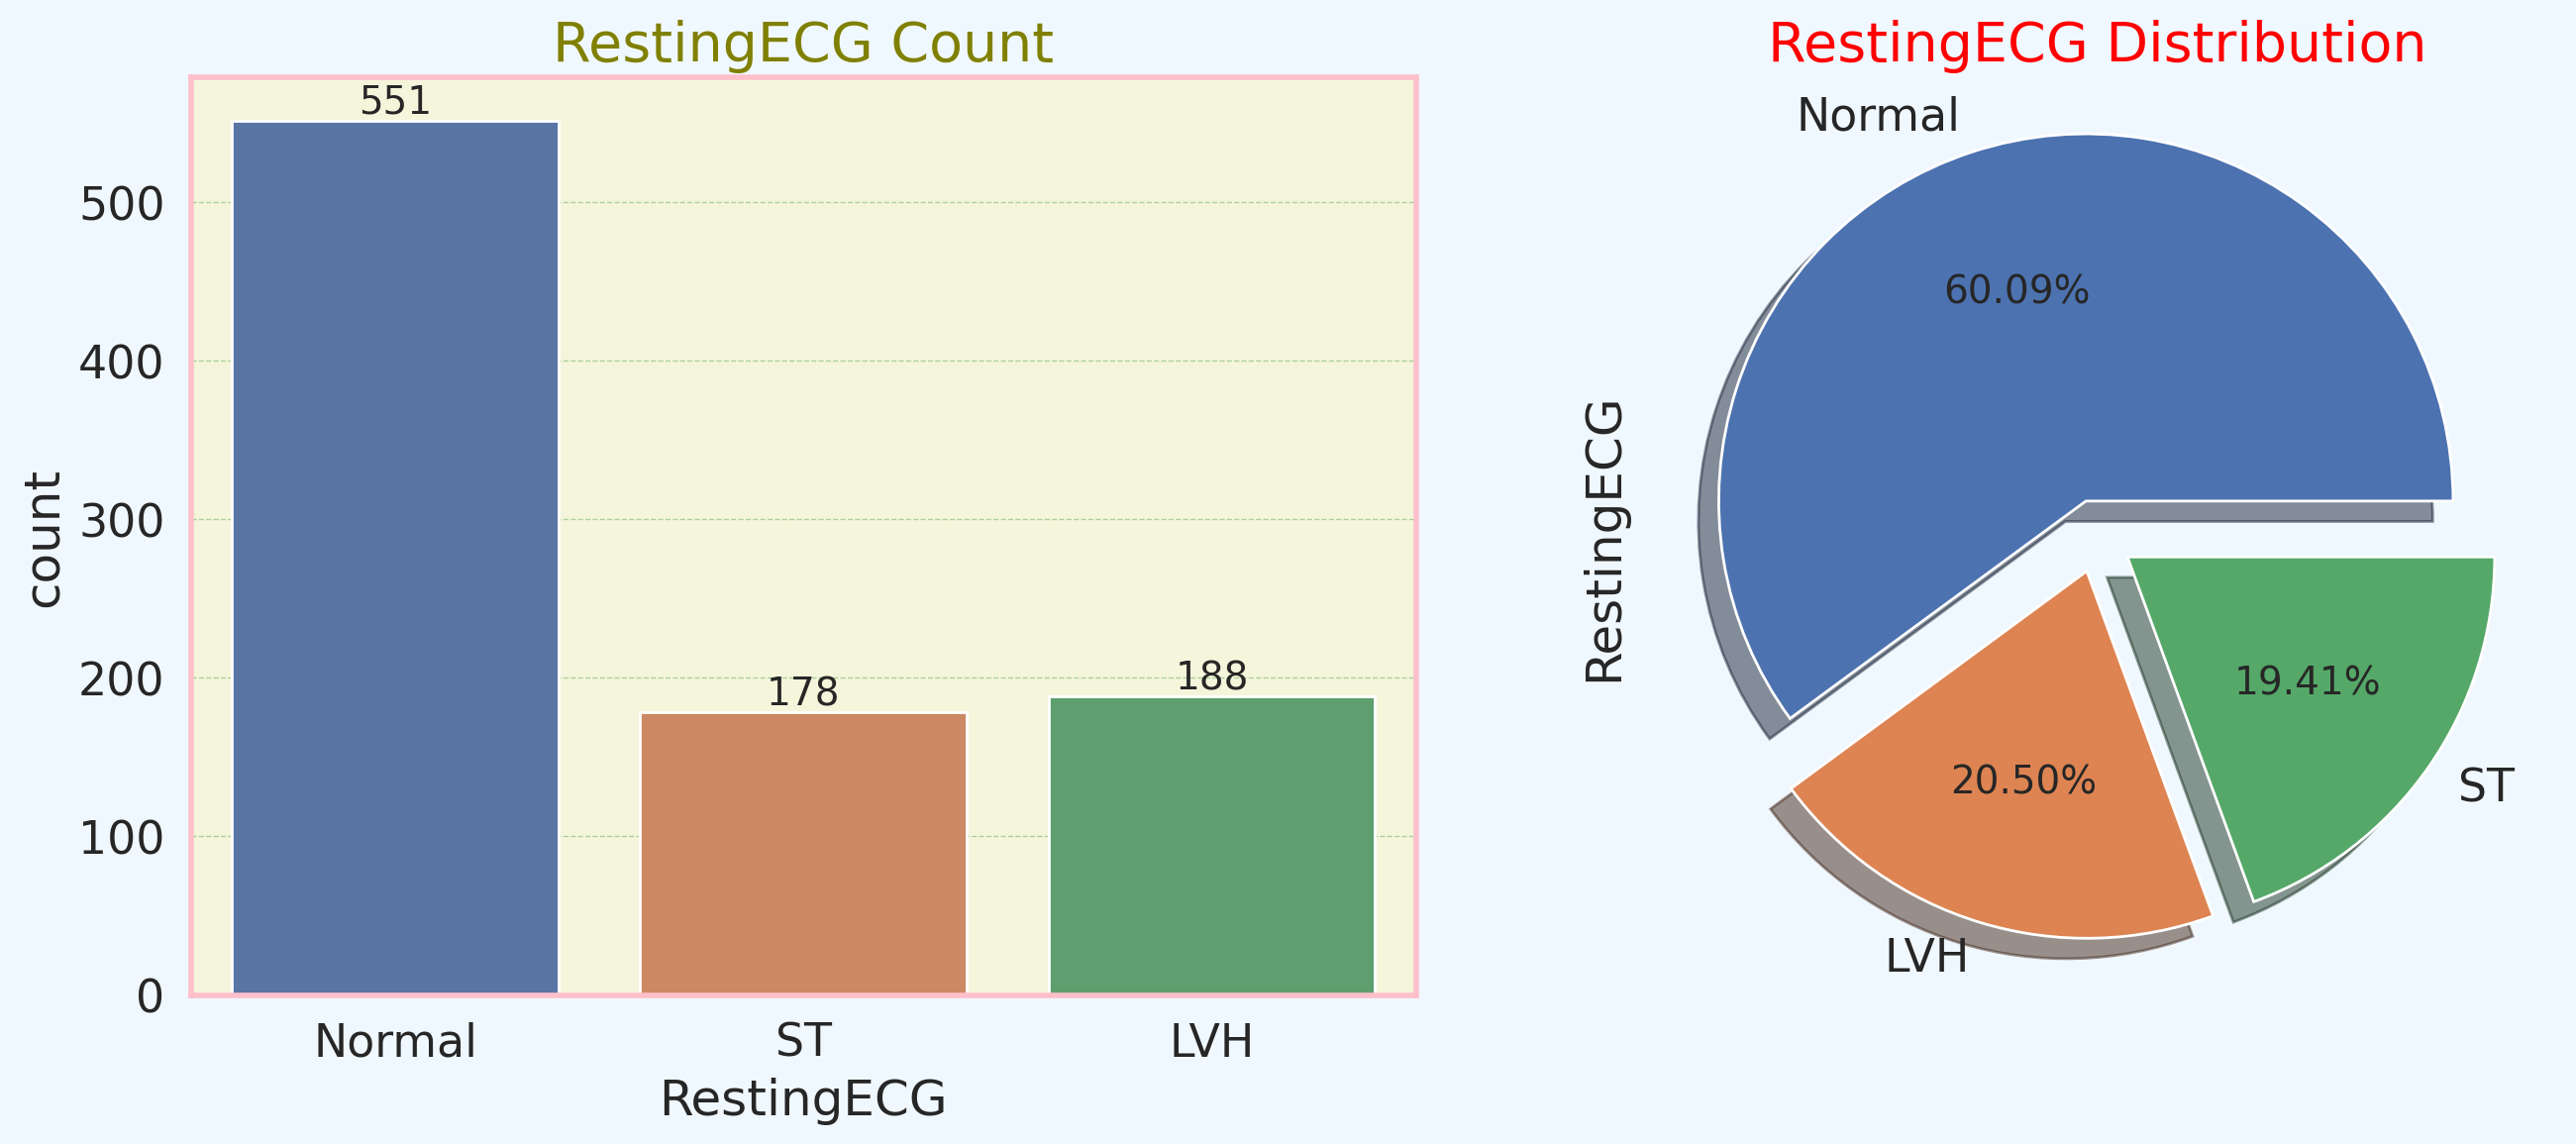

In [46]:
# Plotting count and pie chart for 'RestingECG'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='RestingECG', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("RestingECG Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['RestingECG'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="RestingECG Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'RestingECG' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each RestingECG category.
# The pie chart represents the distribution of RestingECG categories with percentage labels, explosion, and shadow


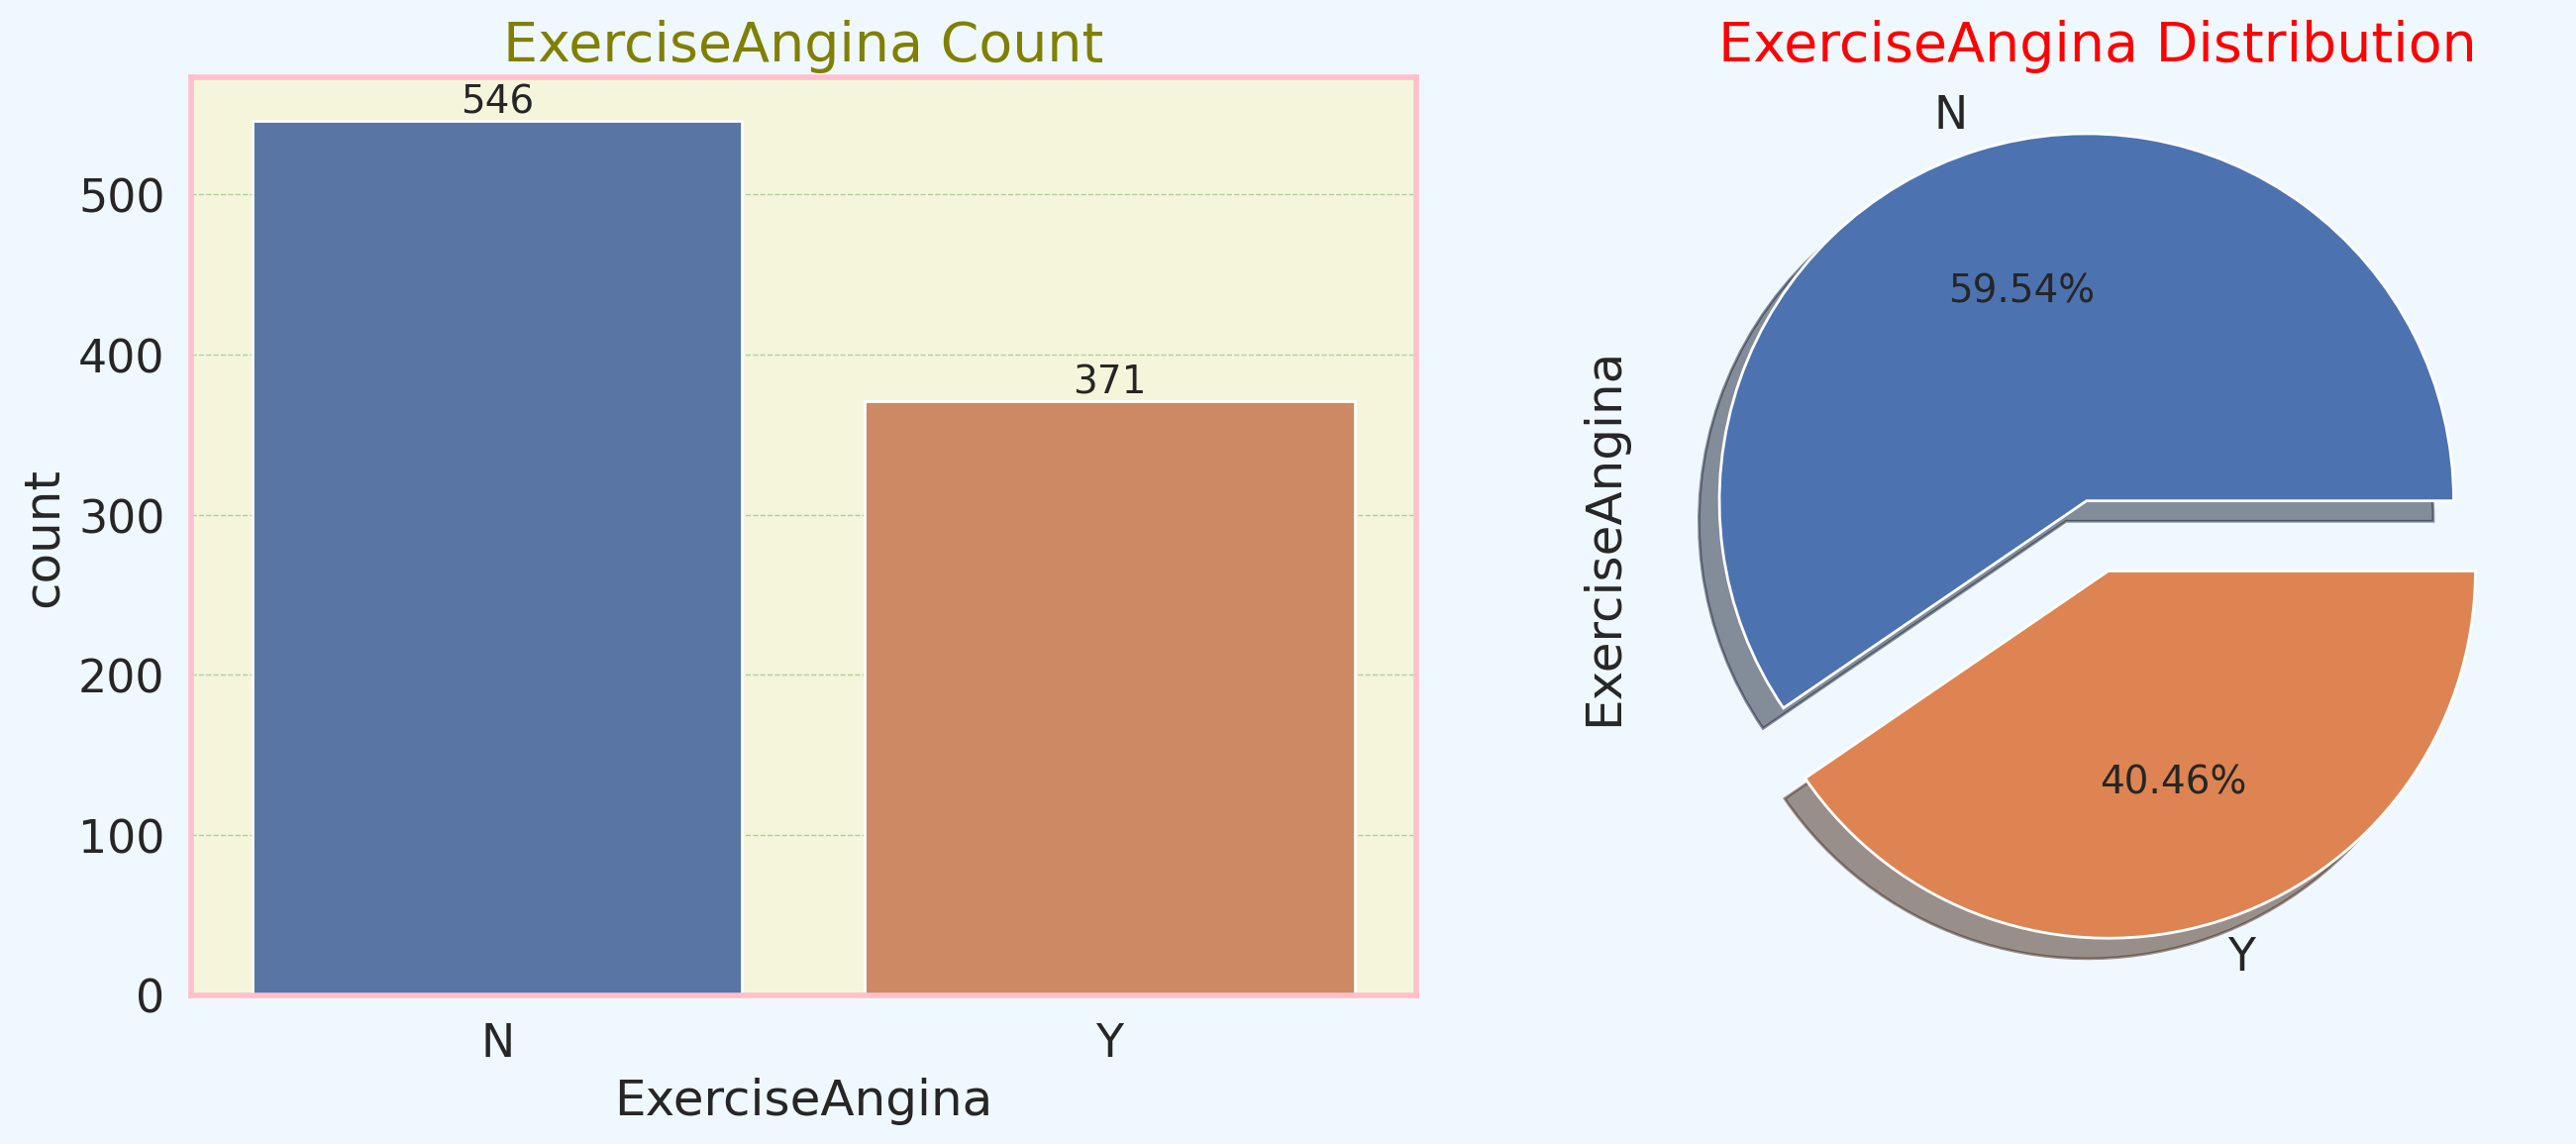

In [47]:
# Plotting count and pie chart for 'ExerciseAngina'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='ExerciseAngina', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("ExerciseAngina Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['ExerciseAngina'].value_counts().plot.pie(explode=[0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="ExerciseAngina Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'ExerciseAngina' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each ExerciseAngina category.
# The pie chart represents the distribution of ExerciseAngina categories with percentage labels, explosion, and shadow effects.


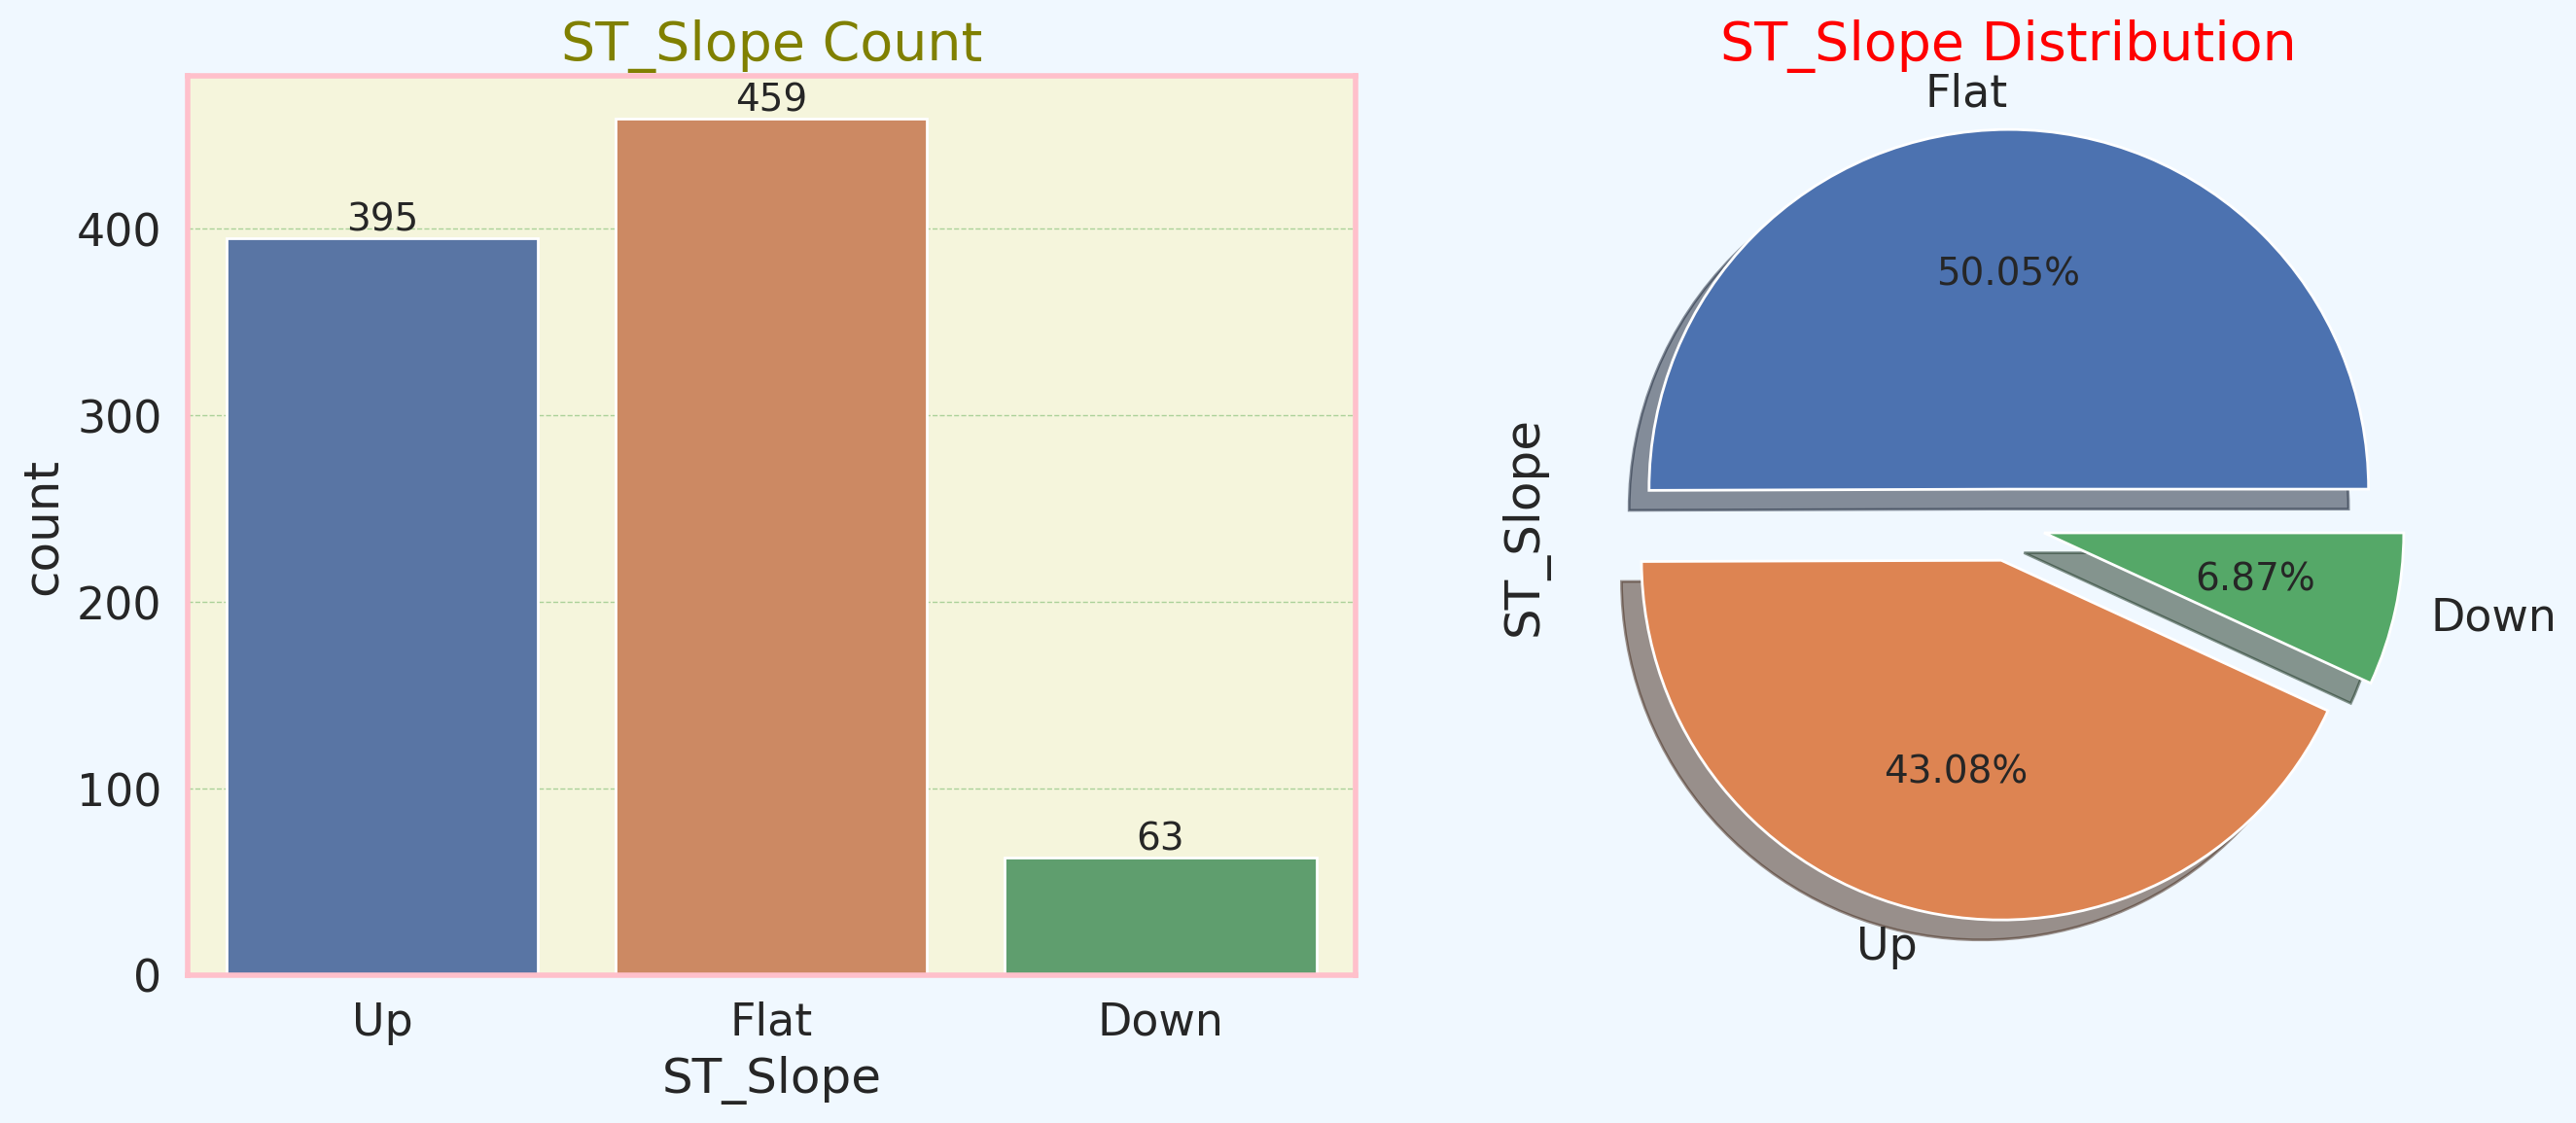

In [48]:
# Plotting count and pie chart for 'ST_Slope'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='ST_Slope', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("ST_Slope Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['ST_Slope'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="ST_Slope Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'ST_Slope' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each ST_Slope category.
# The pie chart represents the distribution of ST_Slope categories with percentage labels, explosion, and shadow effects.


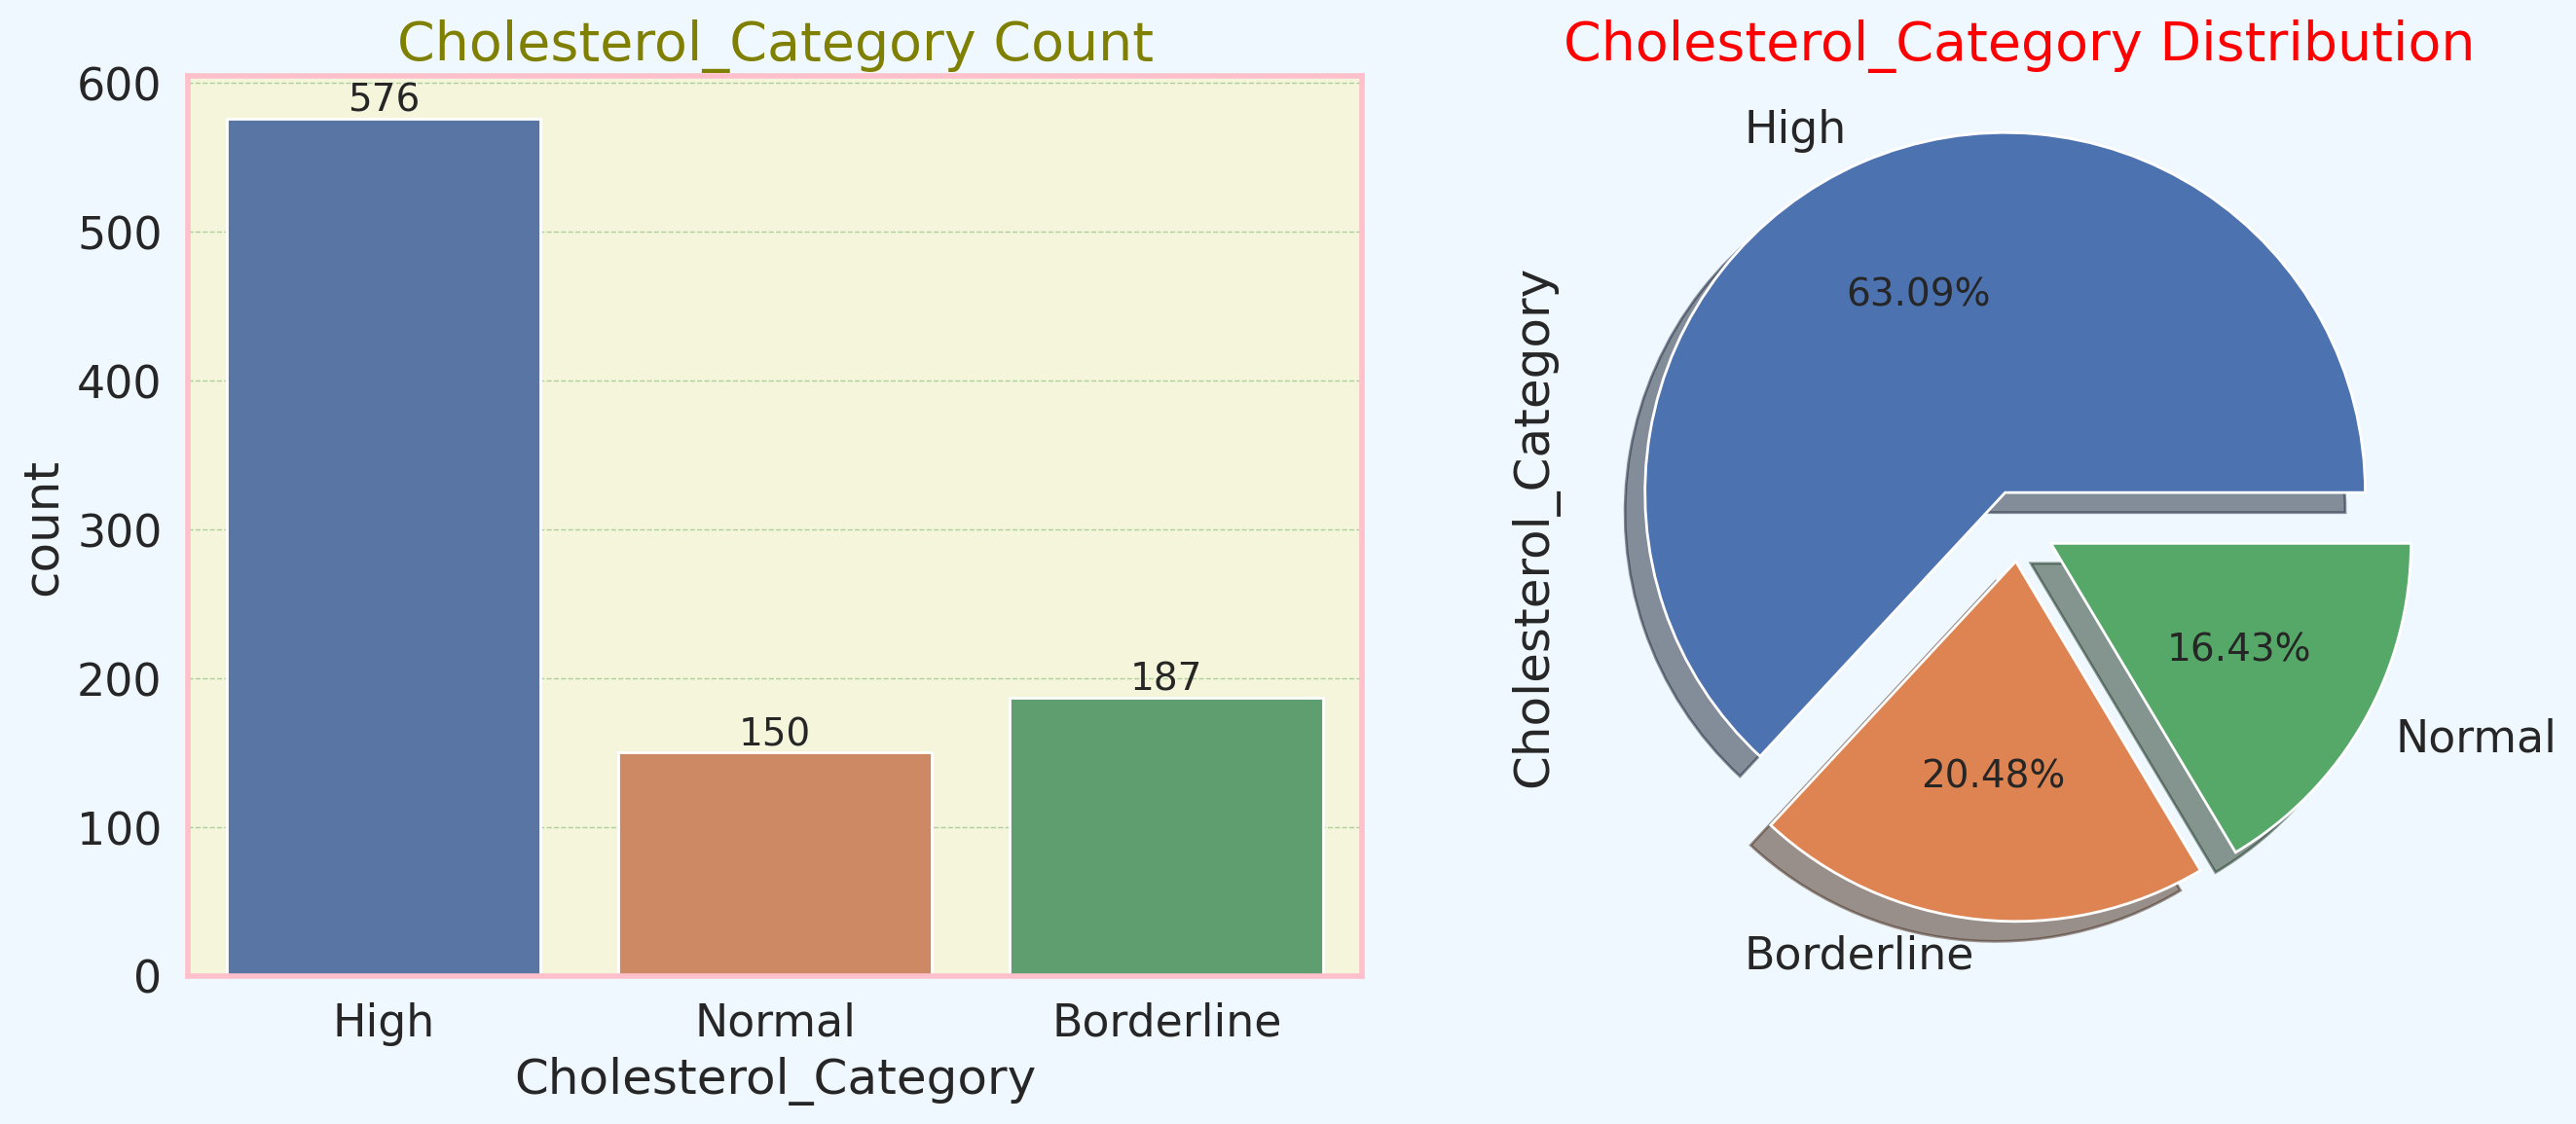

In [49]:
# Plotting count and pie chart for 'Cholesterol_Category'
plt.figure(figsize=(14, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='Cholesterol_Category', data=heart)
ax1.bar_label(ax1.containers[0])
plt.title("Cholesterol_Category Count", fontsize=20)

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['Cholesterol_Category'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="Cholesterol_Category Distribution", fontsize=20, color='Red')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'Cholesterol_Category' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each Cholesterol_Category.
# The pie chart represents the distribution of Cholesterol_Category with percentage labels, explosion, and shadow effects.


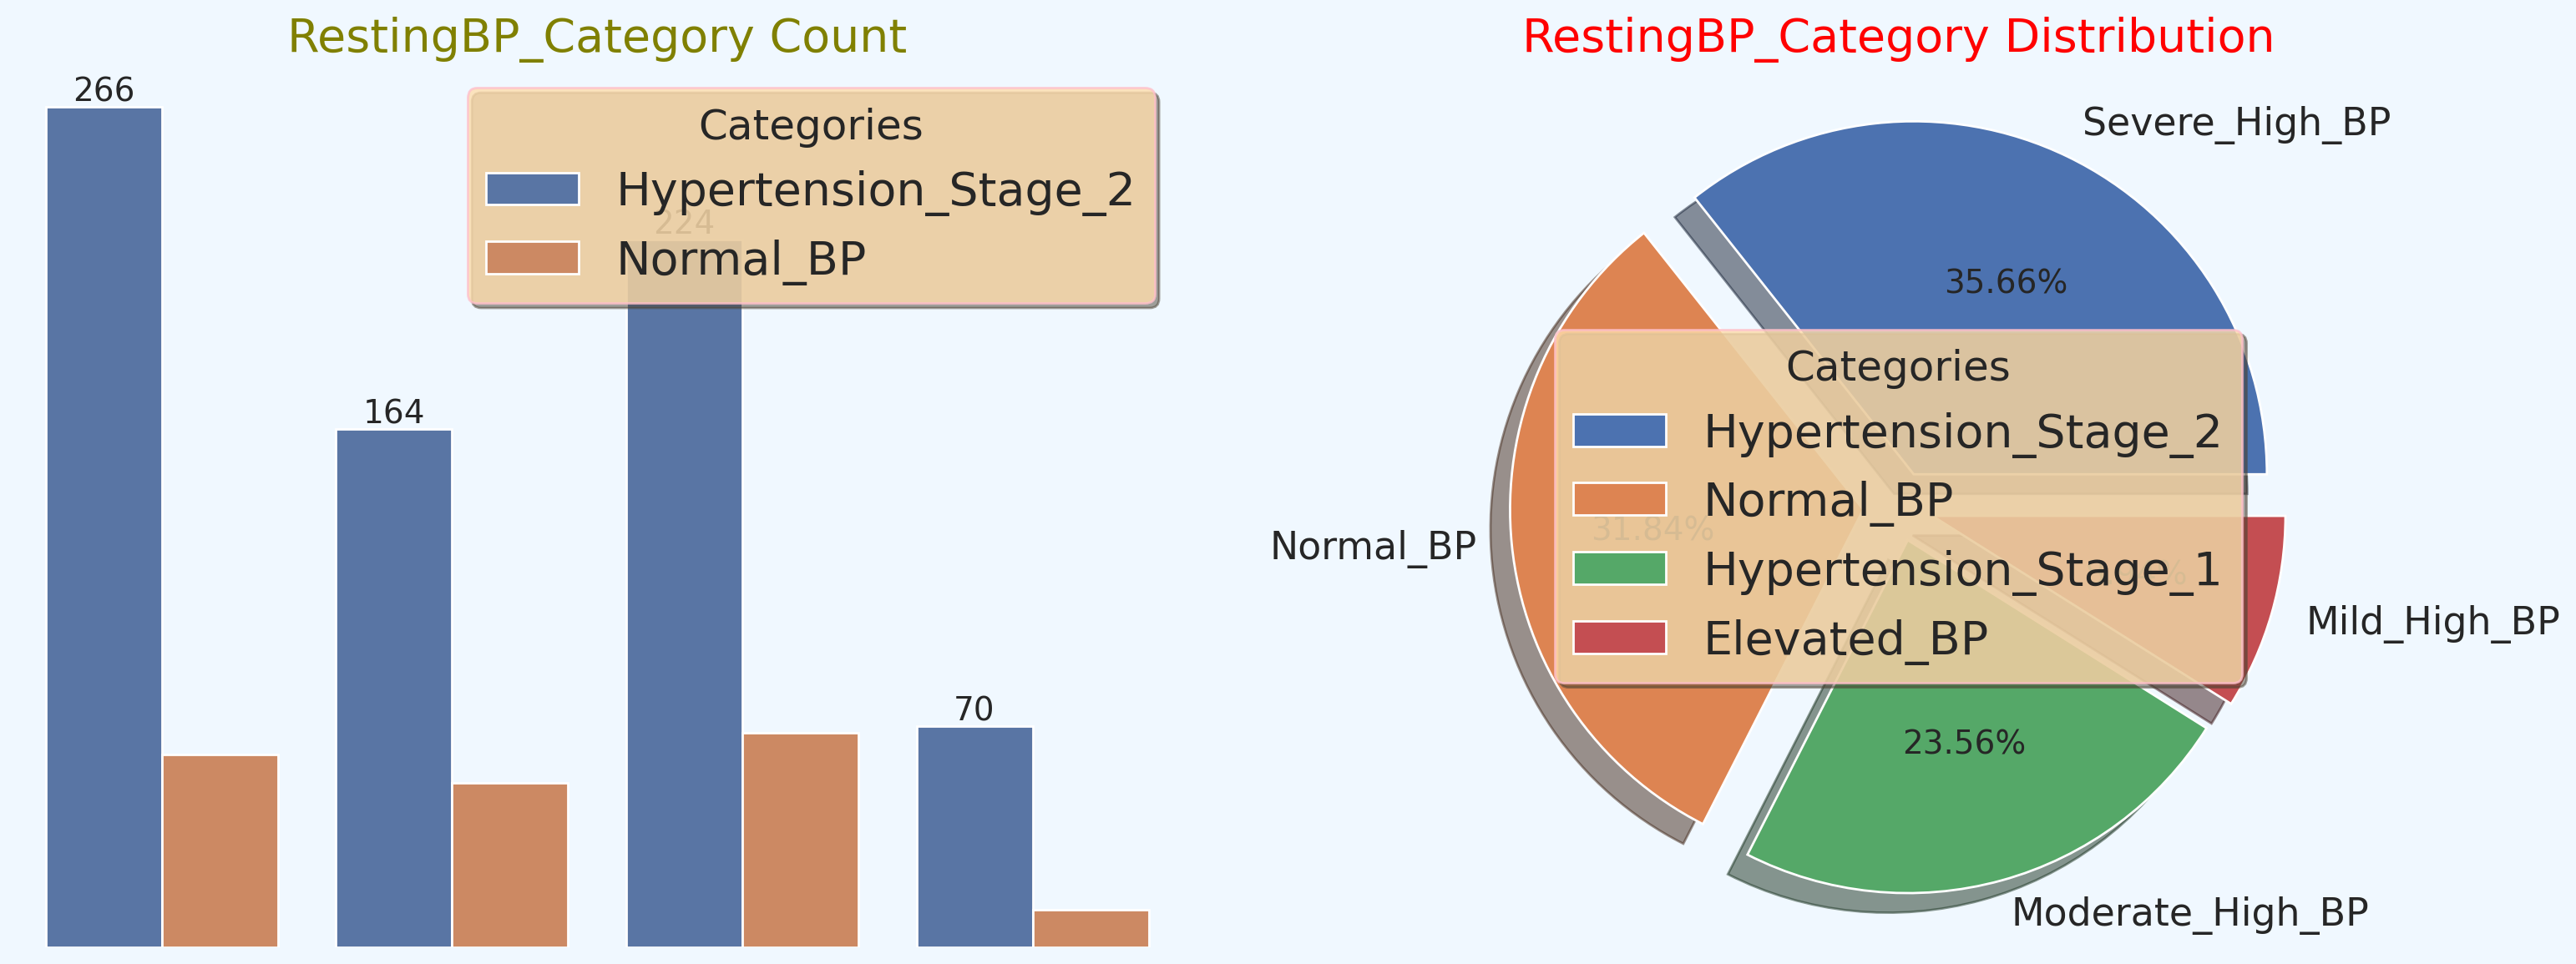

In [50]:
# Plotting count and pie chart for 'RestingBP_Category'
plt.figure(figsize=(16, 6))

# Count plot
ax1 = plt.subplot(1, 2, 1)
ax1 = sns.countplot(x='RestingBP_Category', data=heart, hue='Gender')
ax1.bar_label(ax1.containers[0])
plt.title("RestingBP_Category Count", fontsize=20)
plt.legend(title='Gender', labels=['Male', 'Female'])
plt.legend(title='Categories', labels=['Hypertension_Stage_2', 'Normal_BP', 'Hypertension_Stage_1', 'Elevated_BP'])
plt.axis('off')

# Pie chart
ax2 = plt.subplot(1, 2, 2)
ax2 = heart['RestingBP_Category'].value_counts().plot.pie(explode=[0.1, 0.1, 0.1, 0.1], autopct='%1.2f%%', shadow=True)
ax2.set_title(label="RestingBP_Category Distribution", fontsize=20, color='Red')
plt.legend(title='Categories', labels=['Hypertension_Stage_2', 'Normal_BP', 'Hypertension_Stage_1', 'Elevated_BP'])
plt.axis('off')

plt.show()

# Explanation:
# This code creates a side-by-side count plot and a pie chart for the 'RestingBP_Category' column in the 'heart' DataFrame.
# The count plot displays the number of occurrences for each RestingBP_Category, categorized by gender.
# The pie chart represents the distribution of RestingBP_Category with percentage labels, explosion, and shadow effects.
# Legends are added to provide additional information about gender and categories.
# Axis is turned off for better visualization.


In [51]:
# Calculating correlation within groups
corr = heart.groupby(["ChestPainType"])[["Age","RestingBP"]].corr()
corr.head()

# Explanation:
# This code calculates the correlation between 'Age' and 'RestingBP' within each group of 'ChestPainType' in the 'heart' DataFrame.
# The correlation matrix is grouped by 'ChestPainType', and the correlation values for 'Age' and 'RestingBP' are extracted.
# The resulting DataFrame contains the correlations for each group.


Age  RestingBP
ChestPainType                           
ASY           Age        1.00       0.25
              RestingBP  0.25       1.00
ATA           Age        1.00       0.27
              RestingBP  0.27       1.00
NAP           Age        1.00       0.23

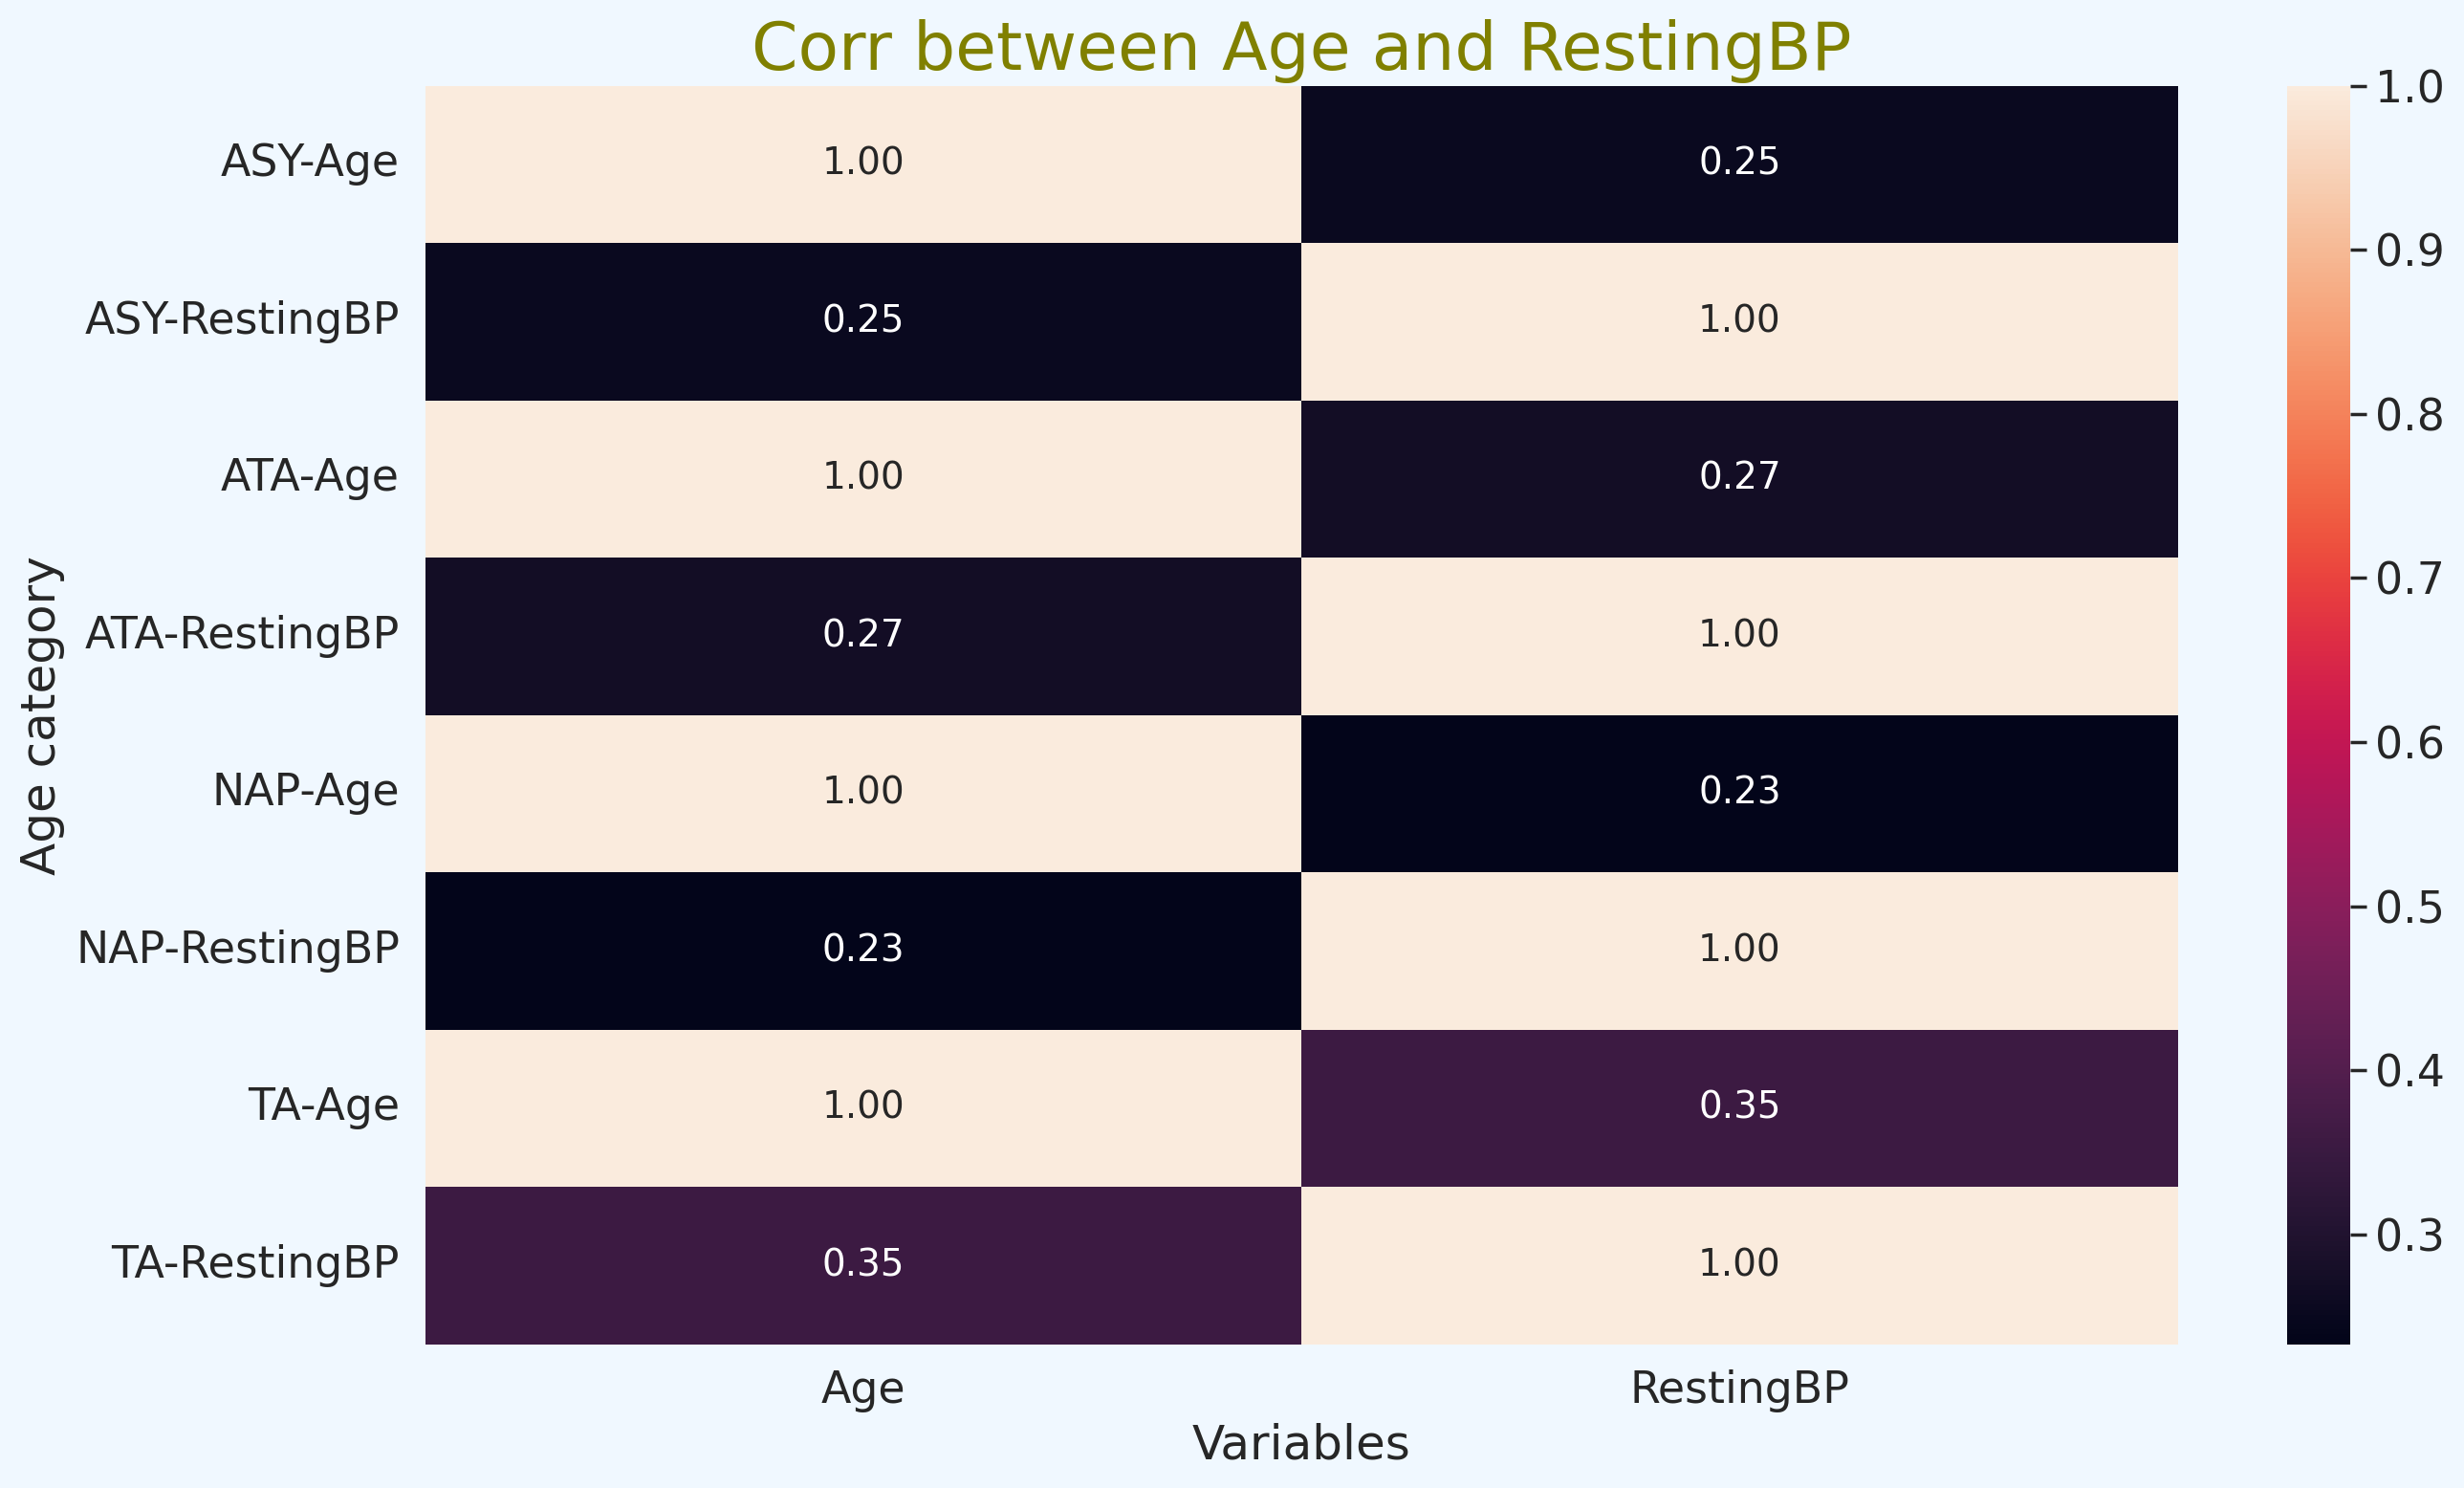

In [52]:
# Creating a heatmap to visualize the correlation matrix
sns.heatmap(corr , annot=True , fmt =".2f")
plt.xlabel("Variables")
plt.ylabel("Age category")
plt.title("Corr between Age and RestingBP")
plt.show()

# Explanation:
# This code generates a heatmap to visually represent the correlation matrix calculated between 'Age' and 'RestingBP' within different categories of 'ChestPainType'.
# The 'annot=True' parameter adds the correlation values to the heatmap, and 'fmt=".2f"' specifies the number format to display.
# The plot is labeled and titled for better interpretation.


In [53]:
# Displaying all correlations with ascending sort, removing duplicates
heart.corr().unstack().sort_values(ascending=False).drop_duplicates()

# Explanation:
# This code computes the correlation matrix for all numeric columns in the 'heart' DataFrame using the corr() method.
# The resulting correlation matrix is then flattened, sorted in ascending order, and duplicate entries are removed to display a unique set of correlations.
# This provides a comprehensive overview of the correlation relationships between different pairs of variables in the dataset.



Age                  Age                    1.00e+00
Oldpeak              HeartDisease           4.04e-01
HeartDisease         Age                    2.82e-01
FastingBS            HeartDisease           2.68e-01
RestingBP            Age                    2.63e-01
Oldpeak              Age                    2.59e-01
Age                  FastingBS              1.98e-01
Oldpeak              RestingBP              1.74e-01
HeartDisease         RestingBP              1.18e-01
Cholesterol          RestingBP              8.61e-02
HeartDisease         Cholesterol            7.63e-02
FastingBS            RestingBP              6.78e-02
Cholesterol          Oldpeak                5.46e-02
FastingBS            Oldpeak                5.31e-02
Cholesterol          Age                    4.56e-02
Diastolic_RestingBP  FastingBS              4.12e-02
FastingBS            Cholesterol            2.49e-02
MaxHR                Diastolic_RestingBP    8.03e-03
HeartDisease         Diastolic_RestingBP    9.

In [54]:
# Displaying the normalized count of each ChestPainType for females
print(heart['ChestPainType'][heart['Gender'] == 'F'].value_counts(normalize=True) * 100)

# Explanation:
# This code filters the 'heart' DataFrame to include only rows where the 'Gender' column is 'F' (female).
# It then calculates the normalized count (percentage) of each unique value in the 'ChestPainType' column for females.
# The result provides the distribution of ChestPainType among female individuals in the dataset.


ASY    36.27
ATA    31.09
NAP    27.46
TA      5.18
Name: ChestPainType, dtype: float64


In [55]:
# Displaying the normalized count of each ChestPainType for females
print('ChestPainType in Females:\n')
print(heart['ChestPainType'][heart['Gender'] == 'F'].value_counts(normalize=True) * 100)

# Displaying a separator line
print("********"*5, "\n")

# Displaying the normalized count of each ChestPainType for males
print('ChestPainType in Males:\n')
print(heart['ChestPainType'][heart['Gender'] == 'M'].value_counts(normalize=True) * 100)


ChestPainType in Females:

ASY    36.27
ATA    31.09
NAP    27.46
TA      5.18
Name: ChestPainType, dtype: float64
**************************************** 

ChestPainType in Males:

ASY    58.84
NAP    20.58
ATA    15.61
TA      4.97
Name: ChestPainType, dtype: float64


In [56]:
# Displaying the normalized count of each ST_Slope for females
print('ST_Slope in Females:\n')
print(heart['ST_Slope'][heart['Gender'] == 'F'].value_counts(normalize=True) * 100)

# Displaying a separator line
print("********"*5, "\n")

# Displaying the normalized count of each ST_Slope for males
print('ST_Slope in Males:\n')
print(heart['ST_Slope'][heart['Gender'] == 'M'].value_counts(normalize=True) * 100)


ST_Slope in Females:

Up      57.51
Flat    38.86
Down     3.63
Name: ST_Slope, dtype: float64
**************************************** 

ST_Slope in Males:

Flat    53.04
Up      39.23
Down     7.73
Name: ST_Slope, dtype: float64


In [57]:
# Displaying the normalized count of Heart Disease for females
print('Heart Disease in Females:\n')
print(heart['HeartDisease'][heart['Gender'] == 'F'].value_counts(normalize=True) * 100)

# Displaying a separator line
print("********"*5, "\n")

# Displaying the normalized count of Heart Disease for males
print('Heart Disease in Males:\n')
print(heart['HeartDisease'][heart['Gender'] == 'M'].value_counts(normalize=True) * 100)


Heart Disease in Females:

0    74.09
1    25.91
Name: HeartDisease, dtype: float64
**************************************** 

Heart Disease in Males:

1    63.12
0    36.88
Name: HeartDisease, dtype: float64


In [58]:
# Displaying the normalized count of Heart Disease for RestingECG
print('Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease'] == 1].value_counts(normalize=True) * 100)

# Displaying a separator line
print("********"*5, "\n")

# Displaying the normalized count of No Heart Disease for RestingECG
print('No Heart Disease in RestingECG:\n')
print(heart['RestingECG'][heart['HeartDisease'] == 0].value_counts(normalize=True) * 100)


Heart Disease in RestingECG:

Normal    56.02
ST        23.08
LVH       20.91
Name: RestingECG, dtype: float64
**************************************** 

No Heart Disease in RestingECG:

Normal    65.12
LVH       20.00
ST        14.88
Name: RestingECG, dtype: float64


In [59]:
# Displaying the normalized count of Heart Disease for RestingBP_Category
print('Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease'] == 1].value_counts(normalize=True) * 100)

# Displaying a separator line
print("********"*5, "\n")

# Displaying the normalized count of No Heart Disease for RestingBP_Category
print('No Heart Disease in RestingBP_Category:\n')
print(heart['RestingBP_Category'][heart['HeartDisease'] == 0].value_counts(normalize=True) * 100)


Heart Disease in RestingBP_Category:

Severe_High_BP      40.43
Normal_BP           28.01
Moderate_High_BP    21.50
Mild_High_BP        10.06
Name: RestingBP_Category, dtype: float64
**************************************** 

No Heart Disease in RestingBP_Category:

Normal_BP           36.59
Severe_High_BP      29.76
Moderate_High_BP    26.10
Mild_High_BP         7.56
Name: RestingBP_Category, dtype: float64


In [60]:
# Creating a new DataFrame 'heart_final' by dropping 'RestingBP' and 'Cholesterol' columns
heart_final = heart.drop(['RestingBP', 'Cholesterol'], axis=1)
heart_final.head()


Age Gender ChestPainType  FastingBS RestingECG  MaxHR ExerciseAngina  \
0   40      M           ATA          0     Normal    172              N   
1   49      F           NAP          0     Normal    156              N   
2   37      M           ATA          0         ST     98              N   
3   48      F           ASY          0     Normal    108              Y   
4   54      M           NAP          0     Normal    122              N   

   Oldpeak ST_Slope  HeartDisease  Diastolic_RestingBP RestingBP_Category  \
0      0.0       Up             0                    0     Severe_High_BP   
1      1.0     Flat             1                    0     Severe_High_BP   
2      0.0       Up             0                    0   Moderate_High_BP   
3      1.5     Flat             1                    0   Moderate_High_BP   
4      0.0       Up             0                    0     Severe_High_BP   

  Cholesterol_Category  
0                 High  
1               Normal  
2                 High  
3           Borderline  
4               Normal

In [61]:
# Installing the category_encoders library
!pip install category_encoders

# Importing necessary library
import category_encoders as ce

# Creating an ordinal encoder and transforming selected categorical columns
encoder = ce.OrdinalEncoder(cols=['ChestPainType', 'RestingECG', 'ST_Slope', 'Cholesterol_Category', 'RestingBP_Category'])
heart_final = encoder.fit_transform(heart_final)
heart_final.head()



Age Gender  ChestPainType  FastingBS  RestingECG  MaxHR ExerciseAngina  \
0   40      M              1          0           1    172              N   
1   49      F              2          0           1    156              N   
2   37      M              1          0           2     98              N   
3   48      F              3          0           1    108              Y   
4   54      M              2          0           1    122              N   

   Oldpeak  ST_Slope  HeartDisease  Diastolic_RestingBP  RestingBP_Category  \
0      0.0         1             0                    0                   1   
1      1.0         2             1                    0                   1   
2      0.0         1             0                    0                   2   
3      1.5         2             1                    0                   2   
4      0.0         1             0                    0                   1   

   Cholesterol_Category  
0                     1  
1                     2  
2                     1  
3                     3  
4                     2

In [62]:
# Creating a one-hot encoder
encoder = ce.OneHotEncoder(cols=['Gender', 'ExerciseAngina'], drop_invariant=True)

# Transforming selected categorical columns in the 'heart_final' DataFrame
heart_final1 = encoder.fit_transform(heart_final)

# Displaying the first few rows of the transformed DataFrame
heart_final1.head()



Age  Gender_1  Gender_2  ChestPainType  FastingBS  RestingECG  MaxHR  \
0   40         1         0              1          0           1    172   
1   49         0         1              2          0           1    156   
2   37         1         0              1          0           2     98   
3   48         0         1              3          0           1    108   
4   54         1         0              2          0           1    122   

   ExerciseAngina_1  ExerciseAngina_2  Oldpeak  ST_Slope  HeartDisease  \
0                 1                 0      0.0         1             0   
1                 1                 0      1.0         2             1   
2                 1                 0      0.0         1             0   
3                 0                 1      1.5         2             1   
4                 1                 0      0.0         1             0   

   Diastolic_RestingBP  RestingBP_Category  Cholesterol_Category  
0                    0                   1                     1  
1                    0                   1                     2  
2                    0                   2                     1  
3                    0                   2                     3  
4                    0                   1                     2

In [63]:
# Creating feature matrix X by dropping the 'HeartDisease' column
X = heart_final1.drop('HeartDisease', axis=1)

# Explanation:
# The code creates a feature matrix 'X' by removing the 'HeartDisease' column from the 'heart_final1' DataFrame.
# This matrix will serve as the input for training a machine learning model, where 'HeartDisease' is the target variable.


In [64]:
# Creating the target variable 'y' using the 'HeartDisease' column
y = heart_final1['HeartDisease']

# Explanation:
# The code creates the target variable 'y' by extracting the 'HeartDisease' column from the 'heart_final1' DataFrame.
# This variable represents the binary outcome (presence or absence of heart disease) that the machine learning model aims to predict.


In [65]:
# Splitting the dataset into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=21)

# Explanation:
# The code uses the train_test_split function from scikit-learn to split the feature matrix 'X' and target variable 'y' into training and testing sets.
# The test_size parameter specifies the proportion of the dataset to include in the test split (20% in this case).
# The random_state parameter ensures reproducibility by fixing the random seed for the split.


In [66]:
# Scaling the dataset with MinMaxScaler
from sklearn.preprocessing import MinMaxScaler

# Creating a MinMaxScaler object
scaler = MinMaxScaler()

# Fitting and transforming the training set
X_train = scaler.fit_transform(X_train)

# Transforming the test set
X_test = scaler.transform(X_test)

# Converting the scaled arrays back to DataFrames with column names
X_train = pd.DataFrame(X_train, columns=X.columns)
X_test = pd.DataFrame(X_test, columns=X.columns)

# Displaying the first few rows of the scaled training set
display(X_train.head())

# Explanation
# The code uses the MinMaxScaler from scikit-learn to scale the features in the training and test sets.
# The MinMaxScaler scales the data to a specific range (usually [0, 1]).
# After fitting the scaler on the training set, it transforms both the training and test sets.
# The resulting scaled arrays are then converted back to DataFrames with the original column names for better interpretability.
# The scaled training set is displayed to show the effect of scaling on the data.

Age  Gender_1  Gender_2  ChestPainType  FastingBS  RestingECG  MaxHR  \
0  0.53       1.0       0.0           0.33        0.0         0.0   0.44   
1  0.53       0.0       1.0           0.00        0.0         0.5   0.56   
2  0.55       1.0       0.0           0.67        0.0         0.0   0.51   
3  0.31       0.0       1.0           0.33        0.0         0.0   0.81   
4  0.45       1.0       0.0           0.67        0.0         0.5   0.56   

   ExerciseAngina_1  ExerciseAngina_2  Oldpeak  ST_Slope  Diastolic_RestingBP  \
0               1.0               0.0     0.30       0.0                  0.0   
1               1.0               0.0     0.30       0.0                  0.0   
2               0.0               1.0     0.43       0.5                  0.0   
3               1.0               0.0     0.30       0.0                  0.0   
4               0.0               1.0     0.86       0.5                  0.0   

   RestingBP_Category  Cholesterol_Category  
0                0.00                  0.33  
1                0.00                  0.00  
2                0.33                  0.00  
3                0.00                  0.00  
4                0.00                  0.00

**(1) LOGISTIC REGRESSION**

***Logistic Regression is a classification algorithm that models the probability of a binary outcome using the logistic function. It's commonly used for binary classification problems.***

In [67]:
# Importing necessary libraries
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score
from sklearn.linear_model import LogisticRegression

# Setting plot size and font size
plt.rcParams['figure.figsize'] = (8, 6)
plt.rcParams['font.size'] = 20

# Creating a Logistic Regression model
logreg = LogisticRegression()

# Fitting the model on the training data
logreg.fit(X_train, y_train)

# Predicting the target variable on the test data
y_pred_log = logreg.predict(X_test)

# Calculating training accuracy, model accuracy, and F1 score
log_train = round(logreg.score(X_train, y_train) * 100, 2)
log_accuracy = round(accuracy_score(y_pred_log, y_test) * 100, 2)
log_f1 = round(f1_score(y_pred_log, y_test) * 100, 2)

# Displaying the results
print("Training Accuracy:", log_train, "%")
print("Model Accuracy Score:", log_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report:\n", classification_report(y_test, y_pred_log))


Training Accuracy: 85.13 %
Model Accuracy Score: 83.7 %
--------------------------------------------------------
Classification_Report:
               precision    recall  f1-score   support

           0       0.80      0.80      0.80        76
           1       0.86      0.86      0.86       108

    accuracy                           0.84       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.84      0.84       184



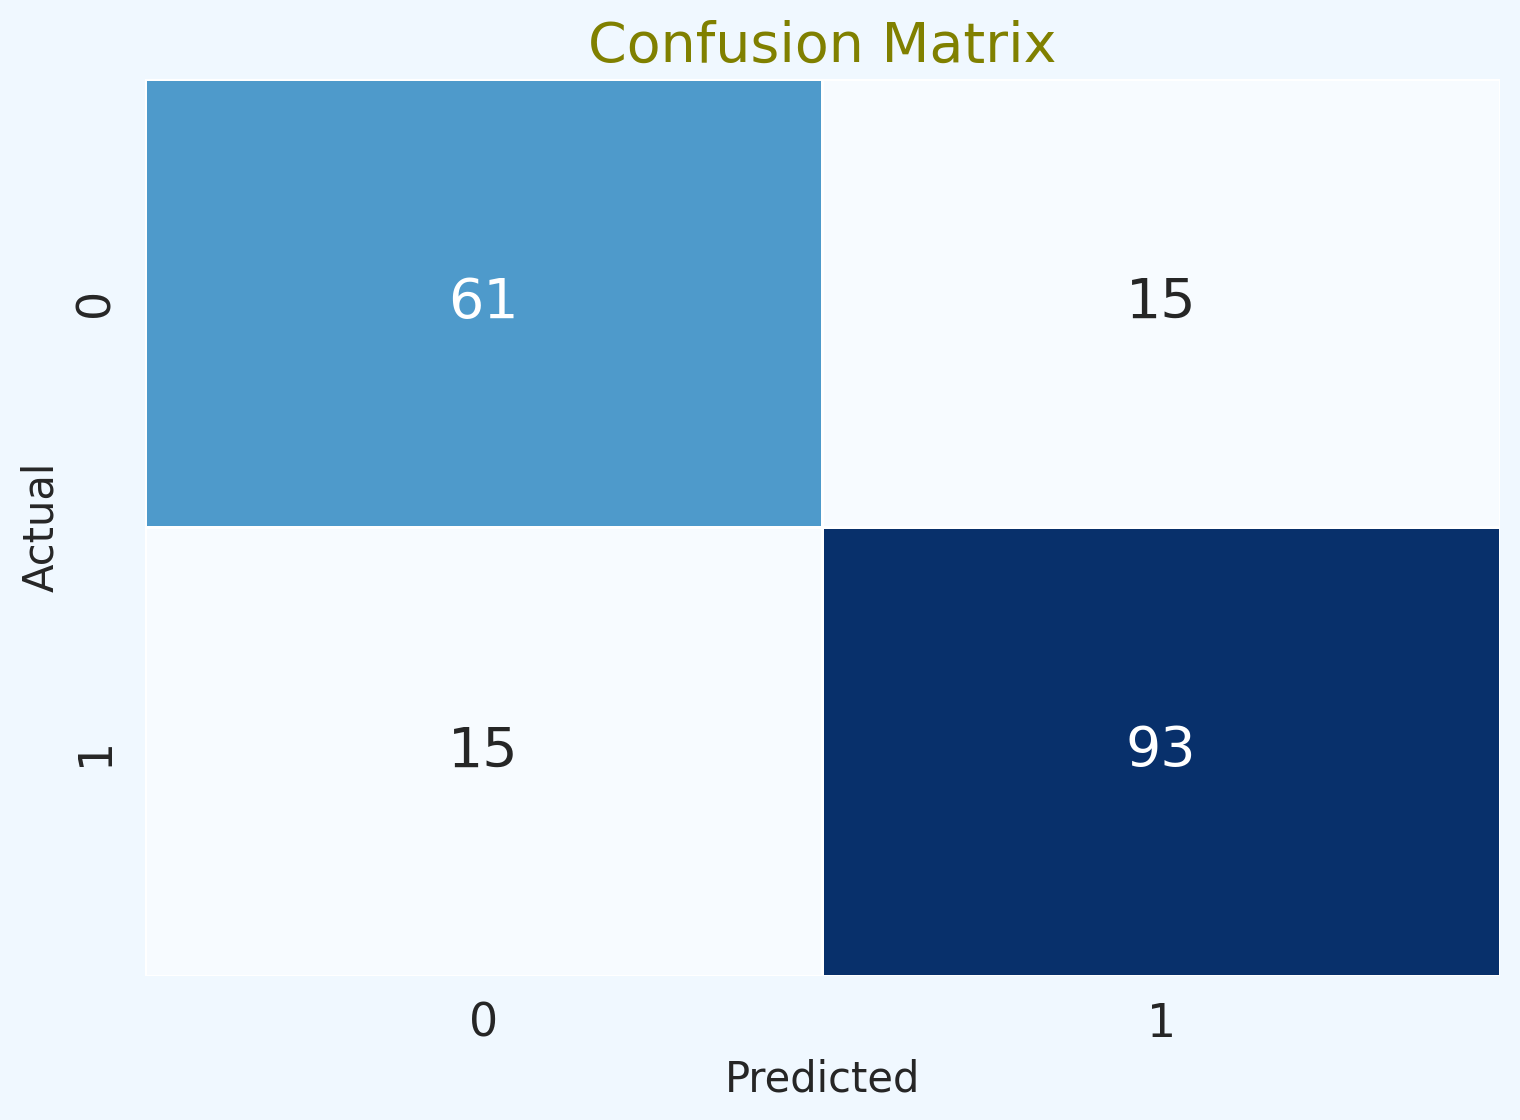

In [68]:
# Importing necessary libraries
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = logreg.predict(X_test)

# Plotting the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, linewidths=0.5)
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()


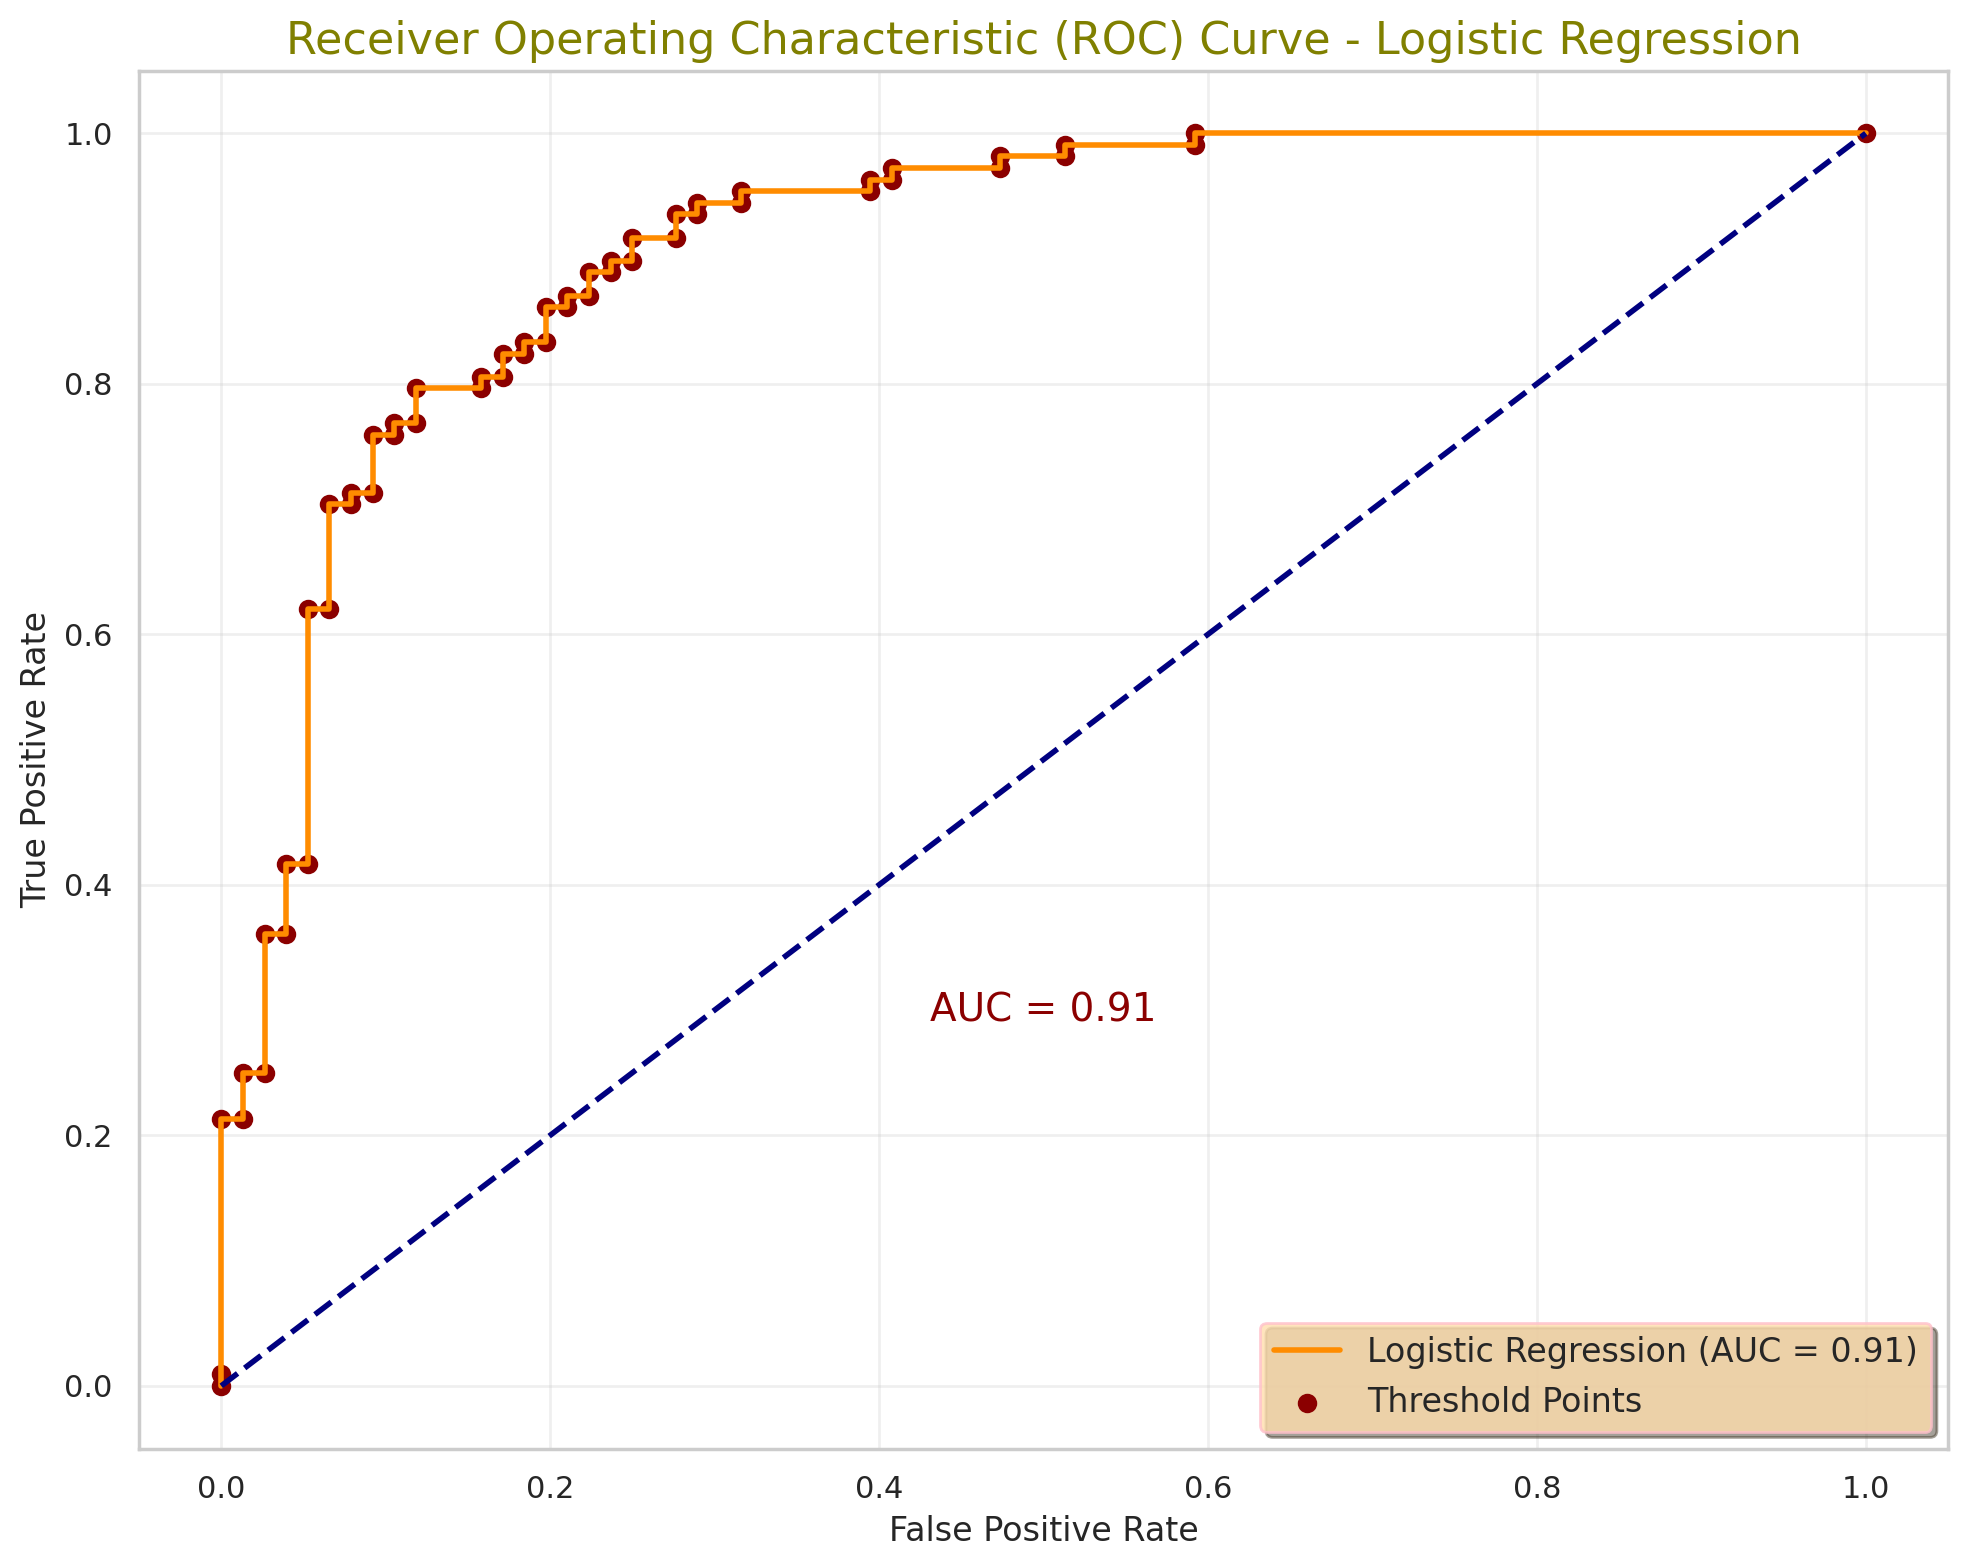

In [69]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr, tpr, _ = roc_curve(y_test, y_probs)
roc_auc = auc(fpr, tpr)

# Set a seaborn style
sns.set(style="whitegrid")

# Plotting the ROC curve with colorful aesthetics
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Logistic Regression (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Logistic Regression', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()



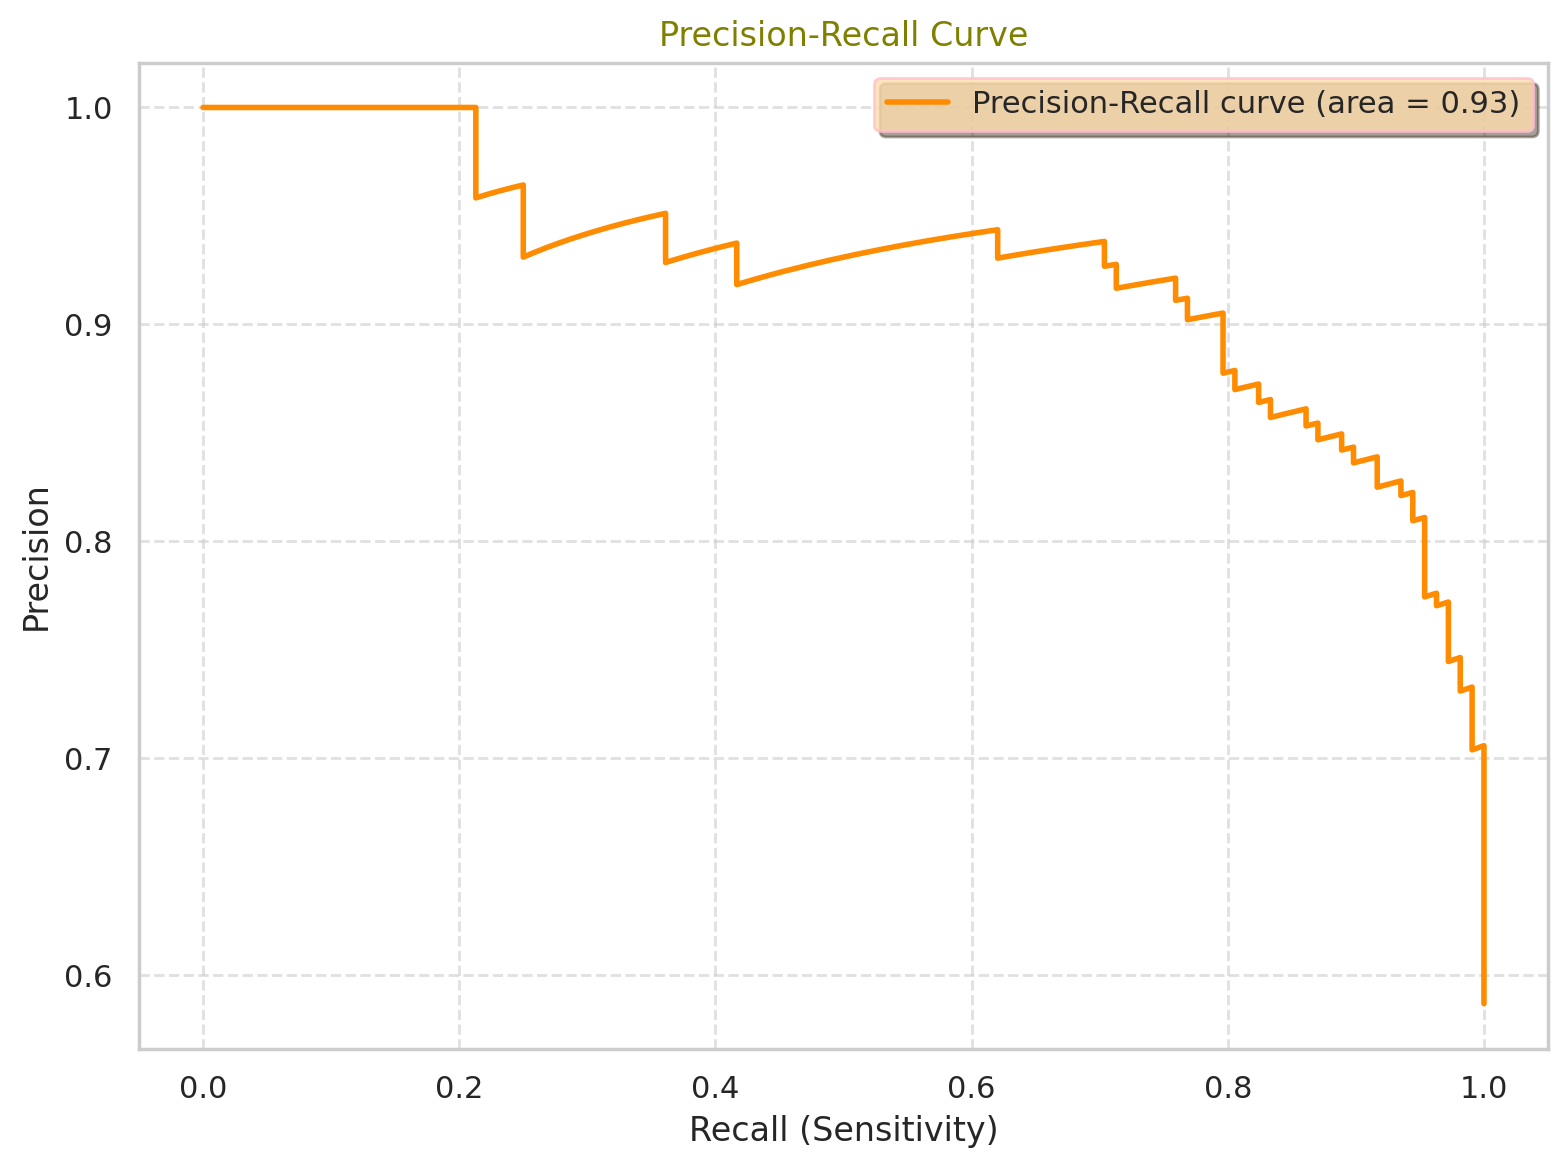

In [70]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs = logreg.predict_proba(X_test)[:, 1]

# Compute precision-recall curve and area under the curve
precision, recall, _ = precision_recall_curve(y_test, y_probs)
pr_auc = auc(recall, precision)

# Plot the precision-recall curve
plt.figure(figsize=(8, 6))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = {:.2f})'.format(pr_auc))
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.grid(True, linestyle='--', alpha=0.6)
plt.show()


In [71]:
from sklearn.model_selection import cross_val_score

# Perform cross-validation with 10 folds
val_score = cross_val_score(estimator=logreg, X=X_train, y=y_train, cv=10)

# Display mean accuracy and standard deviation of the cross-validation scores
print("Model Accuracy Score: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))

# Explanation
# The mean accuracy and standard deviation of the cross-validation scores are printed to evaluate the model's performance across different folds.


Model Accuracy Score: 84.85 %
Std. Dev: 2.36 %


**(2) SUPPORT VECTOR MACHINES**

***Support Vector Machines is a supervised learning algorithm used for classification and regression tasks. It finds the hyperplane that best separates data points into different classes.***

In [72]:
# Support Vector Machines
from sklearn.svm import SVC

# Create and train the Support Vector Machines (SVM) model
svc = SVC()
svc.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svc = svc.predict(X_test)

# Evaluate the performance of the SVM model
svc_train = round(svc.score(X_train, y_train) * 100, 2)
svc_accuracy = round(accuracy_score(y_pred_svc, y_test) * 100, 2)
svc_f1 = round(f1_score(y_pred_svc, y_test) * 100, 2)

# Display training accuracy, model accuracy score, and classification report
print("Training Accuracy :", svc_train, "%")
print("Model Accuracy Score :", svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_svc))


Training Accuracy : 87.31 %
Model Accuracy Score : 88.59 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.90      0.82      0.86        76
           1       0.88      0.94      0.91       108

    accuracy                           0.89       184
   macro avg       0.89      0.88      0.88       184
weighted avg       0.89      0.89      0.88       184



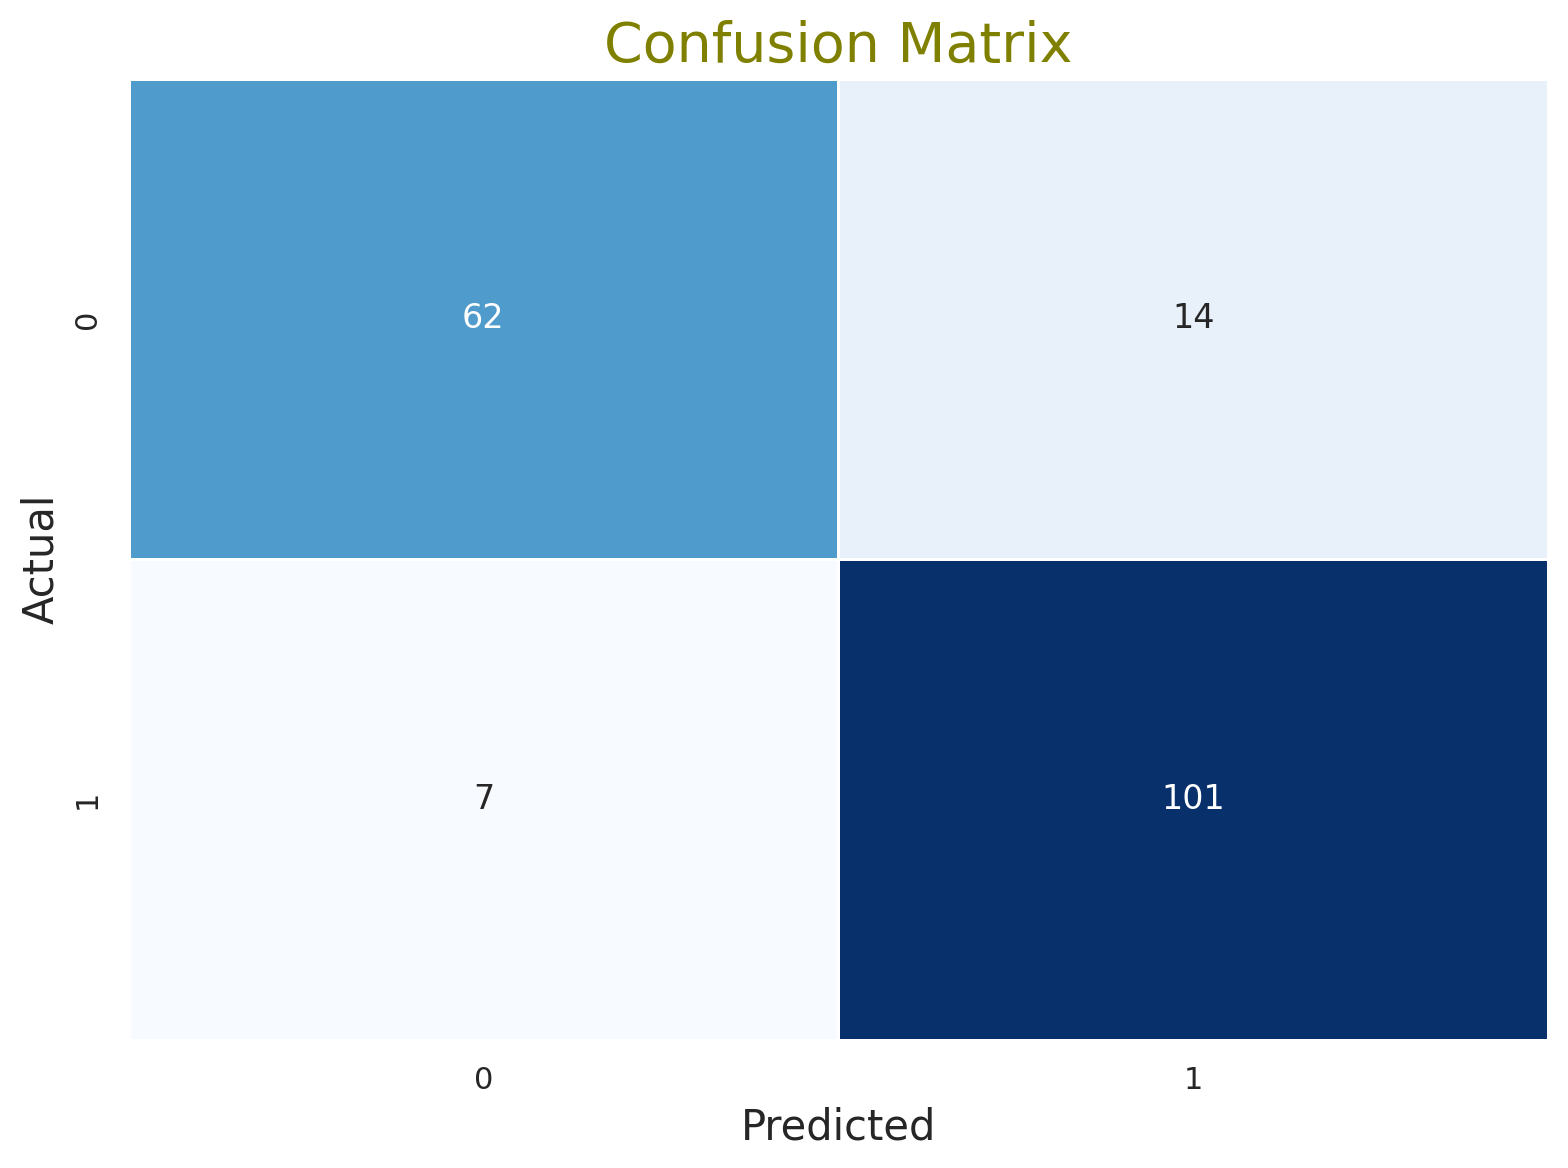

In [73]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Get predictions
y_pred = svc.predict(X_test)

# Plot the confusion matrix using seaborn
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap with annotations and a color map
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', linewidths=.5, cbar=False)

# Add labels and title
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)

# Display the plot
plt.show()


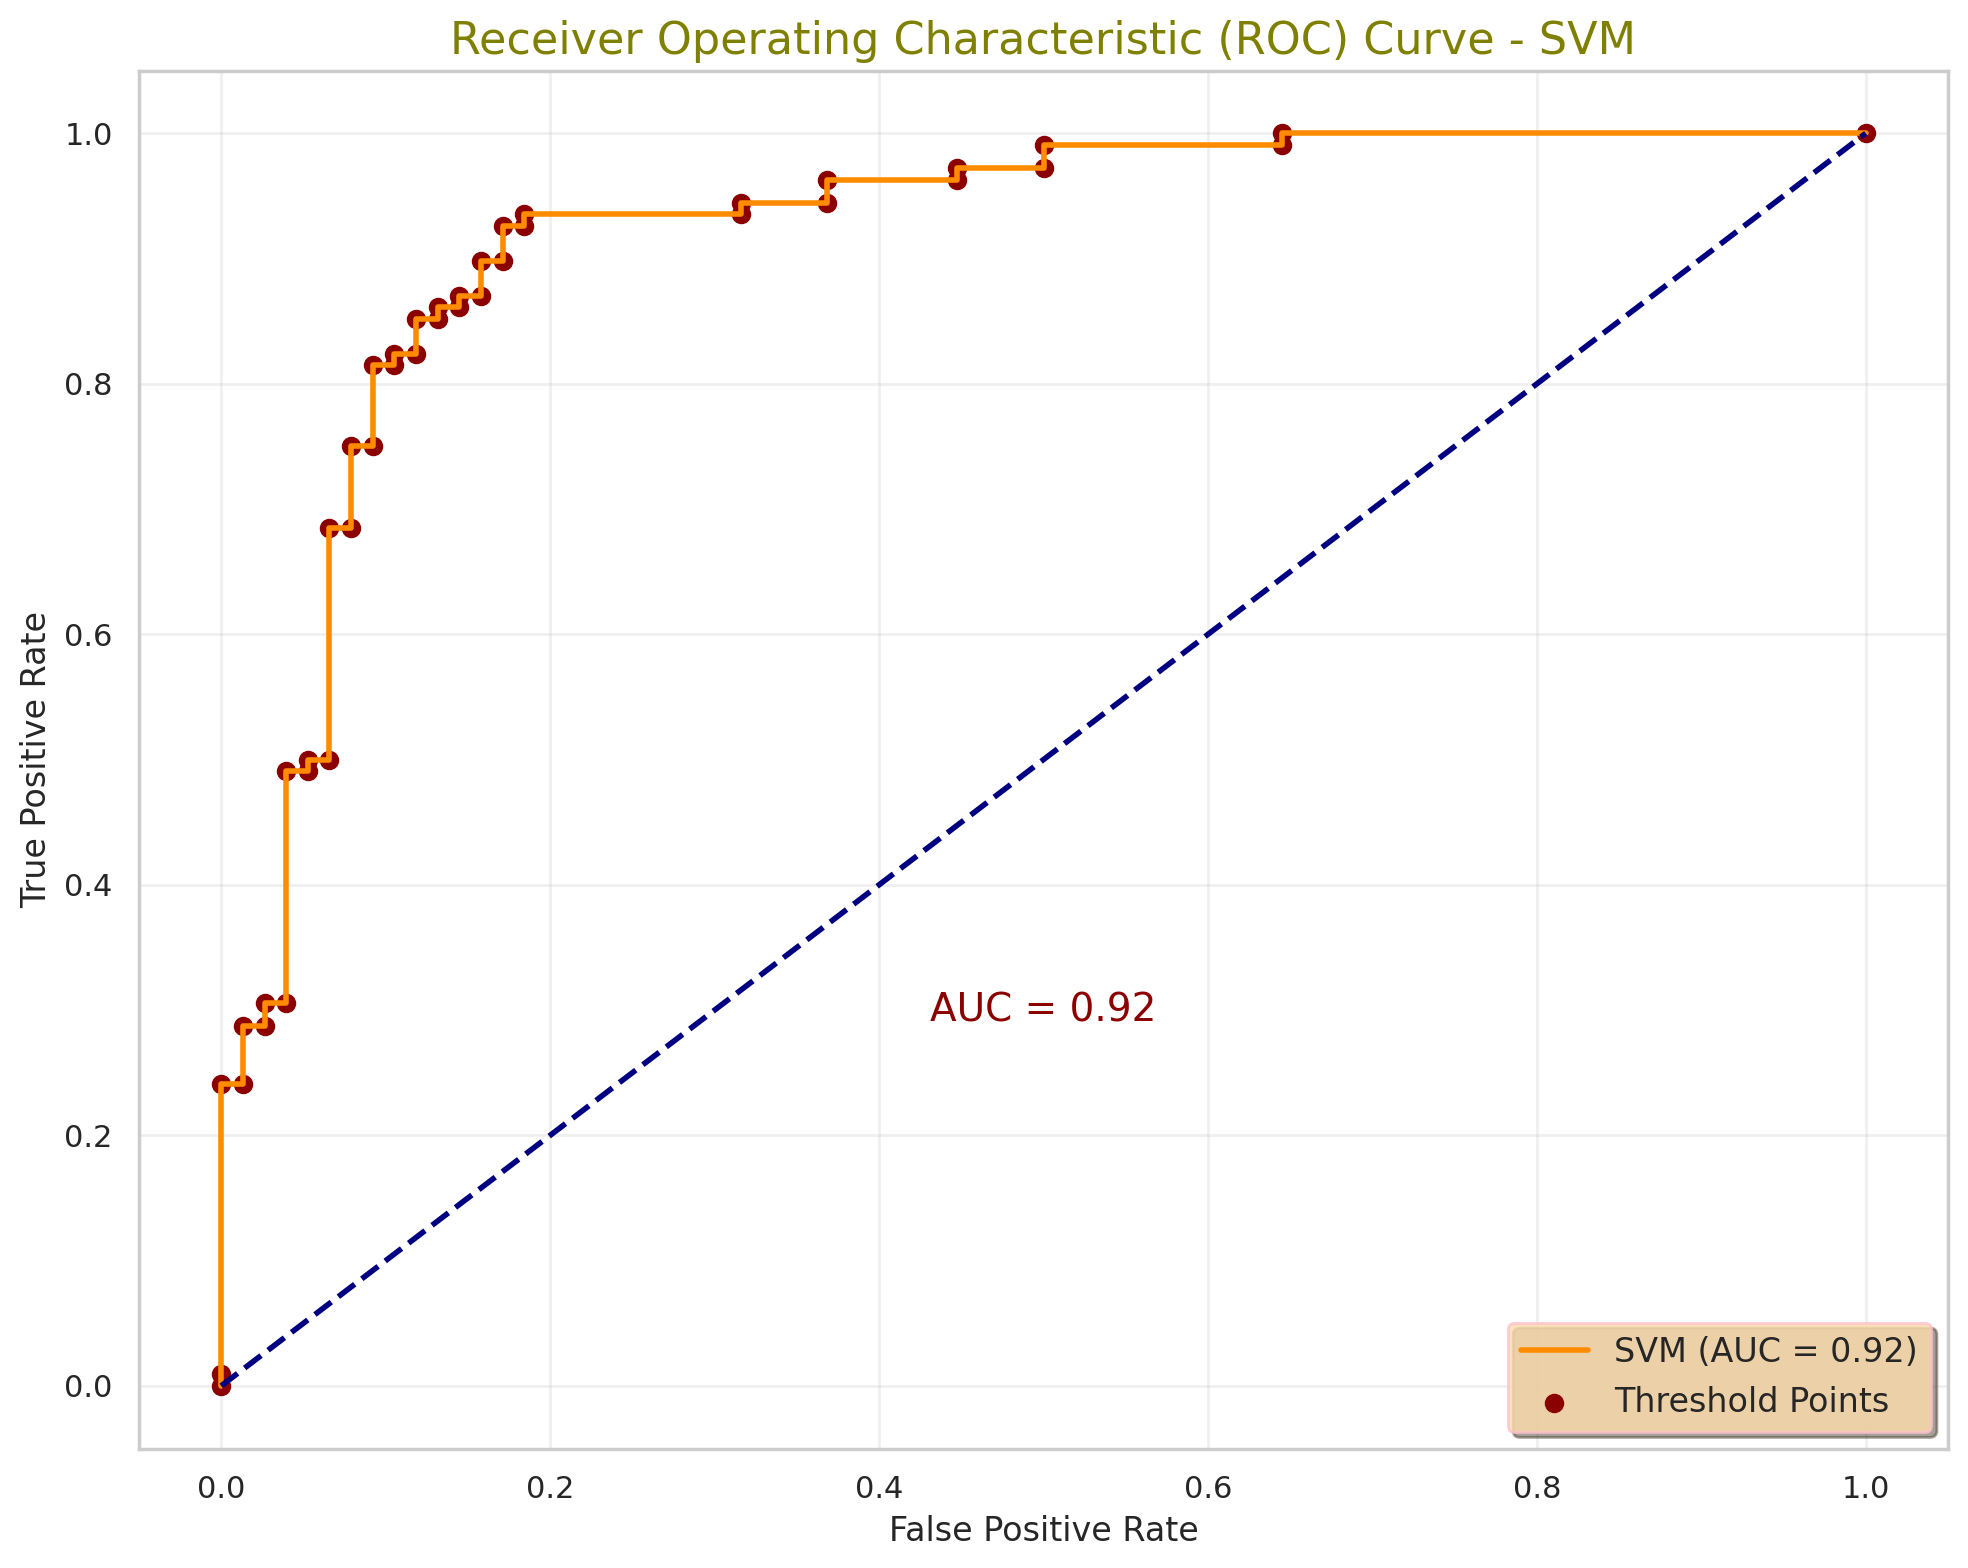

In [74]:
# Importing necessary libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Get predicted probabilities for the positive class
y_probs_svc = svc.decision_function(X_test)

# Compute ROC curve and ROC area
fpr_svc, tpr_svc, _svc = roc_curve(y_test, y_probs_svc)
roc_auc_svc = auc(fpr_svc, tpr_svc)

# Set a seaborn style
sns.set(style="whitegrid")

# Plotting the ROC curve with colorful aesthetics for SVC
plt.figure(figsize=(10, 8))
plt.plot(fpr_svc, tpr_svc, color='darkorange', lw=2, label='SVM (AUC = {:.2f})'.format(roc_auc_svc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_svc, tpr_svc, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc_svc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - SVM', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

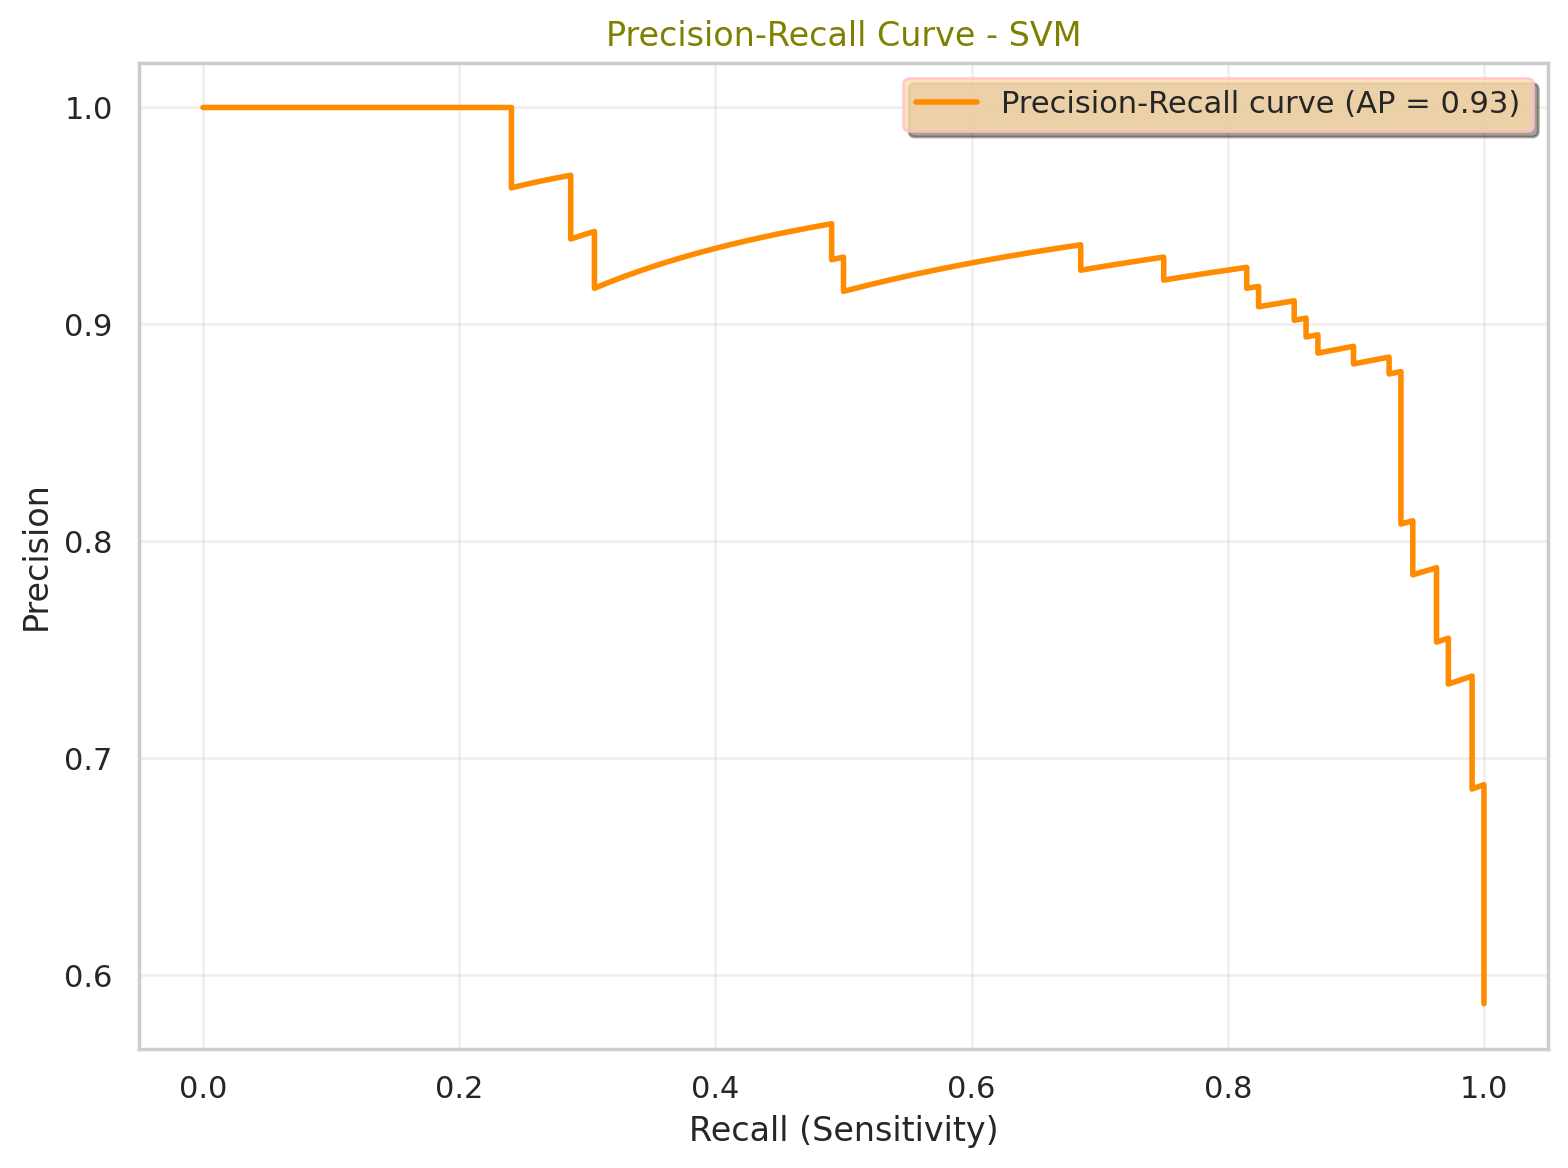

In [75]:
# Importing necessary libraries
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Get predicted probabilities for the positive class
y_probs_svc = svc.decision_function(X_test)

# Compute precision-recall curve and area under the curve
precision_svc, recall_svc, _svc = precision_recall_curve(y_test, y_probs_svc)
pr_auc_svc = auc(recall_svc, precision_svc)

# Plot the precision-recall curve with colorful aesthetics for SVM
plt.figure(figsize=(8, 6))
plt.plot(recall_svc, precision_svc, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(pr_auc_svc))
plt.xlabel('Recall (Sensitivity)')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve - SVM')
plt.legend(loc='upper right')
plt.show()


In [76]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validated accuracy scores
val_score_svc = cross_val_score(estimator=svc, X=X_train, y=y_train, cv=10)

# Print the results
print("Model Accuracy Score: {:.2f} %".format(val_score_svc.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score_svc.std() * 100))


Model Accuracy Score: 84.56 %
Std. Dev: 3.93 %


**(3) K-NEAREST NEIGHBOR**

***K-Nearest Neighbors is a simple, instance-based learning algorithm used for classification and regression tasks. It assigns labels to data points based on the majority class of their k-nearest neighbors.***

In [77]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, f1_score

# Creating a KNN classifier with 3 neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Training the KNN classifier
knn.fit(X_train, y_train)

# Making predictions on the test set
y_pred_knn = knn.predict(X_test)

# Calculating training accuracy, model accuracy, and F1 score
knn_train = round(knn.score(X_train, y_train) * 100, 2)
knn_accuracy = round(accuracy_score(y_pred_knn, y_test) * 100, 2)
knn_f1 = round(f1_score(y_pred_knn, y_test) * 100, 2)

# Printing the results
print("Training Accuracy :", knn_train, "%")
print("Model Accuracy Score :", knn_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_knn))


Training Accuracy : 89.63 %
Model Accuracy Score : 83.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.82      0.76      0.79        76
           1       0.84      0.88      0.86       108

    accuracy                           0.83       184
   macro avg       0.83      0.82      0.82       184
weighted avg       0.83      0.83      0.83       184



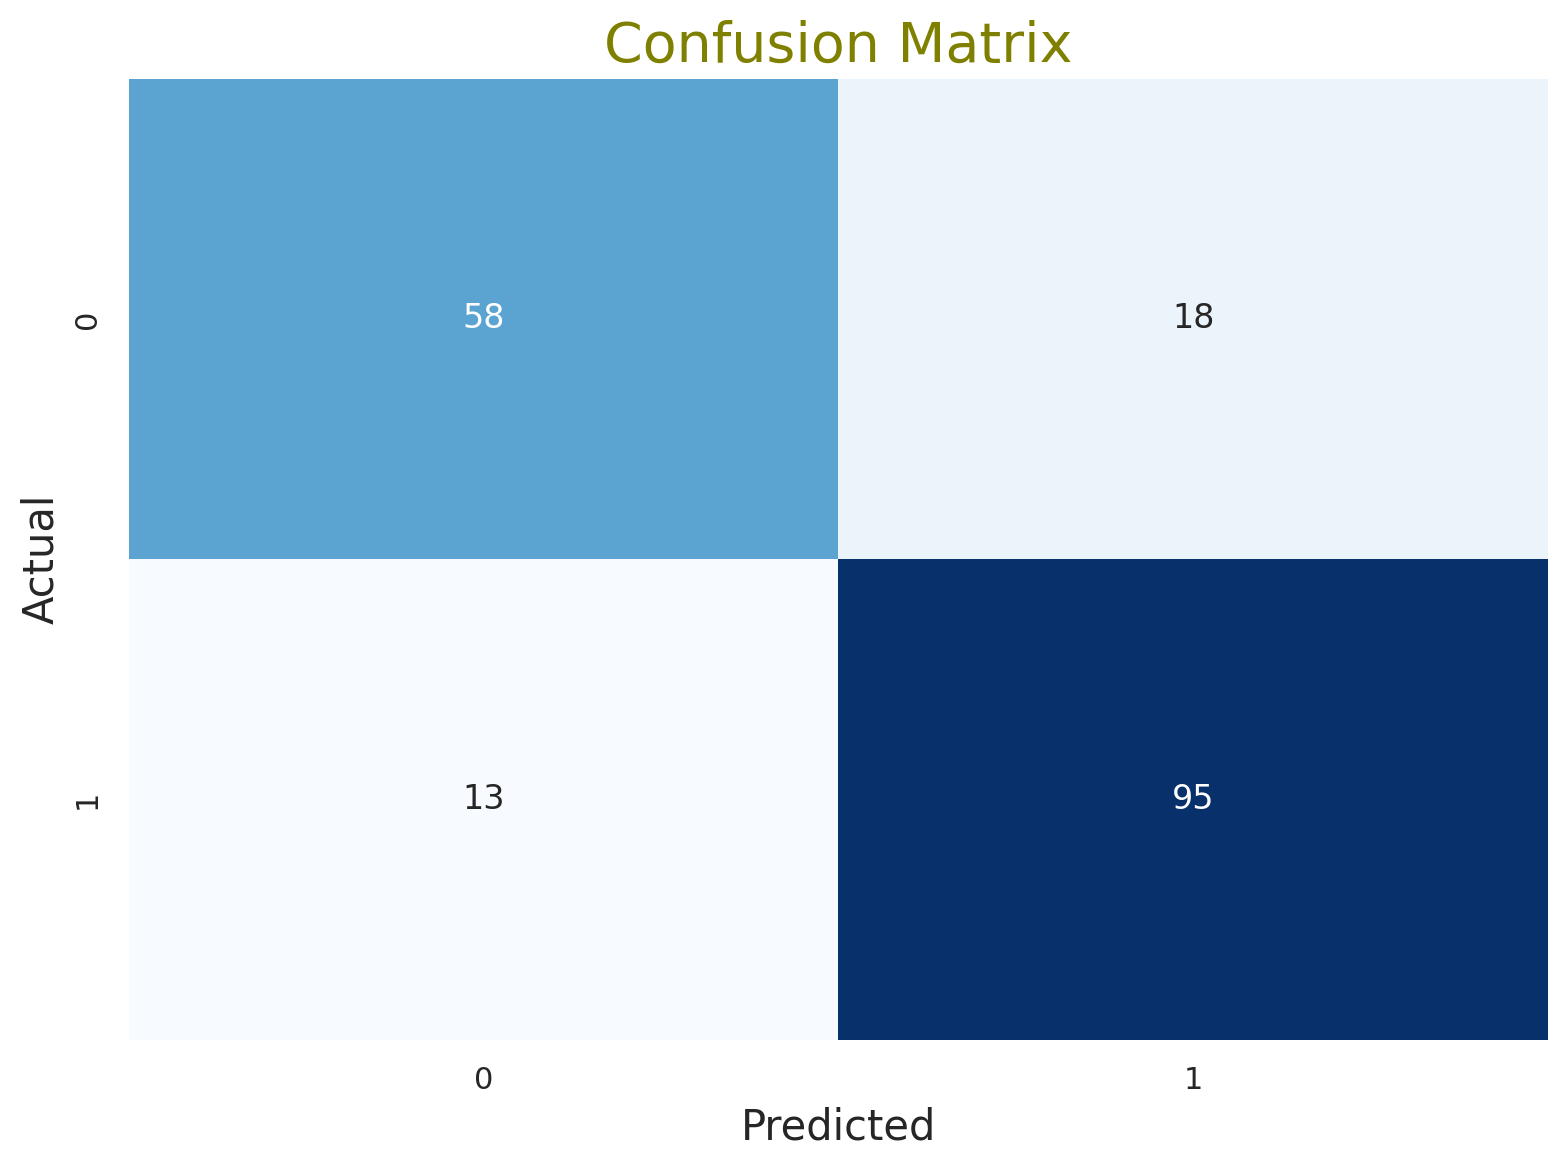

In [78]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming knn is your trained classifier, X_test, and y_test are your test data
y_pred = knn.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()



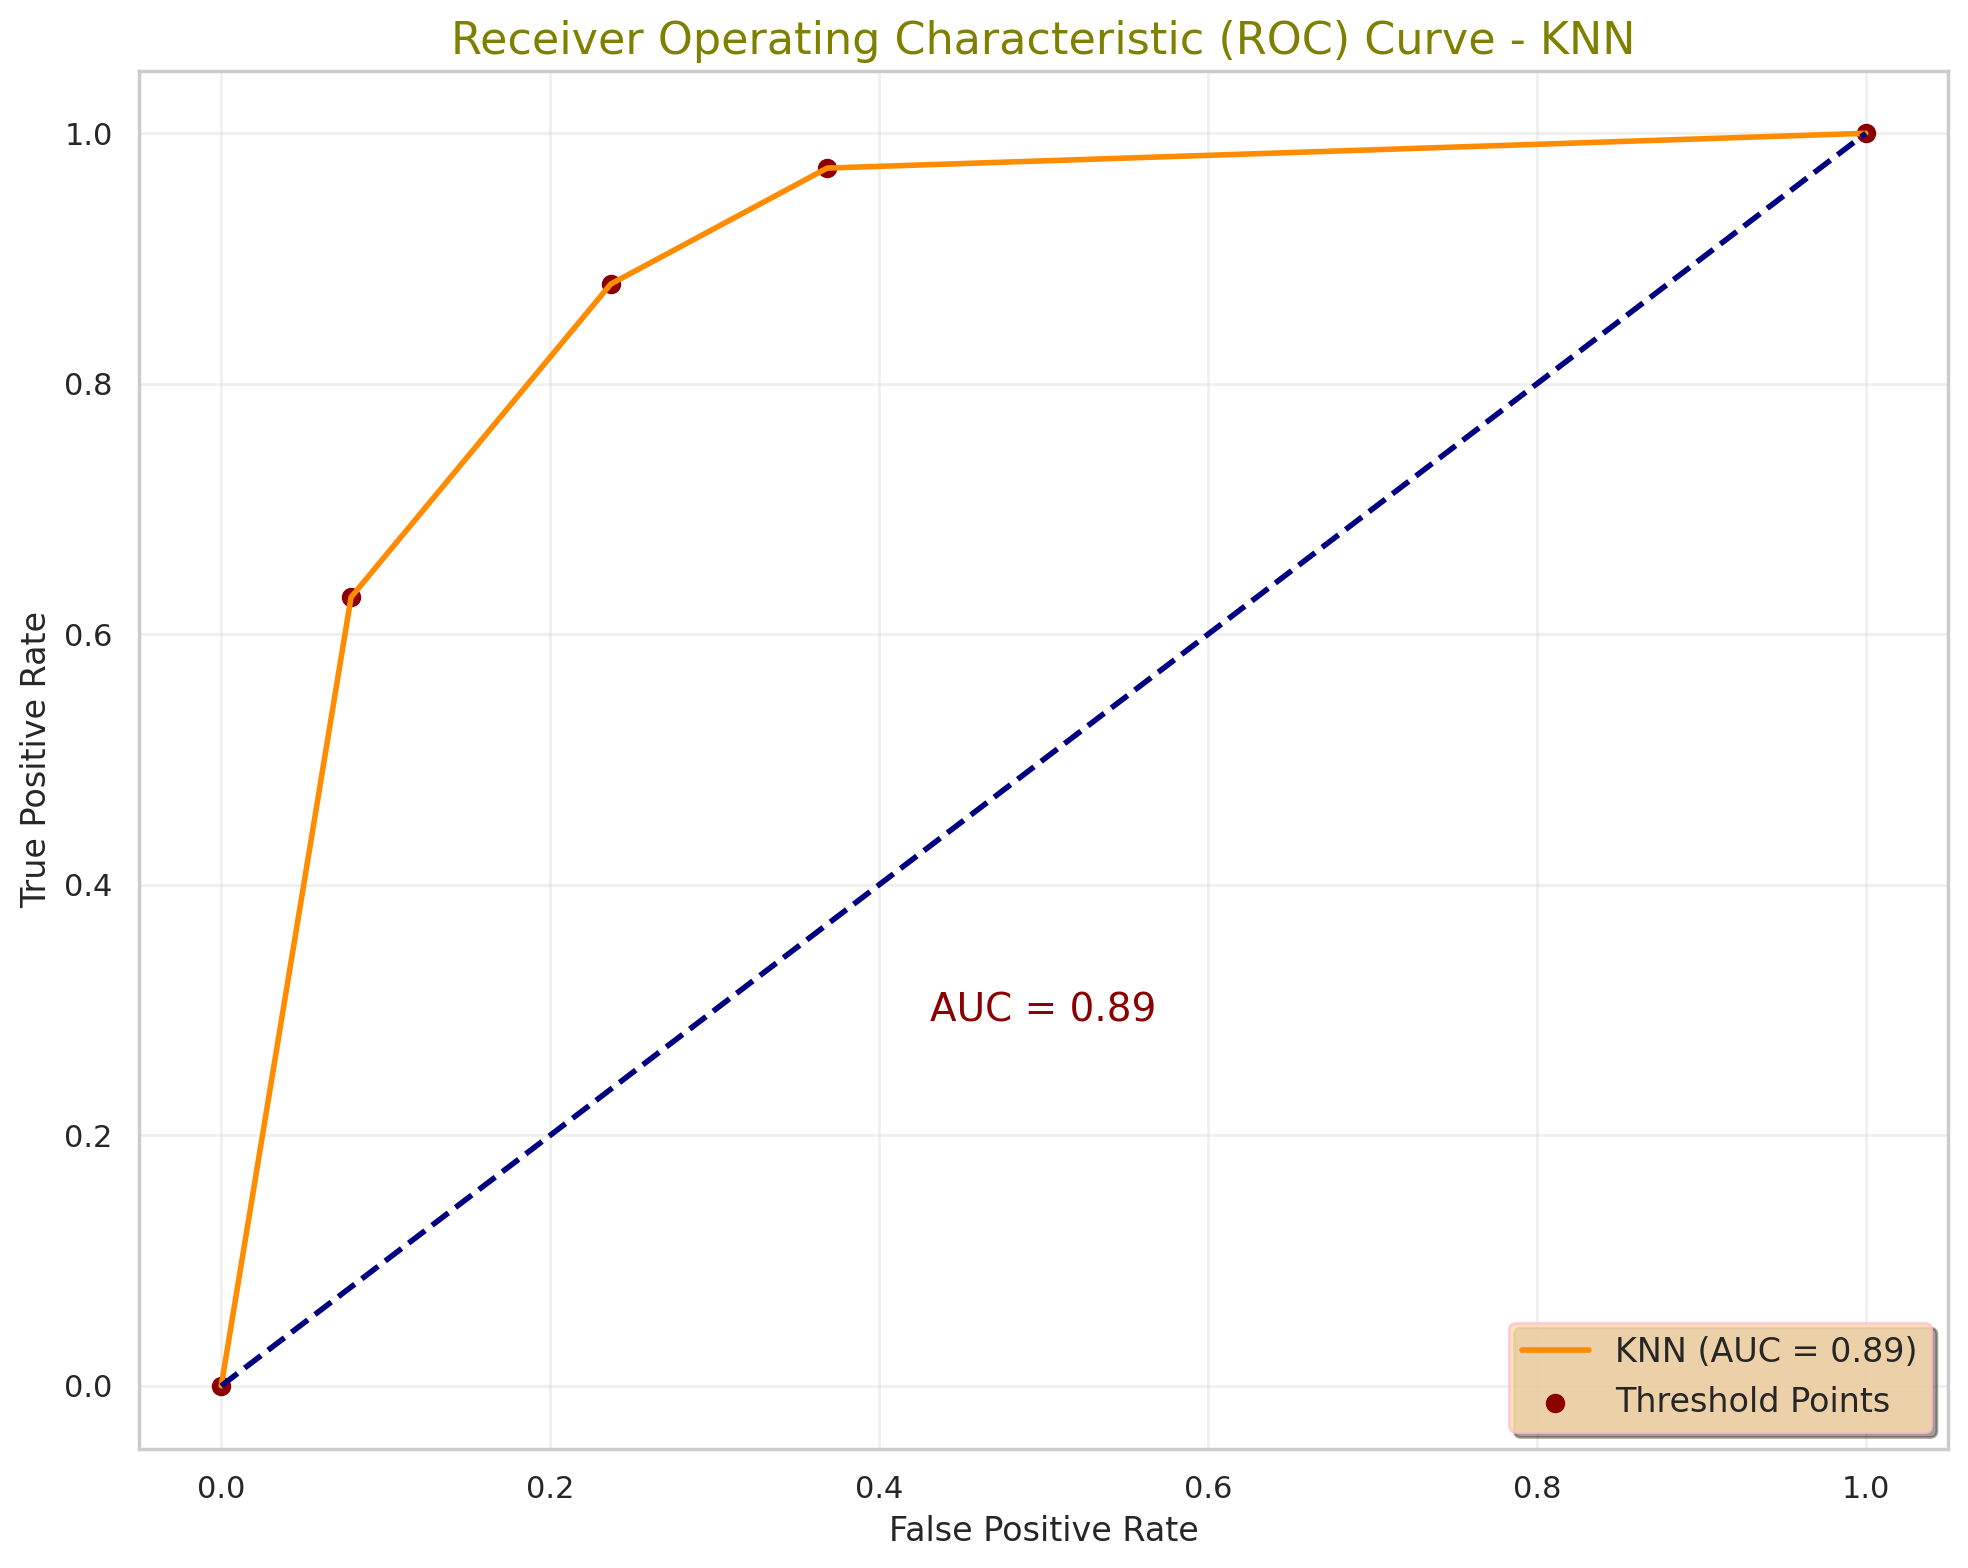

In [79]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming knn is your trained classifier, X_test, and y_test are your test data
y_scores_knn = knn.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for KNN
fpr_knn, tpr_knn, _knn = roc_curve(y_test, y_scores_knn)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# Set a seaborn style
sns.set(style="whitegrid")

# Plotting the ROC curve with colorful aesthetics for KNN
plt.figure(figsize=(10, 8))
plt.plot(fpr_knn, tpr_knn, color='darkorange', lw=2, label='KNN (AUC = {:.2f})'.format(roc_auc_knn))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_knn, tpr_knn, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc_knn:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - KNN', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


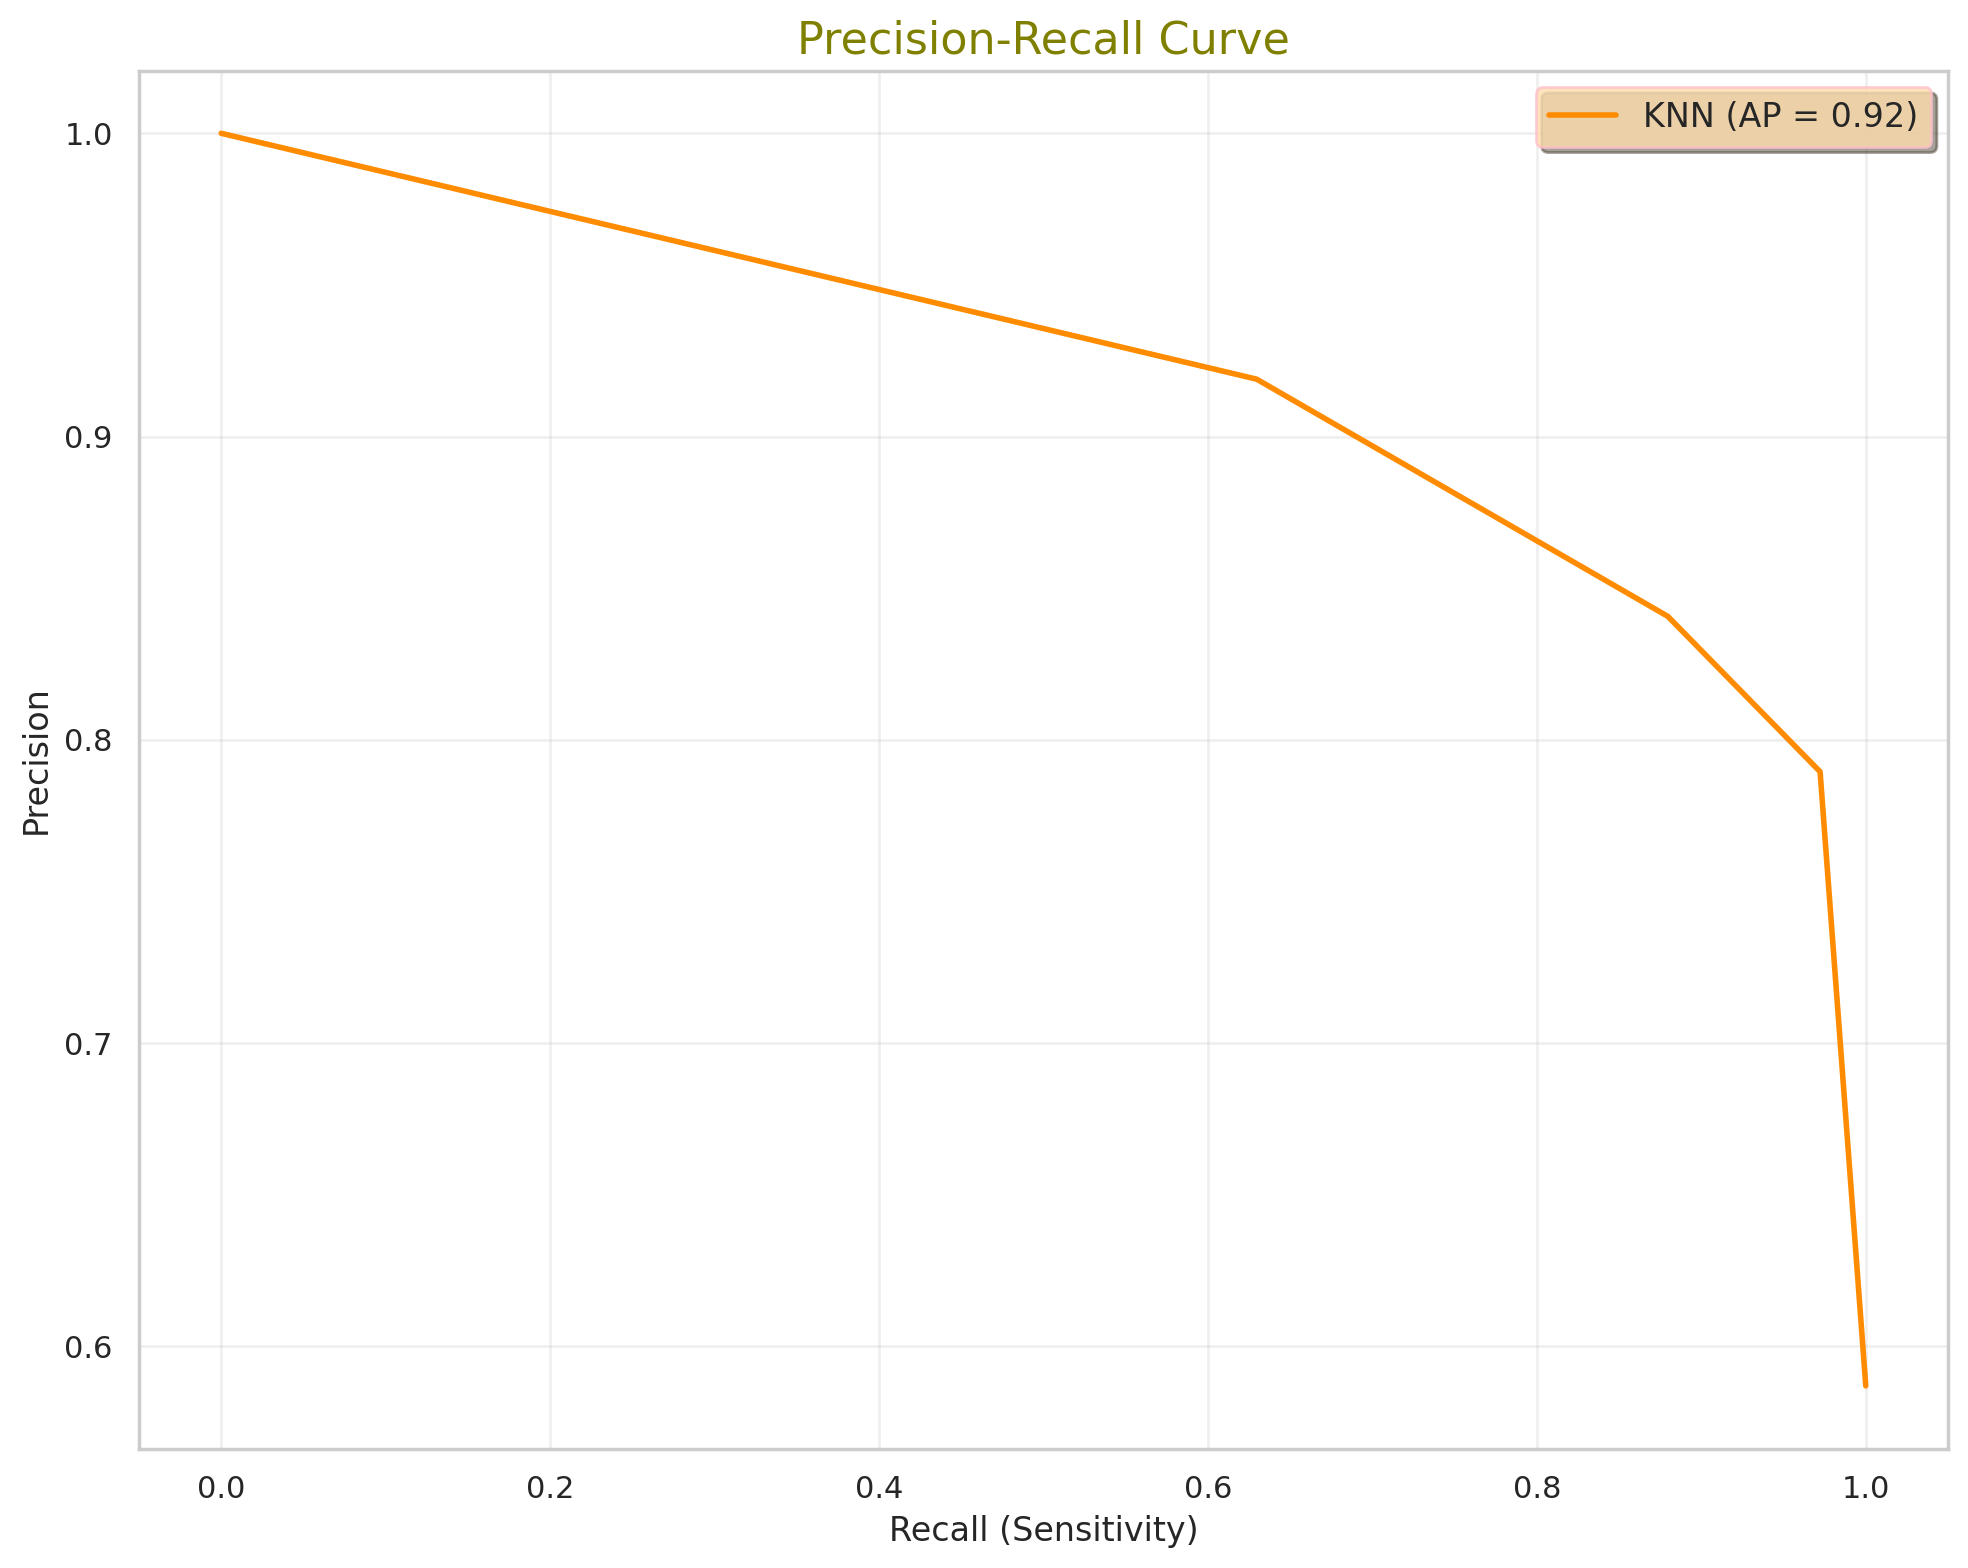

In [80]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming knn is your trained classifier, X_test, and y_test are your test data
y_scores = knn.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Set a seaborn style
sns.set(style="whitegrid")

# Plot precision-recall curve with colorful aesthetics
plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='KNN (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall (Sensitivity)', fontsize=12)
plt.ylabel('Precision', fontsize=12)
plt.title('Precision-Recall Curve', fontsize=16)
plt.legend(loc='upper right', fontsize=12)
plt.grid(True)
plt.show()



In [81]:
from sklearn.model_selection import cross_val_score

# Assuming knn is your trained classifier, and X_train, y_train are your training data
val_score = cross_val_score(estimator=knn, X=X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))


Model Accuracy Score: 81.98 %
Std. Dev: 3.33 %


**(4) GAUSSIAN NAIVE BAYES**

***Gaussian Naive Bayes is a probabilistic classification algorithm based on Bayes' theorem. It assumes that features are conditionally independent and follows a Gaussian distribution.***

In [82]:
# Gaussian Naive Bayes
from sklearn.naive_bayes import GaussianNB
gaussian = GaussianNB()

# Fit the GNB model on the training data
gaussian.fit(X_train, y_train)

# Make predictions on the test set
y_pred_NB = gaussian.predict(X_test)

# Calculate training accuracy
gaussian_train = round(gaussian.score(X_train, y_train) * 100, 2)

# Calculate model accuracy on the test set
gaussian_accuracy = round(accuracy_score(y_pred_NB, y_test) * 100, 2)

# Calculate F1 score on the test set
gaussian_f1 = round(f1_score(y_pred_NB, y_test) * 100, 2)

# Print the results
print("Training Accuracy :", gaussian_train, "%")
print("Model Accuracy Score :", gaussian_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_NB))


Training Accuracy : 83.77 %
Model Accuracy Score : 82.61 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.76      0.86      0.80        76
           1       0.89      0.81      0.84       108

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



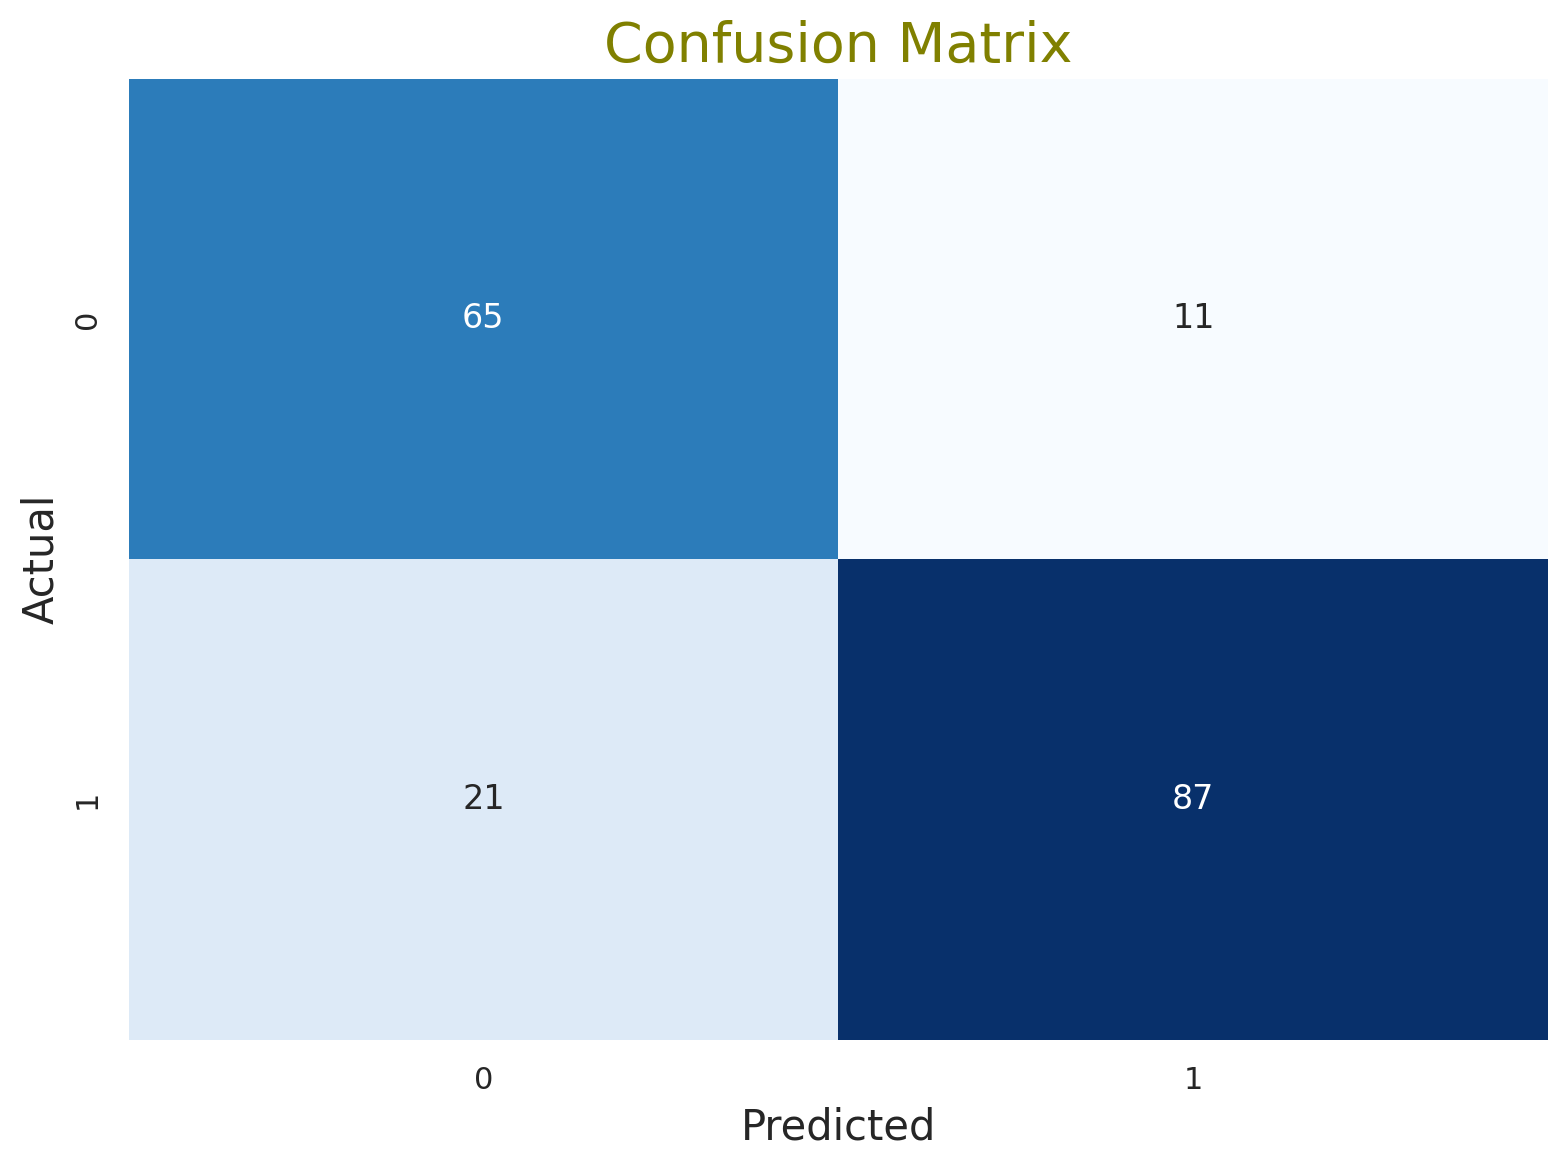

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming gaussian is your trained classifier, X_test, and y_test are your test data
y_pred = gaussian.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()

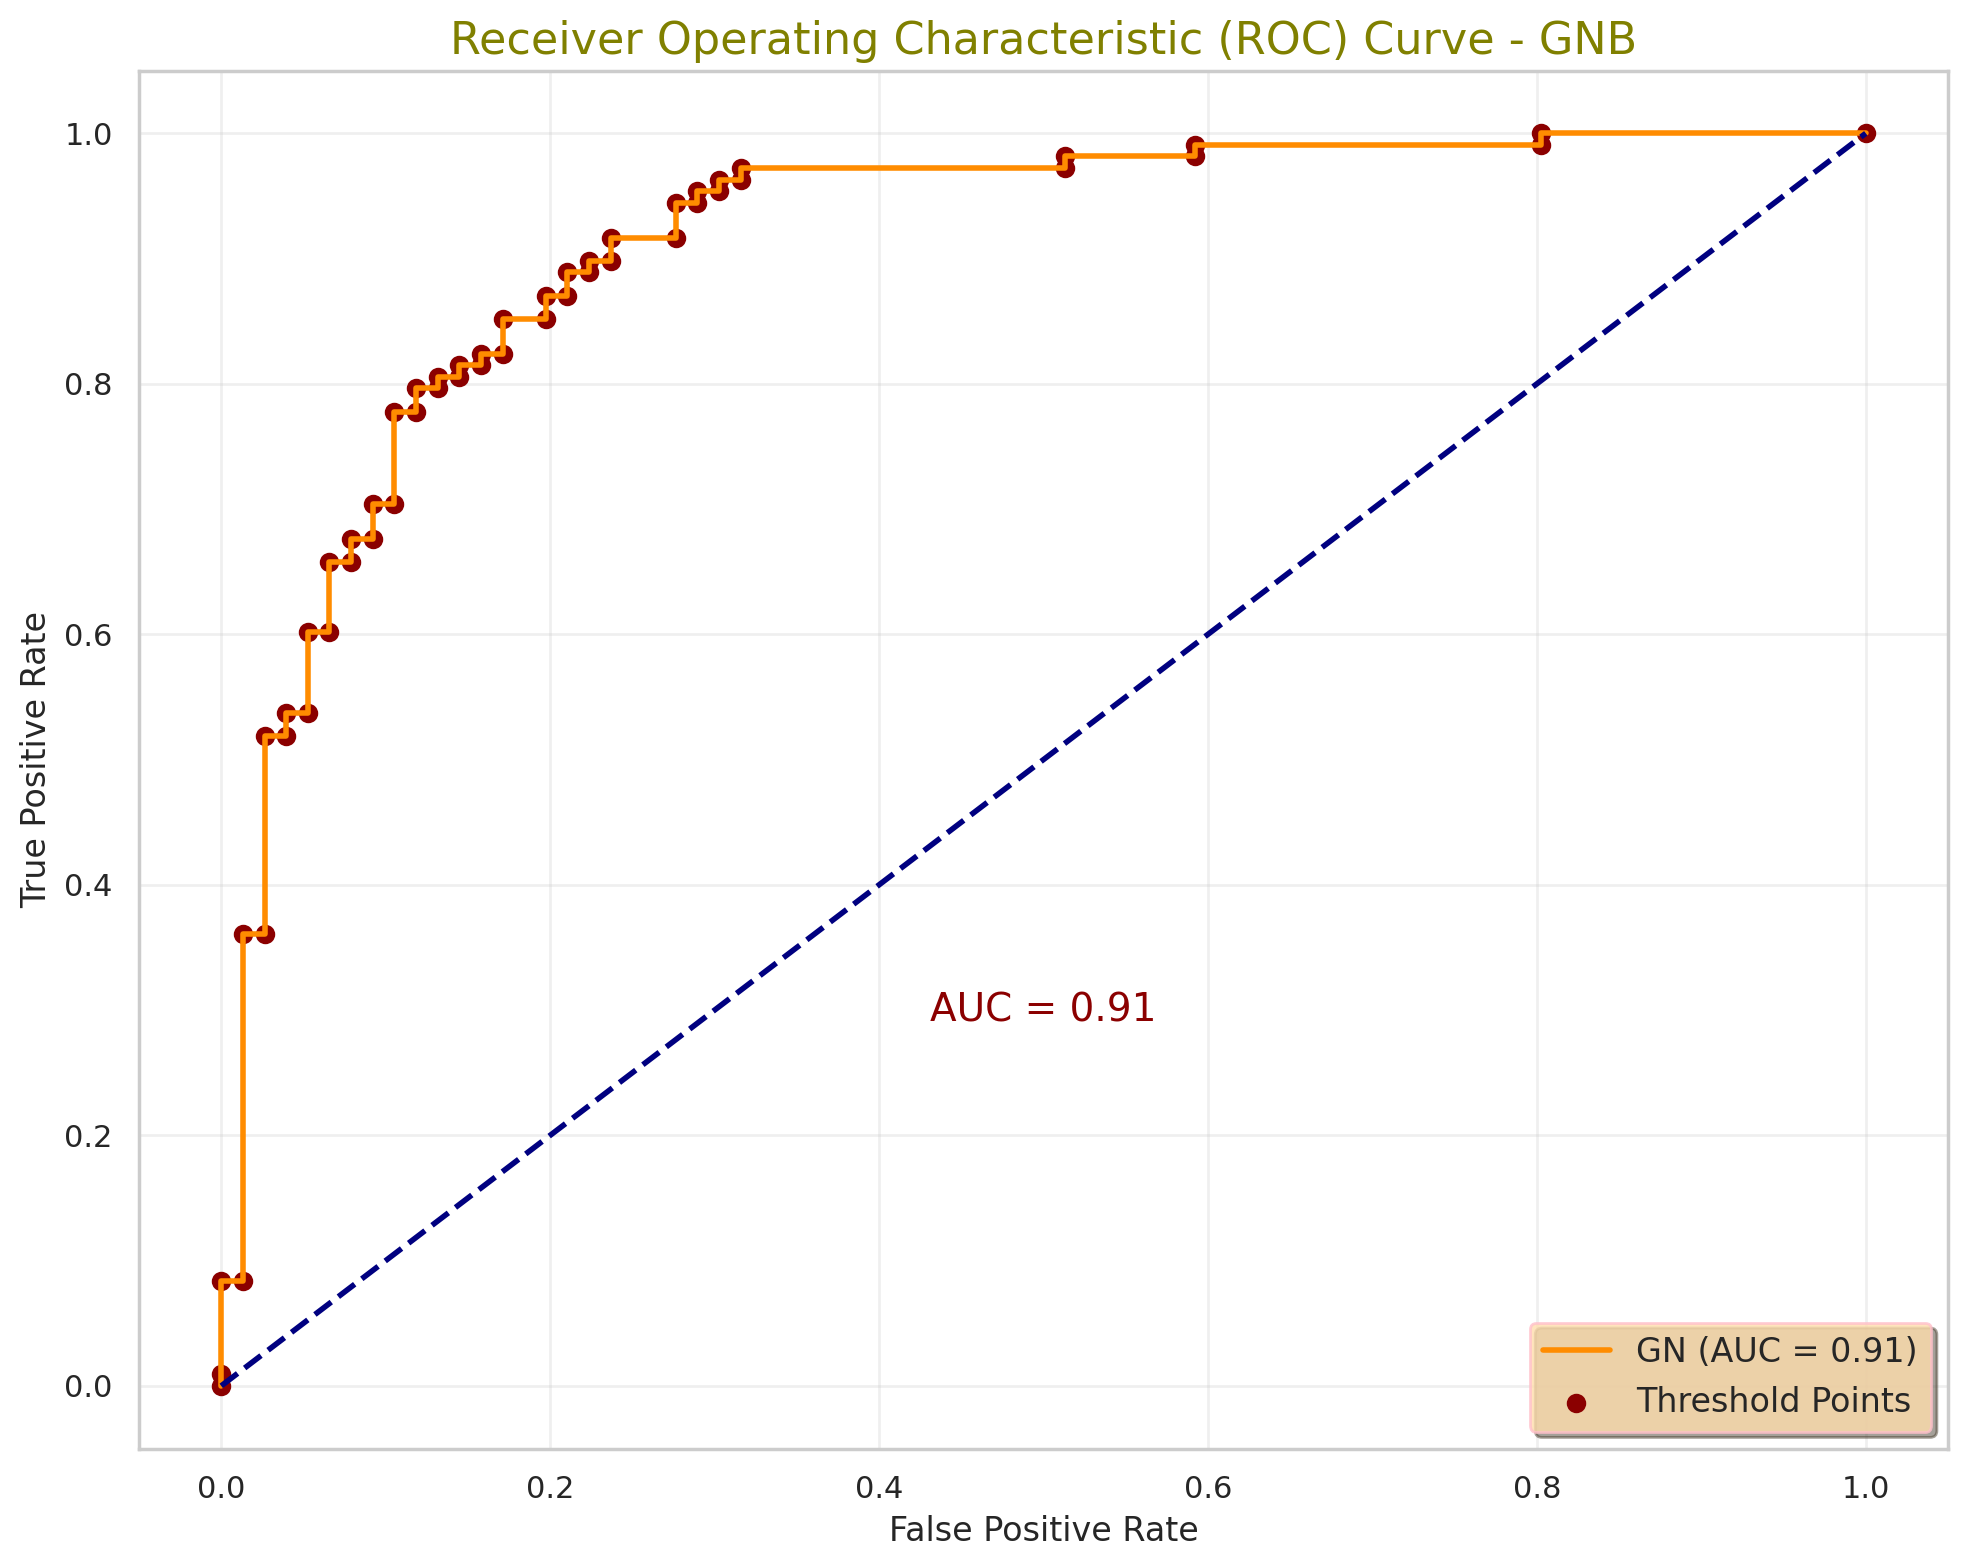

In [84]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming gaussian is your trained classifier, X_test, and y_test are your test data
y_scores = gaussian.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve with threshold points
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='GN (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - GNB', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()




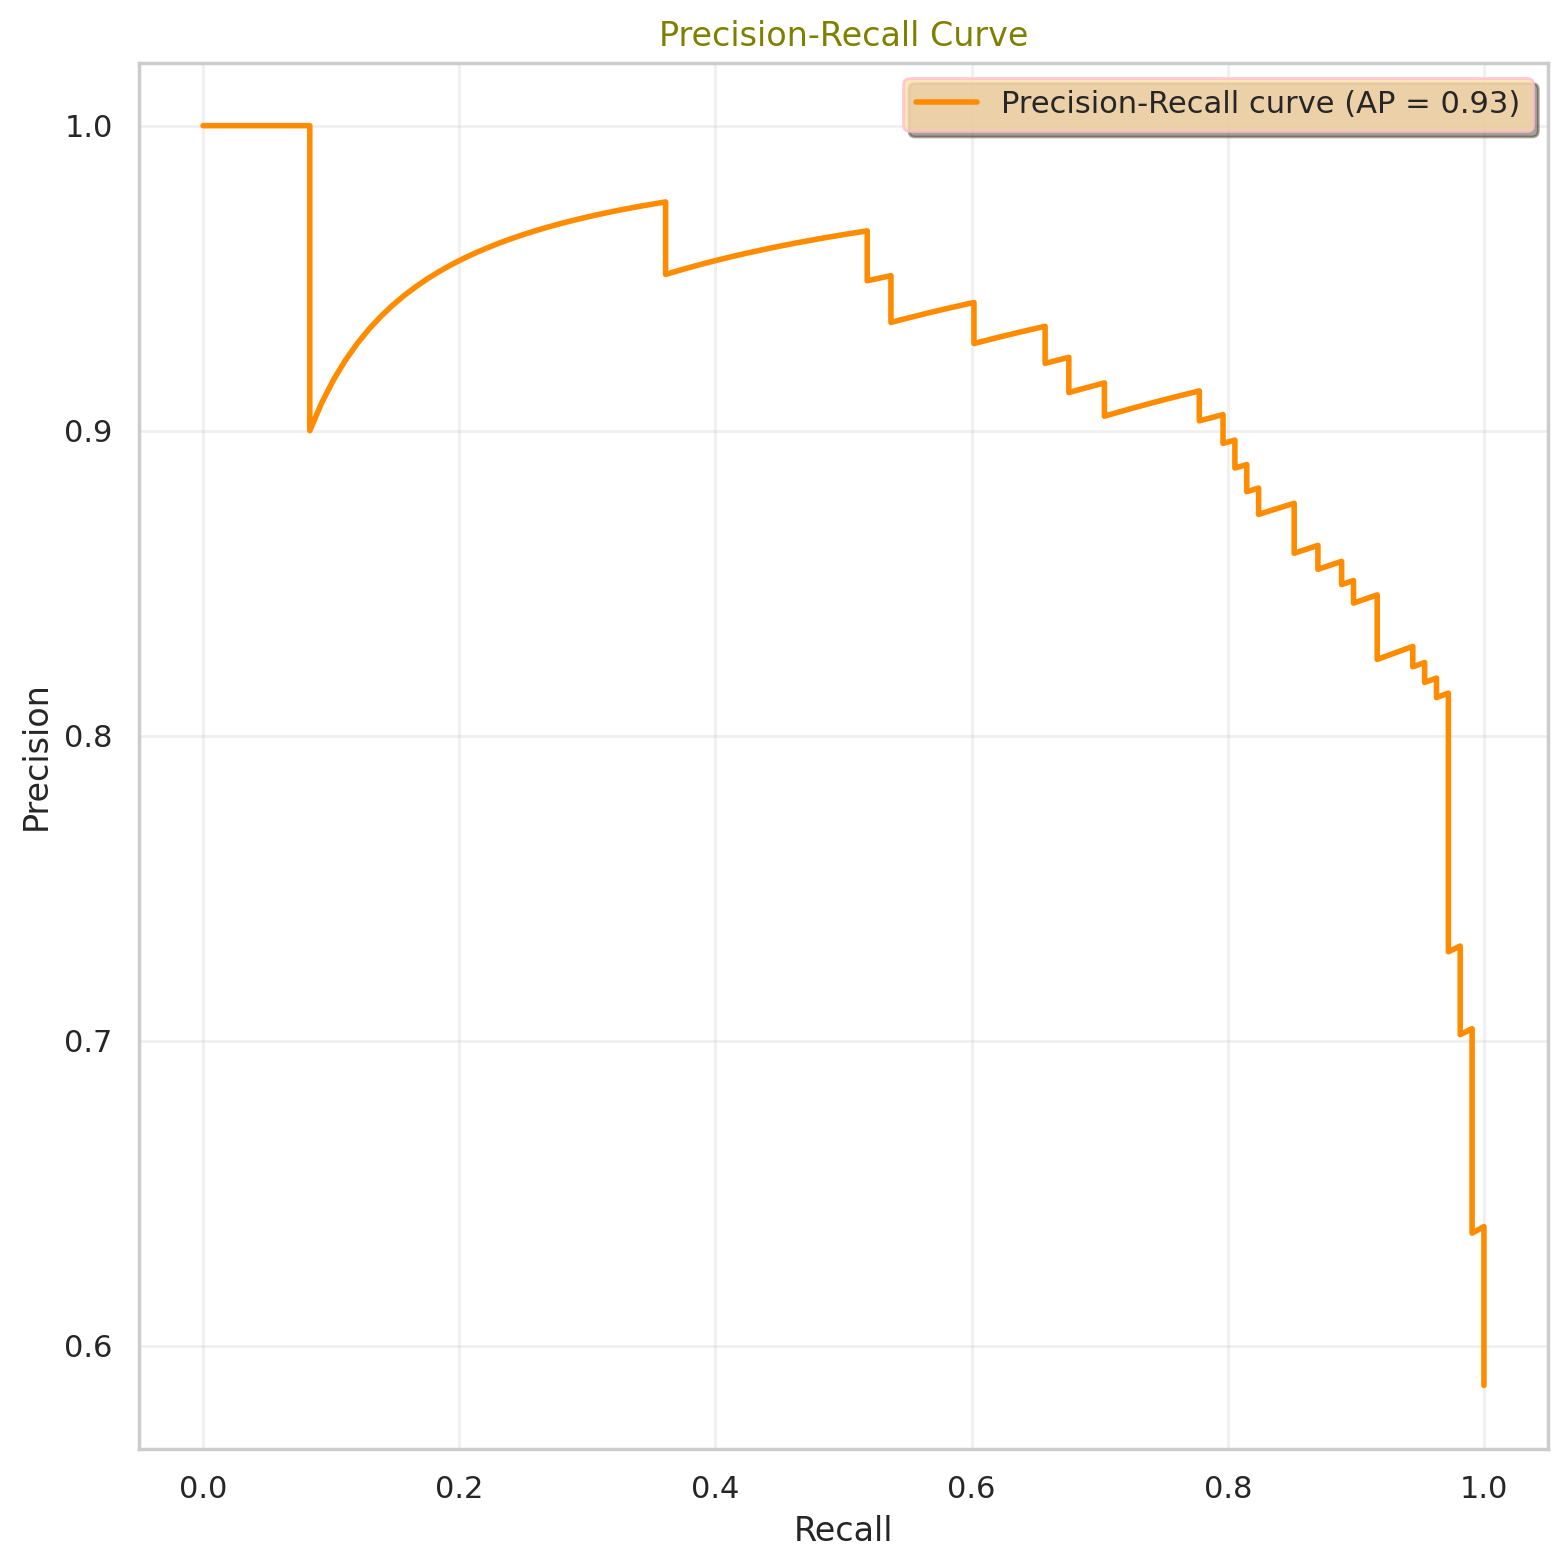

In [85]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming gaussian is your trained classifier, X_test, and y_test are your test data
y_scores = gaussian.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [86]:
from sklearn.model_selection import cross_val_score

# Assuming gaussian is your trained classifier, and X_train, y_train are your training data
val_score = cross_val_score(estimator=gaussian, X=X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))


Model Accuracy Score: 83.08 %
Std. Dev: 3.39 %


**(5) PERCEPTRON**

***Perceptron is a single-layer neural network used for binary classification. It learns a linear decision boundary by adjusting weights based on misclassifications.***

In [87]:
from sklearn.linear_model import Perceptron
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Create a Perceptron model
perceptron = Perceptron()

# Train the model on the training data
perceptron.fit(X_train, y_train)

# Make predictions on the test data
y_pred_perceptron = perceptron.predict(X_test)

# Calculate training accuracy
perceptron_train = round(perceptron.score(X_train, y_train) * 100, 2)

# Calculate model accuracy on the test data
perceptron_accuracy = round(accuracy_score(y_pred_perceptron, y_test) * 100, 2)

# Calculate F1 score
perceptron_f1 = round(f1_score(y_pred_perceptron, y_test) * 100, 2)

# Print results
print("Training Accuracy: {}%".format(perceptron_train))
print("Model Accuracy Score: {}%".format(perceptron_accuracy))
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report:\n", classification_report(y_test, y_pred_perceptron))


Training Accuracy: 71.08%
Model Accuracy Score: 71.74%
--------------------------------------------------------
Classification Report:
               precision    recall  f1-score   support

           0       0.60      0.95      0.73        76
           1       0.94      0.56      0.70       108

    accuracy                           0.72       184
   macro avg       0.77      0.75      0.72       184
weighted avg       0.80      0.72      0.71       184



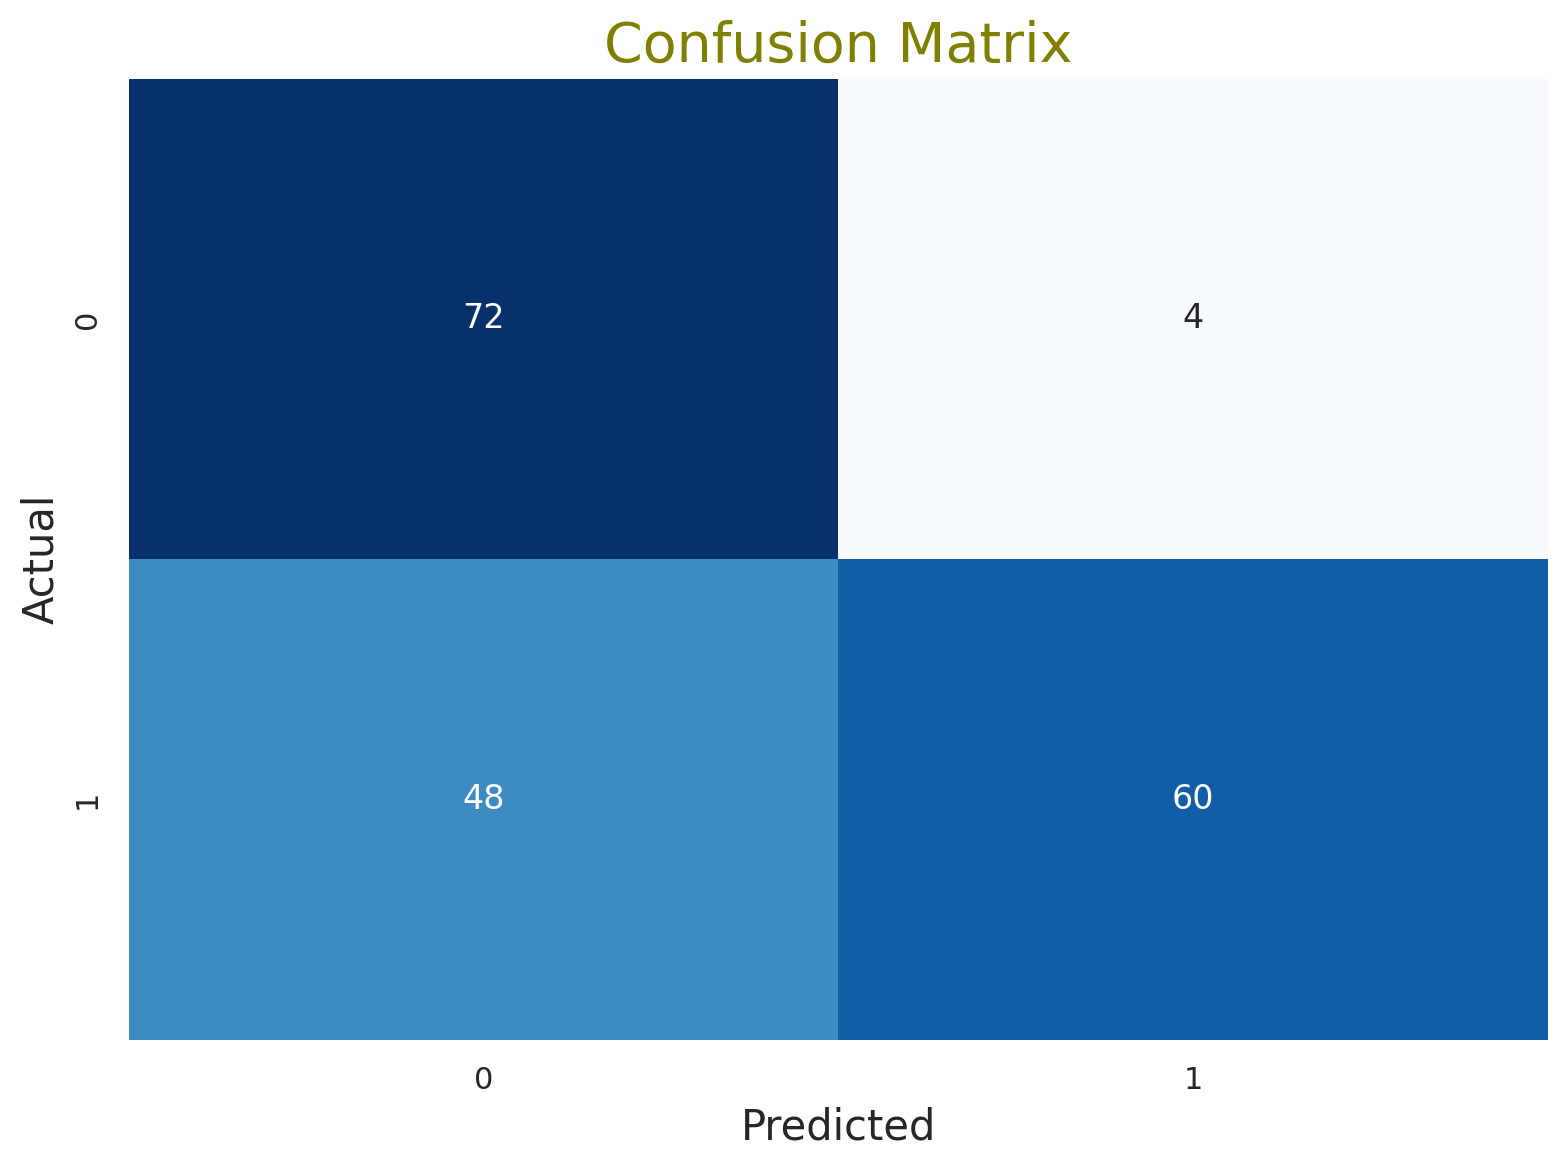

In [88]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming perceptron is your trained classifier, X_test, and y_test are your test data
y_pred = perceptron.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()

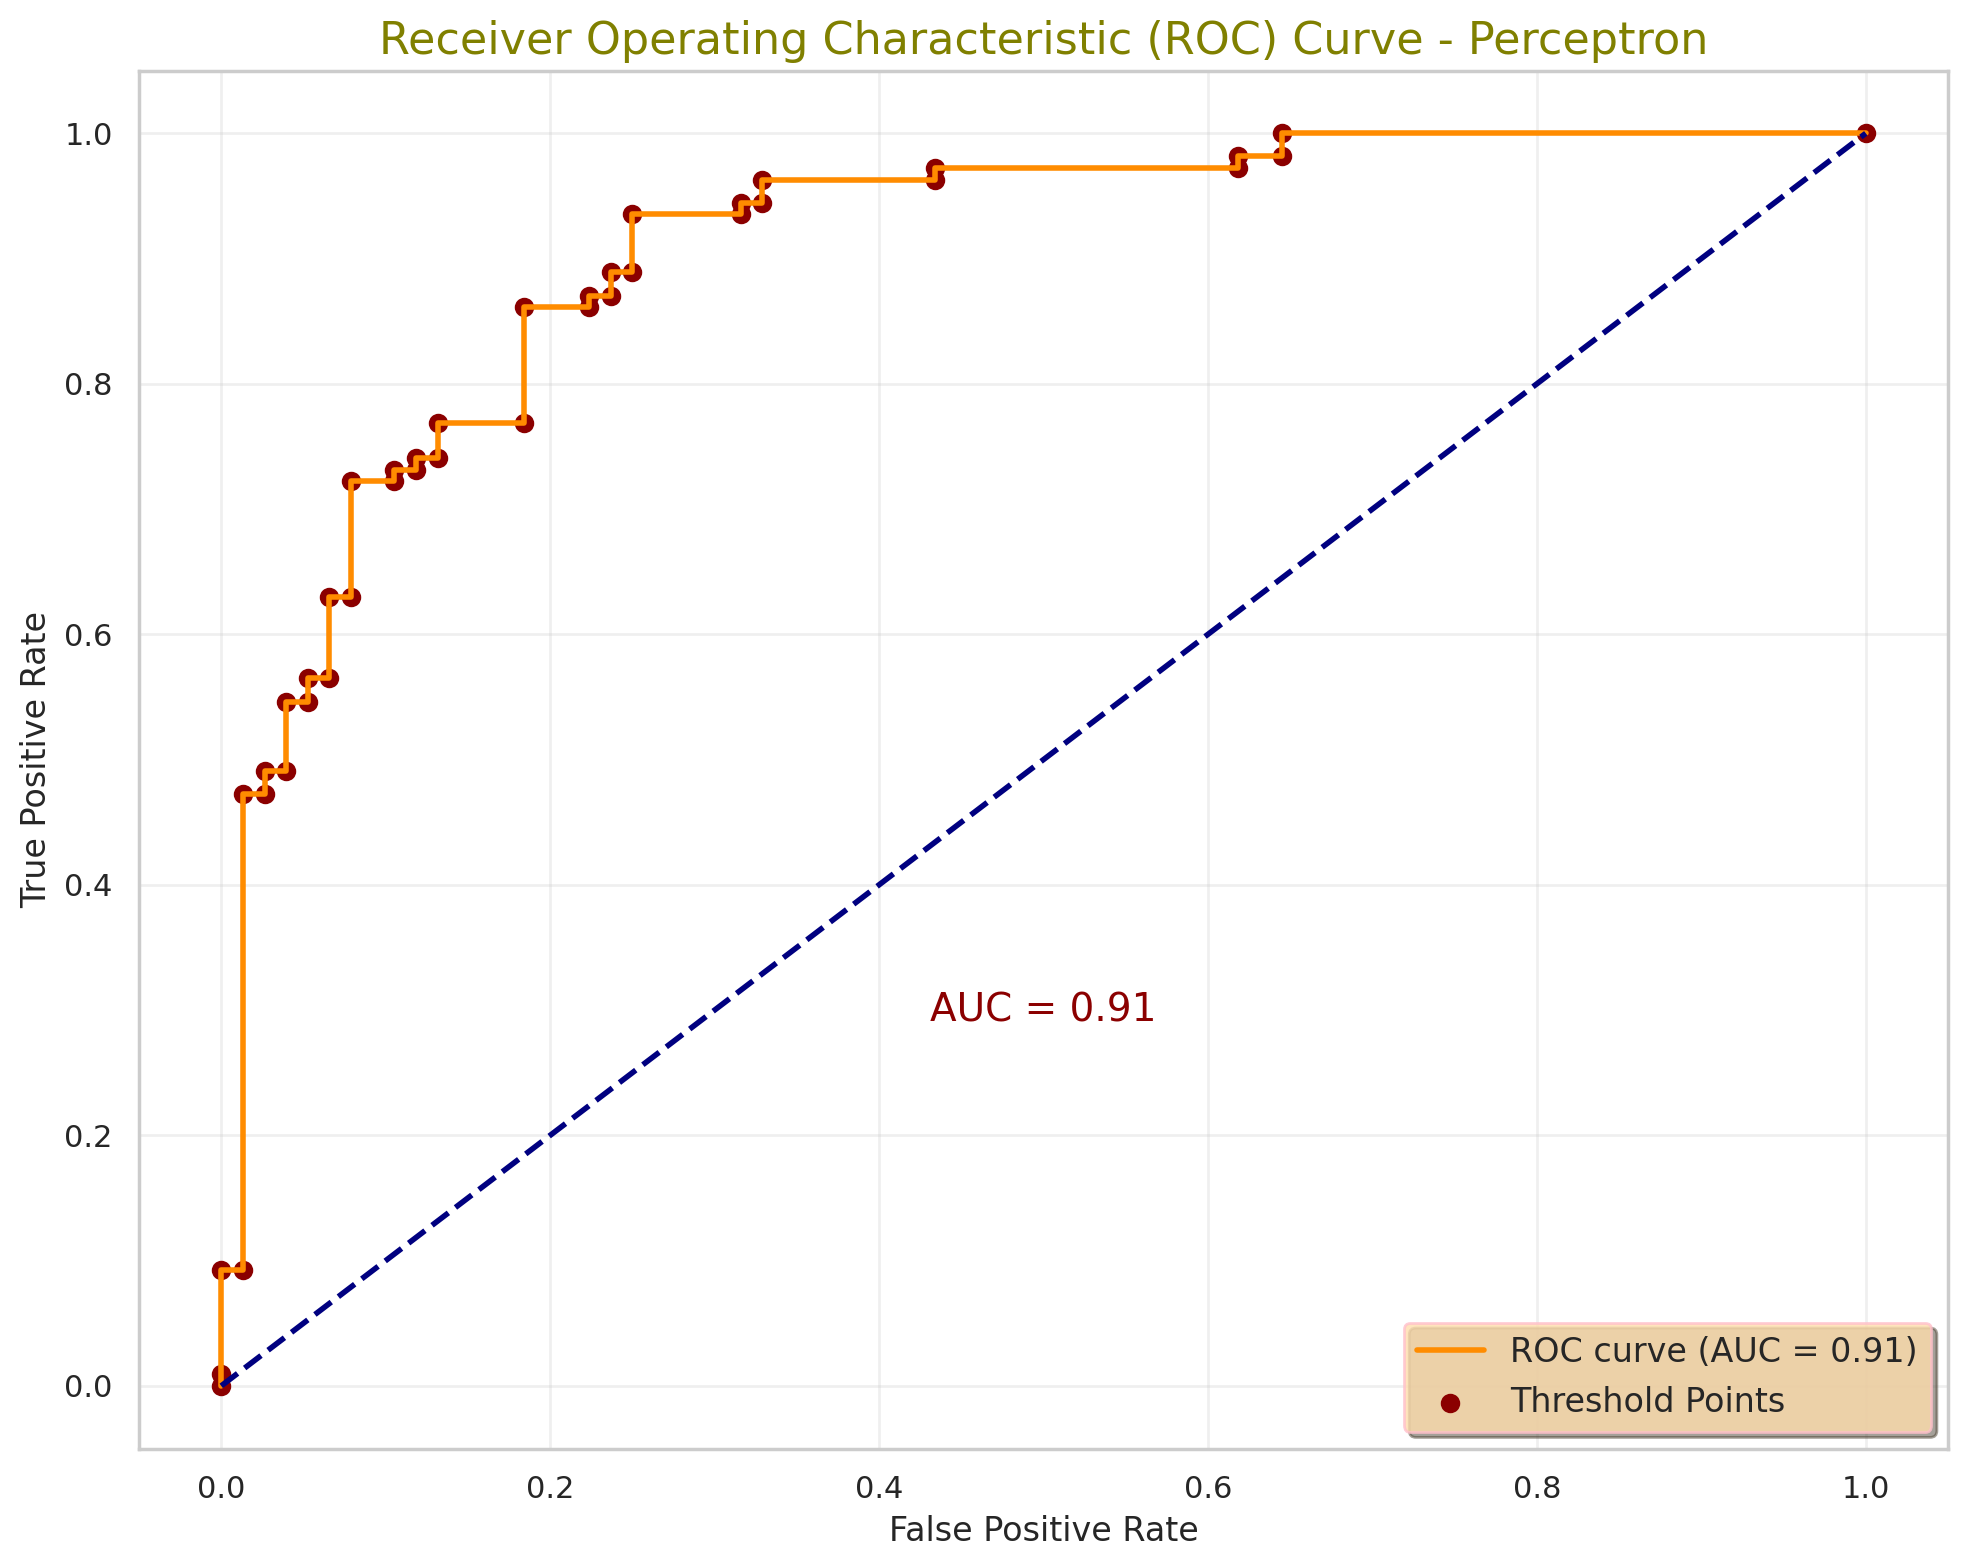

In [89]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming perceptron is your trained classifier, X_test, and y_test are your test data
y_scores = perceptron.decision_function(X_test)

# Compute ROC curve and ROC area
fpr, tpr, thresholds = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)

# Plot ROC curve with threshold points
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Perceptron', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()




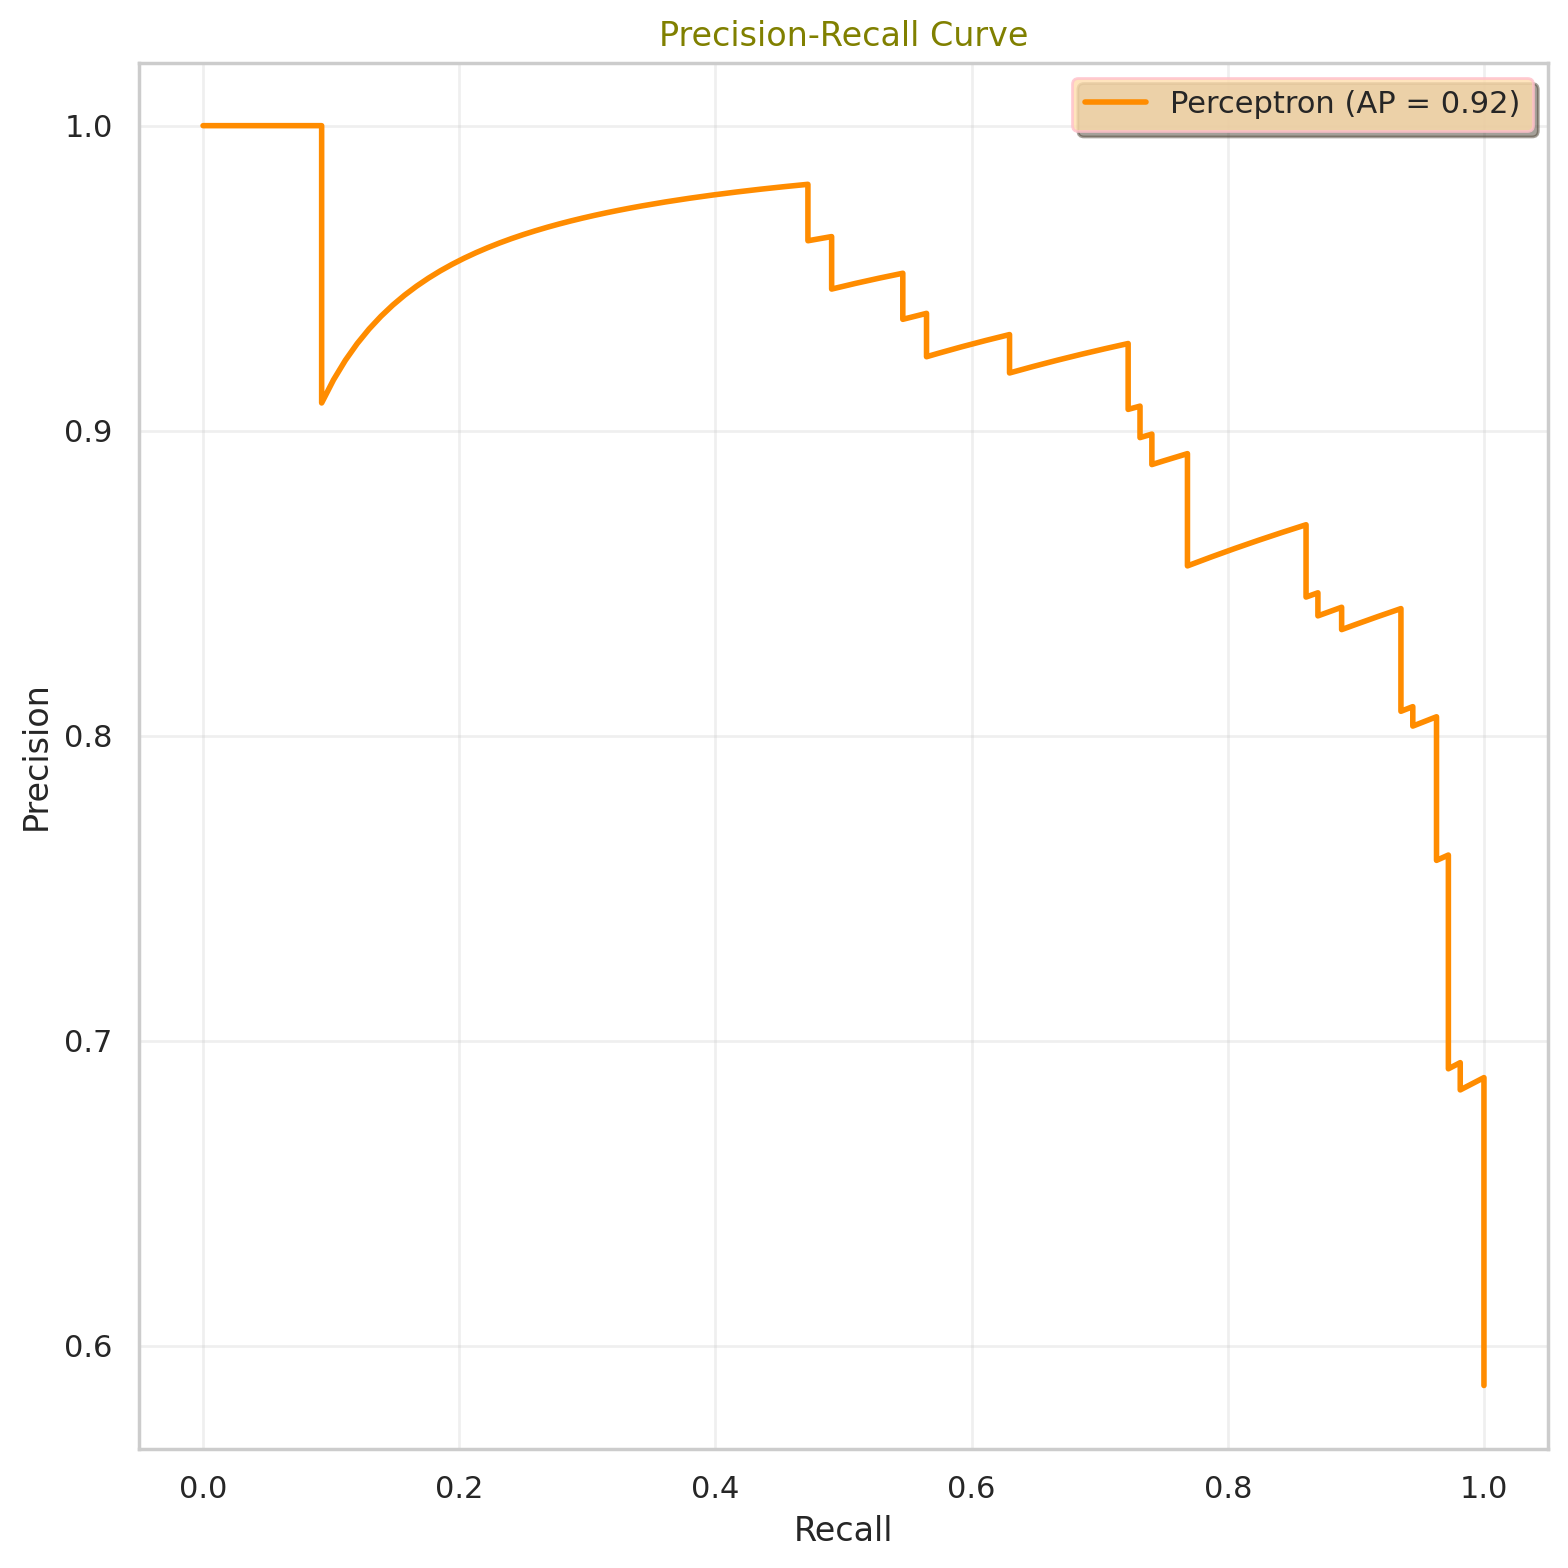

In [90]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming perceptron is your trained classifier, X_test, and y_test are your test data
y_scores = perceptron.decision_function(X_test)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Perceptron (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [91]:
from sklearn.model_selection import cross_val_score

# Assuming perceptron is your trained classifier, and X_train, y_train are your training data
val_score = cross_val_score(estimator=perceptron, X=X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean() * 100))
print("Std. Dev: {:.2f} %".format(val_score.std() * 100))


Model Accuracy Score: 75.31 %
Std. Dev: 8.66 %


**(6) LINEAR SVC**

***Linear Support Vector Classification is a variant of SVM for linearly separable data. It finds the hyperplane that best separates classes in a higher-dimensional space.***

In [92]:
# Import necessary libraries
from sklearn.svm import LinearSVC
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import train_test_split

# Linear SVC model
linear_svc = LinearSVC()
linear_svc.fit(X_train, y_train)

# Prediction on the test set
y_pred_LinearSVC = linear_svc.predict(X_test)

# Evaluation metrics
linear_svc_train = round(linear_svc.score(X_train, y_train) * 100, 2)
linear_svc_accuracy = round(accuracy_score(y_pred_LinearSVC, y_test) * 100, 2)
linear_svc_f1 = round(f1_score(y_pred_LinearSVC, y_test) * 100, 2)

# Print results
print("Training Accuracy :", linear_svc_train, "%")
print("Model Accuracy Score :", linear_svc_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_LinearSVC))


Training Accuracy : 85.13 %
Model Accuracy Score : 82.07 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.79      0.78      0.78        76
           1       0.84      0.85      0.85       108

    accuracy                           0.82       184
   macro avg       0.82      0.81      0.81       184
weighted avg       0.82      0.82      0.82       184



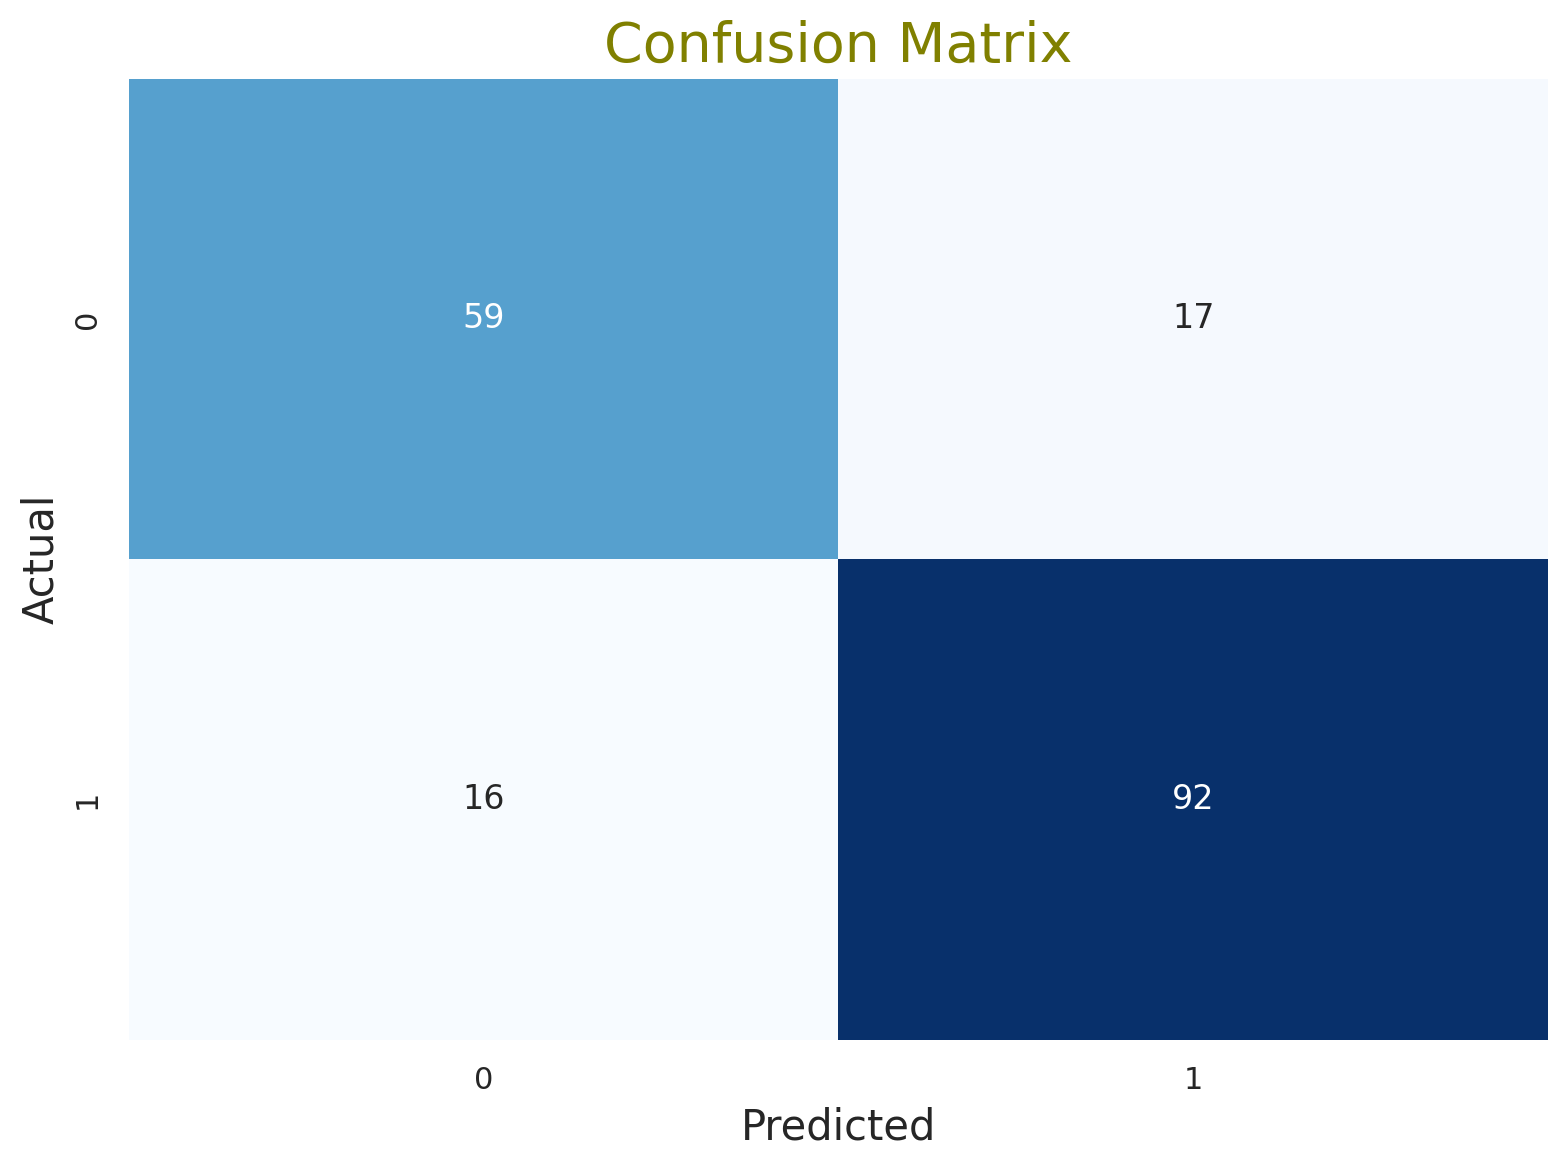

In [93]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming linear_svc is your trained classifier, X_test, and y_test are your test data
y_pred = linear_svc.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()


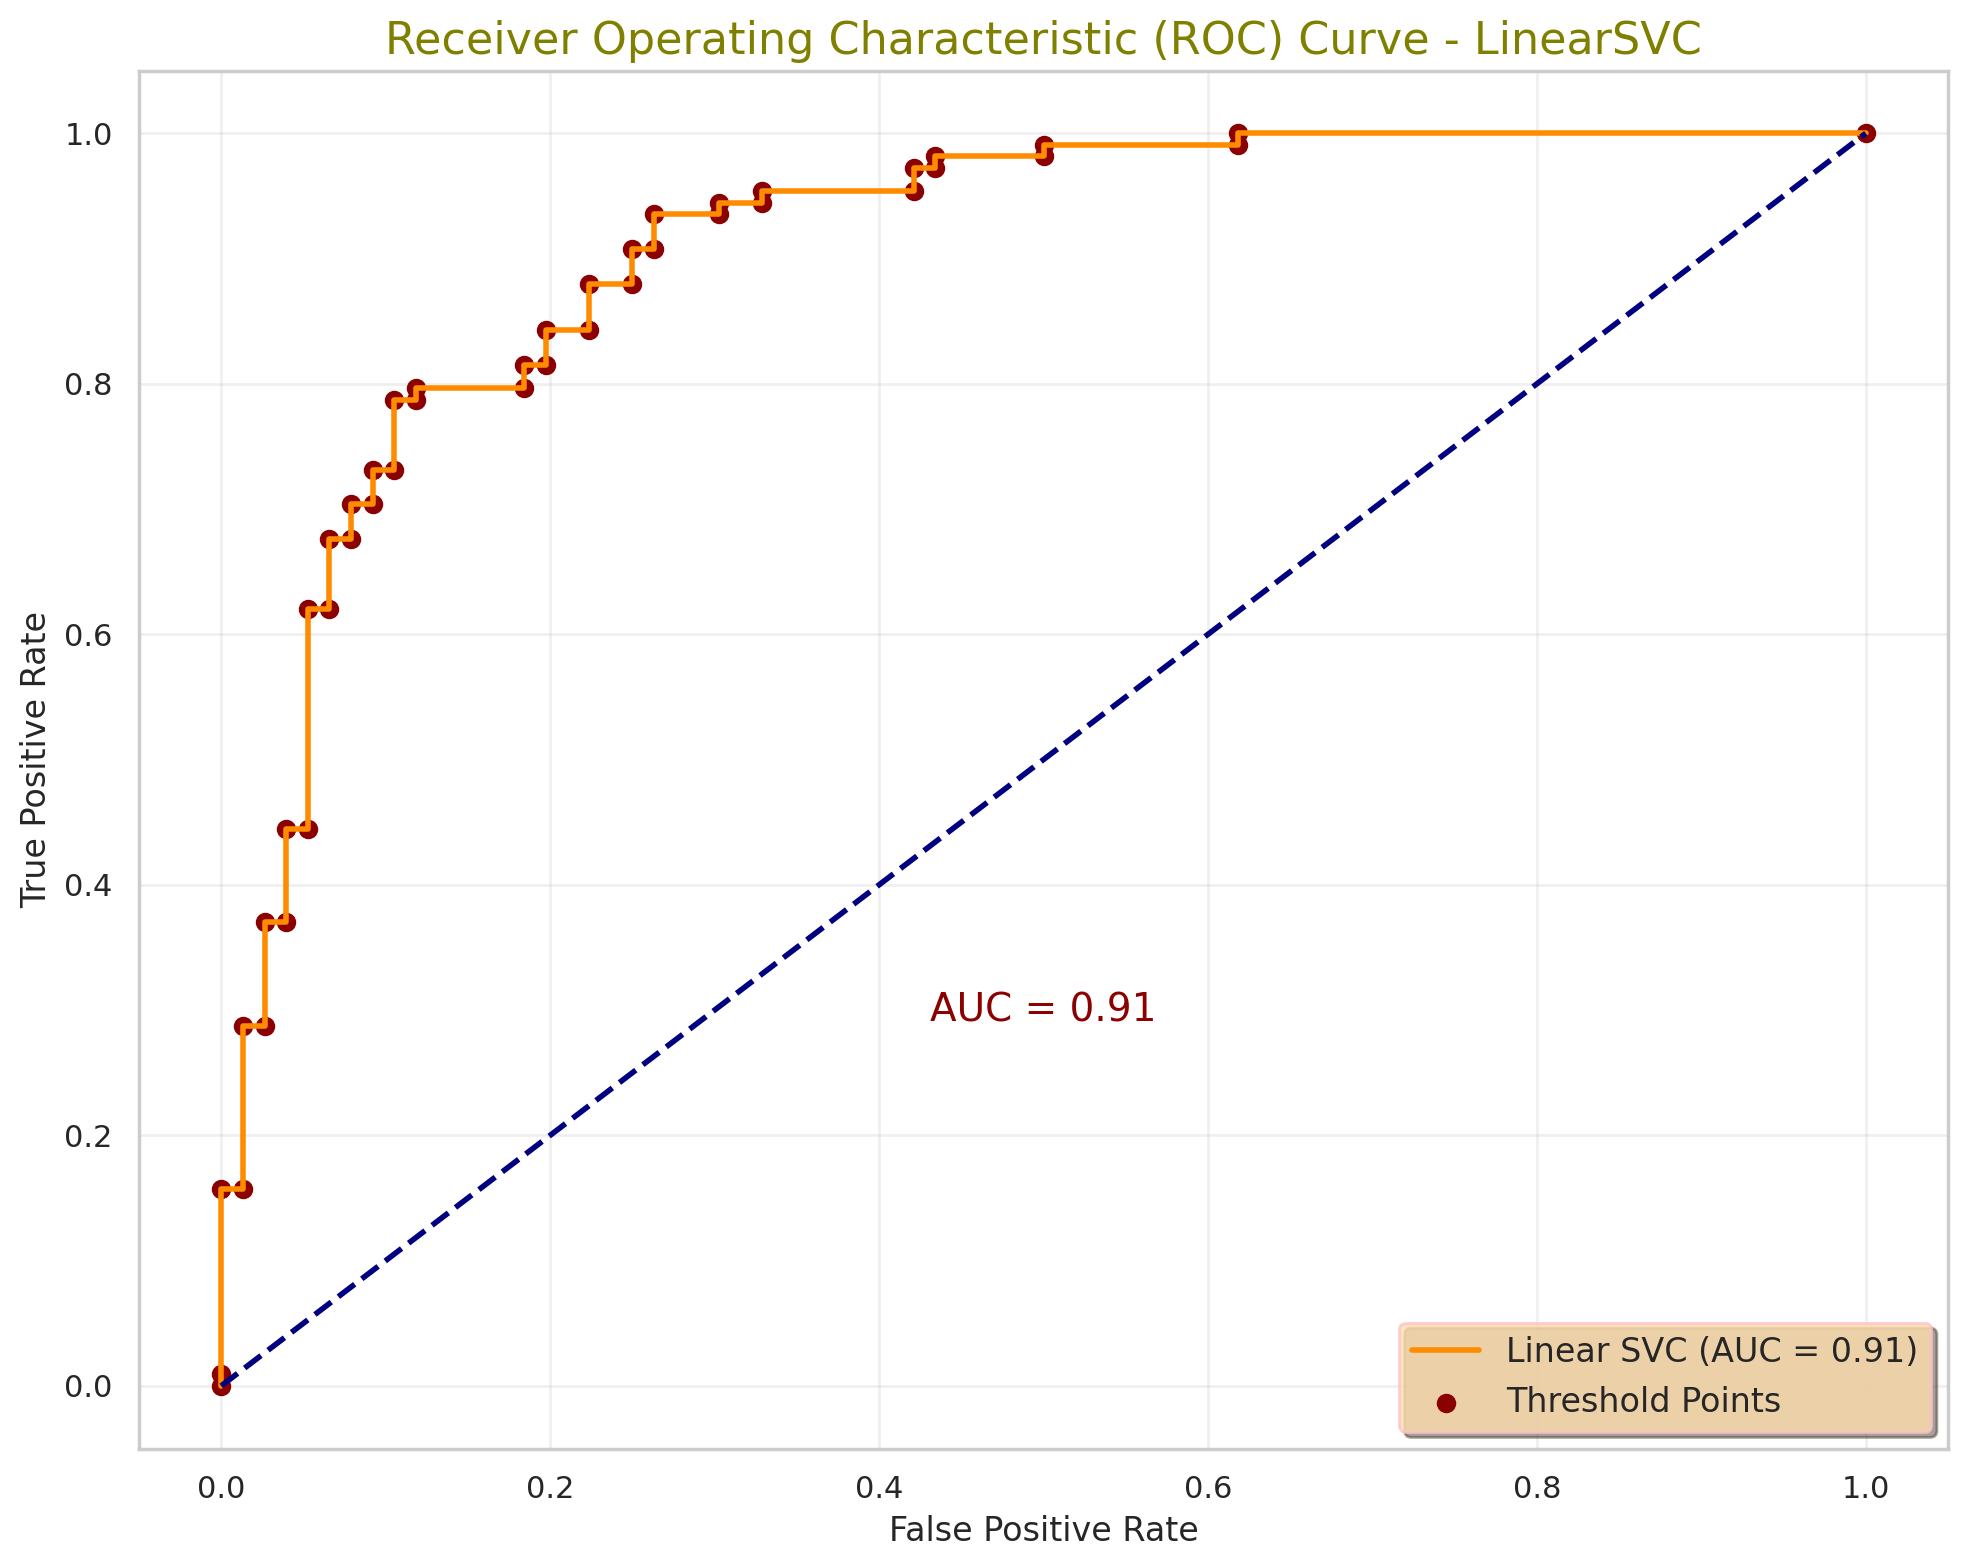

In [94]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming linear_svc is your trained classifier, X_test, and y_test are your test data
y_scores = linear_svc.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve with threshold points
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Linear SVC (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - LinearSVC', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()



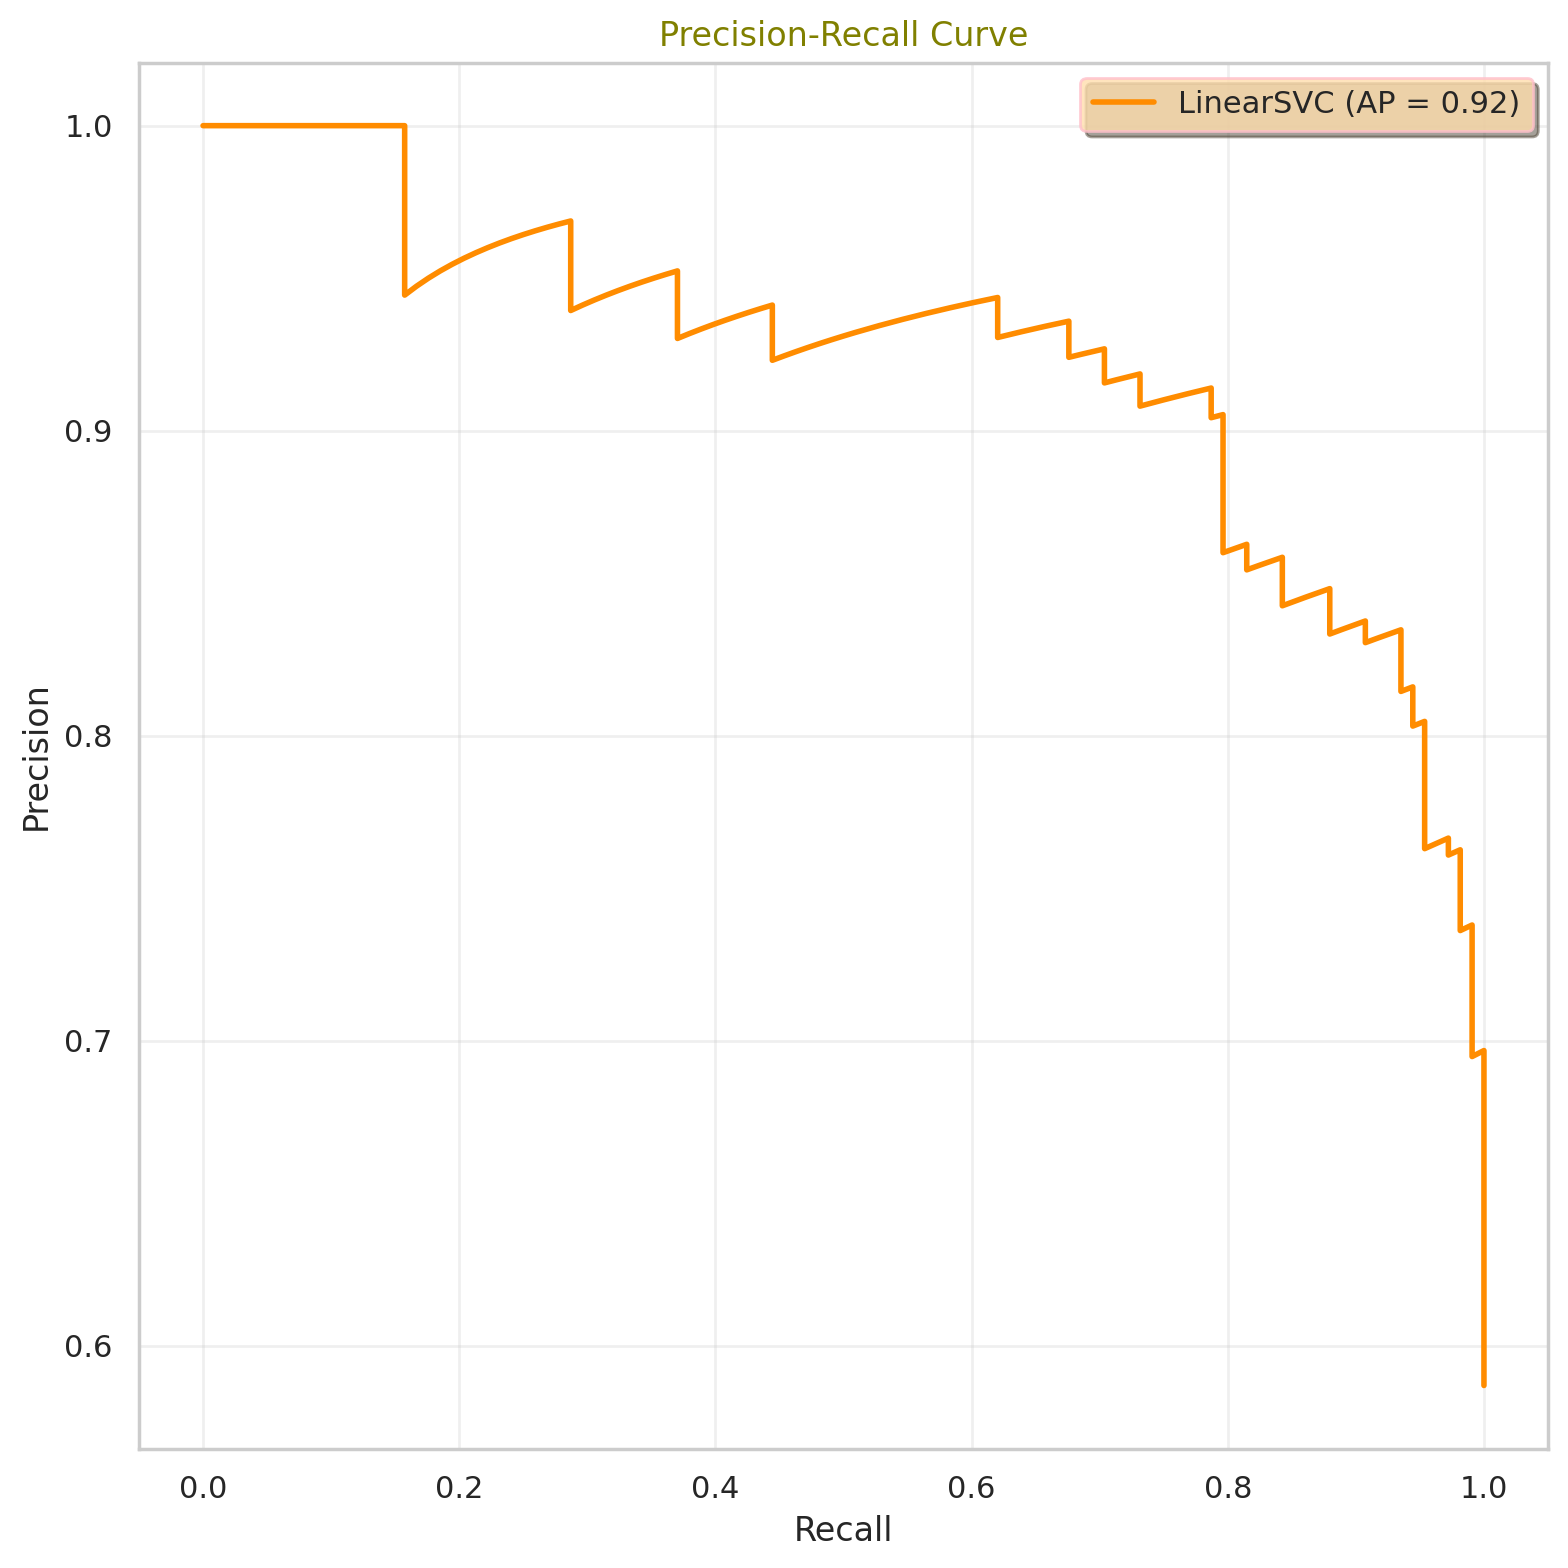

In [95]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming linear_svc is your trained classifier, X_test, and y_test are your test data
y_scores = linear_svc.decision_function(X_test)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='LinearSVC (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [96]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Perform cross-validation
linear_svc_val_score = cross_val_score(estimator=linear_svc, X=X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(np.mean(linear_svc_val_score) * 100))
print("Std. Dev: {:.2f} %".format(np.std(linear_svc_val_score) * 100))

Model Accuracy Score: 84.85 %
Std. Dev: 2.10 %


**(7) STOCHASTIC GRADIENT DESCENT**

***Stochastic Gradient Descent is an optimization algorithm used for training machine learning models. It updates model parameters iteratively, minimizing the cost function by considering one training example at a time.***

In [97]:
# Import necessary libraries
from sklearn.linear_model import SGDClassifier

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)
y_pred_SGD = sgd.predict(X_test)
sgd_train = round(sgd.score(X_train, y_train) * 100, 2)
sgd_accuracy = round(accuracy_score(y_pred_SGD, y_test) * 100, 2)
sgd_f1 = round(f1_score(y_pred_SGD, y_test) * 100, 2)
print("Training Accuracy :",sgd_train,"%")
print("Model Accuracy Score :",sgd_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_SGD))

Training Accuracy : 82.4 %
Model Accuracy Score : 83.15 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.75      0.89      0.81        76
           1       0.91      0.79      0.85       108

    accuracy                           0.83       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.85      0.83      0.83       184



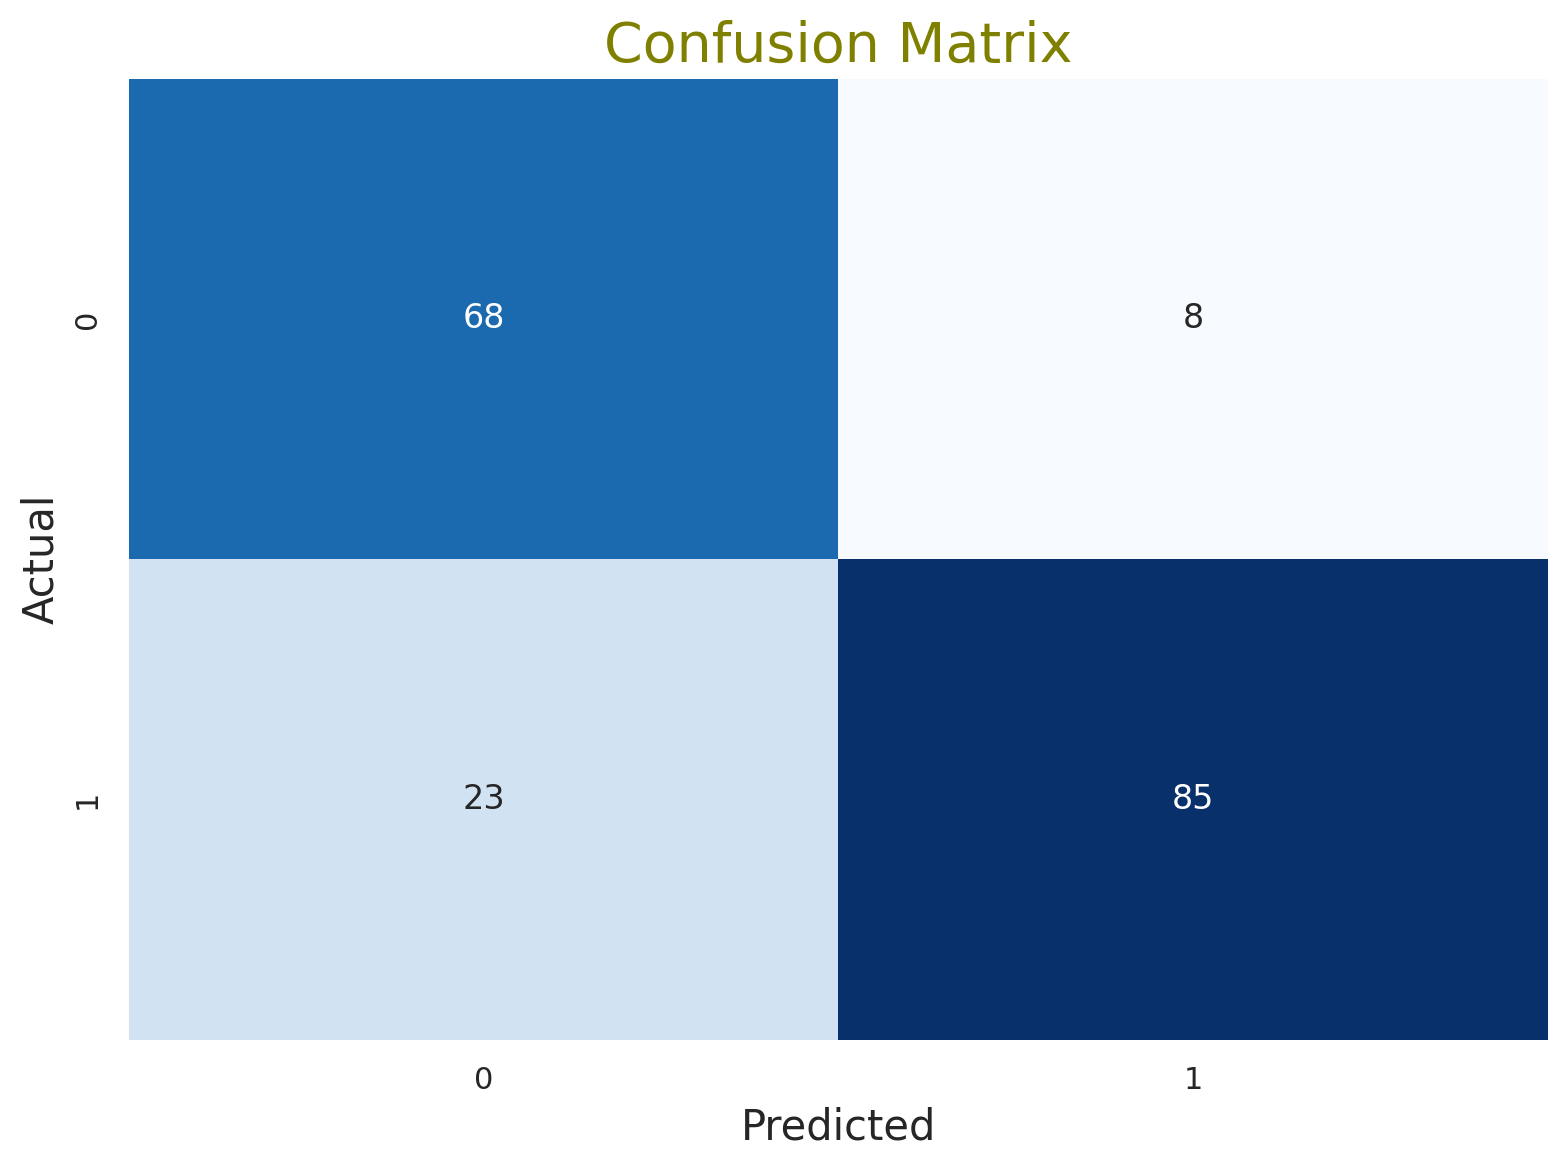

In [98]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming sgd is your trained classifier, X_test, and y_test are your test data
y_pred = sgd.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()


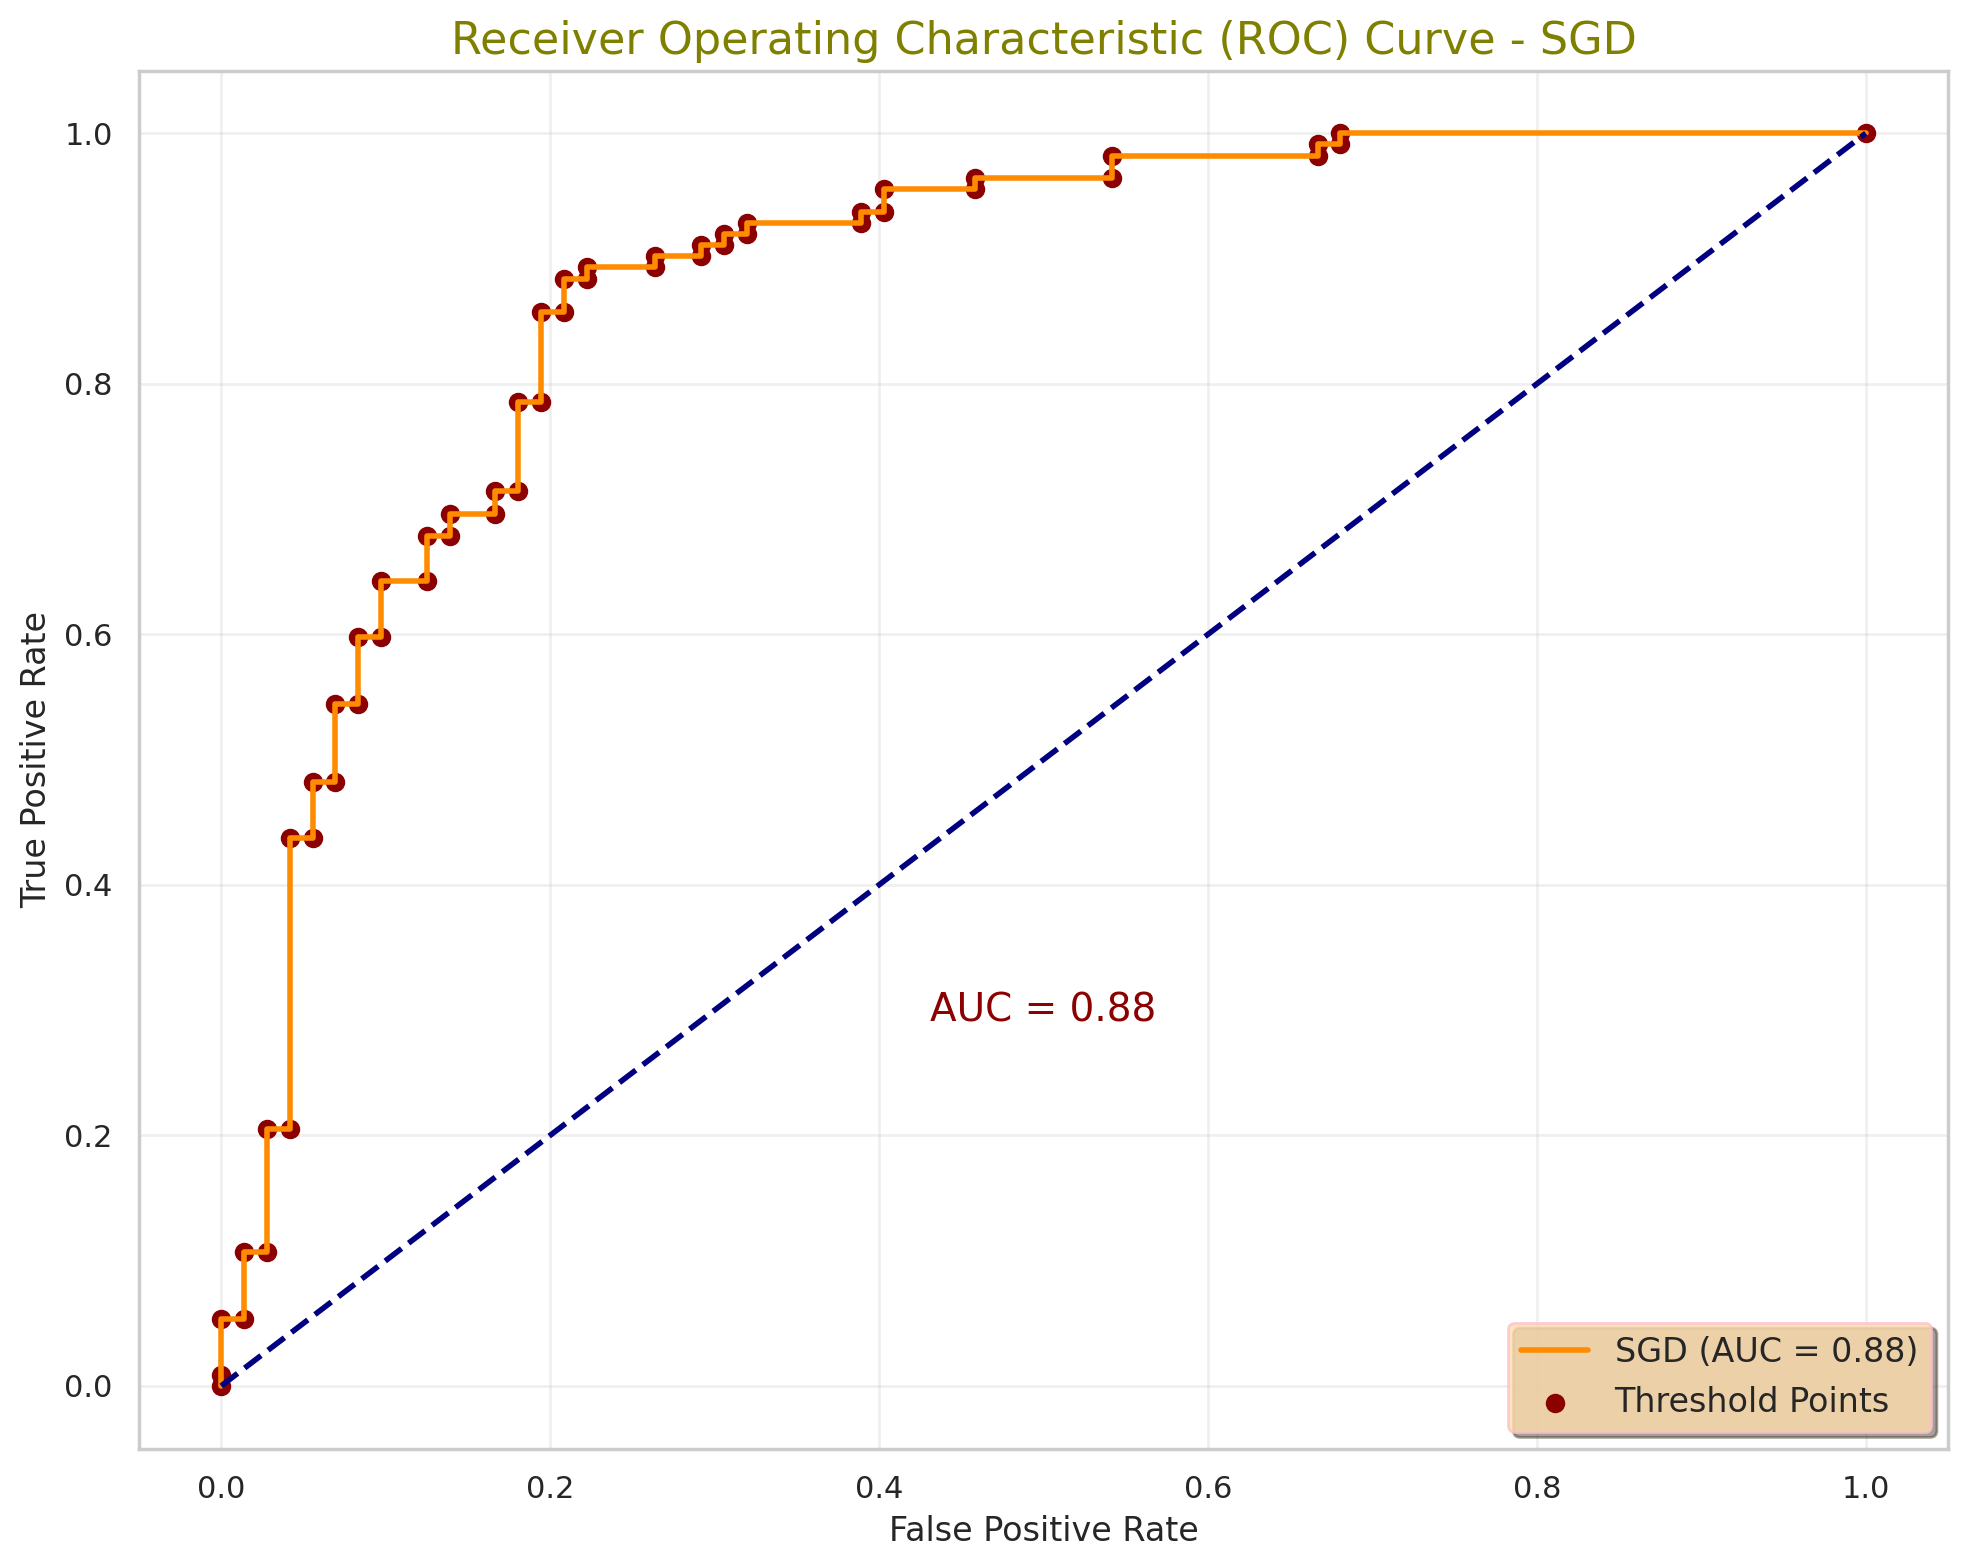

In [99]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDClassifier

# Assuming X and y are your features and target variable
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Stochastic Gradient Descent
sgd = SGDClassifier()
sgd.fit(X_train, y_train)

# Get predicted scores for the positive class
y_scores = sgd.decision_function(X_test)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plot ROC curve with threshold points
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='SGD (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - SGD', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()


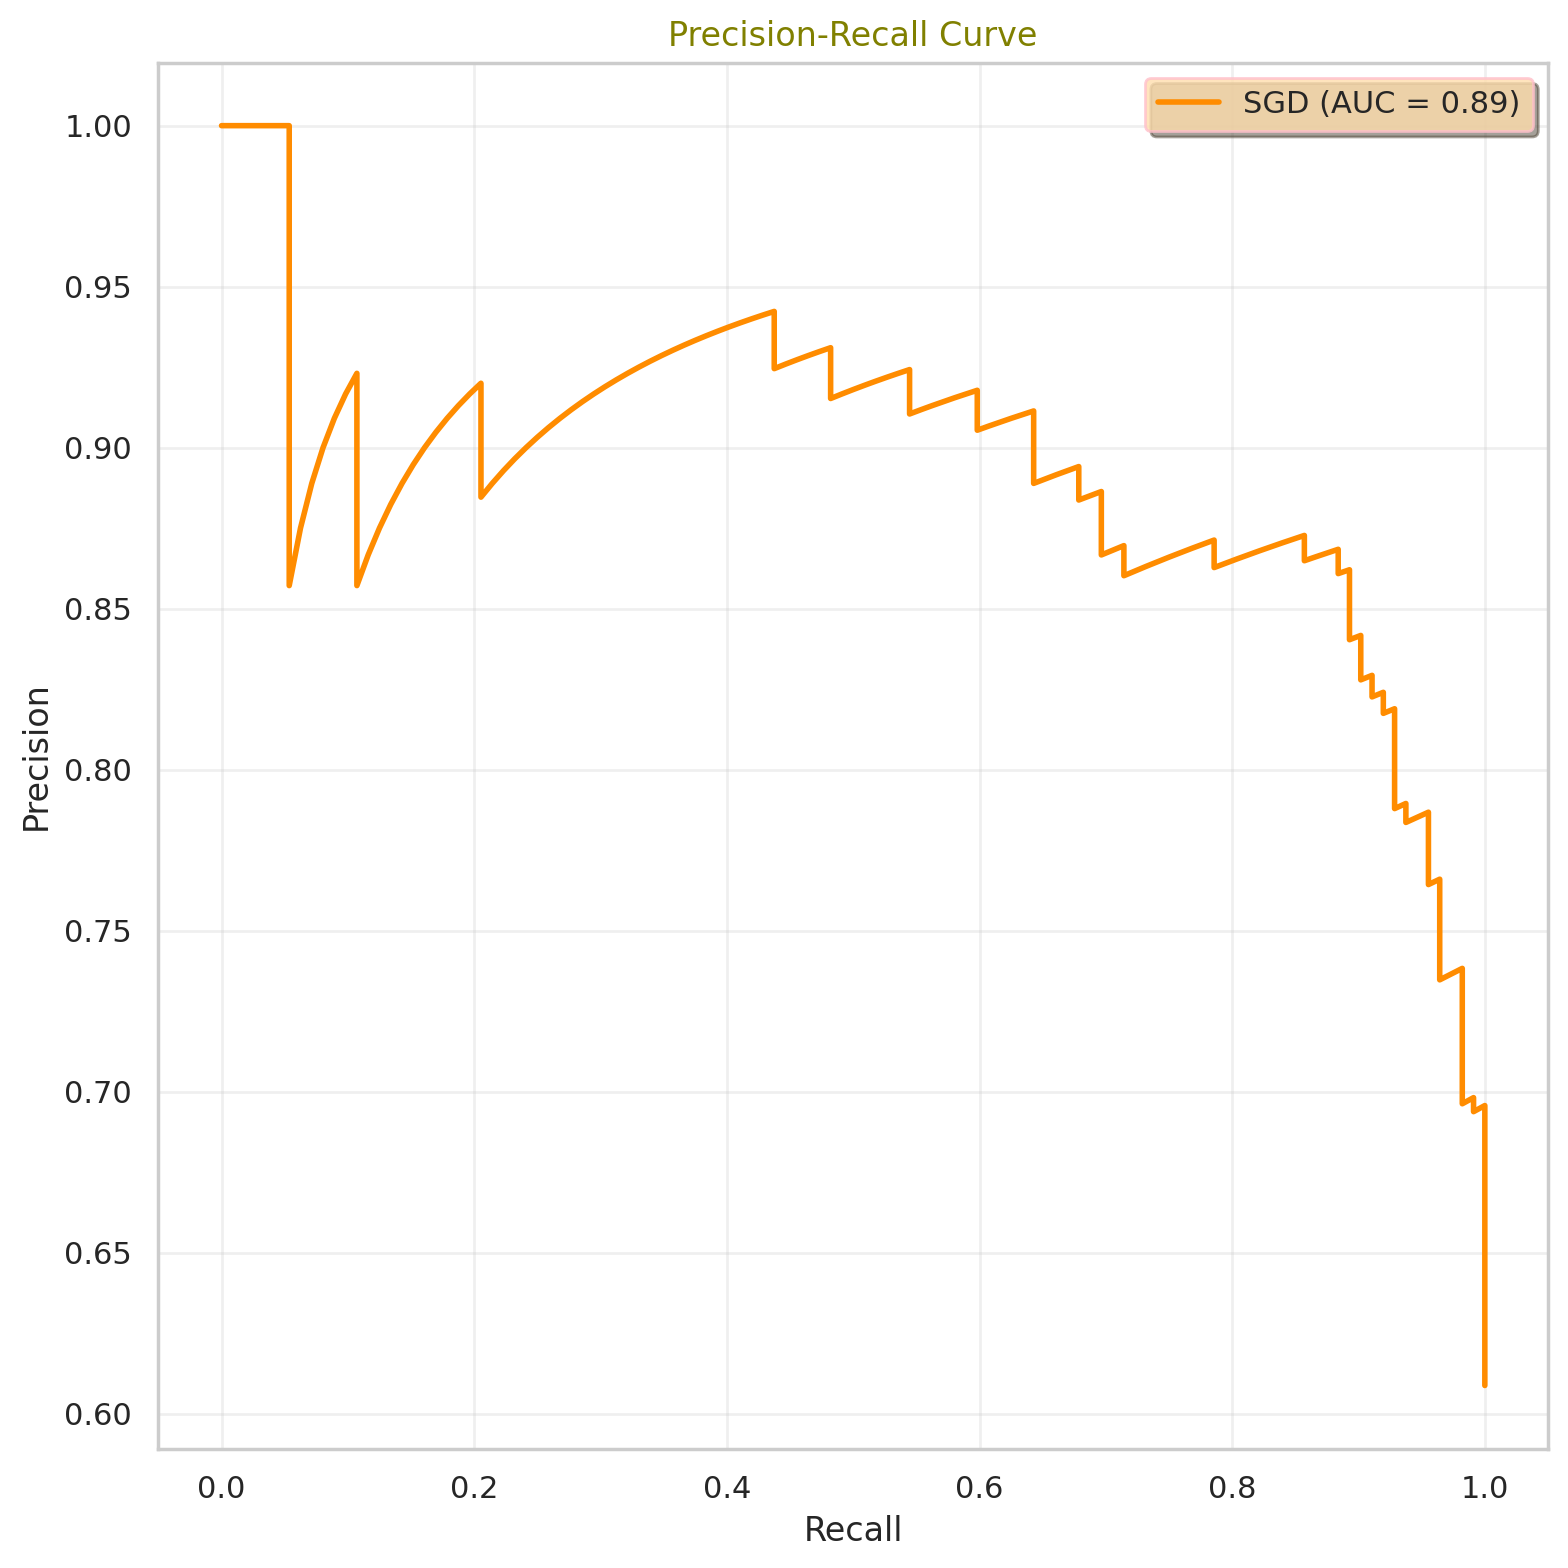

In [100]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming sgd is your trained classifier, X_test, and y_test are your test data
y_scores = sgd.decision_function(X_test)

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='SGD (AUC = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [101]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Perform cross-validation
val_score = cross_val_score(estimator=sgd, X = X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 74.99 %
Std. Dev: 11.75 %


**(8) DECISION TREE**

***Decision Tree is a hierarchical tree structure used for classification and regression. It recursively splits data based on features to make decisions about the target variable.***

In [102]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report

# Decision Tree
decision = DecisionTreeClassifier()
decision.fit(X_train, y_train)

# Predictions
y_pred_Decision = decision.predict(X_test)

# Calculate metrics
decision_train = round(decision.score(X_train, y_train) * 100, 2)
decision_accuracy = round(accuracy_score(y_pred_Decision, y_test) * 100, 2)
decision_f1 = round(f1_score(y_pred_Decision, y_test) * 100, 2)

# Print results
print("Training Accuracy :", decision_train, "%")
print("Model Accuracy Score :", decision_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n", classification_report(y_test, y_pred_Decision))


Training Accuracy : 100.0 %
Model Accuracy Score : 78.8 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.71      0.76      0.74        72
           1       0.84      0.80      0.82       112

    accuracy                           0.79       184
   macro avg       0.78      0.78      0.78       184
weighted avg       0.79      0.79      0.79       184



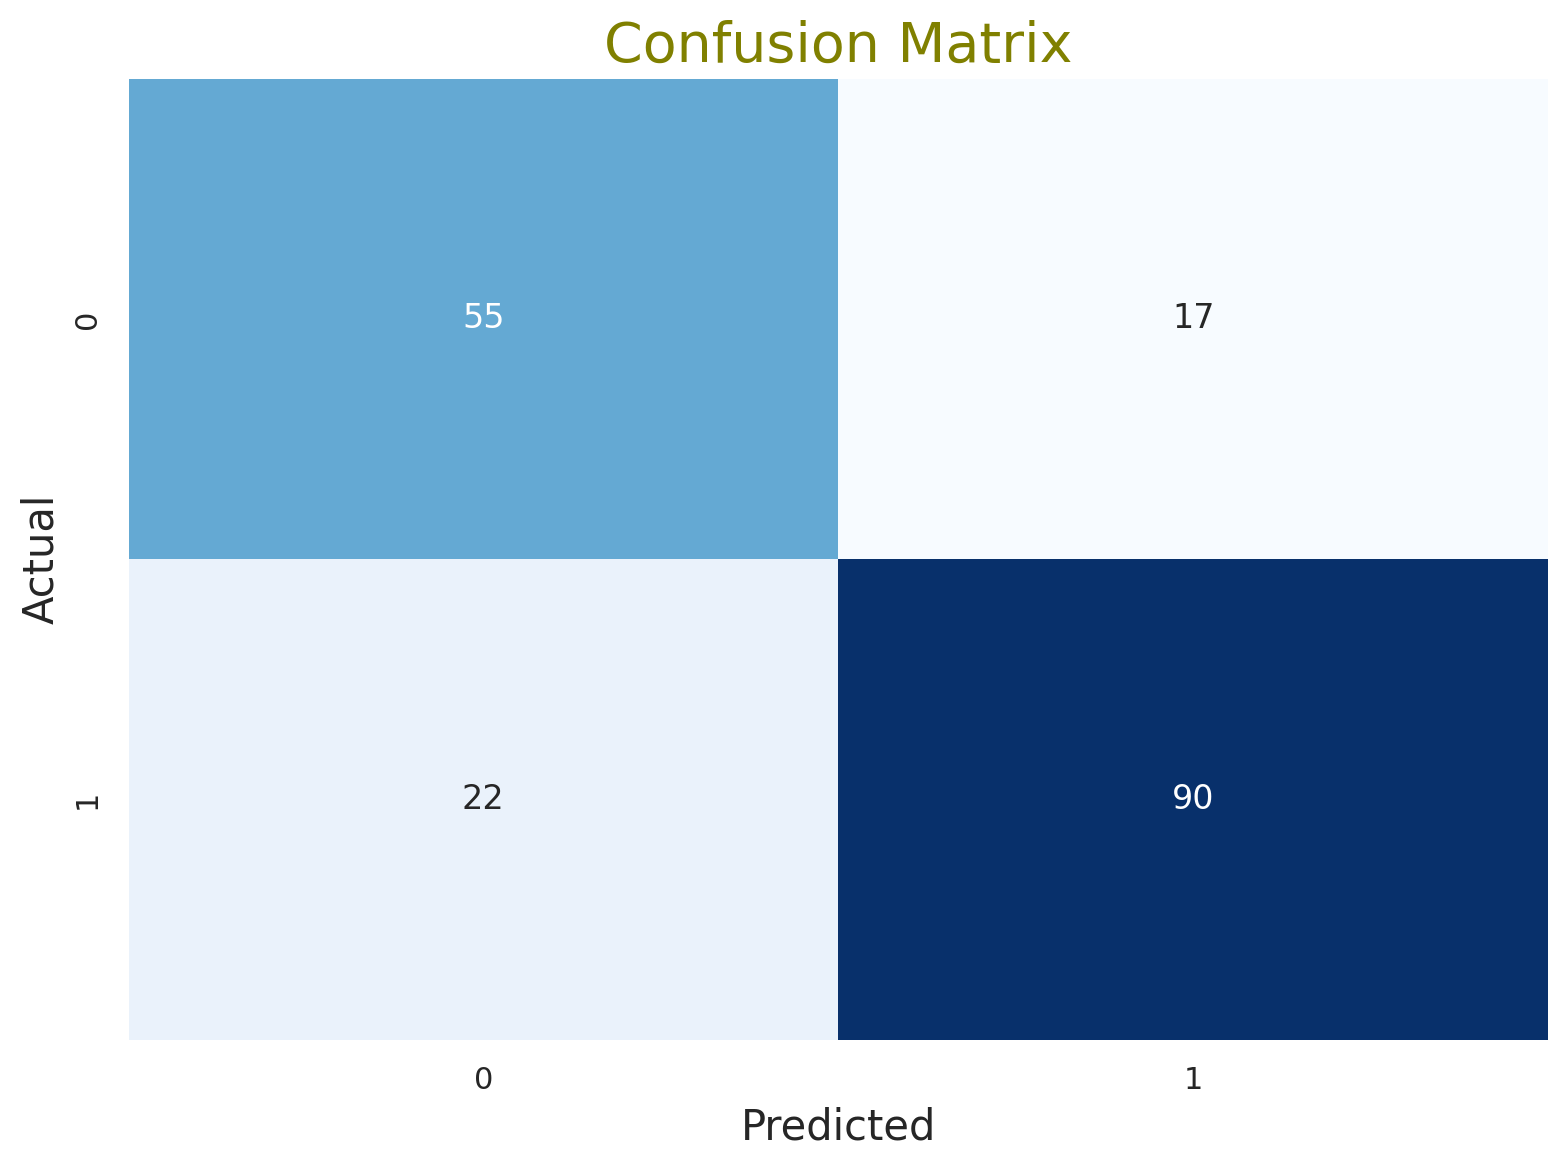

In [103]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming decision is your trained classifier, X_test, and y_test are your test data
y_pred = decision.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()


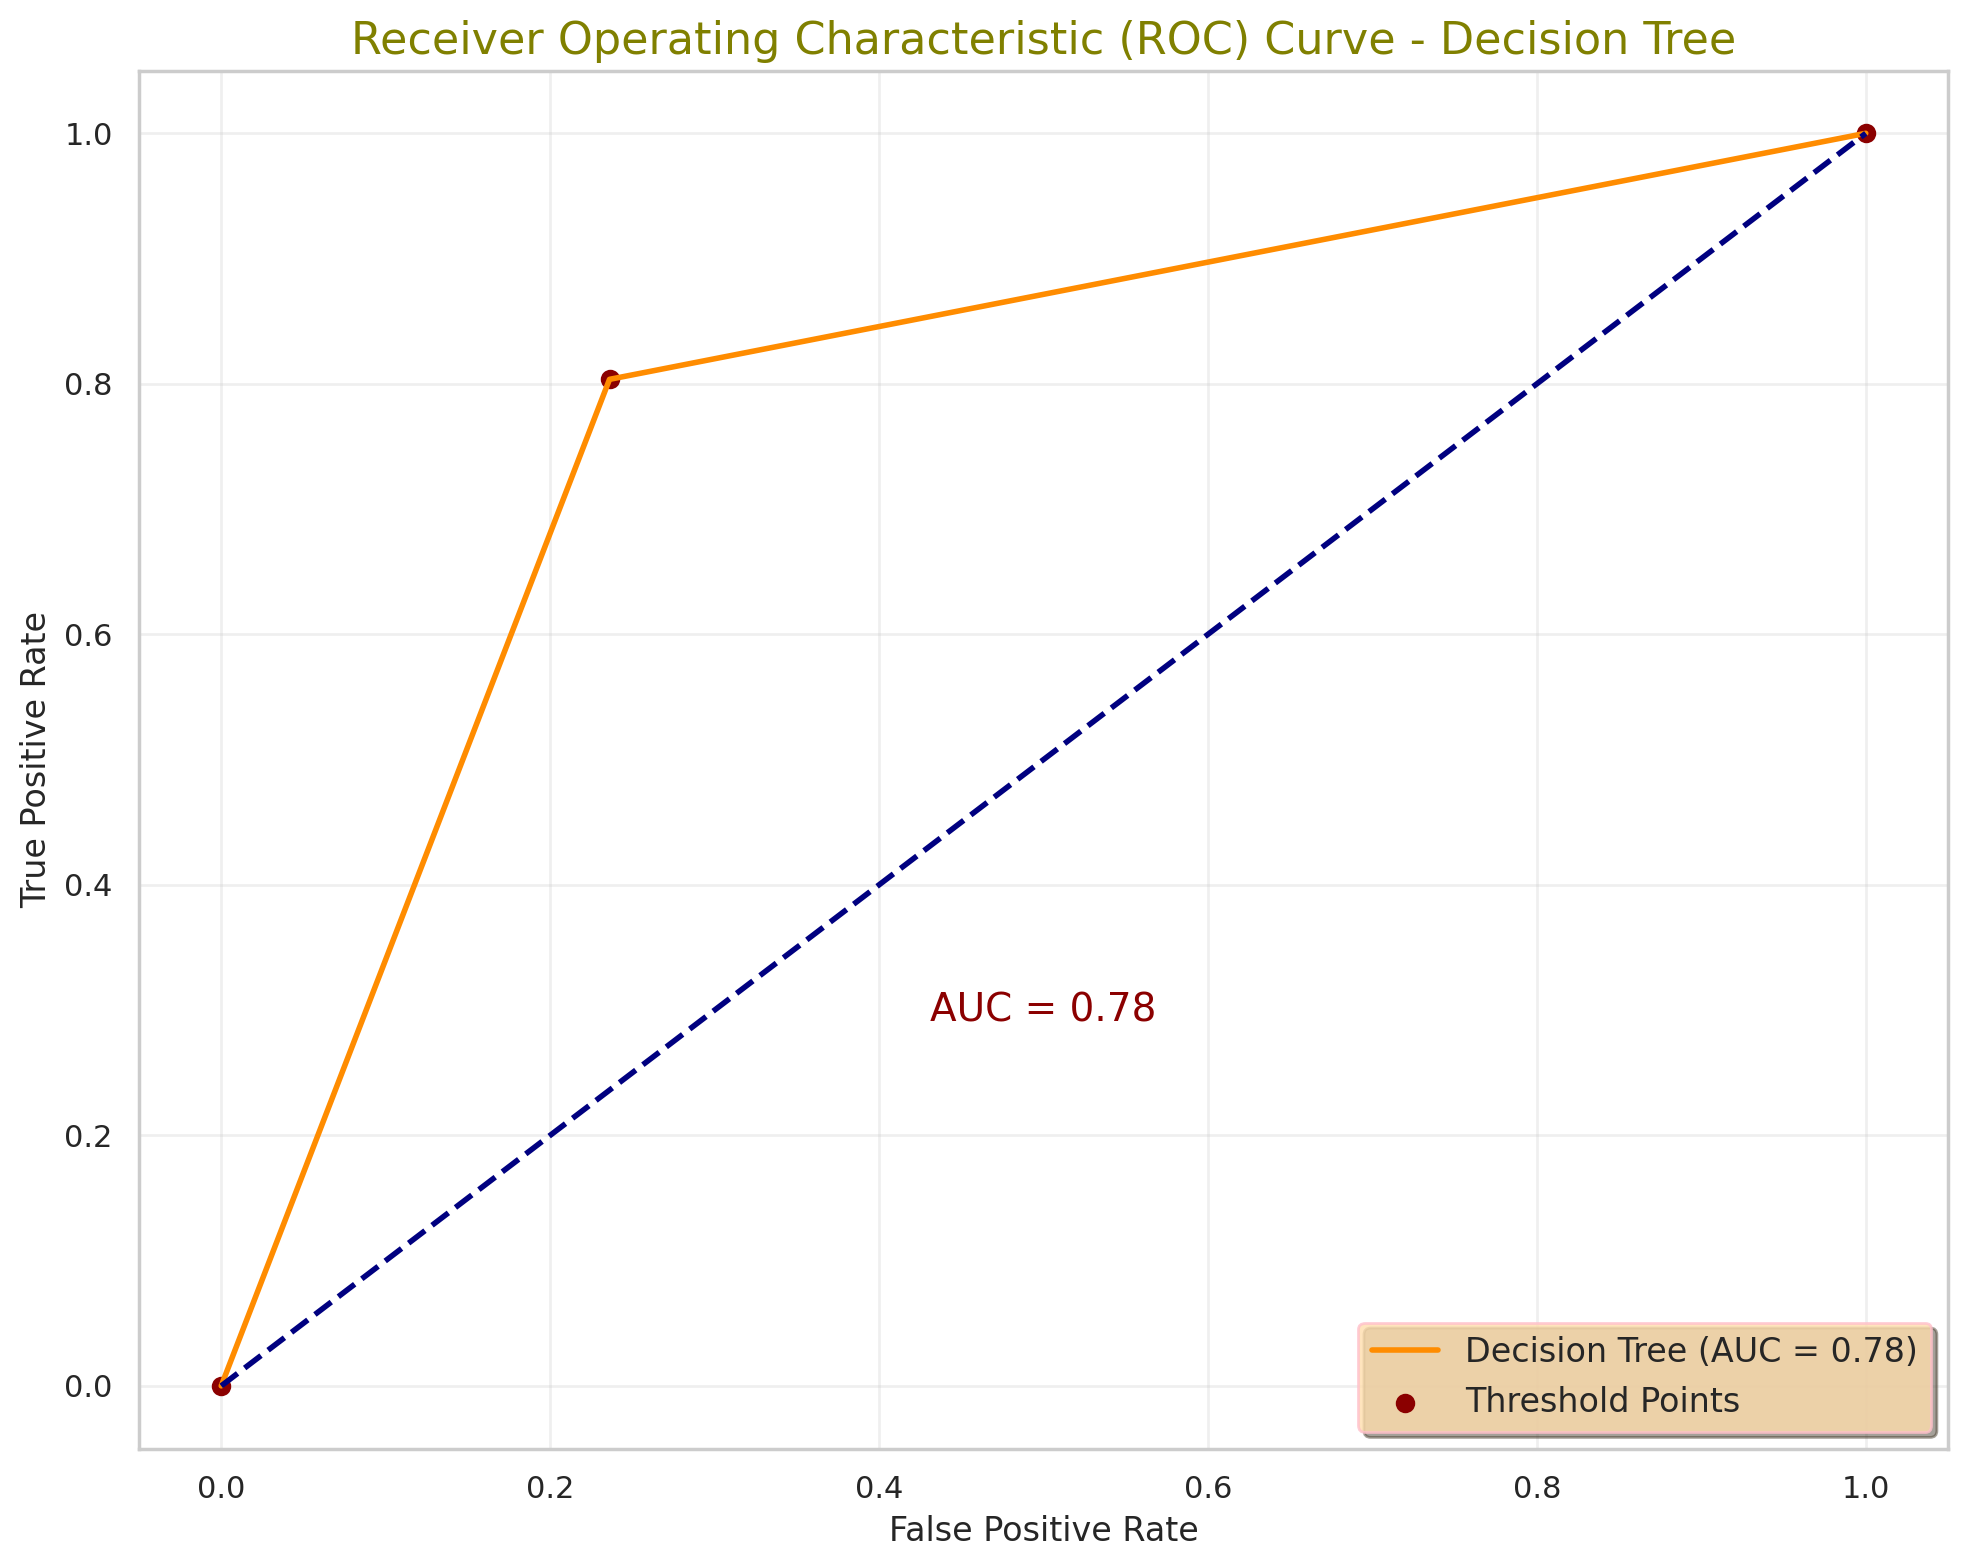

In [104]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming decision is your trained classifier, X_test, and y_test are your test data
y_scores = decision.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area
fpr_decision, tpr_decision, _decision = roc_curve(y_test, y_scores)
roc_auc_decision = auc(fpr_decision, tpr_decision)

# Set a seaborn style
sns.set(style="whitegrid")

# Plotting the ROC curve with colorful aesthetics for Decision Tree
plt.figure(figsize=(10, 8))
plt.plot(fpr_decision, tpr_decision, color='darkorange', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_decision))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr_decision, tpr_decision, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc_decision:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Decision Tree', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()




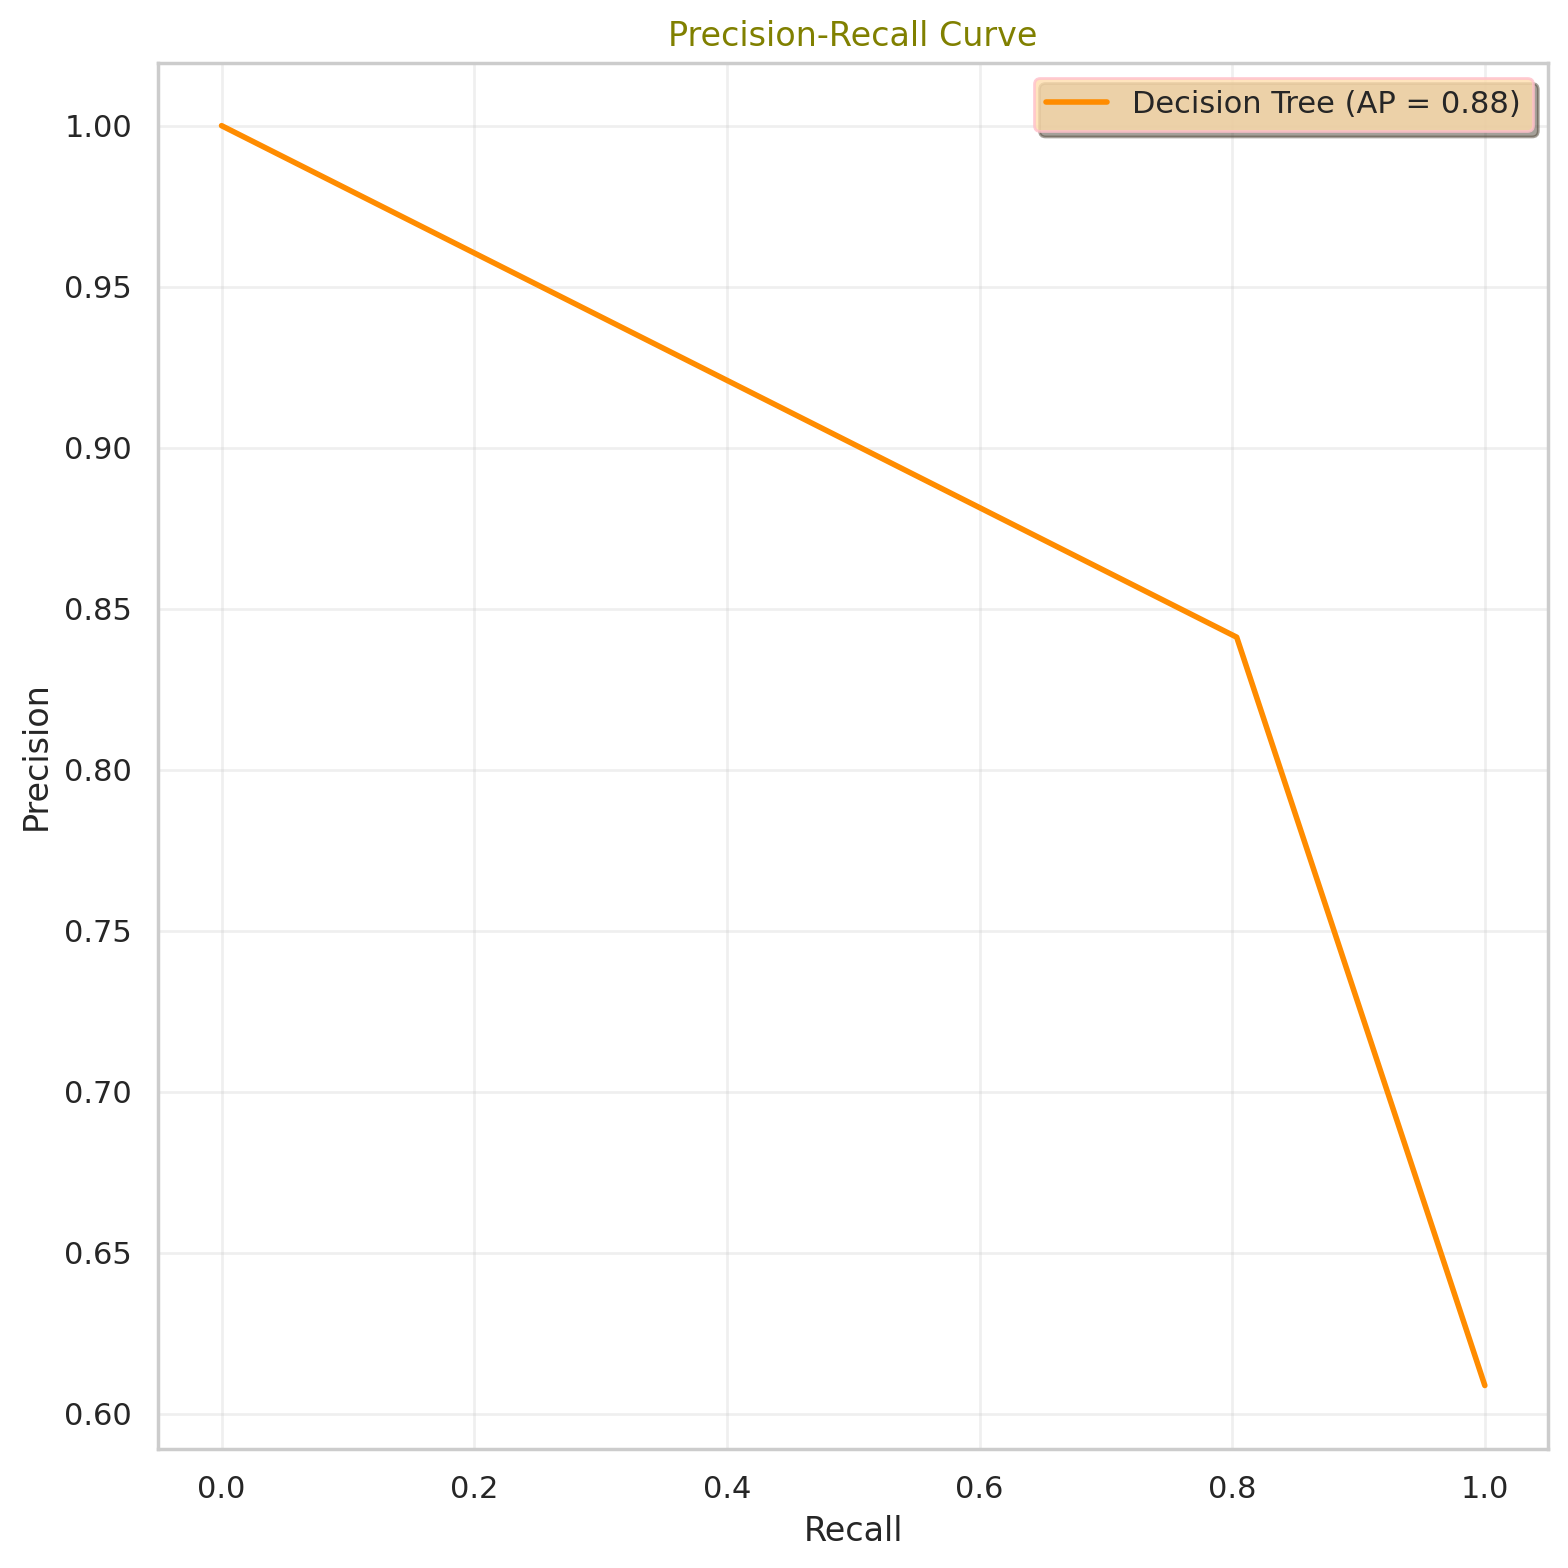

In [105]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming decision is your trained classifier, X_test, and y_test are your test data
y_scores = decision.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Decision Tree (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [106]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Perform cross-validation
val_score = cross_val_score(estimator=decision, X = X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 79.39 %
Std. Dev: 3.33 %


**(9) RANDOM FOREST**

***Random Forest is an ensemble learning method that builds multiple decision trees during training and merges their predictions to improve accuracy and control overfitting.***

In [107]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score, f1_score, classification_report
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score

# Training the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=100)
random_forest.fit(X_train, y_train)

# Predictions on the test set
y_pred_random = random_forest.predict(X_test)

# Training accuracy, model accuracy score, and F1 score
random_forest_train = round(random_forest.score(X_train, y_train) * 100, 2)
random_forest_accuracy = round(accuracy_score(y_pred_random, y_test) * 100, 2)
random_forest_f1 = round(f1_score(y_pred_random, y_test) * 100, 2)

# Print results
print("Training Accuracy :", random_forest_train, "%")
print("Model Accuracy Score :", random_forest_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification Report: \n", classification_report(y_test, y_pred_random))

Training Accuracy : 99.86 %
Model Accuracy Score : 84.78 %
--------------------------------------------------------
Classification Report: 
               precision    recall  f1-score   support

           0       0.79      0.83      0.81        72
           1       0.89      0.86      0.87       112

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



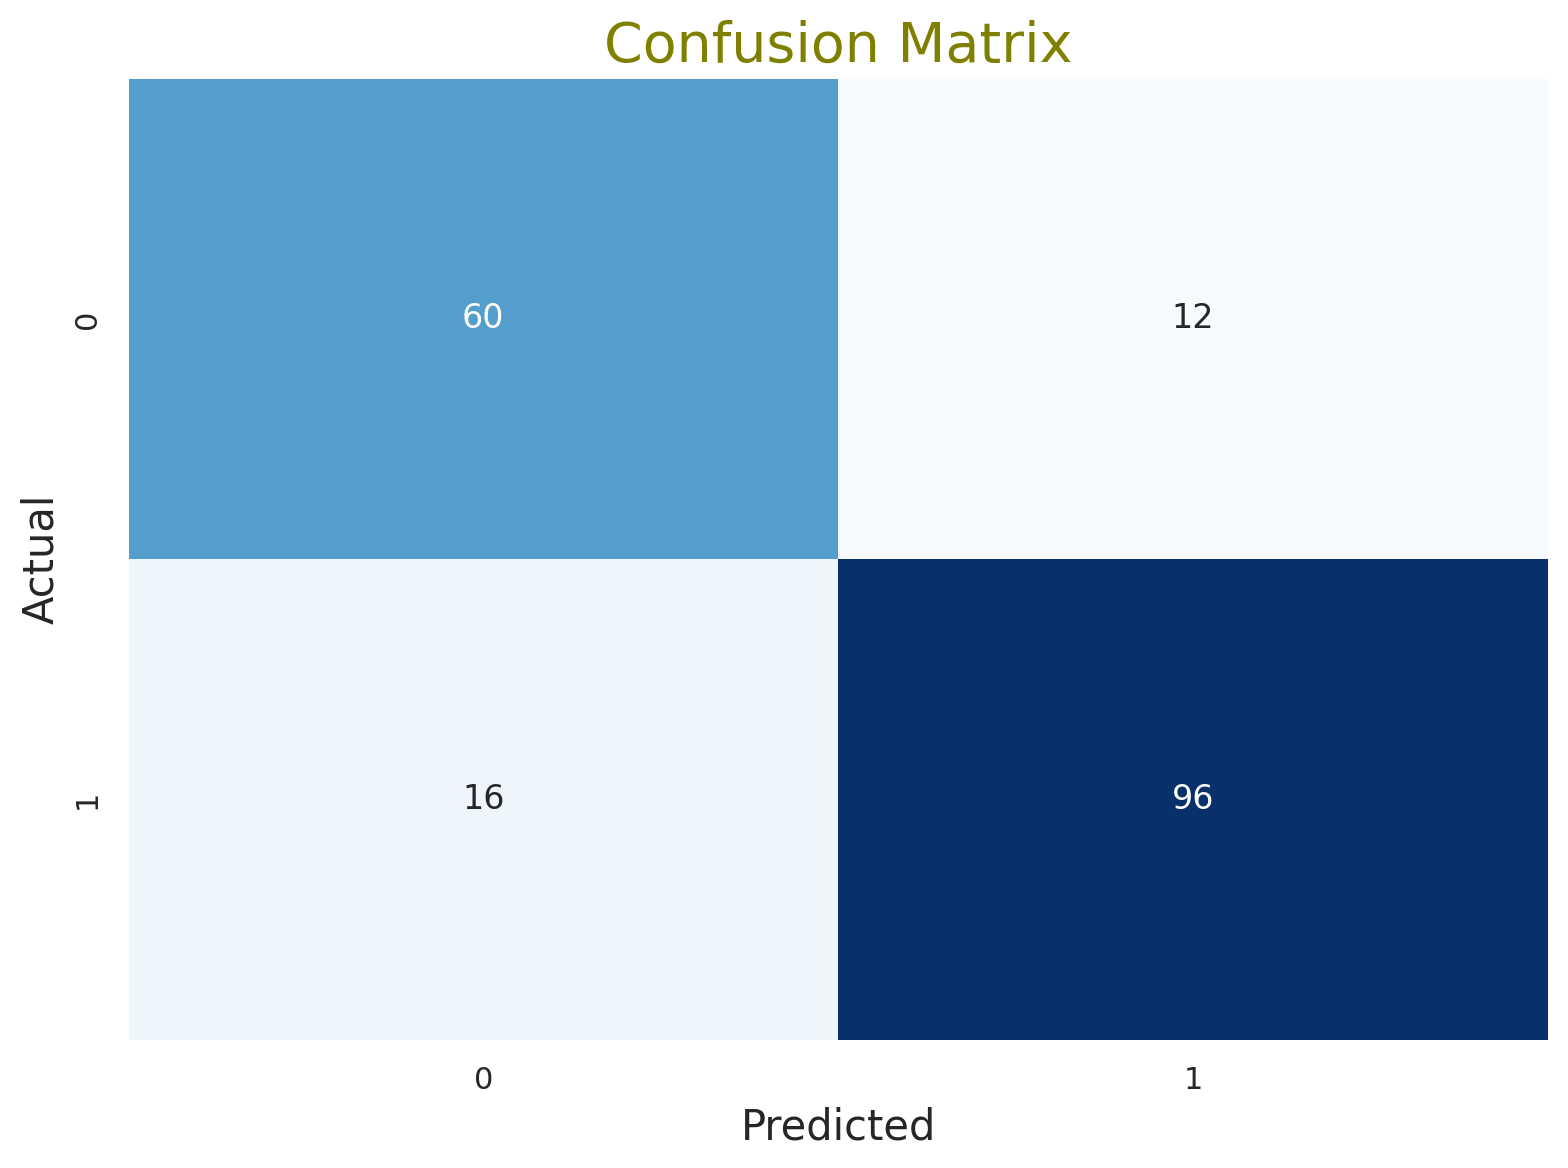

In [108]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming random_forest is your trained classifier, X_test, and y_test are your test data
y_pred = random_forest.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()

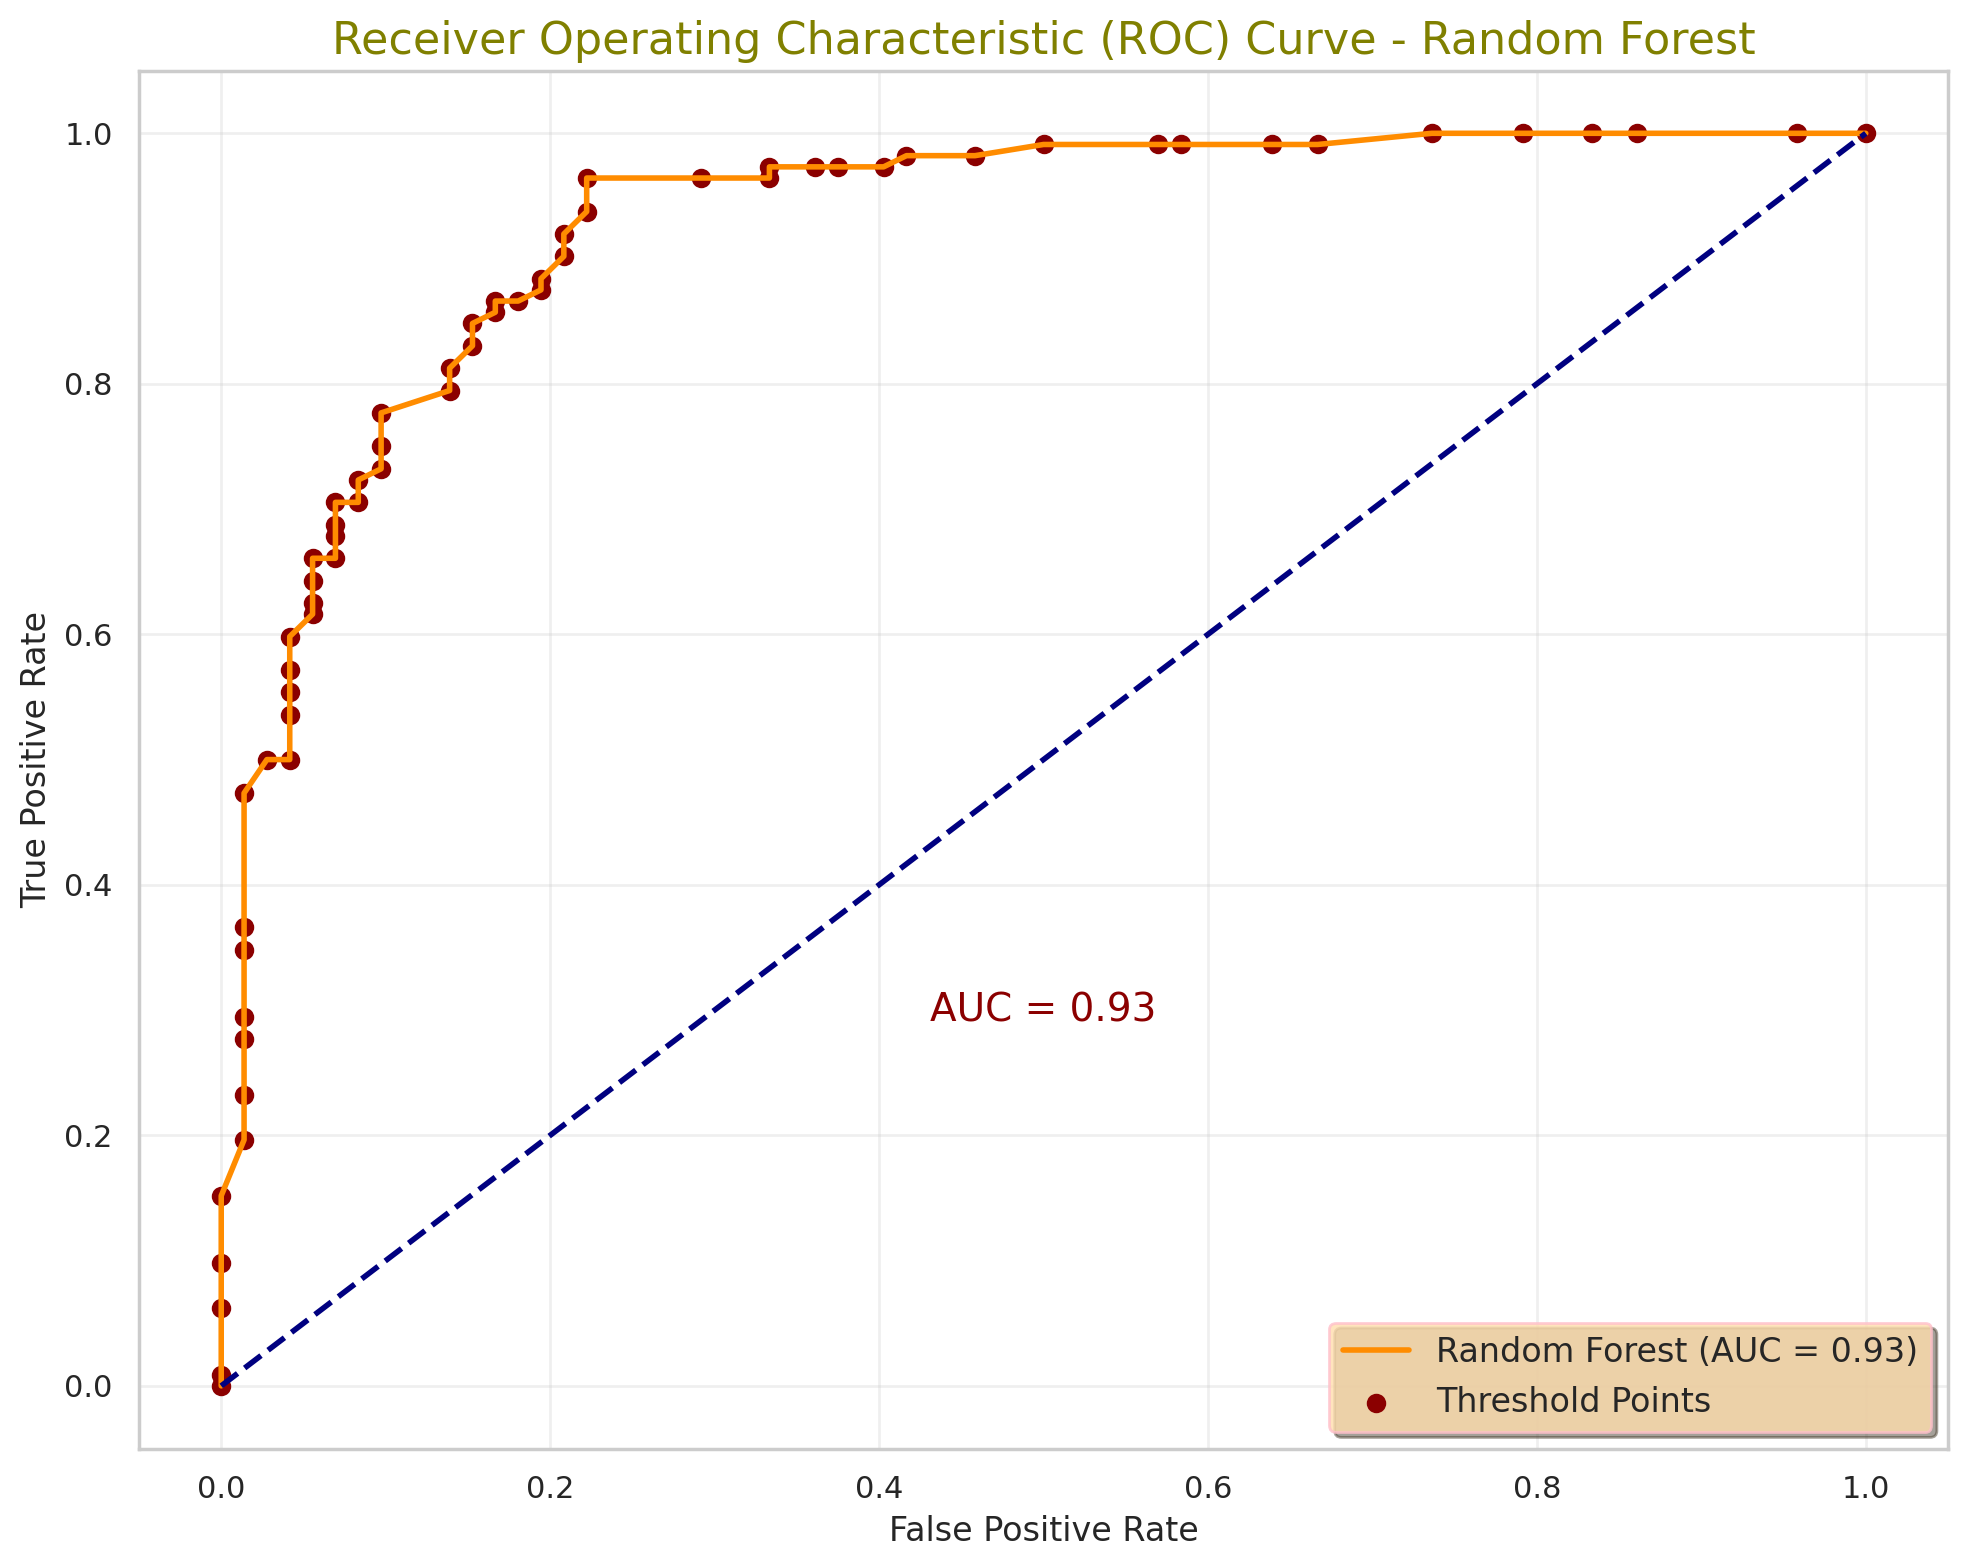

In [109]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming random_forest is your trained classifier, X_test, and y_test are your test data
y_scores = random_forest.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with colorful aesthetics for Random Forest
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - Random Forest', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

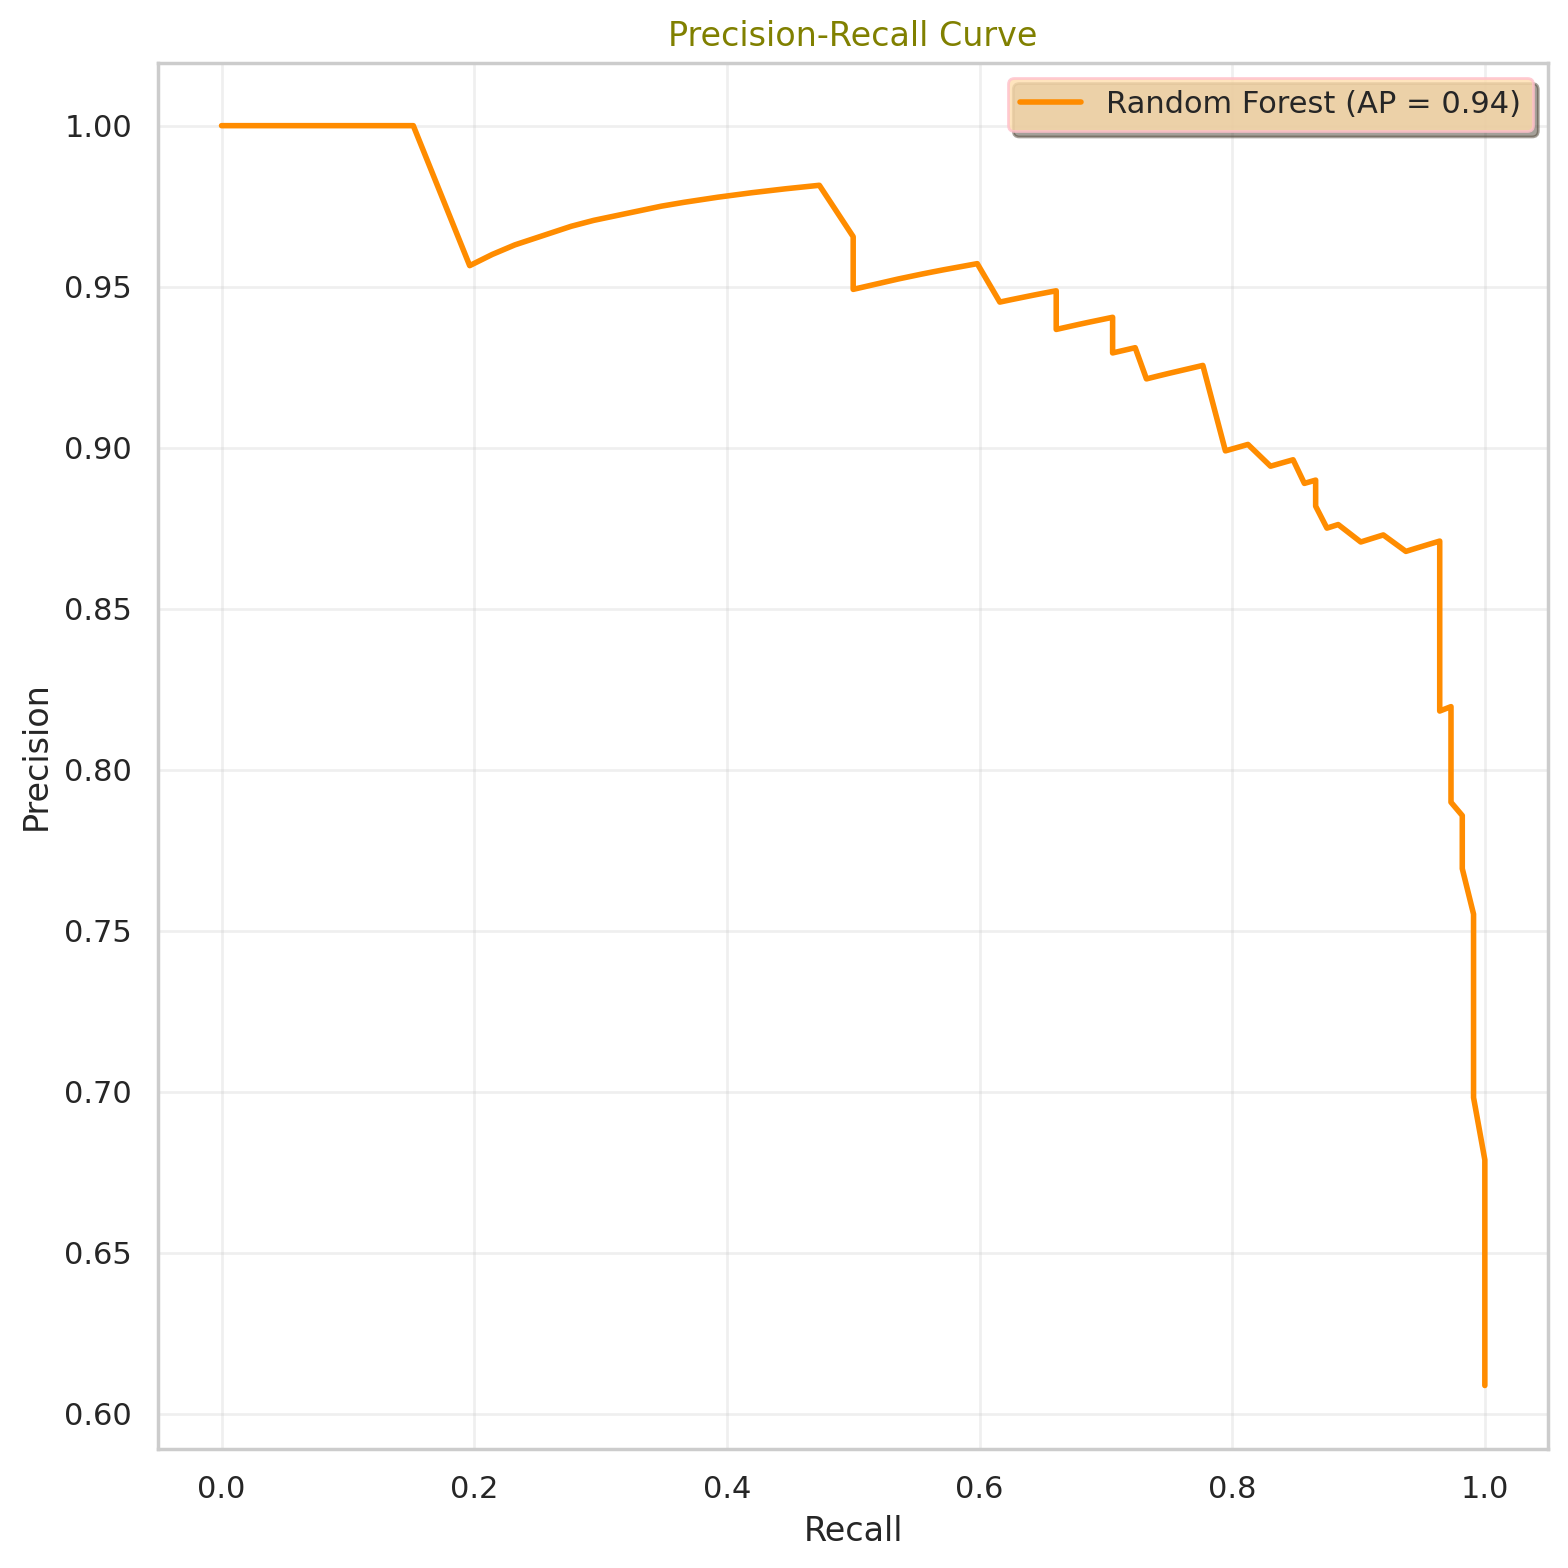

In [110]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming random_forest is your trained classifier, X_test, and y_test are your test data
y_scores = random_forest.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='Random Forest (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [111]:
# Import necessary libraries
from sklearn.model_selection import cross_val_score

# Perform cross-validation
val_score = cross_val_score(estimator=random_forest, X = X_train, y=y_train, cv=10)

# Print the mean accuracy score and standard deviation
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 85.25 %
Std. Dev: 4.08 %


**(10) MLP CLASSIFIER**

***Multilayer Perceptron is a type of artificial neural network with multiple layers of nodes (neurons). It's used for various tasks, including classification and regression***

In [112]:
# MLPClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.model_selection import cross_val_score
import numpy as np

# Initialize MLPClassifier
mlp = MLPClassifier()

# Train the model
mlp.fit(X_train, y_train)

# Make predictions on the test set
y_pred_MLP = mlp.predict(X_test)

# Calculate training accuracy, model accuracy score, and F1 score
mlp_train = round(mlp.score(X_train, y_train) * 100, 2)
mlp_accuracy = round(accuracy_score(y_pred_MLP, y_test) * 100, 2)
mlp_f1 = round(f1_score(y_pred_MLP, y_test) * 100, 2)

# Display training accuracy and model accuracy score
print("Training Accuracy:", mlp_train, "%")
print("Model Accuracy Score:", mlp_accuracy, "%")
print("\033[1m--------------------------------------------------------\033[0m")

# Display classification report
print("Classification_Report: \n", classification_report(y_test, y_pred_MLP))

Training Accuracy: 85.81 %
Model Accuracy Score: 82.61 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.75      0.83      0.79        72
           1       0.88      0.82      0.85       112

    accuracy                           0.83       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.83      0.83       184



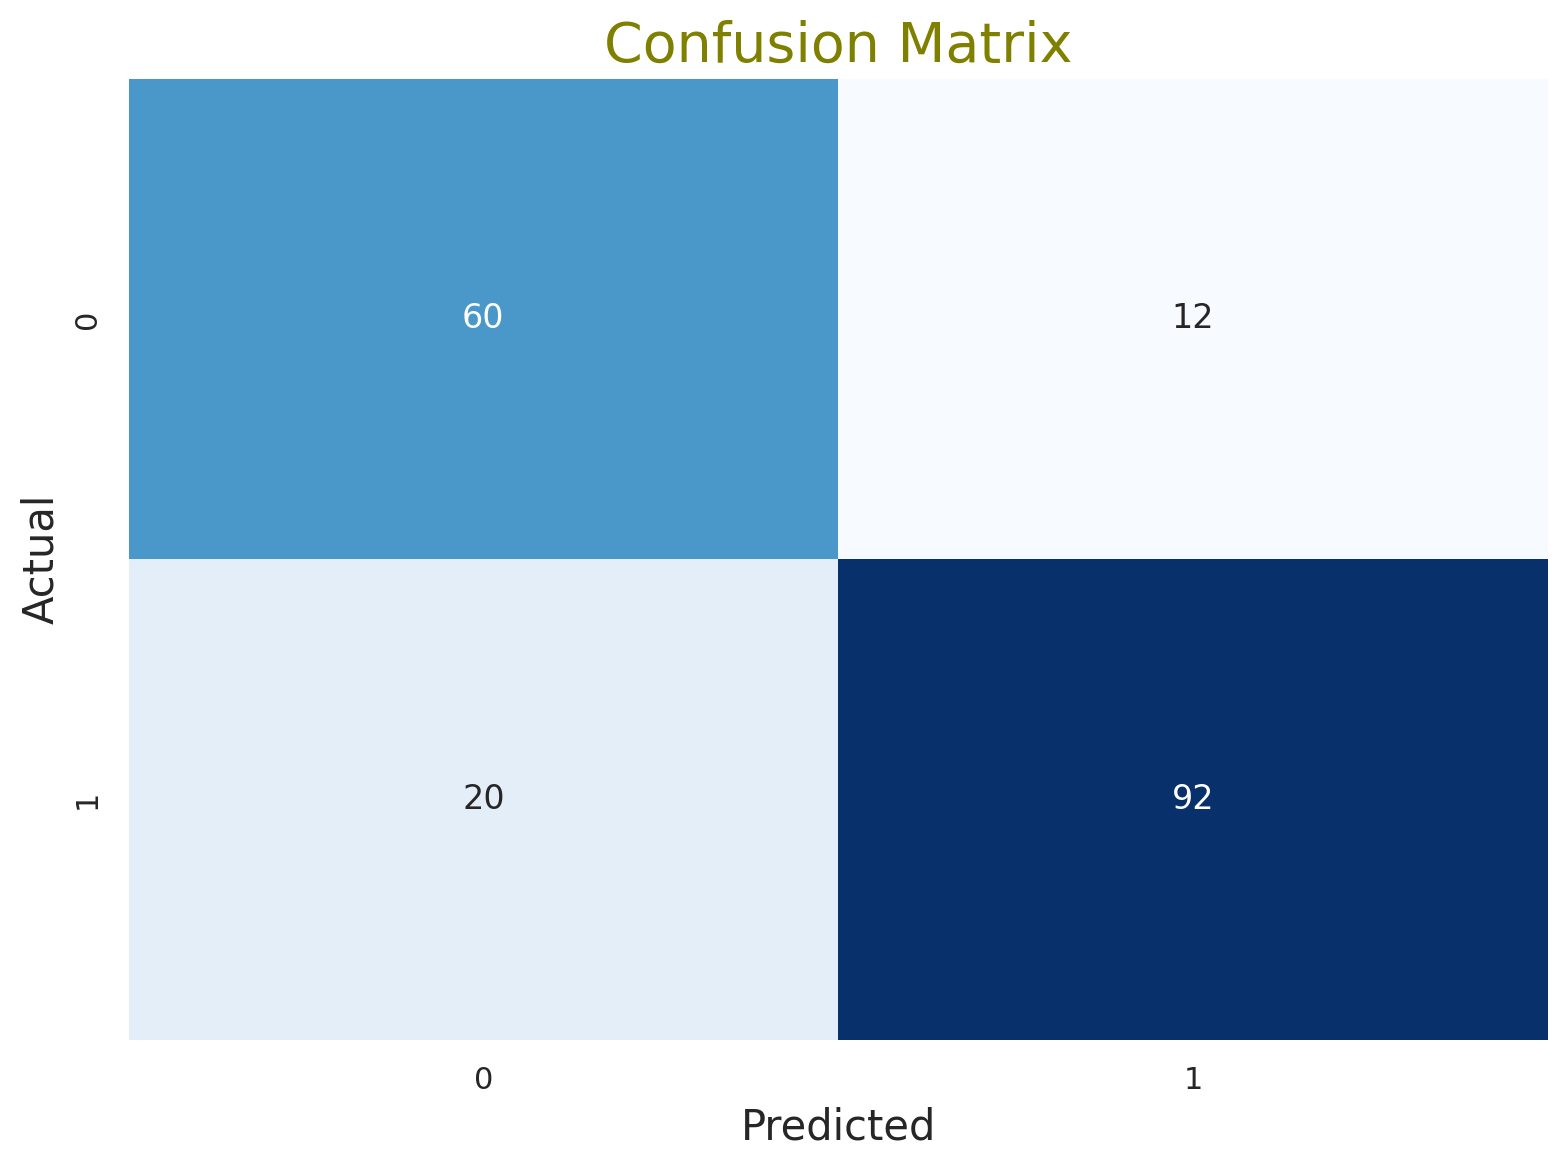

In [113]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming mlp is your trained classifier, X_test, and y_test are your test data
y_pred = mlp.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()


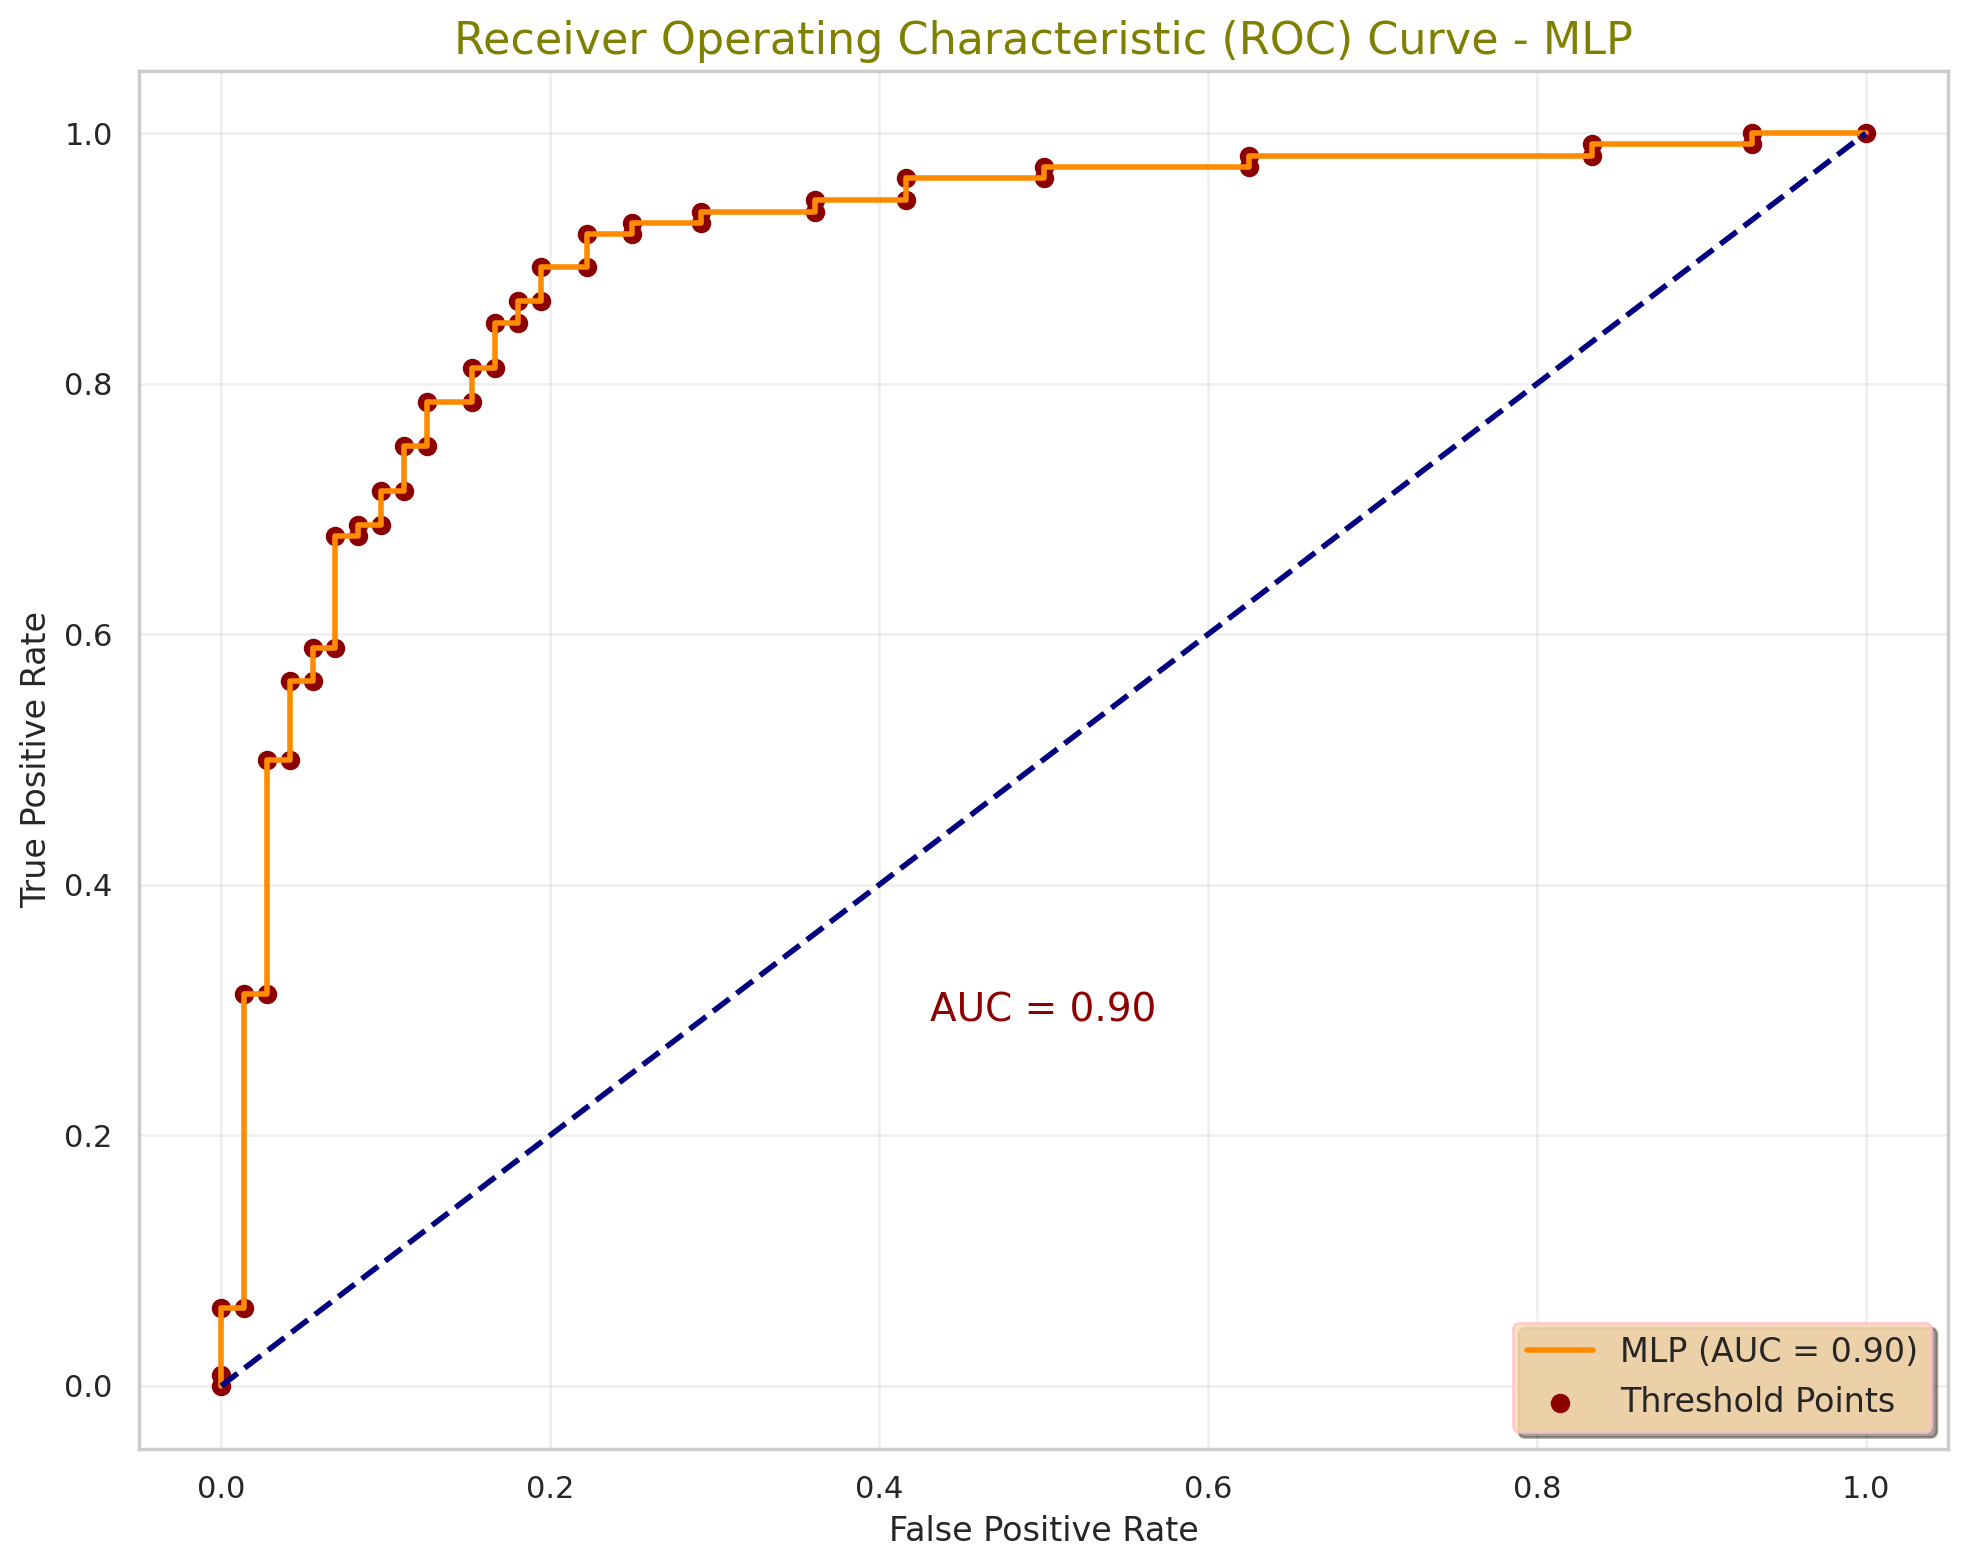

In [114]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming mlp is your trained classifier, X_test, and y_test are your test data
y_scores = mlp.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with colorful aesthetics for MLP Classifier
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='MLP (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - MLP', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

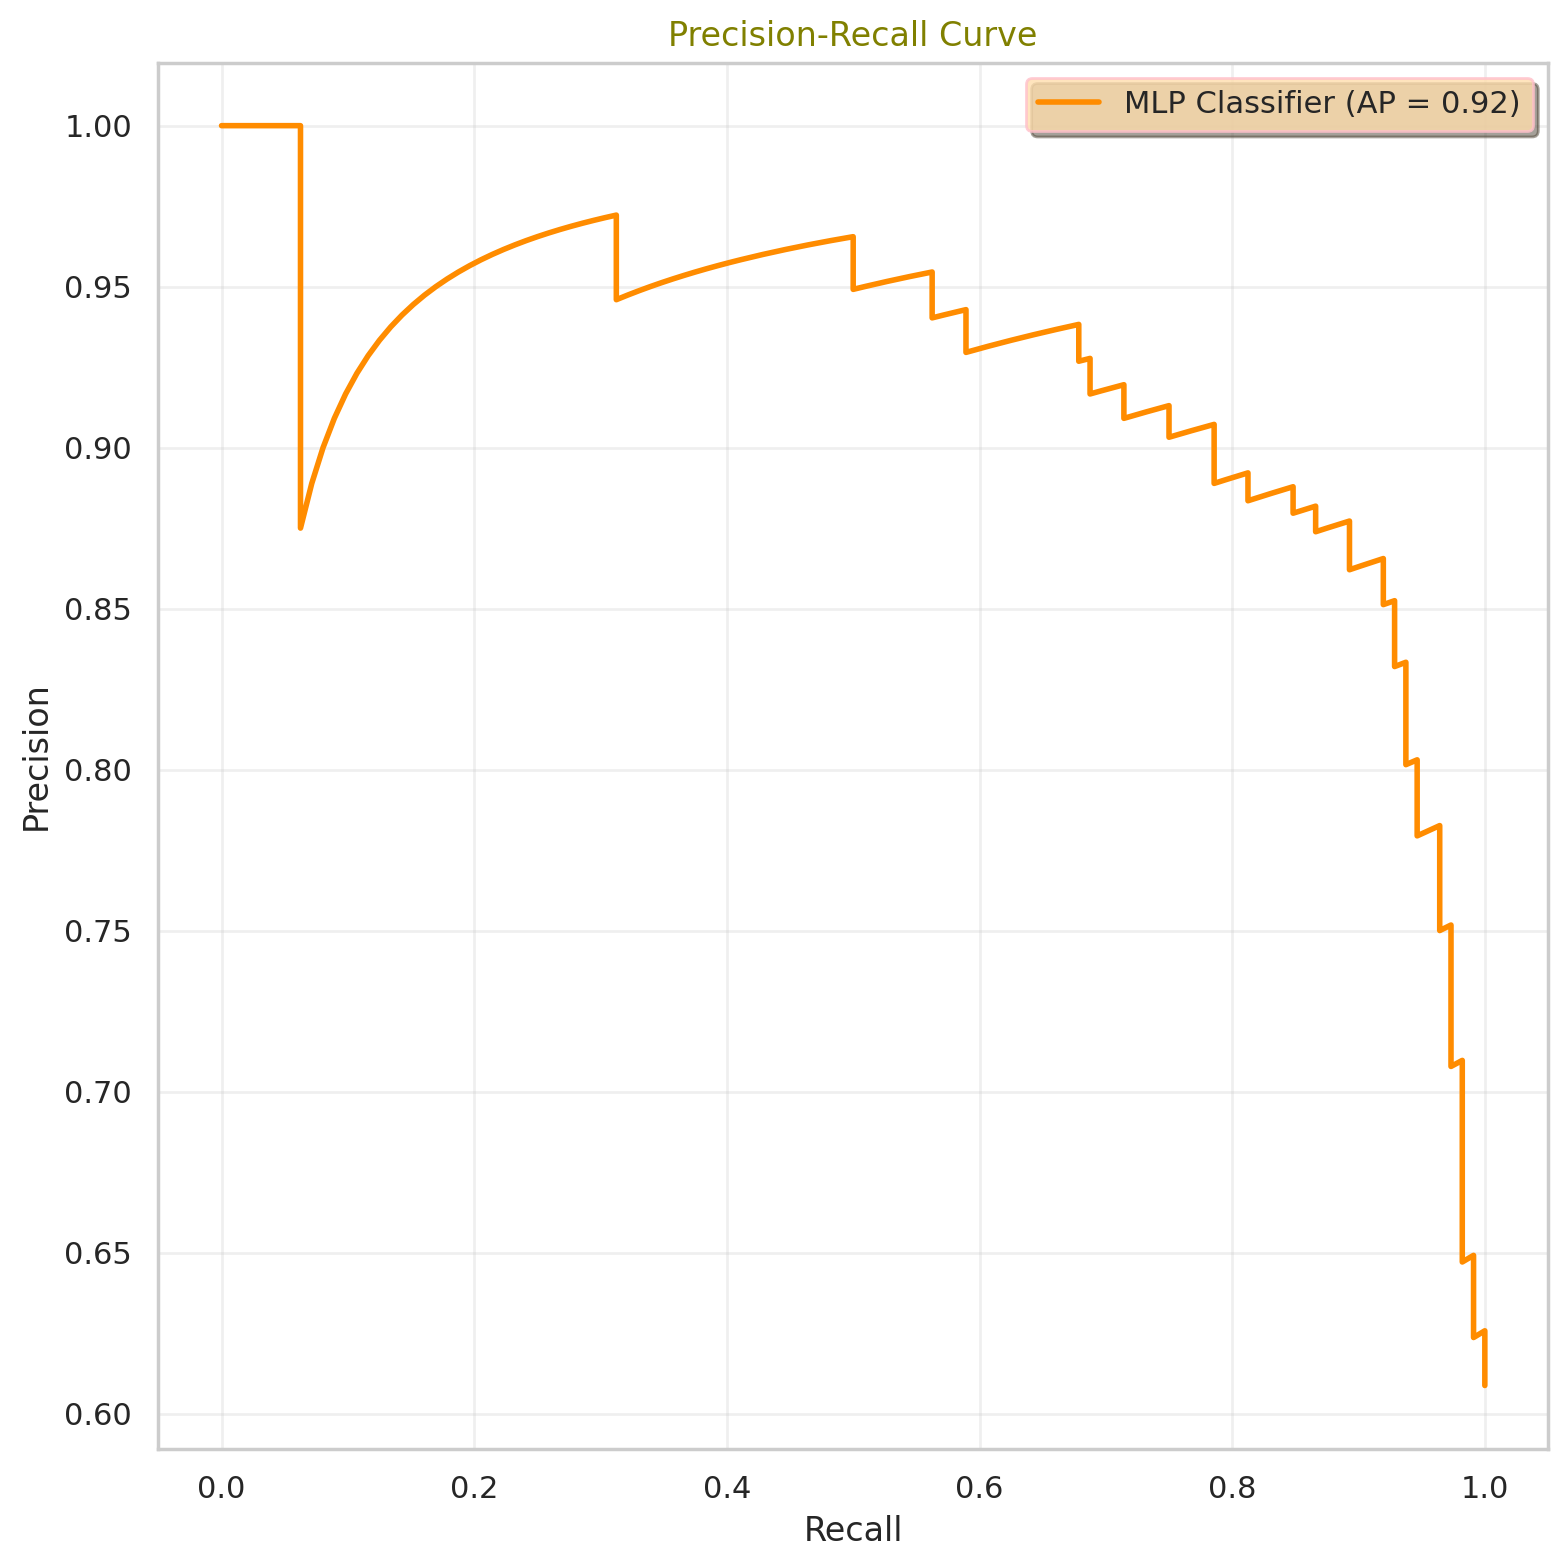

In [115]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming mlp is your trained classifier, X_test, and y_test are your test data
y_scores = mlp.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='MLP Classifier (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [116]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
cv_scores = cross_val_score(estimator=mlp, X=X_train, y=y_train, cv=10)

# Print mean accuracy score and standard deviation of cross-validation scores
print("Mean Cross-Validation Accuracy Score: {:.2f} %".format(np.mean(cv_scores) * 100))
print("Standard Deviation: {:.2f} %".format(np.std(cv_scores) * 100))


Mean Cross-Validation Accuracy Score: 84.70 %
Standard Deviation: 3.11 %


**(11) XGBOOST**

***XGBoost (Extreme Gradient Boosting)  is an optimized gradient boosting algorithm designed for speed and performance. It builds a series of weak learners to create a strong predictive model.***

In [117]:
import xgboost as Xgb

# Initialize XGBClassifier
xgb = Xgb.XGBClassifier()

# Train the model
xgb.fit(X_train,y_train)

# Make predictions on the test set
y_pred_xgb = xgb.predict(X_test)
xgb.score(X_train, y_train)

# Calculate training accuracy and model accuracy score
xgb_train = round(xgb.score(X_train, y_train) * 100, 2)
xgb_accuracy = round(accuracy_score(y_pred_xgb, y_test) * 100, 2)
xgb_f1 = round(f1_score(y_pred_xgb, y_test) * 100, 2)

print("Training Accuracy :",xgb_train,"%")
print("Model Accuracy Score :",xgb_accuracy,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_xgb))

Training Accuracy : 100.0 %
Model Accuracy Score : 84.24 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.77      0.85      0.81        72
           1       0.90      0.84      0.87       112

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.84       184
weighted avg       0.85      0.84      0.84       184



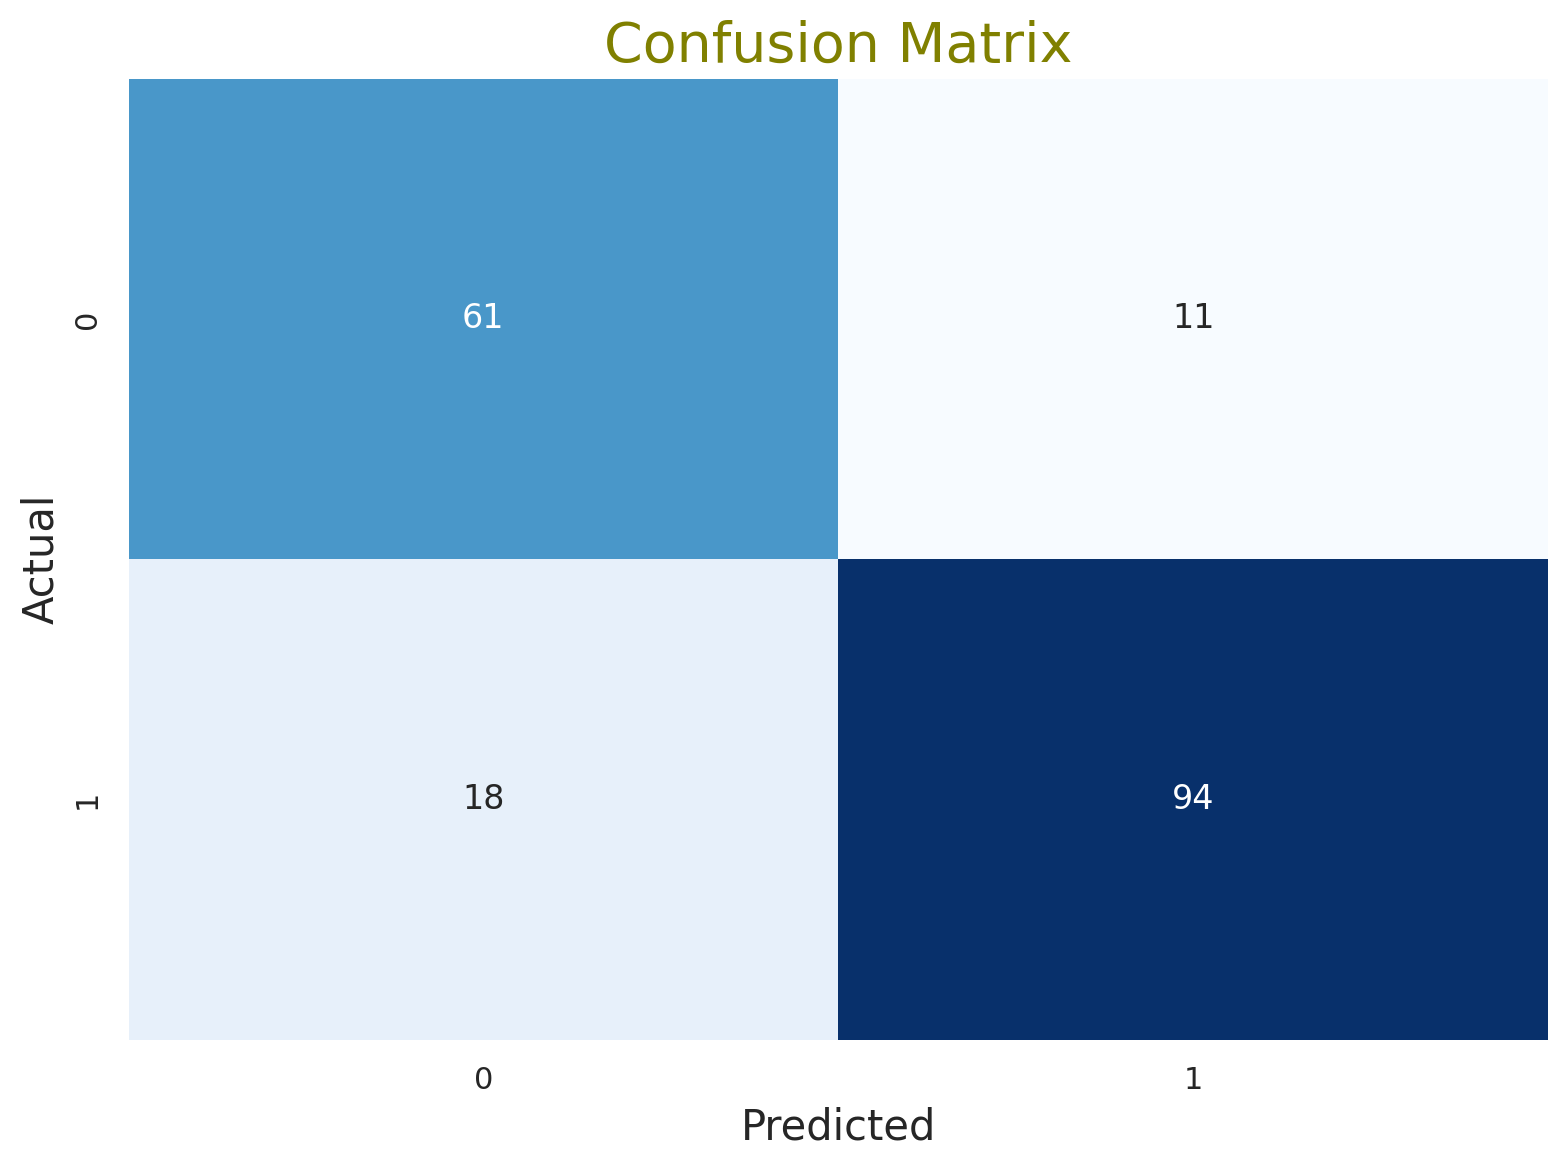

In [118]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming xgb is your trained classifier, X_test, and y_test are your test data
y_pred = xgb.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()



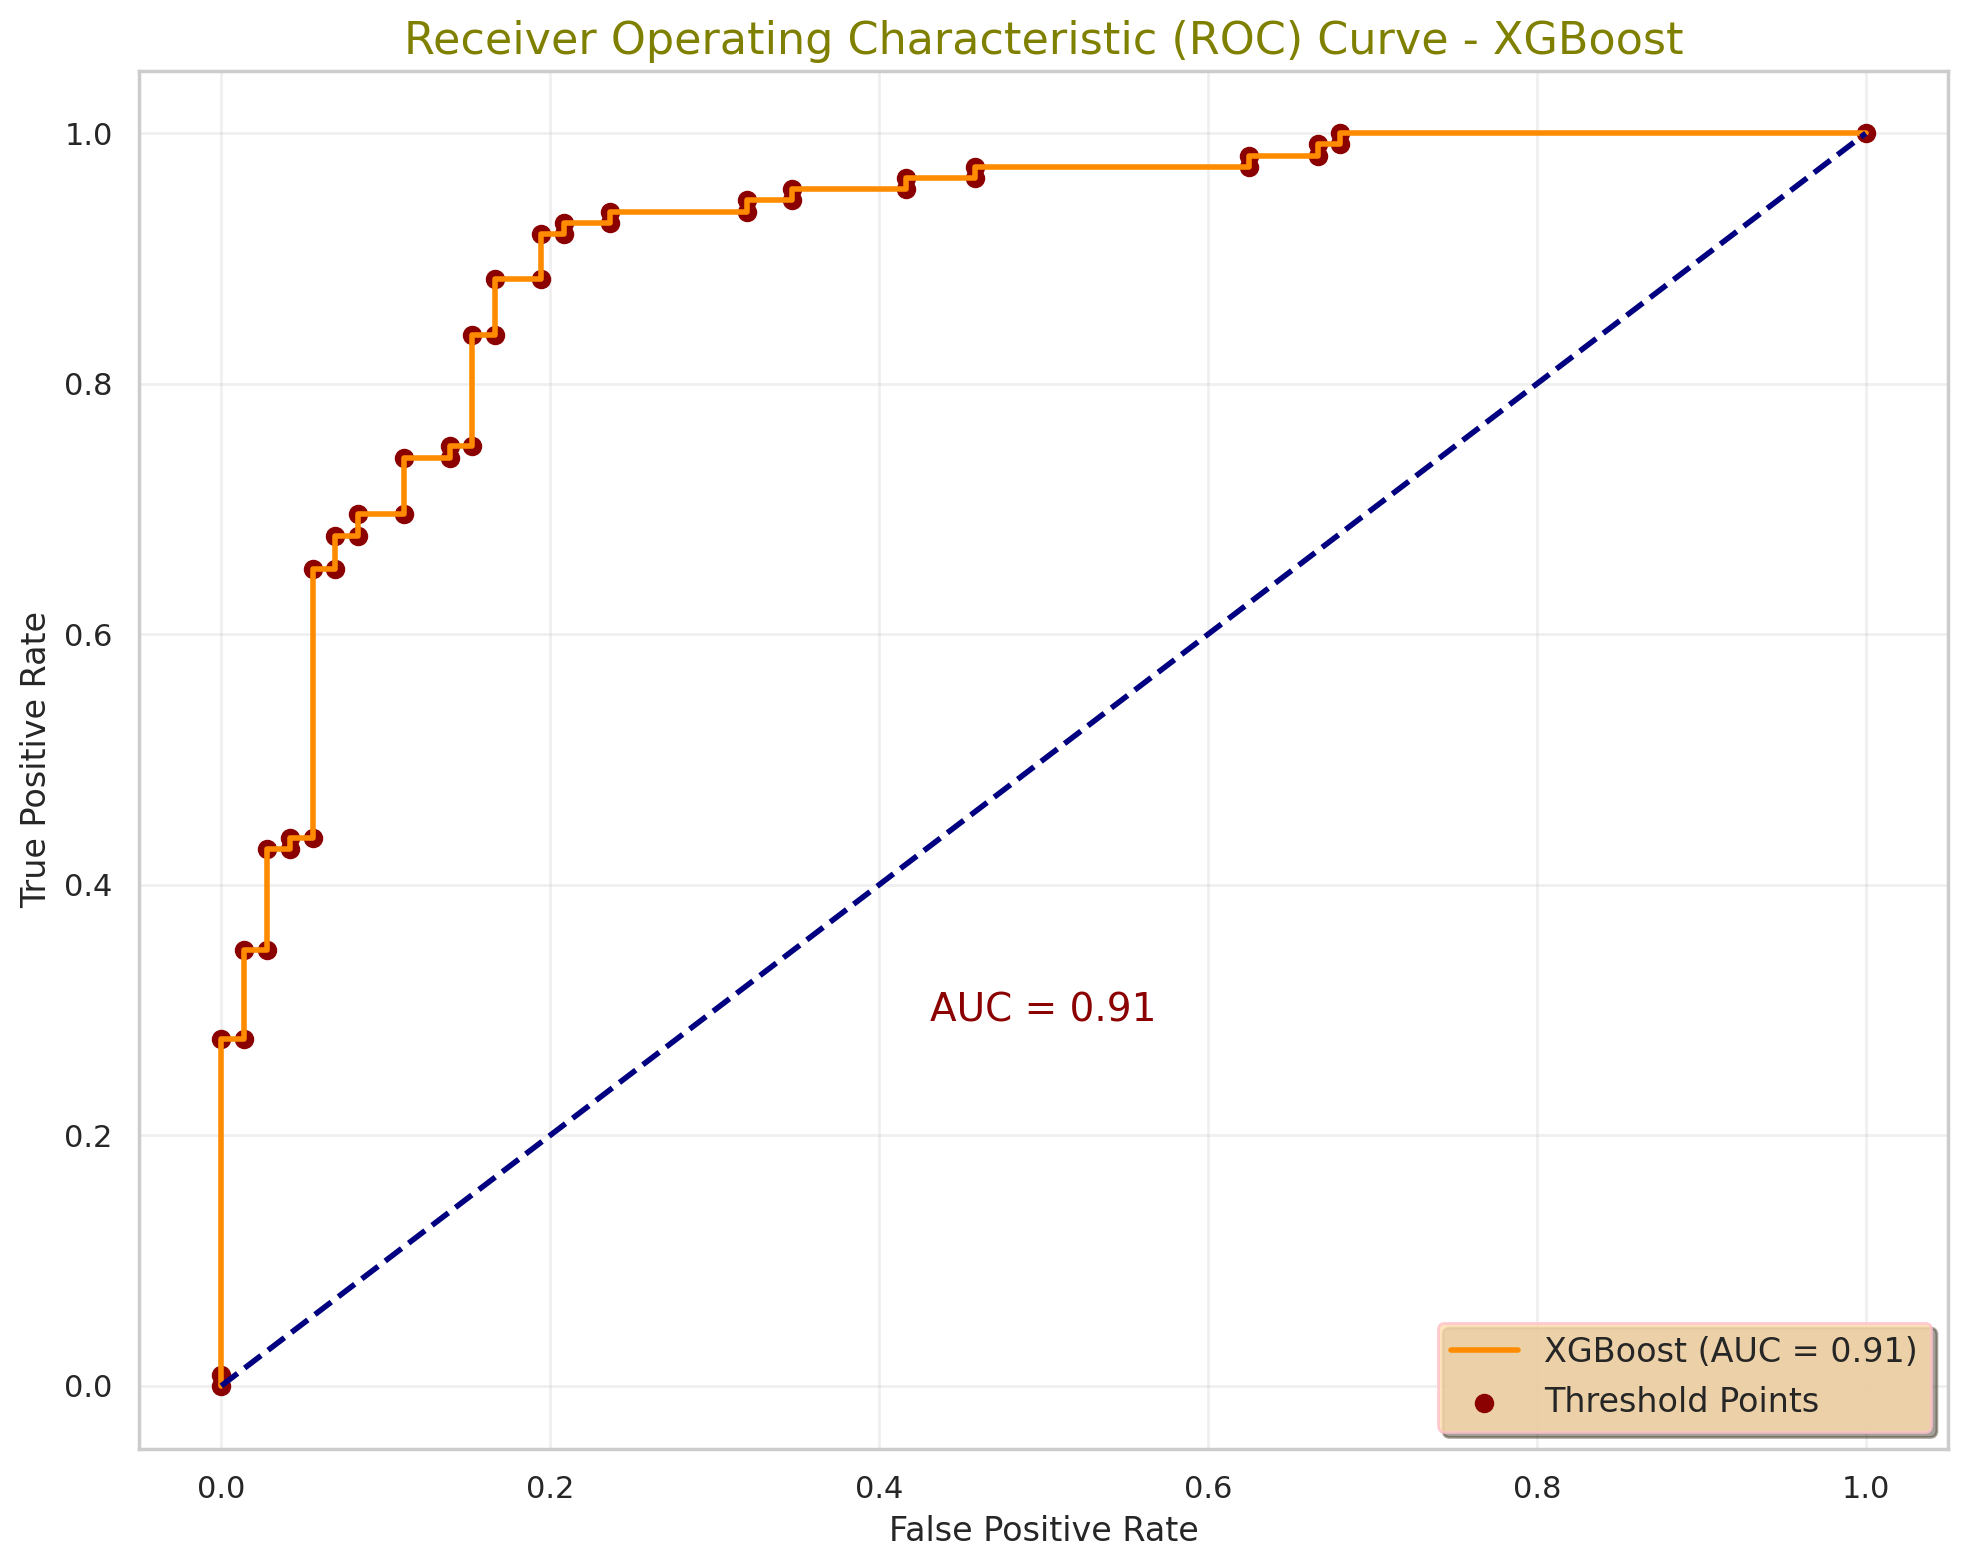

In [119]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming xgb is your trained classifier, X_test, and y_test are your test data
y_scores = xgb.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with colorful aesthetics for XGBoost
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='XGBoost (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - XGBoost', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

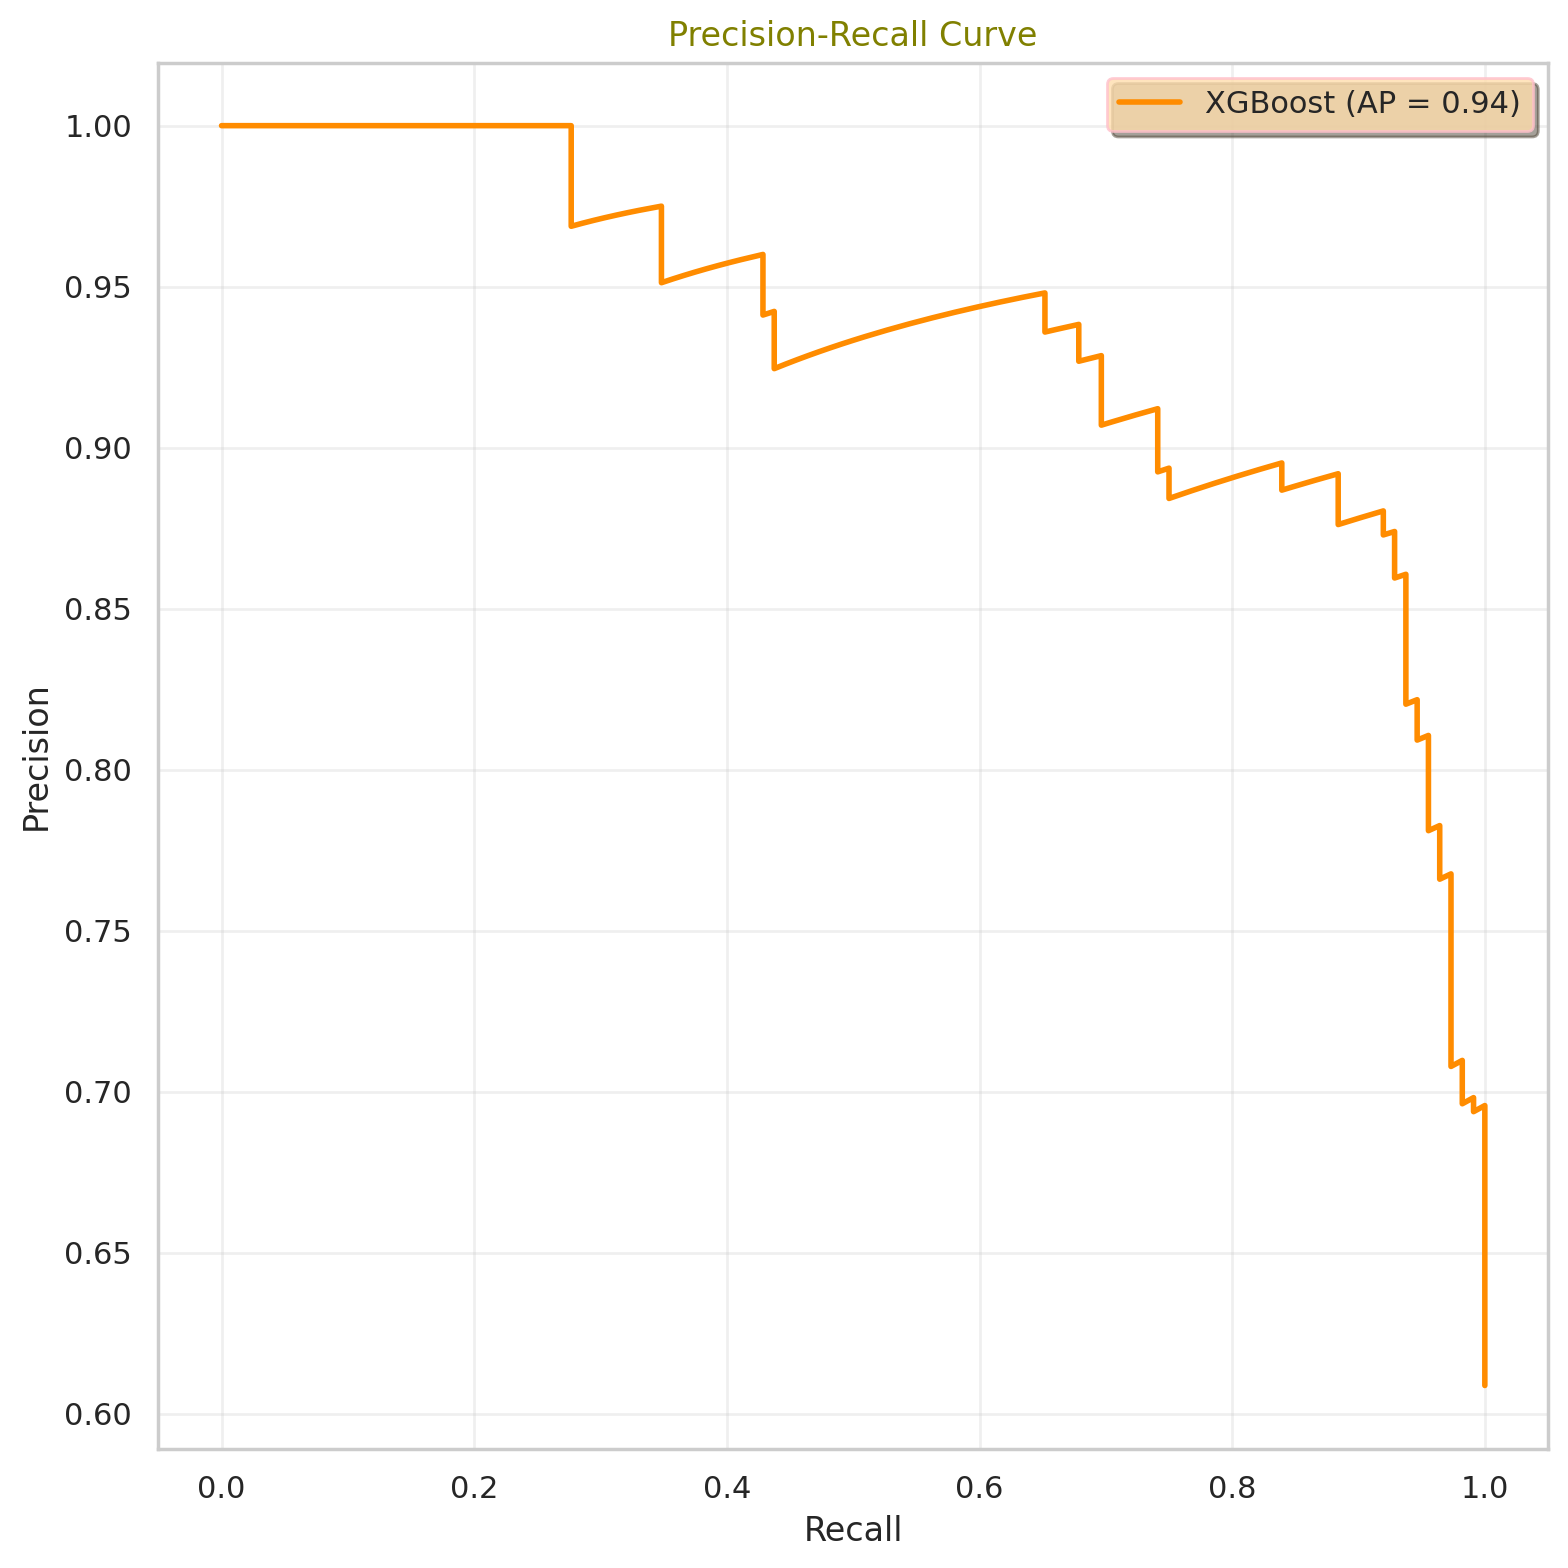

In [120]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming xgb is your trained classifier, X_test, and y_test are your test data
y_scores = xgb.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='XGBoost (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()


In [121]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
val_score = cross_val_score(estimator=xgb, X = X_train, y=y_train, cv=10)

# Print mean accuracy score and standard deviation of cross-validation scores
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 84.02 %
Std. Dev: 3.35 %


**(12) GAUSSIAN PROCESS CLASSIFIER**


***Gaussian Process Classifier is a probabilistic classification model that defines a distribution over functions. It's particularly useful for small datasets.***

In [122]:
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

# Initialize GaussianProcessClassifier
RBF = GaussianProcessClassifier(1.0 * RBF(1.0))

# Train the model
RBF.fit(X_train,y_train)


# Make predictions on the test set
y_pred_RBF = RBF.predict(X_test)

# Calculate training accuracy and model accuracy score
RBF_train = round(RBF.score(X_train, y_train) * 100, 2)
RBF_accuracy = round(accuracy_score(y_pred_RBF, y_test) * 100, 2)
RBF_f1 = round(f1_score(y_pred_RBF, y_test) * 100, 2)

print("Training Accuracy :",RBF_train ,"%")
print("Model Accuracy Score :",RBF_accuracy ,"%")
print("\033[1m--------------------------------------------------------\033[0m")
print("Classification_Report: \n",classification_report(y_test,y_pred_RBF))

Training Accuracy : 53.89 %
Model Accuracy Score : 60.87 %
--------------------------------------------------------
Classification_Report: 
               precision    recall  f1-score   support

           0       0.00      0.00      0.00        72
           1       0.61      1.00      0.76       112

    accuracy                           0.61       184
   macro avg       0.30      0.50      0.38       184
weighted avg       0.37      0.61      0.46       184



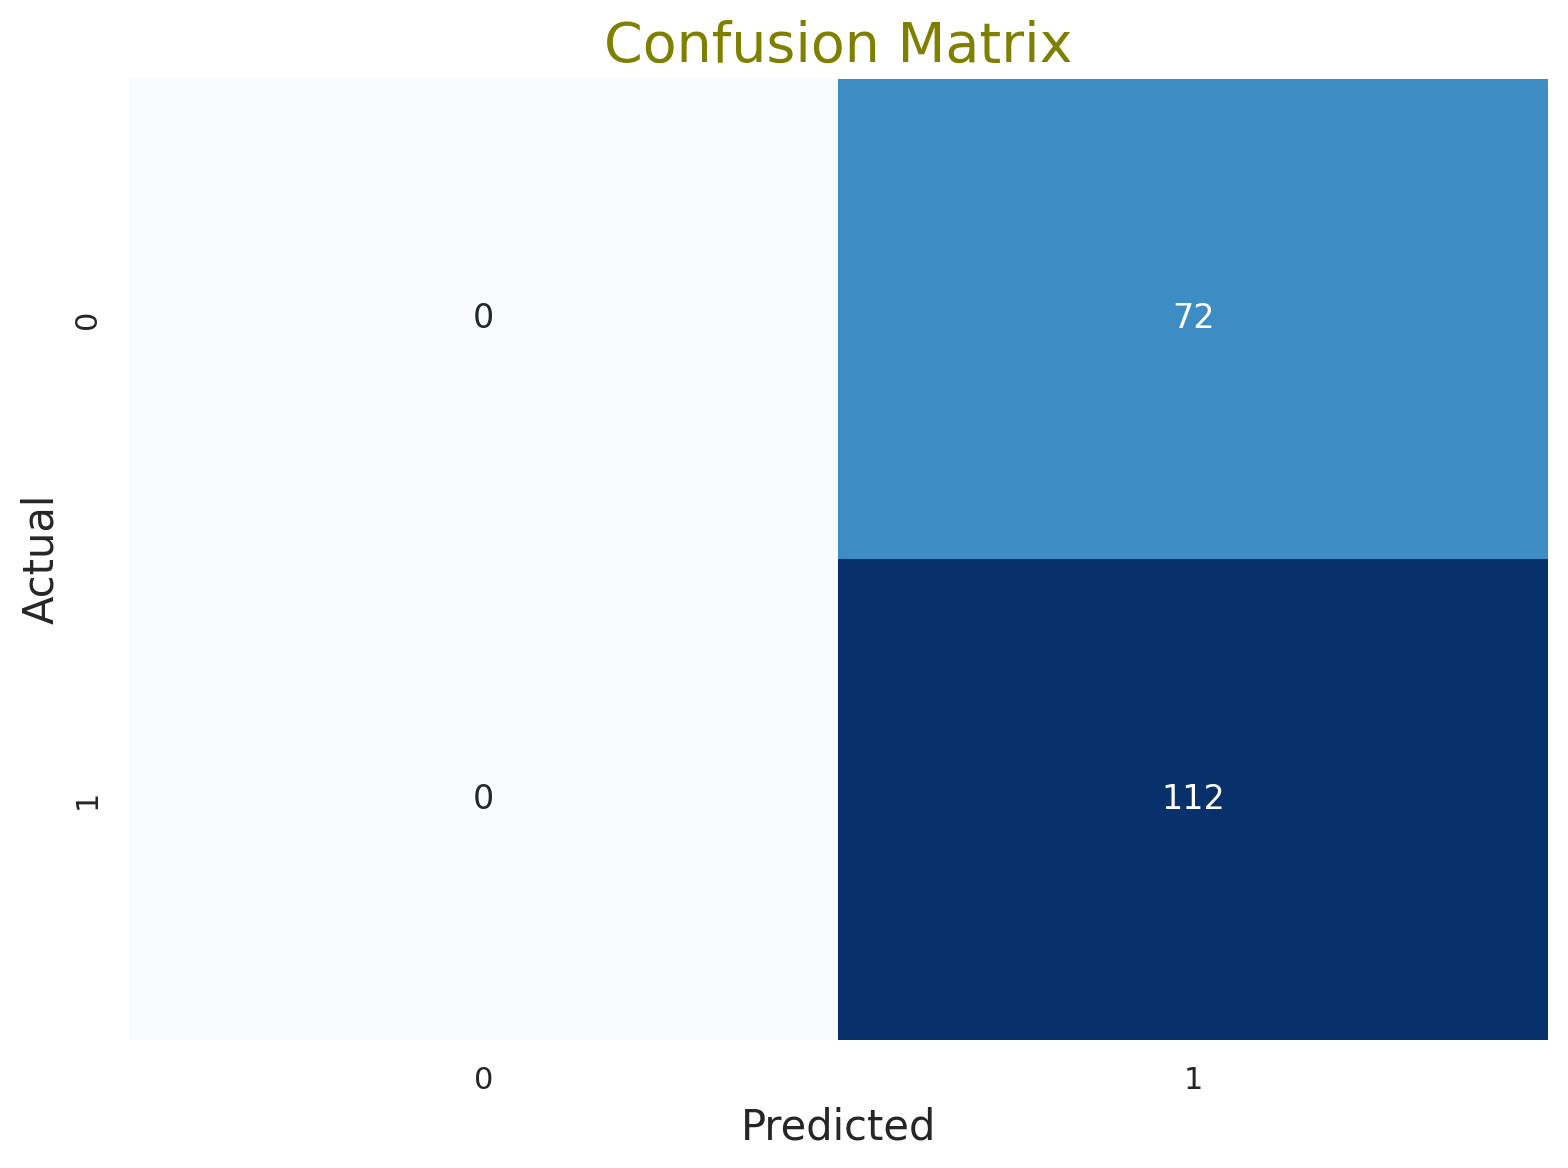

In [123]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming RBF is your trained classifier, X_test, and y_test are your test data
y_pred = RBF.predict(X_test)

# Calculate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap for the confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=['0', '1'],
            yticklabels=['0', '1'])
plt.title('Confusion Matrix', fontsize=20)
plt.xlabel('Predicted', fontsize=15)
plt.ylabel('Actual', fontsize=15)
plt.show()



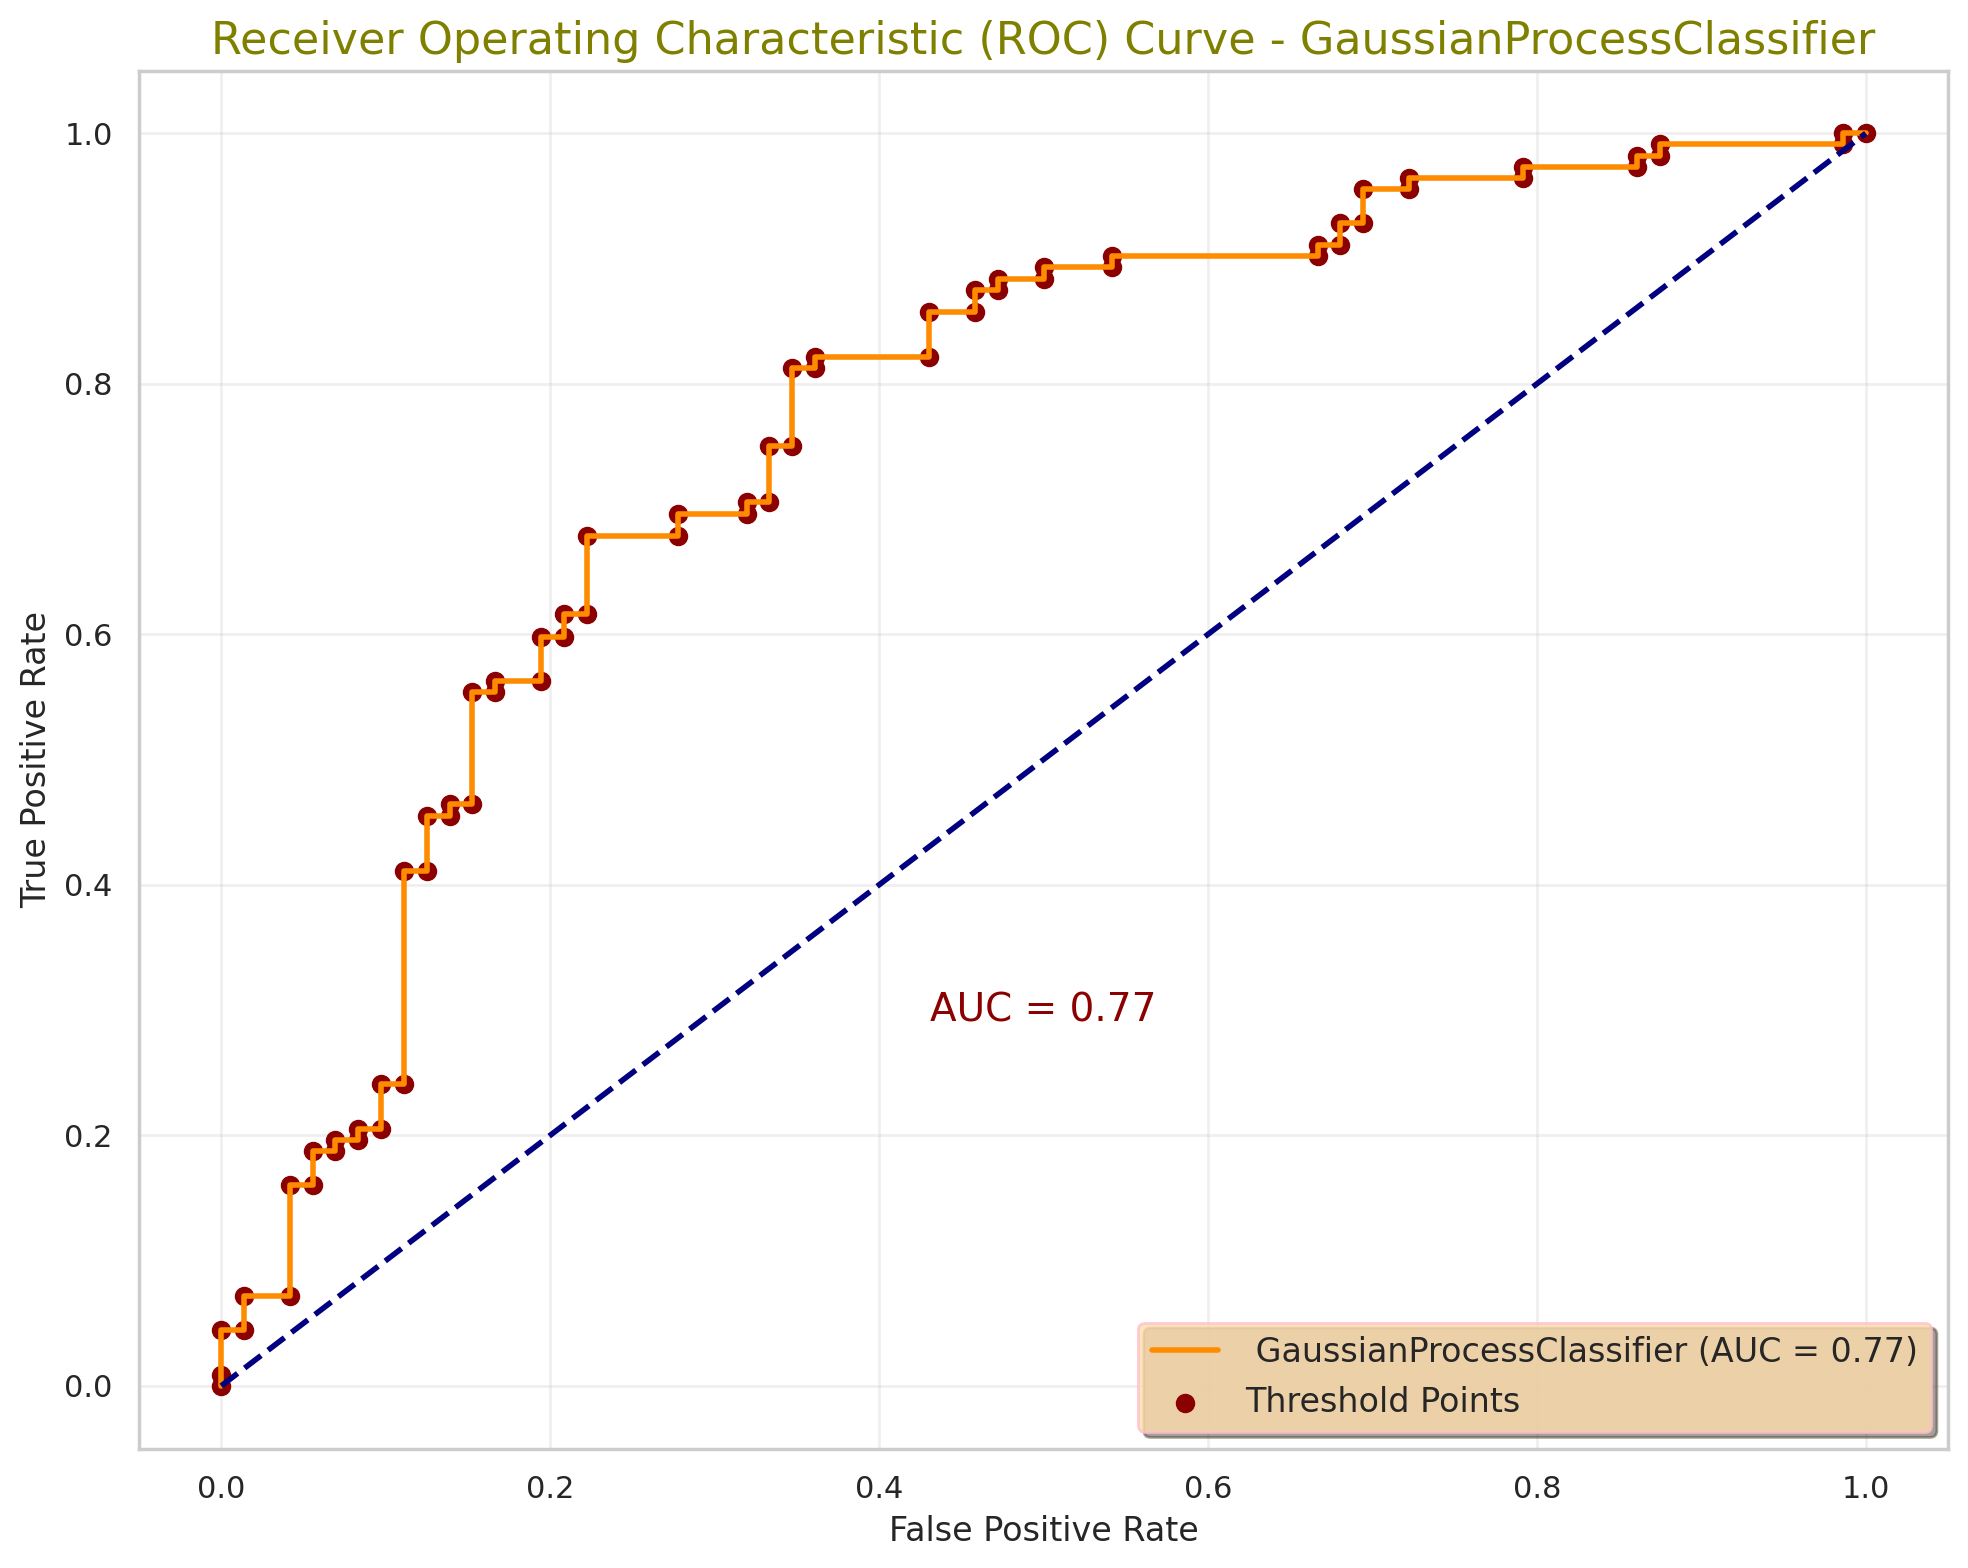

In [124]:
# Assuming RBF is your trained classifier, X_test, and y_test are your test data
y_scores = RBF.predict_proba(X_test)[:, 1]

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_scores)

# Compute ROC AUC
roc_auc = auc(fpr, tpr)

# Plotting the ROC curve with colorful aesthetics for MLP Classifier
plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=' GaussianProcessClassifier (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.scatter(fpr, tpr, marker='o', color='darkred', label='Threshold Points')
plt.text(0.5, 0.3, f'AUC = {roc_auc:.2f}', fontsize=14, ha='center', va='center', color='darkred')
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Receiver Operating Characteristic (ROC) Curve - GaussianProcessClassifier', fontsize=16)
plt.legend(loc='lower right', fontsize=12)
plt.grid(True)
plt.show()

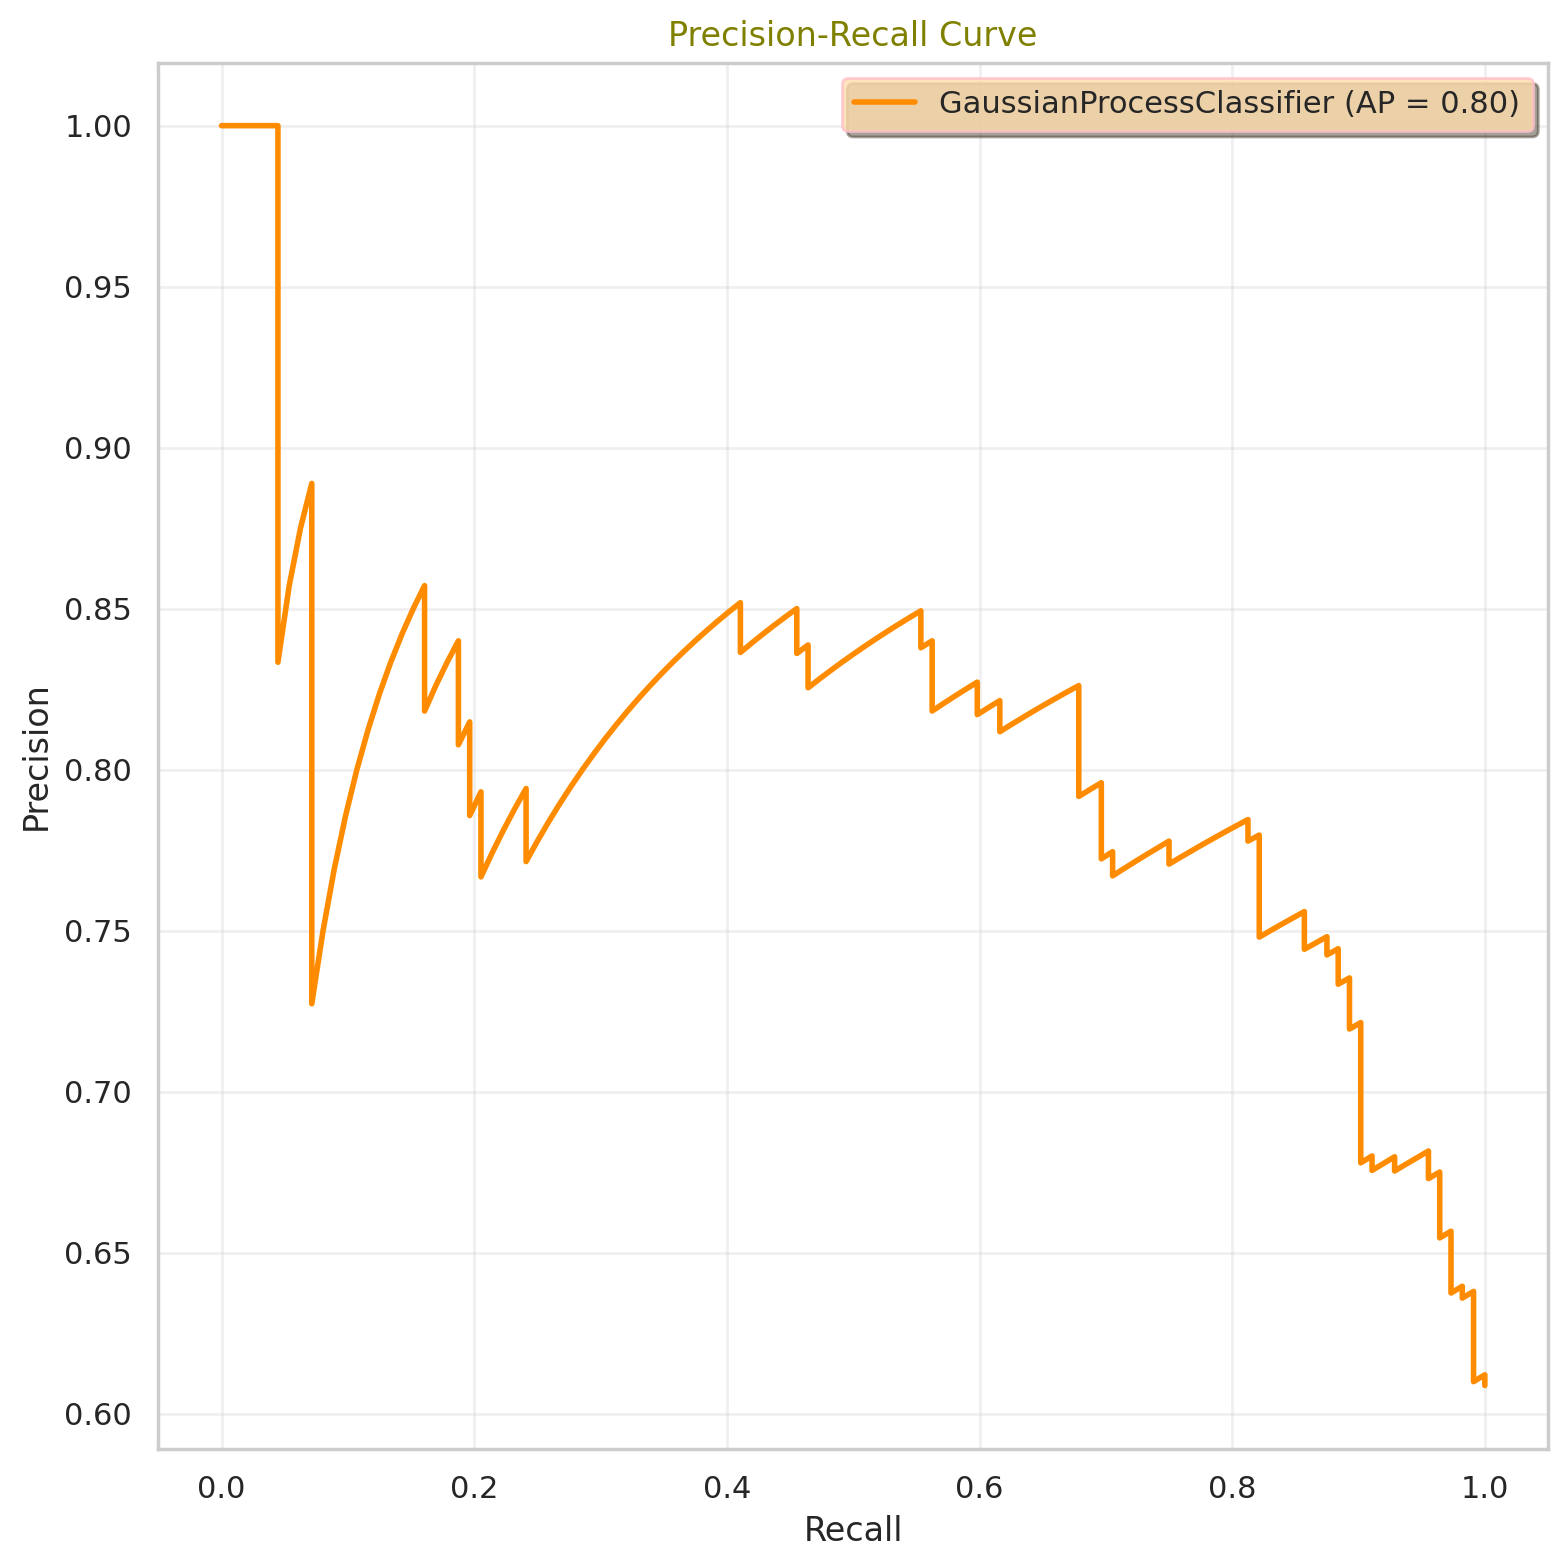

In [125]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt

# Assuming RBF is your trained classifier, X_test, and y_test are your test data
y_scores = RBF.predict_proba(X_test)[:, 1]

# Compute precision-recall curve
precision, recall, _ = precision_recall_curve(y_test, y_scores)

# Compute area under the curve (AUC) for precision-recall curve
pr_auc = auc(recall, precision)

# Plot precision-recall curve
plt.figure(figsize=(8, 8))
plt.plot(recall, precision, color='darkorange', lw=2, label='GaussianProcessClassifier (AP = {:.2f})'.format(pr_auc))
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='upper right')
plt.show()



In [126]:
from sklearn.model_selection import cross_val_score

# Calculate cross-validation scores
val_score = cross_val_score(estimator=RBF, X = X_train, y=y_train, cv=10)

# Print mean accuracy score and standard deviation of cross-validation scores
print("Model Accuracy Score: {:.2f} %".format(val_score.mean()*100))
print("Std. Dev: {:.2f} %".format(val_score.std()*100))

Model Accuracy Score: 64.06 %
Std. Dev: 15.90 %


In [130]:
models = pd.DataFrame({
'Model': [
'Logistic Regression','Support Vector Machines', 'KNeighborsClassifier',
'GaussianNB','Perceptron', 'Linear SVC','Stochastic Gradient Descent',
'Decision Tree','Random Forest', 'MLPClassifier' ,'XGBClassifier', 'GaussianProcessClassifier'
],
'Training Accuracy': [
log_train, svc_train, knn_train, gaussian_train, perceptron_train,
linear_svc_train, sgd_train, decision_train, random_forest_train,
mlp_train, xgb_train, RBF_train
],
'Model f1 Score': [
log_f1, svc_f1, knn_f1, gaussian_f1, perceptron_f1,
linear_svc_f1, sgd_f1, decision_f1, random_forest_f1,
mlp_f1, xgb_f1, RBF_f1
],
'Model Accuracy Score': [
log_accuracy, svc_accuracy, knn_accuracy, gaussian_accuracy, perceptron_accuracy,
linear_svc_accuracy, sgd_accuracy, decision_accuracy, random_forest_accuracy,
mlp_accuracy, xgb_accuracy, RBF_accuracy
]
})

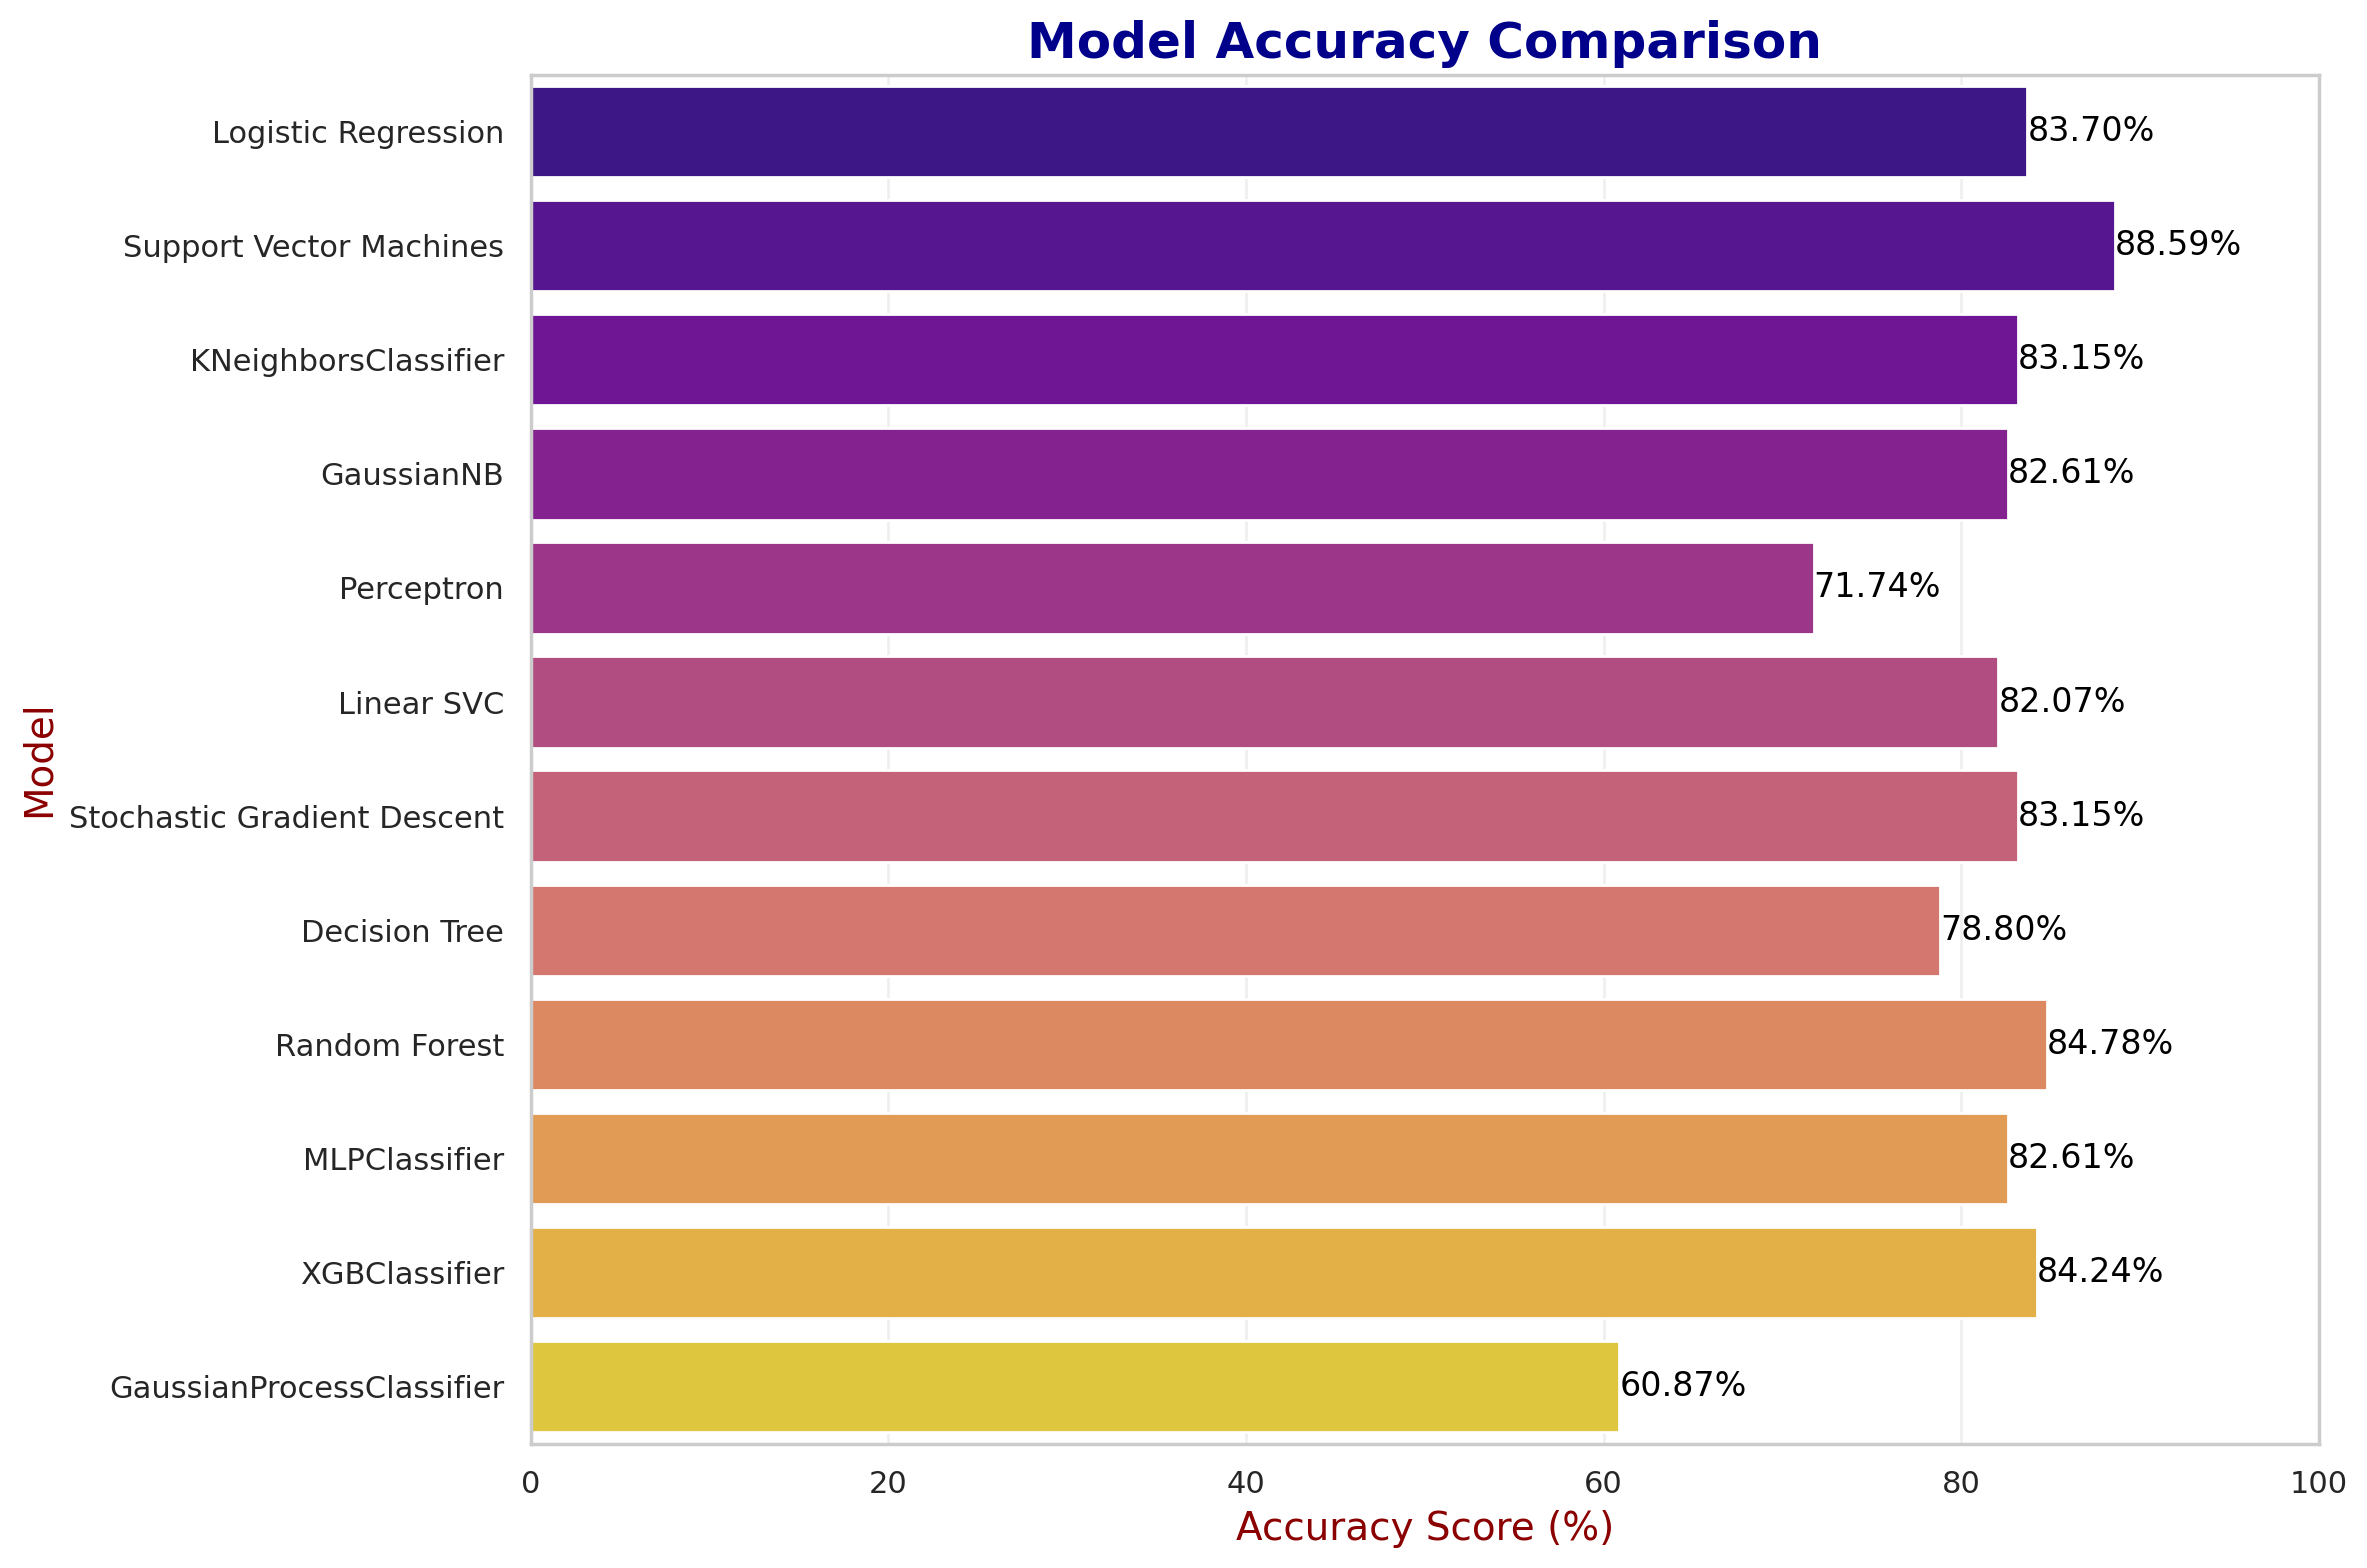

In [131]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'models' DataFrame with the specified columns

# Set a seaborn style for better visualization
sns.set_theme(style="whitegrid")

# Create a bar plot for Model Accuracy Score with a colorful gradient
plt.figure(figsize=(12, 8))
bar_plot = sns.barplot(x='Model Accuracy Score', y='Model', data=models, palette='plasma')

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Accuracy Score (%)', fontsize=14, color='darkred')
plt.ylabel('Model', fontsize=14, color='darkred')
plt.xlim(0, 100)  # Set x-axis limit to percentage range

# Annotate the bars with accuracy values
for p in bar_plot.patches:
    bar_plot.annotate(f'{p.get_width():.2f}%',
                      (p.get_width(), p.get_y() + p.get_height() / 2),
                      ha='left',
                      va='center',
                      color='black')

# Show the plot
plt.show()


# Print the sorted accuracy comparison table with two digits after the decimal
models_sorted = models.sort_values(by='Model Accuracy Score', ascending=False)
models_sorted.style.background_gradient(cmap='viridis', subset=['Model Accuracy Score']).hide_index().set_precision(2)


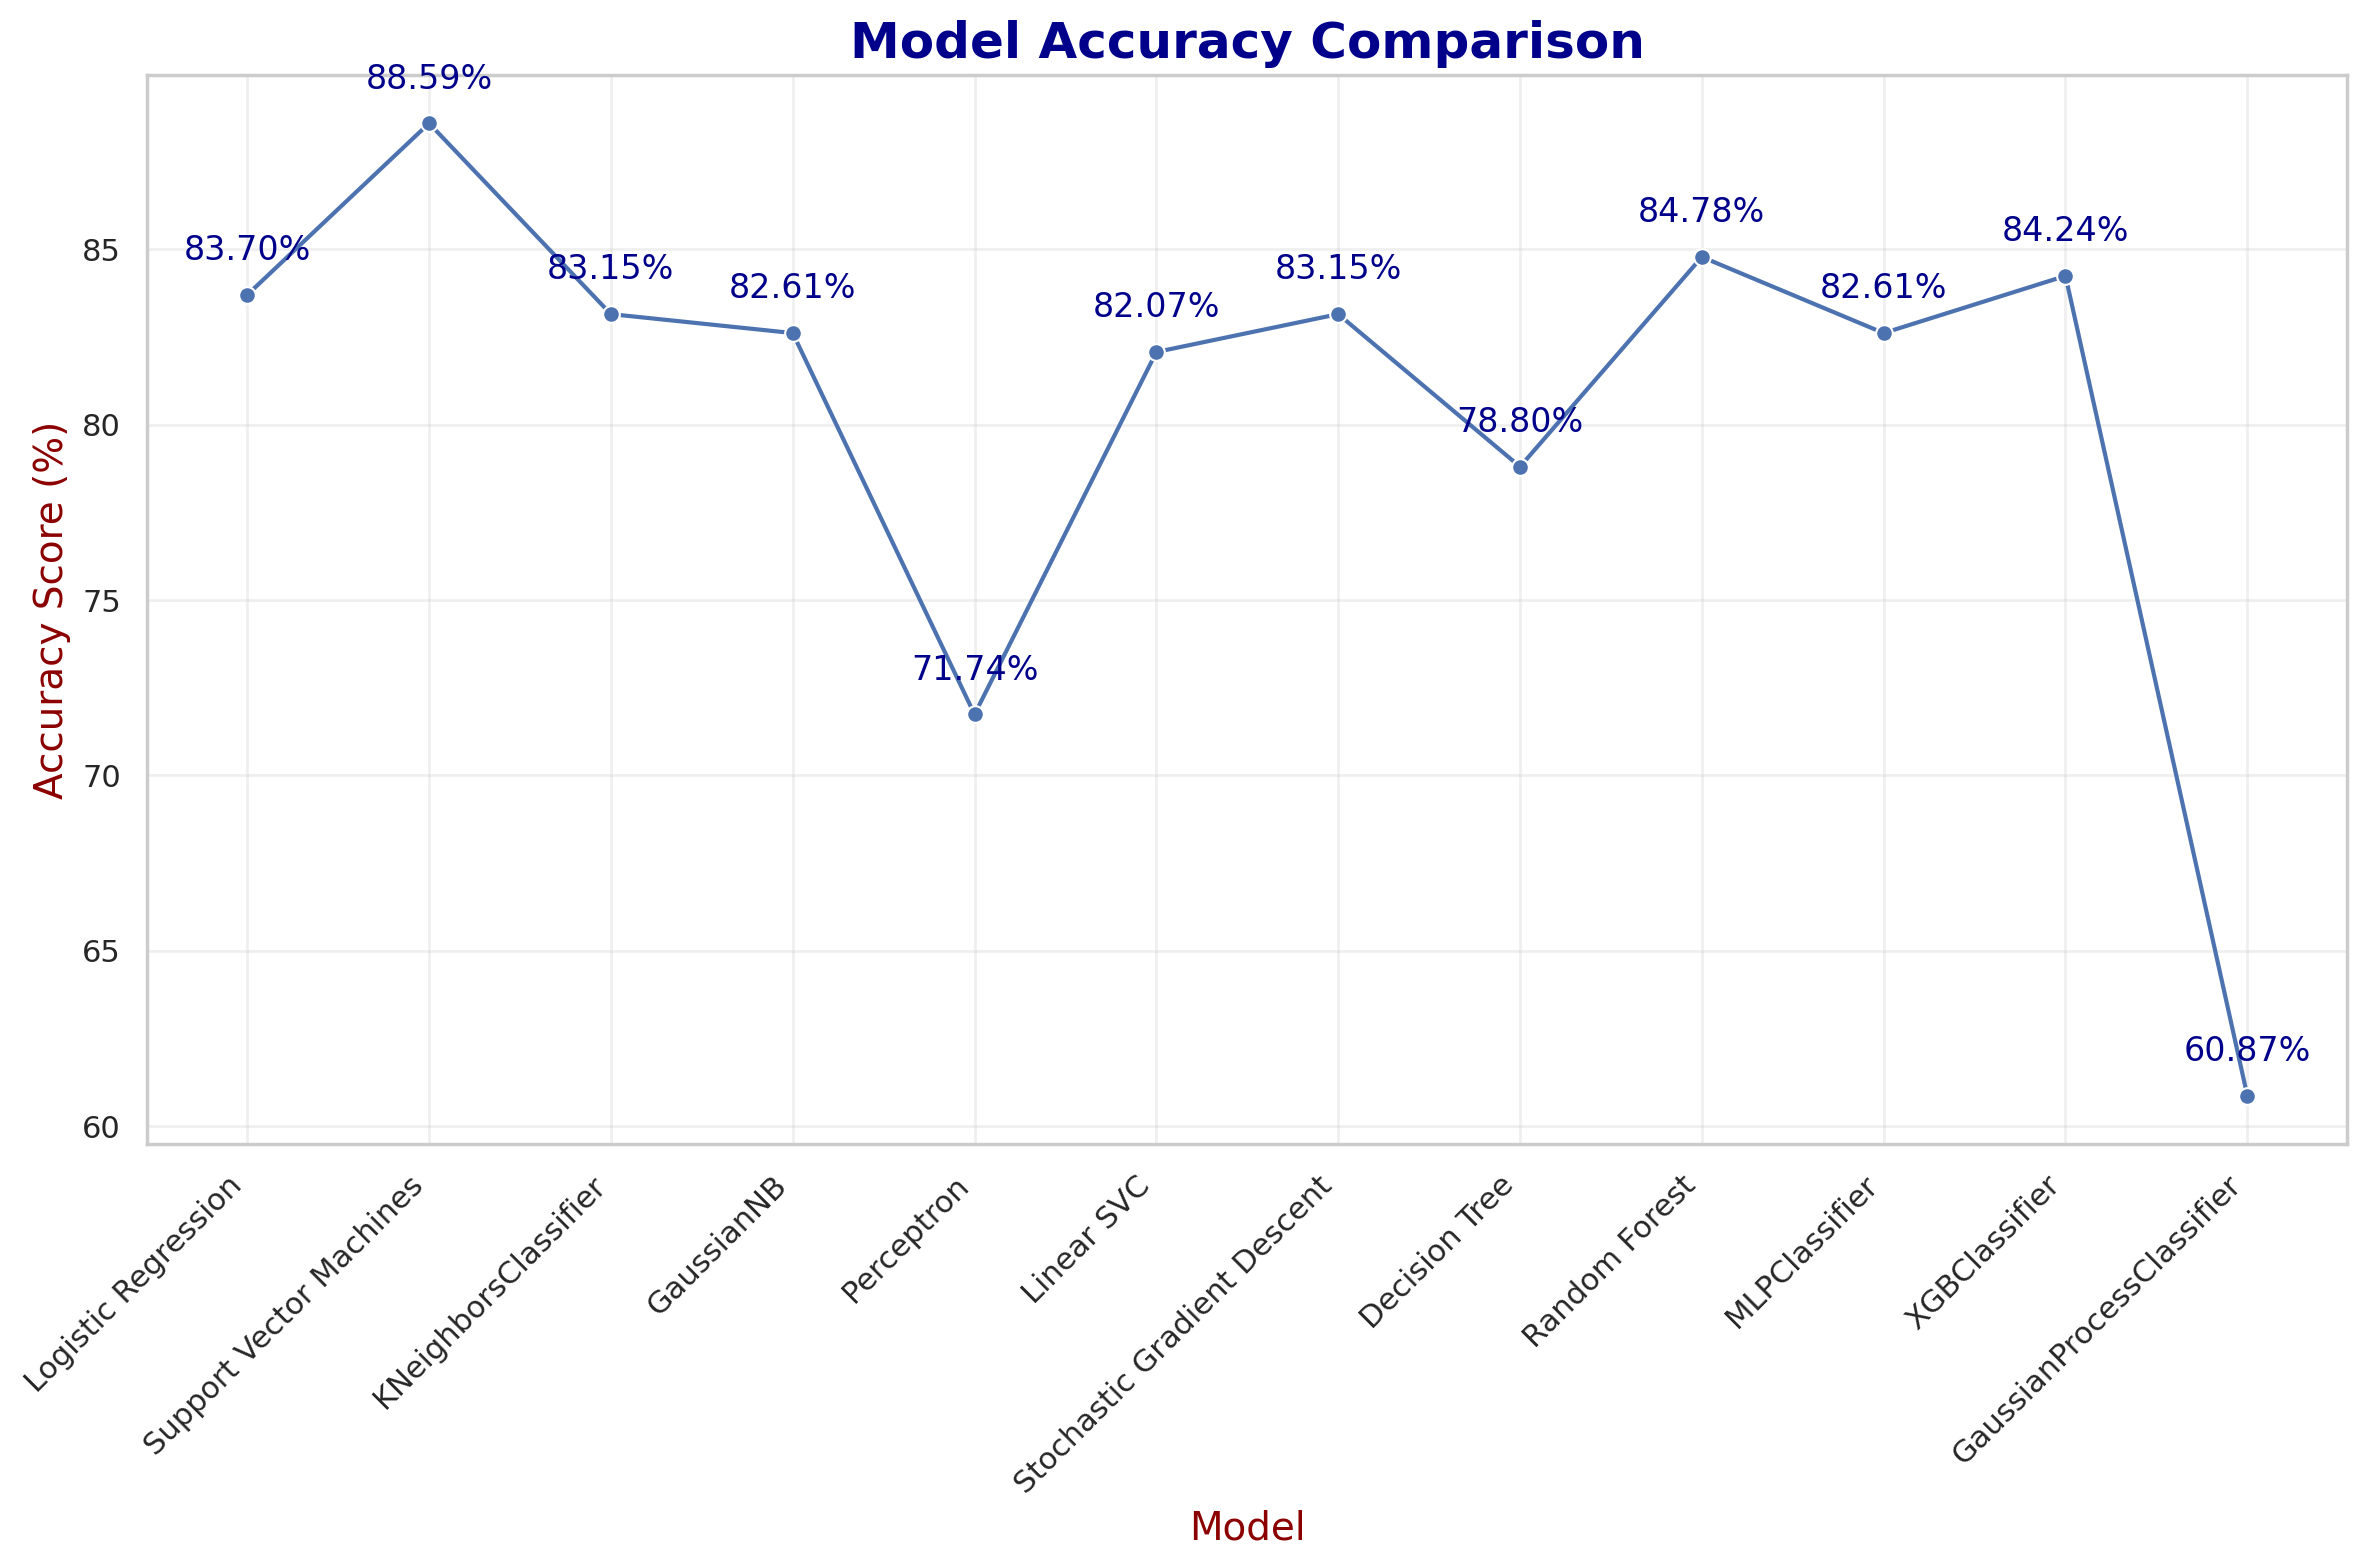

In [132]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming you have the 'models' DataFrame with the specified columns

# Set a seaborn style for better visualization
sns.set_theme(style="whitegrid")

# Create a line plot for Model Accuracy Score with markers and a colorful gradient
plt.figure(figsize=(12, 8))
line_plot = sns.lineplot(x='Model', y='Model Accuracy Score', data=models, marker='o', palette='plasma')

# Customize the plot
plt.title('Model Accuracy Comparison', fontsize=18, fontweight='bold', color='darkblue')
plt.xlabel('Model', fontsize=14, color='darkred')
plt.ylabel('Accuracy Score (%)', fontsize=14, color='darkred')

# Annotate the line with accuracy values
for x, y in zip(line_plot.get_lines()[0].get_xdata(), line_plot.get_lines()[0].get_ydata()):
    line_plot.annotate(f'{y:.2f}%',
                      (x, y),
                      textcoords="offset points",
                      xytext=(0,10),
                      ha='center',
                      va='bottom',
                      color='darkblue',
                      fontsize=12)

# Show the plot
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()


**High Performers:** Support Vector Machines (SVM), XGBoost, Logistic Regression, and K-Nearest Neighbors demonstrated robust performances with notable accuracy and F1 scores.

**Balanced Models:** Stochastic Gradient Descent, Multi-Layer Perceptron (MLP), and Linear Support Vector Classifier (Linear SVC) exhibited competitive accuracy and F1 scores, providing a balanced trade-off between precision and recall.

**Overfitting Concerns:** Random Forest and Decision Tree achieved high training accuracy but displayed a notable drop in accuracy on the test set, suggesting potential overfitting issues.

**Moderate Performers:** Gaussian Naive Bayes and Gaussian Process Classifier showed moderate accuracy, with Gaussian Process Classifier having the lowest overall performance.

**Challenges with Perceptron:** Perceptron presented the lowest accuracy and F1 scores, indicating limitations in capturing the underlying patterns of the heart disease dataset.

*In conclusion, while SVM, XGBoost, Logistic Regression, and K-Nearest Neighbors stand out as strong contenders, the choice of the optimal model should consider specific application requirements, potential overfitting issues, and the desired balance between precision and recall. Additionally, further fine-tuning and feature engineering may enhance overall model performance.*